In [ ]:
from google.colab import drive #Only if you are using Google Drive
drive.mount('/content/gdrive')
drive.mount("/content/gdrive", force_remount=True)
%cd /content/gdrive/My\ Drive/

Mounted at /content/gdrive
Mounted at /content/gdrive
/content/gdrive/My Drive


In [ ]:
!uname -a
! host

Linux 1c5d793b8f6e 5.4.144+ #1 SMP Tue Dec 7 09:58:10 PST 2021 x86_64 x86_64 x86_64 GNU/Linux
/bin/bash: host: command not found


In [ ]:
! ls -al /content/gdrive/MyDrive/evalwav | wc

  40940  368454 2281535


In [ ]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt
import pandas as pd
import time
evalf = '/content/gdrive/My Drive/eval.csv'
evalcsv = pd.read_csv(evalf)
dfvalid = pd.DataFrame(evalcsv)
#dfvalid = dfeval[dfeval['split'] == 'train'].copy()
print(dfvalid.info())
print(dfvalid.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10231 entries, 0 to 10230
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fname   10231 non-null  int64 
 1   labels  10231 non-null  object
 2   mids    10231 non-null  object
dtypes: int64(1), object(2)
memory usage: 239.9+ KB
None
    fname                                             labels  \
0   37199  Electric_guitar,Guitar,Plucked_string_instrume...   
1  175151  Electric_guitar,Guitar,Plucked_string_instrume...   
2  253463  Electric_guitar,Guitar,Plucked_string_instrume...   
3  329838  Electric_guitar,Guitar,Plucked_string_instrume...   
4    1277  Electric_guitar,Guitar,Plucked_string_instrume...   

                                            mids  
0  /m/02sgy,/m/0342h,/m/0fx80y,/m/04szw,/m/04rlf  
1  /m/02sgy,/m/0342h,/m/0fx80y,/m/04szw,/m/04rlf  
2  /m/02sgy,/m/0342h,/m/0fx80y,/m/04szw,/m/04rlf  
3  /m/02sgy,/m/0342h,/m/0fx80y,/m/04szw,/m/04rlf  
4  /m/02sgy,/m/

In [ ]:
dev_audio_dir = '/content/gdrive/MyDrive/evalwav/'
dev_png_dir = '/content/gdrive/MyDrive/validpng/'
dfvalid["wavfiles"] = dfvalid.apply(lambda row: dev_audio_dir+str(row.fname)+'.wav', axis=1)
dfvalid["figfiles"] = dfvalid.apply(lambda row: dev_png_dir+str(row.fname)+'.png', axis=1)

dfvalid.info()
dfvalid.head()
startime = time.ctime()
print(time.ctime())
srhz=44100
frame_size = int(srhz/1000*960)
frame_shift = int(srhz/1000*25)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10231 entries, 0 to 10230
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   fname     10231 non-null  int64 
 1   labels    10231 non-null  object
 2   mids      10231 non-null  object
 3   wavfiles  10231 non-null  object
 4   figfiles  10231 non-null  object
dtypes: int64(1), object(4)
memory usage: 399.8+ KB
Tue Apr 26 11:51:08 2022


In [ ]:
rowcount=dfvalid.shape[0]
print(rowcount)
dfv_1 = dfvalid.iloc[:2000,:]
dfv_2 = dfvalid.iloc[2001:4000,:]
dfv_3 = dfvalid.iloc[4001:6000,:]
dfv_4 = dfvalid.iloc[6001:8000,:]
dfv_5 = dfvalid.iloc[8001:,:]


10231


In [ ]:
def generate_melspec(df):
  filect = 0
  for i in df.itertuples():
    filect = filect+1
    file = i[4]
    #print('wav file: '+file)
    pngfile = i[5]
    #print('png file: '+pngfile)
    print('FileCount = '+str(filect)+': Working on spectogram '+pngfile)
    signal, sr = librosa.load(file, sr=None)
    # my parameters
    #hop_length = 11025 # in num. of samples
    #n_fft = 42336 # window in num. of samples
    hop_length=512
    n_fft=2048
    fmin=20
    fmax=8300
    top_db=80
    hop_length_duration = float(hop_length)/sr
    n_fft_duration = float(n_fft)/sr
    # Mel filter banks
    filter_banks = librosa.filters.mel(n_fft=n_fft, sr=sr, n_mels=64)
    stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)
    # This will yield 96-length spectrograms
    spectrogram = np.abs(stft)
    # converted to 64 bin log-scaled Mel spectrogram,
    melspec = librosa.feature.melspectrogram(y=signal, sr=sr, S=spectrogram,
                                             n_fft=n_fft, hop_length=hop_length,
                                             win_length=None, window='hann',
                                             center=True, pad_mode='reflect', n_mels=64,
                                             fmin=fmin, fmax=fmax)
    #log_mel_spectrogram = librosa.power_to_db(melspec, ref=np.max) top_db=top_db
    log_mel_spectrogram = librosa.power_to_db(melspec, top_db=top_db)
    #plt.figure(figsize=(2.24, 2.24))
    fig = librosa.display.specshow(log_mel_spectrogram, hop_length=hop_length)
    fig2 = plt.gcf()
    plt.axis('off')
    # uncomment the line below to create 224x224 pngs
    fig2.set_size_inches(2.9, 2.98)
    #plt.imshow(cmap='gray_r')
    plt.savefig(pngfile, dpi=100, bbox_inches='tight', pad_inches=0, format='png')


In [ ]:
print('Working on subset from dfv_1')
generate_melspec(dfv_1)
print(time.ctime())
print('Done working with dfv_1')

Working on 1st batch 1 to 2000
Filecount: 1 Working on: /content/gdrive/MyDrive/evalwav/37199.wav
Filecount: 2 Working on: /content/gdrive/MyDrive/evalwav/175151.wav
Filecount: 3 Working on: /content/gdrive/MyDrive/evalwav/253463.wav
Filecount: 4 Working on: /content/gdrive/MyDrive/evalwav/329838.wav
Filecount: 5 Working on: /content/gdrive/MyDrive/evalwav/1277.wav
Filecount: 6 Working on: /content/gdrive/MyDrive/evalwav/30149.wav
Filecount: 7 Working on: /content/gdrive/MyDrive/evalwav/331398.wav
Filecount: 8 Working on: /content/gdrive/MyDrive/evalwav/333246.wav
Filecount: 9 Working on: /content/gdrive/MyDrive/evalwav/232924.wav
Filecount: 10 Working on: /content/gdrive/MyDrive/evalwav/42378.wav
Filecount: 11 Working on: /content/gdrive/MyDrive/evalwav/168741.wav
Filecount: 12 Working on: /content/gdrive/MyDrive/evalwav/235579.wav
Filecount: 13 Working on: /content/gdrive/MyDrive/evalwav/1399.wav
Filecount: 14 Working on: /content/gdrive/MyDrive/evalwav/321709.wav
Filecount: 15 Worki

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32600
  n_fft, y.shape[-1]


Filecount: 33 Working on: /content/gdrive/MyDrive/evalwav/330901.wav
Filecount: 34 Working on: /content/gdrive/MyDrive/evalwav/1405.wav
Filecount: 35 Working on: /content/gdrive/MyDrive/evalwav/263455.wav
Filecount: 36 Working on: /content/gdrive/MyDrive/evalwav/175152.wav
Filecount: 37 Working on: /content/gdrive/MyDrive/evalwav/60137.wav
Filecount: 38 Working on: /content/gdrive/MyDrive/evalwav/42373.wav
Filecount: 39 Working on: /content/gdrive/MyDrive/evalwav/364119.wav
Filecount: 40 Working on: /content/gdrive/MyDrive/evalwav/47852.wav
Filecount: 41 Working on: /content/gdrive/MyDrive/evalwav/333632.wav
Filecount: 42 Working on: /content/gdrive/MyDrive/evalwav/256462.wav
Filecount: 43 Working on: /content/gdrive/MyDrive/evalwav/277592.wav
Filecount: 44 Working on: /content/gdrive/MyDrive/evalwav/363056.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36864
  n_fft, y.shape[-1]


Filecount: 45 Working on: /content/gdrive/MyDrive/evalwav/865.wav
Filecount: 46 Working on: /content/gdrive/MyDrive/evalwav/363059.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=34816
  n_fft, y.shape[-1]


Filecount: 47 Working on: /content/gdrive/MyDrive/evalwav/71134.wav
Filecount: 48 Working on: /content/gdrive/MyDrive/evalwav/45584.wav
Filecount: 49 Working on: /content/gdrive/MyDrive/evalwav/114026.wav
Filecount: 50 Working on: /content/gdrive/MyDrive/evalwav/336258.wav
Filecount: 51 Working on: /content/gdrive/MyDrive/evalwav/104616.wav
Filecount: 52 Working on: /content/gdrive/MyDrive/evalwav/317000.wav
Filecount: 53 Working on: /content/gdrive/MyDrive/evalwav/255721.wav
Filecount: 54 Working on: /content/gdrive/MyDrive/evalwav/44298.wav
Filecount: 55 Working on: /content/gdrive/MyDrive/evalwav/328666.wav
Filecount: 56 Working on: /content/gdrive/MyDrive/evalwav/175196.wav
Filecount: 57 Working on: /content/gdrive/MyDrive/evalwav/321708.wav
Filecount: 58 Working on: /content/gdrive/MyDrive/evalwav/47848.wav
Filecount: 59 Working on: /content/gdrive/MyDrive/evalwav/401144.wav
Filecount: 60 Working on: /content/gdrive/MyDrive/evalwav/331397.wav
Filecount: 61 Working on: /content/gdr

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16744
  n_fft, y.shape[-1]


Filecount: 66 Working on: /content/gdrive/MyDrive/evalwav/63884.wav
Filecount: 67 Working on: /content/gdrive/MyDrive/evalwav/63885.wav
Filecount: 68 Working on: /content/gdrive/MyDrive/evalwav/63892.wav
Filecount: 69 Working on: /content/gdrive/MyDrive/evalwav/316995.wav
Filecount: 70 Working on: /content/gdrive/MyDrive/evalwav/259663.wav
Filecount: 71 Working on: /content/gdrive/MyDrive/evalwav/330925.wav
Filecount: 72 Working on: /content/gdrive/MyDrive/evalwav/336246.wav
Filecount: 73 Working on: /content/gdrive/MyDrive/evalwav/82177.wav
Filecount: 74 Working on: /content/gdrive/MyDrive/evalwav/256506.wav
Filecount: 75 Working on: /content/gdrive/MyDrive/evalwav/218200.wav
Filecount: 76 Working on: /content/gdrive/MyDrive/evalwav/337898.wav
Filecount: 77 Working on: /content/gdrive/MyDrive/evalwav/151006.wav
Filecount: 78 Working on: /content/gdrive/MyDrive/evalwav/368313.wav
Filecount: 79 Working on: /content/gdrive/MyDrive/evalwav/171353.wav
Filecount: 80 Working on: /content/gdr

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=41472
  n_fft, y.shape[-1]


Filecount: 96 Working on: /content/gdrive/MyDrive/evalwav/85166.wav
Filecount: 97 Working on: /content/gdrive/MyDrive/evalwav/52347.wav
Filecount: 98 Working on: /content/gdrive/MyDrive/evalwav/276576.wav
Filecount: 99 Working on: /content/gdrive/MyDrive/evalwav/331352.wav
Filecount: 100 Working on: /content/gdrive/MyDrive/evalwav/175186.wav
Filecount: 101 Working on: /content/gdrive/MyDrive/evalwav/37248.wav
Filecount: 102 Working on: /content/gdrive/MyDrive/evalwav/18442.wav
Filecount: 103 Working on: /content/gdrive/MyDrive/evalwav/256126.wav
Filecount: 104 Working on: /content/gdrive/MyDrive/evalwav/175159.wav
Filecount: 105 Working on: /content/gdrive/MyDrive/evalwav/175162.wav
Filecount: 106 Working on: /content/gdrive/MyDrive/evalwav/47866.wav
Filecount: 107 Working on: /content/gdrive/MyDrive/evalwav/74873.wav
Filecount: 108 Working on: /content/gdrive/MyDrive/evalwav/34374.wav
Filecount: 109 Working on: /content/gdrive/MyDrive/evalwav/260919.wav
Filecount: 110 Working on: /con

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36352
  n_fft, y.shape[-1]


Filecount: 114 Working on: /content/gdrive/MyDrive/evalwav/265316.wav
Filecount: 115 Working on: /content/gdrive/MyDrive/evalwav/351176.wav
Filecount: 116 Working on: /content/gdrive/MyDrive/evalwav/60141.wav
Filecount: 117 Working on: /content/gdrive/MyDrive/evalwav/368089.wav
Filecount: 118 Working on: /content/gdrive/MyDrive/evalwav/401692.wav
Filecount: 119 Working on: /content/gdrive/MyDrive/evalwav/396473.wav
Filecount: 120 Working on: /content/gdrive/MyDrive/evalwav/175154.wav
Filecount: 121 Working on: /content/gdrive/MyDrive/evalwav/368144.wav
Filecount: 122 Working on: /content/gdrive/MyDrive/evalwav/118516.wav
Filecount: 123 Working on: /content/gdrive/MyDrive/evalwav/60139.wav
Filecount: 124 Working on: /content/gdrive/MyDrive/evalwav/48071.wav
Filecount: 125 Working on: /content/gdrive/MyDrive/evalwav/333247.wav
Filecount: 126 Working on: /content/gdrive/MyDrive/evalwav/235538.wav
Filecount: 127 Working on: /content/gdrive/MyDrive/evalwav/203649.wav
Filecount: 128 Working 

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40448
  n_fft, y.shape[-1]


Filecount: 144 Working on: /content/gdrive/MyDrive/evalwav/59330.wav
Filecount: 145 Working on: /content/gdrive/MyDrive/evalwav/37794.wav
Filecount: 146 Working on: /content/gdrive/MyDrive/evalwav/63886.wav
Filecount: 147 Working on: /content/gdrive/MyDrive/evalwav/418423.wav
Filecount: 148 Working on: /content/gdrive/MyDrive/evalwav/334100.wav
Filecount: 149 Working on: /content/gdrive/MyDrive/evalwav/52083.wav
Filecount: 150 Working on: /content/gdrive/MyDrive/evalwav/336257.wav
Filecount: 151 Working on: /content/gdrive/MyDrive/evalwav/60698.wav
Filecount: 152 Working on: /content/gdrive/MyDrive/evalwav/434629.wav
Filecount: 153 Working on: /content/gdrive/MyDrive/evalwav/230362.wav
Filecount: 154 Working on: /content/gdrive/MyDrive/evalwav/175190.wav
Filecount: 155 Working on: /content/gdrive/MyDrive/evalwav/336256.wav
Filecount: 156 Working on: /content/gdrive/MyDrive/evalwav/109080.wav
Filecount: 157 Working on: /content/gdrive/MyDrive/evalwav/334088.wav
Filecount: 158 Working on

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35280
  n_fft, y.shape[-1]


Filecount: 211 Working on: /content/gdrive/MyDrive/evalwav/328125.wav
Filecount: 212 Working on: /content/gdrive/MyDrive/evalwav/325534.wav
Filecount: 213 Working on: /content/gdrive/MyDrive/evalwav/334939.wav
Filecount: 214 Working on: /content/gdrive/MyDrive/evalwav/213984.wav
Filecount: 215 Working on: /content/gdrive/MyDrive/evalwav/360908.wav
Filecount: 216 Working on: /content/gdrive/MyDrive/evalwav/181904.wav
Filecount: 217 Working on: /content/gdrive/MyDrive/evalwav/328049.wav
Filecount: 218 Working on: /content/gdrive/MyDrive/evalwav/213986.wav
Filecount: 219 Working on: /content/gdrive/MyDrive/evalwav/369701.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39145
  n_fft, y.shape[-1]


Filecount: 220 Working on: /content/gdrive/MyDrive/evalwav/201895.wav
Filecount: 221 Working on: /content/gdrive/MyDrive/evalwav/73701.wav
Filecount: 222 Working on: /content/gdrive/MyDrive/evalwav/369707.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38796
  n_fft, y.shape[-1]


Filecount: 223 Working on: /content/gdrive/MyDrive/evalwav/185310.wav
Filecount: 224 Working on: /content/gdrive/MyDrive/evalwav/213980.wav
Filecount: 225 Working on: /content/gdrive/MyDrive/evalwav/199922.wav
Filecount: 226 Working on: /content/gdrive/MyDrive/evalwav/323164.wav
Filecount: 227 Working on: /content/gdrive/MyDrive/evalwav/124522.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33882
  n_fft, y.shape[-1]


Filecount: 228 Working on: /content/gdrive/MyDrive/evalwav/213978.wav
Filecount: 229 Working on: /content/gdrive/MyDrive/evalwav/119831.wav
Filecount: 230 Working on: /content/gdrive/MyDrive/evalwav/233205.wav
Filecount: 231 Working on: /content/gdrive/MyDrive/evalwav/181905.wav
Filecount: 232 Working on: /content/gdrive/MyDrive/evalwav/184372.wav
Filecount: 233 Working on: /content/gdrive/MyDrive/evalwav/25458.wav
Filecount: 234 Working on: /content/gdrive/MyDrive/evalwav/154410.wav
Filecount: 235 Working on: /content/gdrive/MyDrive/evalwav/52221.wav
Filecount: 236 Working on: /content/gdrive/MyDrive/evalwav/90397.wav
Filecount: 237 Working on: /content/gdrive/MyDrive/evalwav/328146.wav
Filecount: 238 Working on: /content/gdrive/MyDrive/evalwav/108530.wav
Filecount: 239 Working on: /content/gdrive/MyDrive/evalwav/186391.wav
Filecount: 240 Working on: /content/gdrive/MyDrive/evalwav/124524.wav
Filecount: 241 Working on: /content/gdrive/MyDrive/evalwav/346168.wav
Filecount: 242 Working 

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19640
  n_fft, y.shape[-1]


Filecount: 247 Working on: /content/gdrive/MyDrive/evalwav/162192.wav
Filecount: 248 Working on: /content/gdrive/MyDrive/evalwav/134921.wav
Filecount: 249 Working on: /content/gdrive/MyDrive/evalwav/161543.wav
Filecount: 250 Working on: /content/gdrive/MyDrive/evalwav/402935.wav
Filecount: 251 Working on: /content/gdrive/MyDrive/evalwav/66322.wav
Filecount: 252 Working on: /content/gdrive/MyDrive/evalwav/213987.wav
Filecount: 253 Working on: /content/gdrive/MyDrive/evalwav/401539.wav
Filecount: 254 Working on: /content/gdrive/MyDrive/evalwav/213983.wav
Filecount: 255 Working on: /content/gdrive/MyDrive/evalwav/215935.wav
Filecount: 256 Working on: /content/gdrive/MyDrive/evalwav/344576.wav
Filecount: 257 Working on: /content/gdrive/MyDrive/evalwav/254971.wav
Filecount: 258 Working on: /content/gdrive/MyDrive/evalwav/361173.wav
Filecount: 259 Working on: /content/gdrive/MyDrive/evalwav/213982.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32184
  n_fft, y.shape[-1]


Filecount: 260 Working on: /content/gdrive/MyDrive/evalwav/119832.wav
Filecount: 261 Working on: /content/gdrive/MyDrive/evalwav/153090.wav
Filecount: 262 Working on: /content/gdrive/MyDrive/evalwav/233204.wav
Filecount: 263 Working on: /content/gdrive/MyDrive/evalwav/75235.wav
Filecount: 264 Working on: /content/gdrive/MyDrive/evalwav/186352.wav
Filecount: 265 Working on: /content/gdrive/MyDrive/evalwav/349690.wav
Filecount: 266 Working on: /content/gdrive/MyDrive/evalwav/340921.wav
Filecount: 267 Working on: /content/gdrive/MyDrive/evalwav/386452.wav
Filecount: 268 Working on: /content/gdrive/MyDrive/evalwav/403573.wav
Filecount: 269 Working on: /content/gdrive/MyDrive/evalwav/59593.wav
Filecount: 270 Working on: /content/gdrive/MyDrive/evalwav/213988.wav
Filecount: 271 Working on: /content/gdrive/MyDrive/evalwav/13509.wav
Filecount: 272 Working on: /content/gdrive/MyDrive/evalwav/213985.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35614
  n_fft, y.shape[-1]


Filecount: 273 Working on: /content/gdrive/MyDrive/evalwav/369702.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40788
  n_fft, y.shape[-1]


Filecount: 274 Working on: /content/gdrive/MyDrive/evalwav/432641.wav
Filecount: 275 Working on: /content/gdrive/MyDrive/evalwav/28165.wav
Filecount: 276 Working on: /content/gdrive/MyDrive/evalwav/83465.wav
Filecount: 277 Working on: /content/gdrive/MyDrive/evalwav/118807.wav
Filecount: 278 Working on: /content/gdrive/MyDrive/evalwav/166441.wav
Filecount: 279 Working on: /content/gdrive/MyDrive/evalwav/196139.wav
Filecount: 280 Working on: /content/gdrive/MyDrive/evalwav/72240.wav
Filecount: 281 Working on: /content/gdrive/MyDrive/evalwav/34865.wav
Filecount: 282 Working on: /content/gdrive/MyDrive/evalwav/217138.wav
Filecount: 283 Working on: /content/gdrive/MyDrive/evalwav/209970.wav
Filecount: 284 Working on: /content/gdrive/MyDrive/evalwav/423990.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30870
  n_fft, y.shape[-1]


Filecount: 285 Working on: /content/gdrive/MyDrive/evalwav/392257.wav
Filecount: 286 Working on: /content/gdrive/MyDrive/evalwav/325701.wav
Filecount: 287 Working on: /content/gdrive/MyDrive/evalwav/350283.wav
Filecount: 288 Working on: /content/gdrive/MyDrive/evalwav/317533.wav
Filecount: 289 Working on: /content/gdrive/MyDrive/evalwav/382572.wav
Filecount: 290 Working on: /content/gdrive/MyDrive/evalwav/180339.wav
Filecount: 291 Working on: /content/gdrive/MyDrive/evalwav/342656.wav
Filecount: 292 Working on: /content/gdrive/MyDrive/evalwav/94868.wav
Filecount: 293 Working on: /content/gdrive/MyDrive/evalwav/424601.wav
Filecount: 294 Working on: /content/gdrive/MyDrive/evalwav/257202.wav
Filecount: 295 Working on: /content/gdrive/MyDrive/evalwav/190647.wav
Filecount: 296 Working on: /content/gdrive/MyDrive/evalwav/198844.wav
Filecount: 297 Working on: /content/gdrive/MyDrive/evalwav/59587.wav
Filecount: 298 Working on: /content/gdrive/MyDrive/evalwav/217806.wav
Filecount: 299 Working

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28863
  n_fft, y.shape[-1]


Filecount: 303 Working on: /content/gdrive/MyDrive/evalwav/91366.wav
Filecount: 304 Working on: /content/gdrive/MyDrive/evalwav/87275.wav
Filecount: 305 Working on: /content/gdrive/MyDrive/evalwav/191733.wav
Filecount: 306 Working on: /content/gdrive/MyDrive/evalwav/44791.wav
Filecount: 307 Working on: /content/gdrive/MyDrive/evalwav/338168.wav
Filecount: 308 Working on: /content/gdrive/MyDrive/evalwav/327417.wav
Filecount: 309 Working on: /content/gdrive/MyDrive/evalwav/371450.wav
Filecount: 310 Working on: /content/gdrive/MyDrive/evalwav/271110.wav
Filecount: 311 Working on: /content/gdrive/MyDrive/evalwav/144137.wav
Filecount: 312 Working on: /content/gdrive/MyDrive/evalwav/431396.wav
Filecount: 313 Working on: /content/gdrive/MyDrive/evalwav/100647.wav
Filecount: 314 Working on: /content/gdrive/MyDrive/evalwav/362799.wav
Filecount: 315 Working on: /content/gdrive/MyDrive/evalwav/118577.wav
Filecount: 316 Working on: /content/gdrive/MyDrive/evalwav/118070.wav
Filecount: 317 Working 

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32768
  n_fft, y.shape[-1]


Filecount: 330 Working on: /content/gdrive/MyDrive/evalwav/100265.wav
Filecount: 331 Working on: /content/gdrive/MyDrive/evalwav/54187.wav
Filecount: 332 Working on: /content/gdrive/MyDrive/evalwav/179113.wav
Filecount: 333 Working on: /content/gdrive/MyDrive/evalwav/235962.wav
Filecount: 334 Working on: /content/gdrive/MyDrive/evalwav/156091.wav
Filecount: 335 Working on: /content/gdrive/MyDrive/evalwav/136642.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27579
  n_fft, y.shape[-1]


Filecount: 336 Working on: /content/gdrive/MyDrive/evalwav/399828.wav
Filecount: 337 Working on: /content/gdrive/MyDrive/evalwav/393179.wav
Filecount: 338 Working on: /content/gdrive/MyDrive/evalwav/420830.wav
Filecount: 339 Working on: /content/gdrive/MyDrive/evalwav/153057.wav
Filecount: 340 Working on: /content/gdrive/MyDrive/evalwav/276965.wav
Filecount: 341 Working on: /content/gdrive/MyDrive/evalwav/235506.wav
Filecount: 342 Working on: /content/gdrive/MyDrive/evalwav/58368.wav
Filecount: 343 Working on: /content/gdrive/MyDrive/evalwav/117120.wav
Filecount: 344 Working on: /content/gdrive/MyDrive/evalwav/117121.wav
Filecount: 345 Working on: /content/gdrive/MyDrive/evalwav/71299.wav
Filecount: 346 Working on: /content/gdrive/MyDrive/evalwav/58371.wav
Filecount: 347 Working on: /content/gdrive/MyDrive/evalwav/58369.wav
Filecount: 348 Working on: /content/gdrive/MyDrive/evalwav/378257.wav
Filecount: 349 Working on: /content/gdrive/MyDrive/evalwav/238228.wav
Filecount: 350 Working o

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40192
  n_fft, y.shape[-1]


Filecount: 383 Working on: /content/gdrive/MyDrive/evalwav/94641.wav
Filecount: 384 Working on: /content/gdrive/MyDrive/evalwav/186692.wav
Filecount: 385 Working on: /content/gdrive/MyDrive/evalwav/406849.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27648
  n_fft, y.shape[-1]


Filecount: 386 Working on: /content/gdrive/MyDrive/evalwav/339080.wav
Filecount: 387 Working on: /content/gdrive/MyDrive/evalwav/134747.wav
Filecount: 388 Working on: /content/gdrive/MyDrive/evalwav/408708.wav
Filecount: 389 Working on: /content/gdrive/MyDrive/evalwav/277530.wav
Filecount: 390 Working on: /content/gdrive/MyDrive/evalwav/365562.wav
Filecount: 391 Working on: /content/gdrive/MyDrive/evalwav/178398.wav
Filecount: 392 Working on: /content/gdrive/MyDrive/evalwav/422263.wav
Filecount: 393 Working on: /content/gdrive/MyDrive/evalwav/17146.wav
Filecount: 394 Working on: /content/gdrive/MyDrive/evalwav/154466.wav
Filecount: 395 Working on: /content/gdrive/MyDrive/evalwav/198403.wav
Filecount: 396 Working on: /content/gdrive/MyDrive/evalwav/187463.wav
Filecount: 397 Working on: /content/gdrive/MyDrive/evalwav/339082.wav
Filecount: 398 Working on: /content/gdrive/MyDrive/evalwav/31462.wav
Filecount: 399 Working on: /content/gdrive/MyDrive/evalwav/41461.wav
Filecount: 400 Working 

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33006
  n_fft, y.shape[-1]


Filecount: 443 Working on: /content/gdrive/MyDrive/evalwav/316744.wav
Filecount: 444 Working on: /content/gdrive/MyDrive/evalwav/17751.wav
Filecount: 445 Working on: /content/gdrive/MyDrive/evalwav/148317.wav
Filecount: 446 Working on: /content/gdrive/MyDrive/evalwav/170847.wav
Filecount: 447 Working on: /content/gdrive/MyDrive/evalwav/108386.wav
Filecount: 448 Working on: /content/gdrive/MyDrive/evalwav/108387.wav
Filecount: 449 Working on: /content/gdrive/MyDrive/evalwav/71523.wav
Filecount: 450 Working on: /content/gdrive/MyDrive/evalwav/352635.wav
Filecount: 451 Working on: /content/gdrive/MyDrive/evalwav/250770.wav
Filecount: 452 Working on: /content/gdrive/MyDrive/evalwav/273834.wav
Filecount: 453 Working on: /content/gdrive/MyDrive/evalwav/38341.wav
Filecount: 454 Working on: /content/gdrive/MyDrive/evalwav/122823.wav
Filecount: 455 Working on: /content/gdrive/MyDrive/evalwav/32733.wav
Filecount: 456 Working on: /content/gdrive/MyDrive/evalwav/339935.wav
Filecount: 457 Working o

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39512
  n_fft, y.shape[-1]


Filecount: 462 Working on: /content/gdrive/MyDrive/evalwav/60908.wav
Filecount: 463 Working on: /content/gdrive/MyDrive/evalwav/60909.wav
Filecount: 464 Working on: /content/gdrive/MyDrive/evalwav/60910.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35747
  n_fft, y.shape[-1]


Filecount: 465 Working on: /content/gdrive/MyDrive/evalwav/60911.wav
Filecount: 466 Working on: /content/gdrive/MyDrive/evalwav/60912.wav
Filecount: 467 Working on: /content/gdrive/MyDrive/evalwav/60913.wav
Filecount: 468 Working on: /content/gdrive/MyDrive/evalwav/60914.wav
Filecount: 469 Working on: /content/gdrive/MyDrive/evalwav/60915.wav
Filecount: 470 Working on: /content/gdrive/MyDrive/evalwav/60916.wav
Filecount: 471 Working on: /content/gdrive/MyDrive/evalwav/60917.wav
Filecount: 472 Working on: /content/gdrive/MyDrive/evalwav/60918.wav
Filecount: 473 Working on: /content/gdrive/MyDrive/evalwav/60919.wav
Filecount: 474 Working on: /content/gdrive/MyDrive/evalwav/60920.wav
Filecount: 475 Working on: /content/gdrive/MyDrive/evalwav/60921.wav
Filecount: 476 Working on: /content/gdrive/MyDrive/evalwav/255994.wav
Filecount: 477 Working on: /content/gdrive/MyDrive/evalwav/327667.wav
Filecount: 478 Working on: /content/gdrive/MyDrive/evalwav/176126.wav
Filecount: 479 Working on: /con

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40640
  n_fft, y.shape[-1]


Filecount: 487 Working on: /content/gdrive/MyDrive/evalwav/153108.wav
Filecount: 488 Working on: /content/gdrive/MyDrive/evalwav/57770.wav
Filecount: 489 Working on: /content/gdrive/MyDrive/evalwav/62327.wav
Filecount: 490 Working on: /content/gdrive/MyDrive/evalwav/249490.wav
Filecount: 491 Working on: /content/gdrive/MyDrive/evalwav/62966.wav
Filecount: 492 Working on: /content/gdrive/MyDrive/evalwav/244292.wav
Filecount: 493 Working on: /content/gdrive/MyDrive/evalwav/397034.wav
Filecount: 494 Working on: /content/gdrive/MyDrive/evalwav/327139.wav
Filecount: 495 Working on: /content/gdrive/MyDrive/evalwav/174627.wav
Filecount: 496 Working on: /content/gdrive/MyDrive/evalwav/106972.wav
Filecount: 497 Working on: /content/gdrive/MyDrive/evalwav/83521.wav
Filecount: 498 Working on: /content/gdrive/MyDrive/evalwav/263053.wav
Filecount: 499 Working on: /content/gdrive/MyDrive/evalwav/180174.wav
Filecount: 500 Working on: /content/gdrive/MyDrive/evalwav/223280.wav
Filecount: 501 Working o

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19968
  n_fft, y.shape[-1]


Filecount: 567 Working on: /content/gdrive/MyDrive/evalwav/112984.wav
Filecount: 568 Working on: /content/gdrive/MyDrive/evalwav/398001.wav
Filecount: 569 Working on: /content/gdrive/MyDrive/evalwav/128612.wav
Filecount: 570 Working on: /content/gdrive/MyDrive/evalwav/257868.wav
Filecount: 571 Working on: /content/gdrive/MyDrive/evalwav/25824.wav
Filecount: 572 Working on: /content/gdrive/MyDrive/evalwav/31571.wav
Filecount: 573 Working on: /content/gdrive/MyDrive/evalwav/251915.wav
Filecount: 574 Working on: /content/gdrive/MyDrive/evalwav/77119.wav
Filecount: 575 Working on: /content/gdrive/MyDrive/evalwav/114407.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40750
  n_fft, y.shape[-1]


Filecount: 576 Working on: /content/gdrive/MyDrive/evalwav/161686.wav
Filecount: 577 Working on: /content/gdrive/MyDrive/evalwav/251907.wav
Filecount: 578 Working on: /content/gdrive/MyDrive/evalwav/162112.wav
Filecount: 579 Working on: /content/gdrive/MyDrive/evalwav/355063.wav
Filecount: 580 Working on: /content/gdrive/MyDrive/evalwav/361091.wav
Filecount: 581 Working on: /content/gdrive/MyDrive/evalwav/197947.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14530
  n_fft, y.shape[-1]


Filecount: 582 Working on: /content/gdrive/MyDrive/evalwav/137411.wav
Filecount: 583 Working on: /content/gdrive/MyDrive/evalwav/397010.wav
Filecount: 584 Working on: /content/gdrive/MyDrive/evalwav/128005.wav
Filecount: 585 Working on: /content/gdrive/MyDrive/evalwav/112632.wav
Filecount: 586 Working on: /content/gdrive/MyDrive/evalwav/49772.wav
Filecount: 587 Working on: /content/gdrive/MyDrive/evalwav/25822.wav
Filecount: 588 Working on: /content/gdrive/MyDrive/evalwav/94194.wav
Filecount: 589 Working on: /content/gdrive/MyDrive/evalwav/328816.wav
Filecount: 590 Working on: /content/gdrive/MyDrive/evalwav/411737.wav
Filecount: 591 Working on: /content/gdrive/MyDrive/evalwav/250378.wav
Filecount: 592 Working on: /content/gdrive/MyDrive/evalwav/365746.wav
Filecount: 593 Working on: /content/gdrive/MyDrive/evalwav/78958.wav
Filecount: 594 Working on: /content/gdrive/MyDrive/evalwav/34545.wav
Filecount: 595 Working on: /content/gdrive/MyDrive/evalwav/166416.wav
Filecount: 596 Working on

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24255
  n_fft, y.shape[-1]


Filecount: 621 Working on: /content/gdrive/MyDrive/evalwav/334991.wav
Filecount: 622 Working on: /content/gdrive/MyDrive/evalwav/336785.wav
Filecount: 623 Working on: /content/gdrive/MyDrive/evalwav/339990.wav
Filecount: 624 Working on: /content/gdrive/MyDrive/evalwav/86880.wav
Filecount: 625 Working on: /content/gdrive/MyDrive/evalwav/200381.wav
Filecount: 626 Working on: /content/gdrive/MyDrive/evalwav/338170.wav
Filecount: 627 Working on: /content/gdrive/MyDrive/evalwav/98650.wav
Filecount: 628 Working on: /content/gdrive/MyDrive/evalwav/41854.wav
Filecount: 629 Working on: /content/gdrive/MyDrive/evalwav/114427.wav
Filecount: 630 Working on: /content/gdrive/MyDrive/evalwav/34942.wav
Filecount: 631 Working on: /content/gdrive/MyDrive/evalwav/84718.wav
Filecount: 632 Working on: /content/gdrive/MyDrive/evalwav/242861.wav
Filecount: 633 Working on: /content/gdrive/MyDrive/evalwav/257858.wav
Filecount: 634 Working on: /content/gdrive/MyDrive/evalwav/316797.wav
Filecount: 635 Working on

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17510
  n_fft, y.shape[-1]


Filecount: 649 Working on: /content/gdrive/MyDrive/evalwav/49932.wav
Filecount: 650 Working on: /content/gdrive/MyDrive/evalwav/209989.wav
Filecount: 651 Working on: /content/gdrive/MyDrive/evalwav/62458.wav
Filecount: 652 Working on: /content/gdrive/MyDrive/evalwav/367824.wav
Filecount: 653 Working on: /content/gdrive/MyDrive/evalwav/336788.wav
Filecount: 654 Working on: /content/gdrive/MyDrive/evalwav/275788.wav
Filecount: 655 Working on: /content/gdrive/MyDrive/evalwav/219355.wav
Filecount: 656 Working on: /content/gdrive/MyDrive/evalwav/244452.wav
Filecount: 657 Working on: /content/gdrive/MyDrive/evalwav/185050.wav
Filecount: 658 Working on: /content/gdrive/MyDrive/evalwav/209965.wav
Filecount: 659 Working on: /content/gdrive/MyDrive/evalwav/62333.wav
Filecount: 660 Working on: /content/gdrive/MyDrive/evalwav/81853.wav
Filecount: 661 Working on: /content/gdrive/MyDrive/evalwav/17118.wav
Filecount: 662 Working on: /content/gdrive/MyDrive/evalwav/245522.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35900
  n_fft, y.shape[-1]


Filecount: 663 Working on: /content/gdrive/MyDrive/evalwav/116390.wav
Filecount: 664 Working on: /content/gdrive/MyDrive/evalwav/349657.wav
Filecount: 665 Working on: /content/gdrive/MyDrive/evalwav/209657.wav
Filecount: 666 Working on: /content/gdrive/MyDrive/evalwav/43865.wav
Filecount: 667 Working on: /content/gdrive/MyDrive/evalwav/334990.wav
Filecount: 668 Working on: /content/gdrive/MyDrive/evalwav/263048.wav
Filecount: 669 Working on: /content/gdrive/MyDrive/evalwav/369961.wav
Filecount: 670 Working on: /content/gdrive/MyDrive/evalwav/364972.wav
Filecount: 671 Working on: /content/gdrive/MyDrive/evalwav/411014.wav
Filecount: 672 Working on: /content/gdrive/MyDrive/evalwav/367823.wav
Filecount: 673 Working on: /content/gdrive/MyDrive/evalwav/114429.wav
Filecount: 674 Working on: /content/gdrive/MyDrive/evalwav/25293.wav
Filecount: 675 Working on: /content/gdrive/MyDrive/evalwav/128611.wav
Filecount: 676 Working on: /content/gdrive/MyDrive/evalwav/369913.wav
Filecount: 677 Working

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40131
  n_fft, y.shape[-1]


Filecount: 719 Working on: /content/gdrive/MyDrive/evalwav/341568.wav
Filecount: 720 Working on: /content/gdrive/MyDrive/evalwav/346960.wav
Filecount: 721 Working on: /content/gdrive/MyDrive/evalwav/265110.wav
Filecount: 722 Working on: /content/gdrive/MyDrive/evalwav/112630.wav
Filecount: 723 Working on: /content/gdrive/MyDrive/evalwav/328087.wav
Filecount: 724 Working on: /content/gdrive/MyDrive/evalwav/342983.wav
Filecount: 725 Working on: /content/gdrive/MyDrive/evalwav/187291.wav
Filecount: 726 Working on: /content/gdrive/MyDrive/evalwav/156946.wav
Filecount: 727 Working on: /content/gdrive/MyDrive/evalwav/68272.wav
Filecount: 728 Working on: /content/gdrive/MyDrive/evalwav/186147.wav
Filecount: 729 Working on: /content/gdrive/MyDrive/evalwav/233208.wav
Filecount: 730 Working on: /content/gdrive/MyDrive/evalwav/17093.wav
Filecount: 731 Working on: /content/gdrive/MyDrive/evalwav/252653.wav
Filecount: 732 Working on: /content/gdrive/MyDrive/evalwav/256557.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22323
  n_fft, y.shape[-1]


Filecount: 733 Working on: /content/gdrive/MyDrive/evalwav/222597.wav
Filecount: 734 Working on: /content/gdrive/MyDrive/evalwav/62329.wav
Filecount: 735 Working on: /content/gdrive/MyDrive/evalwav/71300.wav
Filecount: 736 Working on: /content/gdrive/MyDrive/evalwav/59599.wav
Filecount: 737 Working on: /content/gdrive/MyDrive/evalwav/328039.wav
Filecount: 738 Working on: /content/gdrive/MyDrive/evalwav/251914.wav
Filecount: 739 Working on: /content/gdrive/MyDrive/evalwav/49331.wav
Filecount: 740 Working on: /content/gdrive/MyDrive/evalwav/87687.wav
Filecount: 741 Working on: /content/gdrive/MyDrive/evalwav/191731.wav
Filecount: 742 Working on: /content/gdrive/MyDrive/evalwav/147543.wav
Filecount: 743 Working on: /content/gdrive/MyDrive/evalwav/328813.wav
Filecount: 744 Working on: /content/gdrive/MyDrive/evalwav/26456.wav
Filecount: 745 Working on: /content/gdrive/MyDrive/evalwav/153056.wav
Filecount: 746 Working on: /content/gdrive/MyDrive/evalwav/345836.wav
Filecount: 747 Working on:

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32169
  n_fft, y.shape[-1]


Filecount: 769 Working on: /content/gdrive/MyDrive/evalwav/156638.wav
Filecount: 770 Working on: /content/gdrive/MyDrive/evalwav/273450.wav
Filecount: 771 Working on: /content/gdrive/MyDrive/evalwav/97756.wav
Filecount: 772 Working on: /content/gdrive/MyDrive/evalwav/360462.wav
Filecount: 773 Working on: /content/gdrive/MyDrive/evalwav/122058.wav
Filecount: 774 Working on: /content/gdrive/MyDrive/evalwav/114419.wav
Filecount: 775 Working on: /content/gdrive/MyDrive/evalwav/339989.wav
Filecount: 776 Working on: /content/gdrive/MyDrive/evalwav/352612.wav
Filecount: 777 Working on: /content/gdrive/MyDrive/evalwav/321671.wav
Filecount: 778 Working on: /content/gdrive/MyDrive/evalwav/164805.wav
Filecount: 779 Working on: /content/gdrive/MyDrive/evalwav/339932.wav
Filecount: 780 Working on: /content/gdrive/MyDrive/evalwav/320167.wav
Filecount: 781 Working on: /content/gdrive/MyDrive/evalwav/271957.wav
Filecount: 782 Working on: /content/gdrive/MyDrive/evalwav/238209.wav
Filecount: 783 Workin

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37888
  n_fft, y.shape[-1]


Filecount: 793 Working on: /content/gdrive/MyDrive/evalwav/254058.wav
Filecount: 794 Working on: /content/gdrive/MyDrive/evalwav/257864.wav
Filecount: 795 Working on: /content/gdrive/MyDrive/evalwav/235620.wav
Filecount: 796 Working on: /content/gdrive/MyDrive/evalwav/410274.wav
Filecount: 797 Working on: /content/gdrive/MyDrive/evalwav/77026.wav
Filecount: 798 Working on: /content/gdrive/MyDrive/evalwav/205732.wav
Filecount: 799 Working on: /content/gdrive/MyDrive/evalwav/198612.wav
Filecount: 800 Working on: /content/gdrive/MyDrive/evalwav/328052.wav
Filecount: 801 Working on: /content/gdrive/MyDrive/evalwav/89446.wav
Filecount: 802 Working on: /content/gdrive/MyDrive/evalwav/48052.wav
Filecount: 803 Working on: /content/gdrive/MyDrive/evalwav/325451.wav
Filecount: 804 Working on: /content/gdrive/MyDrive/evalwav/79598.wav
Filecount: 805 Working on: /content/gdrive/MyDrive/evalwav/349396.wav
Filecount: 806 Working on: /content/gdrive/MyDrive/evalwav/166438.wav
Filecount: 807 Working o

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38912
  n_fft, y.shape[-1]


Filecount: 814 Working on: /content/gdrive/MyDrive/evalwav/330564.wav
Filecount: 815 Working on: /content/gdrive/MyDrive/evalwav/115088.wav
Filecount: 816 Working on: /content/gdrive/MyDrive/evalwav/118565.wav
Filecount: 817 Working on: /content/gdrive/MyDrive/evalwav/44476.wav
Filecount: 818 Working on: /content/gdrive/MyDrive/evalwav/181187.wav
Filecount: 819 Working on: /content/gdrive/MyDrive/evalwav/50152.wav
Filecount: 820 Working on: /content/gdrive/MyDrive/evalwav/337723.wav
Filecount: 821 Working on: /content/gdrive/MyDrive/evalwav/64426.wav
Filecount: 822 Working on: /content/gdrive/MyDrive/evalwav/330846.wav
Filecount: 823 Working on: /content/gdrive/MyDrive/evalwav/217737.wav
Filecount: 824 Working on: /content/gdrive/MyDrive/evalwav/172081.wav
Filecount: 825 Working on: /content/gdrive/MyDrive/evalwav/244457.wav
Filecount: 826 Working on: /content/gdrive/MyDrive/evalwav/197450.wav
Filecount: 827 Working on: /content/gdrive/MyDrive/evalwav/79356.wav
Filecount: 828 Working o

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29785
  n_fft, y.shape[-1]


Filecount: 855 Working on: /content/gdrive/MyDrive/evalwav/137708.wav
Filecount: 856 Working on: /content/gdrive/MyDrive/evalwav/263042.wav
Filecount: 857 Working on: /content/gdrive/MyDrive/evalwav/151150.wav
Filecount: 858 Working on: /content/gdrive/MyDrive/evalwav/362503.wav
Filecount: 859 Working on: /content/gdrive/MyDrive/evalwav/257865.wav
Filecount: 860 Working on: /content/gdrive/MyDrive/evalwav/13647.wav
Filecount: 861 Working on: /content/gdrive/MyDrive/evalwav/424295.wav
Filecount: 862 Working on: /content/gdrive/MyDrive/evalwav/268795.wav
Filecount: 863 Working on: /content/gdrive/MyDrive/evalwav/251765.wav
Filecount: 864 Working on: /content/gdrive/MyDrive/evalwav/121346.wav
Filecount: 865 Working on: /content/gdrive/MyDrive/evalwav/27071.wav
Filecount: 866 Working on: /content/gdrive/MyDrive/evalwav/153268.wav
Filecount: 867 Working on: /content/gdrive/MyDrive/evalwav/336771.wav
Filecount: 868 Working on: /content/gdrive/MyDrive/evalwav/218055.wav
Filecount: 869 Working

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39552
  n_fft, y.shape[-1]


Filecount: 874 Working on: /content/gdrive/MyDrive/evalwav/421591.wav
Filecount: 875 Working on: /content/gdrive/MyDrive/evalwav/402142.wav
Filecount: 876 Working on: /content/gdrive/MyDrive/evalwav/43858.wav
Filecount: 877 Working on: /content/gdrive/MyDrive/evalwav/336787.wav
Filecount: 878 Working on: /content/gdrive/MyDrive/evalwav/131199.wav
Filecount: 879 Working on: /content/gdrive/MyDrive/evalwav/238204.wav
Filecount: 880 Working on: /content/gdrive/MyDrive/evalwav/349387.wav
Filecount: 881 Working on: /content/gdrive/MyDrive/evalwav/161267.wav
Filecount: 882 Working on: /content/gdrive/MyDrive/evalwav/408417.wav
Filecount: 883 Working on: /content/gdrive/MyDrive/evalwav/60162.wav
Filecount: 884 Working on: /content/gdrive/MyDrive/evalwav/115537.wav
Filecount: 885 Working on: /content/gdrive/MyDrive/evalwav/352638.wav
Filecount: 886 Working on: /content/gdrive/MyDrive/evalwav/128013.wav
Filecount: 887 Working on: /content/gdrive/MyDrive/evalwav/74794.wav
Filecount: 888 Working 

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28254
  n_fft, y.shape[-1]


Filecount: 899 Working on: /content/gdrive/MyDrive/evalwav/172080.wav
Filecount: 900 Working on: /content/gdrive/MyDrive/evalwav/338147.wav
Filecount: 901 Working on: /content/gdrive/MyDrive/evalwav/205887.wav
Filecount: 902 Working on: /content/gdrive/MyDrive/evalwav/148008.wav
Filecount: 903 Working on: /content/gdrive/MyDrive/evalwav/417608.wav
Filecount: 904 Working on: /content/gdrive/MyDrive/evalwav/17609.wav
Filecount: 905 Working on: /content/gdrive/MyDrive/evalwav/388857.wav
Filecount: 906 Working on: /content/gdrive/MyDrive/evalwav/107932.wav
Filecount: 907 Working on: /content/gdrive/MyDrive/evalwav/60905.wav
Filecount: 908 Working on: /content/gdrive/MyDrive/evalwav/58996.wav
Filecount: 909 Working on: /content/gdrive/MyDrive/evalwav/340038.wav
Filecount: 910 Working on: /content/gdrive/MyDrive/evalwav/26219.wav
Filecount: 911 Working on: /content/gdrive/MyDrive/evalwav/217736.wav
Filecount: 912 Working on: /content/gdrive/MyDrive/evalwav/220458.wav
Filecount: 913 Working o

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35188
  n_fft, y.shape[-1]


Filecount: 928 Working on: /content/gdrive/MyDrive/evalwav/68382.wav
Filecount: 929 Working on: /content/gdrive/MyDrive/evalwav/251901.wav
Filecount: 930 Working on: /content/gdrive/MyDrive/evalwav/114428.wav
Filecount: 931 Working on: /content/gdrive/MyDrive/evalwav/320234.wav
Filecount: 932 Working on: /content/gdrive/MyDrive/evalwav/75720.wav
Filecount: 933 Working on: /content/gdrive/MyDrive/evalwav/336425.wav
Filecount: 934 Working on: /content/gdrive/MyDrive/evalwav/343756.wav
Filecount: 935 Working on: /content/gdrive/MyDrive/evalwav/98054.wav
Filecount: 936 Working on: /content/gdrive/MyDrive/evalwav/392319.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30983
  n_fft, y.shape[-1]


Filecount: 937 Working on: /content/gdrive/MyDrive/evalwav/315647.wav
Filecount: 938 Working on: /content/gdrive/MyDrive/evalwav/144115.wav
Filecount: 939 Working on: /content/gdrive/MyDrive/evalwav/356312.wav
Filecount: 940 Working on: /content/gdrive/MyDrive/evalwav/29712.wav
Filecount: 941 Working on: /content/gdrive/MyDrive/evalwav/330800.wav
Filecount: 942 Working on: /content/gdrive/MyDrive/evalwav/386906.wav
Filecount: 943 Working on: /content/gdrive/MyDrive/evalwav/378568.wav
Filecount: 944 Working on: /content/gdrive/MyDrive/evalwav/171998.wav
Filecount: 945 Working on: /content/gdrive/MyDrive/evalwav/78484.wav
Filecount: 946 Working on: /content/gdrive/MyDrive/evalwav/204185.wav
Filecount: 947 Working on: /content/gdrive/MyDrive/evalwav/116329.wav
Filecount: 948 Working on: /content/gdrive/MyDrive/evalwav/341070.wav
Filecount: 949 Working on: /content/gdrive/MyDrive/evalwav/172000.wav
Filecount: 950 Working on: /content/gdrive/MyDrive/evalwav/338691.wav
Filecount: 951 Working

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38105
  n_fft, y.shape[-1]


Filecount: 966 Working on: /content/gdrive/MyDrive/evalwav/422633.wav
Filecount: 967 Working on: /content/gdrive/MyDrive/evalwav/414047.wav
Filecount: 968 Working on: /content/gdrive/MyDrive/evalwav/20133.wav
Filecount: 969 Working on: /content/gdrive/MyDrive/evalwav/155620.wav
Filecount: 970 Working on: /content/gdrive/MyDrive/evalwav/77534.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40723
  n_fft, y.shape[-1]


Filecount: 971 Working on: /content/gdrive/MyDrive/evalwav/347648.wav
Filecount: 972 Working on: /content/gdrive/MyDrive/evalwav/141563.wav
Filecount: 973 Working on: /content/gdrive/MyDrive/evalwav/171996.wav
Filecount: 974 Working on: /content/gdrive/MyDrive/evalwav/267573.wav
Filecount: 975 Working on: /content/gdrive/MyDrive/evalwav/388526.wav
Filecount: 976 Working on: /content/gdrive/MyDrive/evalwav/326565.wav
Filecount: 977 Working on: /content/gdrive/MyDrive/evalwav/208656.wav
Filecount: 978 Working on: /content/gdrive/MyDrive/evalwav/315648.wav
Filecount: 979 Working on: /content/gdrive/MyDrive/evalwav/342568.wav
Filecount: 980 Working on: /content/gdrive/MyDrive/evalwav/32880.wav
Filecount: 981 Working on: /content/gdrive/MyDrive/evalwav/338692.wav
Filecount: 982 Working on: /content/gdrive/MyDrive/evalwav/217172.wav
Filecount: 983 Working on: /content/gdrive/MyDrive/evalwav/186767.wav
Filecount: 984 Working on: /content/gdrive/MyDrive/evalwav/90386.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33418
  n_fft, y.shape[-1]


Filecount: 985 Working on: /content/gdrive/MyDrive/evalwav/182896.wav
Filecount: 986 Working on: /content/gdrive/MyDrive/evalwav/98055.wav
Filecount: 987 Working on: /content/gdrive/MyDrive/evalwav/98378.wav
Filecount: 988 Working on: /content/gdrive/MyDrive/evalwav/34202.wav
Filecount: 989 Working on: /content/gdrive/MyDrive/evalwav/77533.wav
Filecount: 990 Working on: /content/gdrive/MyDrive/evalwav/980.wav
Filecount: 991 Working on: /content/gdrive/MyDrive/evalwav/77530.wav
Filecount: 992 Working on: /content/gdrive/MyDrive/evalwav/361341.wav
Filecount: 993 Working on: /content/gdrive/MyDrive/evalwav/106881.wav
Filecount: 994 Working on: /content/gdrive/MyDrive/evalwav/409297.wav
Filecount: 995 Working on: /content/gdrive/MyDrive/evalwav/385946.wav
Filecount: 996 Working on: /content/gdrive/MyDrive/evalwav/404923.wav
Filecount: 997 Working on: /content/gdrive/MyDrive/evalwav/77531.wav
Filecount: 998 Working on: /content/gdrive/MyDrive/evalwav/37789.wav
Filecount: 999 Working on: /co

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13788
  n_fft, y.shape[-1]


Filecount: 1013 Working on: /content/gdrive/MyDrive/evalwav/51734.wav
Filecount: 1014 Working on: /content/gdrive/MyDrive/evalwav/422240.wav
Filecount: 1015 Working on: /content/gdrive/MyDrive/evalwav/231297.wav
Filecount: 1016 Working on: /content/gdrive/MyDrive/evalwav/369070.wav
Filecount: 1017 Working on: /content/gdrive/MyDrive/evalwav/979.wav
Filecount: 1018 Working on: /content/gdrive/MyDrive/evalwav/391327.wav
Filecount: 1019 Working on: /content/gdrive/MyDrive/evalwav/97669.wav
Filecount: 1020 Working on: /content/gdrive/MyDrive/evalwav/197261.wav
Filecount: 1021 Working on: /content/gdrive/MyDrive/evalwav/159462.wav
Filecount: 1022 Working on: /content/gdrive/MyDrive/evalwav/141515.wav
Filecount: 1023 Working on: /content/gdrive/MyDrive/evalwav/315646.wav
Filecount: 1024 Working on: /content/gdrive/MyDrive/evalwav/407589.wav
Filecount: 1025 Working on: /content/gdrive/MyDrive/evalwav/407431.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24576
  n_fft, y.shape[-1]


Filecount: 1026 Working on: /content/gdrive/MyDrive/evalwav/218711.wav
Filecount: 1027 Working on: /content/gdrive/MyDrive/evalwav/266767.wav
Filecount: 1028 Working on: /content/gdrive/MyDrive/evalwav/51055.wav
Filecount: 1029 Working on: /content/gdrive/MyDrive/evalwav/99565.wav
Filecount: 1030 Working on: /content/gdrive/MyDrive/evalwav/126045.wav
Filecount: 1031 Working on: /content/gdrive/MyDrive/evalwav/108018.wav
Filecount: 1032 Working on: /content/gdrive/MyDrive/evalwav/419435.wav
Filecount: 1033 Working on: /content/gdrive/MyDrive/evalwav/323550.wav
Filecount: 1034 Working on: /content/gdrive/MyDrive/evalwav/104971.wav
Filecount: 1035 Working on: /content/gdrive/MyDrive/evalwav/26766.wav
Filecount: 1036 Working on: /content/gdrive/MyDrive/evalwav/394731.wav
Filecount: 1037 Working on: /content/gdrive/MyDrive/evalwav/232017.wav
Filecount: 1038 Working on: /content/gdrive/MyDrive/evalwav/345102.wav
Filecount: 1039 Working on: /content/gdrive/MyDrive/evalwav/188001.wav
Filecount

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33280
  n_fft, y.shape[-1]


Filecount: 1072 Working on: /content/gdrive/MyDrive/evalwav/117620.wav
Filecount: 1073 Working on: /content/gdrive/MyDrive/evalwav/403512.wav
Filecount: 1074 Working on: /content/gdrive/MyDrive/evalwav/191144.wav
Filecount: 1075 Working on: /content/gdrive/MyDrive/evalwav/352386.wav
Filecount: 1076 Working on: /content/gdrive/MyDrive/evalwav/248258.wav
Filecount: 1077 Working on: /content/gdrive/MyDrive/evalwav/69387.wav
Filecount: 1078 Working on: /content/gdrive/MyDrive/evalwav/425676.wav
Filecount: 1079 Working on: /content/gdrive/MyDrive/evalwav/241924.wav
Filecount: 1080 Working on: /content/gdrive/MyDrive/evalwav/158199.wav
Filecount: 1081 Working on: /content/gdrive/MyDrive/evalwav/82174.wav
Filecount: 1082 Working on: /content/gdrive/MyDrive/evalwav/66109.wav
Filecount: 1083 Working on: /content/gdrive/MyDrive/evalwav/352716.wav
Filecount: 1084 Working on: /content/gdrive/MyDrive/evalwav/128016.wav
Filecount: 1085 Working on: /content/gdrive/MyDrive/evalwav/118570.wav
Filecount

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35517
  n_fft, y.shape[-1]


Filecount: 1147 Working on: /content/gdrive/MyDrive/evalwav/153231.wav
Filecount: 1148 Working on: /content/gdrive/MyDrive/evalwav/277557.wav
Filecount: 1149 Working on: /content/gdrive/MyDrive/evalwav/393326.wav
Filecount: 1150 Working on: /content/gdrive/MyDrive/evalwav/240267.wav
Filecount: 1151 Working on: /content/gdrive/MyDrive/evalwav/352987.wav
Filecount: 1152 Working on: /content/gdrive/MyDrive/evalwav/1005.wav
Filecount: 1153 Working on: /content/gdrive/MyDrive/evalwav/433537.wav
Filecount: 1154 Working on: /content/gdrive/MyDrive/evalwav/326687.wav
Filecount: 1155 Working on: /content/gdrive/MyDrive/evalwav/241925.wav
Filecount: 1156 Working on: /content/gdrive/MyDrive/evalwav/202985.wav
Filecount: 1157 Working on: /content/gdrive/MyDrive/evalwav/397917.wav
Filecount: 1158 Working on: /content/gdrive/MyDrive/evalwav/79074.wav
Filecount: 1159 Working on: /content/gdrive/MyDrive/evalwav/323563.wav
Filecount: 1160 Working on: /content/gdrive/MyDrive/evalwav/38731.wav
Filecount:

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35279
  n_fft, y.shape[-1]


Filecount: 1278 Working on: /content/gdrive/MyDrive/evalwav/17468.wav
Filecount: 1279 Working on: /content/gdrive/MyDrive/evalwav/405573.wav
Filecount: 1280 Working on: /content/gdrive/MyDrive/evalwav/155717.wav
Filecount: 1281 Working on: /content/gdrive/MyDrive/evalwav/64073.wav
Filecount: 1282 Working on: /content/gdrive/MyDrive/evalwav/398415.wav
Filecount: 1283 Working on: /content/gdrive/MyDrive/evalwav/405585.wav
Filecount: 1284 Working on: /content/gdrive/MyDrive/evalwav/210513.wav
Filecount: 1285 Working on: /content/gdrive/MyDrive/evalwav/405590.wav
Filecount: 1286 Working on: /content/gdrive/MyDrive/evalwav/405592.wav
Filecount: 1287 Working on: /content/gdrive/MyDrive/evalwav/340061.wav
Filecount: 1288 Working on: /content/gdrive/MyDrive/evalwav/376926.wav
Filecount: 1289 Working on: /content/gdrive/MyDrive/evalwav/30303.wav
Filecount: 1290 Working on: /content/gdrive/MyDrive/evalwav/369250.wav
Filecount: 1291 Working on: /content/gdrive/MyDrive/evalwav/186474.wav
Filecount

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36489
  n_fft, y.shape[-1]


Filecount: 1311 Working on: /content/gdrive/MyDrive/evalwav/109216.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28241
  n_fft, y.shape[-1]


Filecount: 1312 Working on: /content/gdrive/MyDrive/evalwav/109217.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35600
  n_fft, y.shape[-1]


Filecount: 1313 Working on: /content/gdrive/MyDrive/evalwav/419491.wav
Filecount: 1314 Working on: /content/gdrive/MyDrive/evalwav/34979.wav
Filecount: 1315 Working on: /content/gdrive/MyDrive/evalwav/330400.wav
Filecount: 1316 Working on: /content/gdrive/MyDrive/evalwav/115869.wav
Filecount: 1317 Working on: /content/gdrive/MyDrive/evalwav/264863.wav
Filecount: 1318 Working on: /content/gdrive/MyDrive/evalwav/323238.wav
Filecount: 1319 Working on: /content/gdrive/MyDrive/evalwav/196259.wav
Filecount: 1320 Working on: /content/gdrive/MyDrive/evalwav/201899.wav
Filecount: 1321 Working on: /content/gdrive/MyDrive/evalwav/47276.wav
Filecount: 1322 Working on: /content/gdrive/MyDrive/evalwav/399536.wav
Filecount: 1323 Working on: /content/gdrive/MyDrive/evalwav/245940.wav
Filecount: 1324 Working on: /content/gdrive/MyDrive/evalwav/398004.wav
Filecount: 1325 Working on: /content/gdrive/MyDrive/evalwav/58550.wav
Filecount: 1326 Working on: /content/gdrive/MyDrive/evalwav/245943.wav
Filecount

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38952
  n_fft, y.shape[-1]


Filecount: 1346 Working on: /content/gdrive/MyDrive/evalwav/274682.wav
Filecount: 1347 Working on: /content/gdrive/MyDrive/evalwav/329978.wav
Filecount: 1348 Working on: /content/gdrive/MyDrive/evalwav/245500.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=42148
  n_fft, y.shape[-1]


Filecount: 1349 Working on: /content/gdrive/MyDrive/evalwav/241921.wav
Filecount: 1350 Working on: /content/gdrive/MyDrive/evalwav/236291.wav
Filecount: 1351 Working on: /content/gdrive/MyDrive/evalwav/81163.wav
Filecount: 1352 Working on: /content/gdrive/MyDrive/evalwav/391436.wav
Filecount: 1353 Working on: /content/gdrive/MyDrive/evalwav/117518.wav
Filecount: 1354 Working on: /content/gdrive/MyDrive/evalwav/81166.wav
Filecount: 1355 Working on: /content/gdrive/MyDrive/evalwav/419086.wav
Filecount: 1356 Working on: /content/gdrive/MyDrive/evalwav/26385.wav
Filecount: 1357 Working on: /content/gdrive/MyDrive/evalwav/232210.wav
Filecount: 1358 Working on: /content/gdrive/MyDrive/evalwav/332563.wav
Filecount: 1359 Working on: /content/gdrive/MyDrive/evalwav/167194.wav
Filecount: 1360 Working on: /content/gdrive/MyDrive/evalwav/81179.wav
Filecount: 1361 Working on: /content/gdrive/MyDrive/evalwav/49310.wav
Filecount: 1362 Working on: /content/gdrive/MyDrive/evalwav/54047.wav
Filecount: 1

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38016
  n_fft, y.shape[-1]


Filecount: 1508 Working on: /content/gdrive/MyDrive/evalwav/381287.wav
Filecount: 1509 Working on: /content/gdrive/MyDrive/evalwav/27136.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35840
  n_fft, y.shape[-1]


Filecount: 1510 Working on: /content/gdrive/MyDrive/evalwav/58194.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38400
  n_fft, y.shape[-1]


Filecount: 1511 Working on: /content/gdrive/MyDrive/evalwav/44598.wav
Filecount: 1512 Working on: /content/gdrive/MyDrive/evalwav/245958.wav
Filecount: 1513 Working on: /content/gdrive/MyDrive/evalwav/26217.wav
Filecount: 1514 Working on: /content/gdrive/MyDrive/evalwav/185226.wav
Filecount: 1515 Working on: /content/gdrive/MyDrive/evalwav/120472.wav
Filecount: 1516 Working on: /content/gdrive/MyDrive/evalwav/346145.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=25088
  n_fft, y.shape[-1]


Filecount: 1517 Working on: /content/gdrive/MyDrive/evalwav/36956.wav
Filecount: 1518 Working on: /content/gdrive/MyDrive/evalwav/137008.wav
Filecount: 1519 Working on: /content/gdrive/MyDrive/evalwav/328276.wav
Filecount: 1520 Working on: /content/gdrive/MyDrive/evalwav/186025.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=41747
  n_fft, y.shape[-1]


Filecount: 1521 Working on: /content/gdrive/MyDrive/evalwav/120473.wav
Filecount: 1522 Working on: /content/gdrive/MyDrive/evalwav/337840.wav
Filecount: 1523 Working on: /content/gdrive/MyDrive/evalwav/326143.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=25600
  n_fft, y.shape[-1]


Filecount: 1524 Working on: /content/gdrive/MyDrive/evalwav/329334.wav
Filecount: 1525 Working on: /content/gdrive/MyDrive/evalwav/241002.wav
Filecount: 1526 Working on: /content/gdrive/MyDrive/evalwav/120026.wav
Filecount: 1527 Working on: /content/gdrive/MyDrive/evalwav/118092.wav
Filecount: 1528 Working on: /content/gdrive/MyDrive/evalwav/324453.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=41984
  n_fft, y.shape[-1]


Filecount: 1529 Working on: /content/gdrive/MyDrive/evalwav/346143.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23808
  n_fft, y.shape[-1]


Filecount: 1530 Working on: /content/gdrive/MyDrive/evalwav/163386.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28160
  n_fft, y.shape[-1]


Filecount: 1531 Working on: /content/gdrive/MyDrive/evalwav/58198.wav
Filecount: 1532 Working on: /content/gdrive/MyDrive/evalwav/36957.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37889
  n_fft, y.shape[-1]


Filecount: 1533 Working on: /content/gdrive/MyDrive/evalwav/44599.wav
Filecount: 1534 Working on: /content/gdrive/MyDrive/evalwav/26216.wav
Filecount: 1535 Working on: /content/gdrive/MyDrive/evalwav/20324.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15971
  n_fft, y.shape[-1]


Filecount: 1536 Working on: /content/gdrive/MyDrive/evalwav/316978.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22027
  n_fft, y.shape[-1]


Filecount: 1537 Working on: /content/gdrive/MyDrive/evalwav/245891.wav
Filecount: 1538 Working on: /content/gdrive/MyDrive/evalwav/58195.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33152
  n_fft, y.shape[-1]


Filecount: 1539 Working on: /content/gdrive/MyDrive/evalwav/126017.wav
Filecount: 1540 Working on: /content/gdrive/MyDrive/evalwav/346144.wav
Filecount: 1541 Working on: /content/gdrive/MyDrive/evalwav/371042.wav
Filecount: 1542 Working on: /content/gdrive/MyDrive/evalwav/391100.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32256
  n_fft, y.shape[-1]


Filecount: 1543 Working on: /content/gdrive/MyDrive/evalwav/402569.wav
Filecount: 1544 Working on: /content/gdrive/MyDrive/evalwav/44601.wav
Filecount: 1545 Working on: /content/gdrive/MyDrive/evalwav/347822.wav
Filecount: 1546 Working on: /content/gdrive/MyDrive/evalwav/383771.wav
Filecount: 1547 Working on: /content/gdrive/MyDrive/evalwav/163379.wav
Filecount: 1548 Working on: /content/gdrive/MyDrive/evalwav/27133.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18432
  n_fft, y.shape[-1]


Filecount: 1549 Working on: /content/gdrive/MyDrive/evalwav/431621.wav
Filecount: 1550 Working on: /content/gdrive/MyDrive/evalwav/195146.wav
Filecount: 1551 Working on: /content/gdrive/MyDrive/evalwav/163378.wav
Filecount: 1552 Working on: /content/gdrive/MyDrive/evalwav/120468.wav
Filecount: 1553 Working on: /content/gdrive/MyDrive/evalwav/126019.wav
Filecount: 1554 Working on: /content/gdrive/MyDrive/evalwav/83093.wav
Filecount: 1555 Working on: /content/gdrive/MyDrive/evalwav/117606.wav
Filecount: 1556 Working on: /content/gdrive/MyDrive/evalwav/44602.wav
Filecount: 1557 Working on: /content/gdrive/MyDrive/evalwav/380627.wav
Filecount: 1558 Working on: /content/gdrive/MyDrive/evalwav/205967.wav
Filecount: 1559 Working on: /content/gdrive/MyDrive/evalwav/26793.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19005
  n_fft, y.shape[-1]


Filecount: 1560 Working on: /content/gdrive/MyDrive/evalwav/159643.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17546
  n_fft, y.shape[-1]


Filecount: 1561 Working on: /content/gdrive/MyDrive/evalwav/27135.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16384
  n_fft, y.shape[-1]


Filecount: 1562 Working on: /content/gdrive/MyDrive/evalwav/320779.wav
Filecount: 1563 Working on: /content/gdrive/MyDrive/evalwav/336003.wav
Filecount: 1564 Working on: /content/gdrive/MyDrive/evalwav/120471.wav
Filecount: 1565 Working on: /content/gdrive/MyDrive/evalwav/163382.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14848
  n_fft, y.shape[-1]


Filecount: 1566 Working on: /content/gdrive/MyDrive/evalwav/324451.wav
Filecount: 1567 Working on: /content/gdrive/MyDrive/evalwav/44597.wav
Filecount: 1568 Working on: /content/gdrive/MyDrive/evalwav/120470.wav
Filecount: 1569 Working on: /content/gdrive/MyDrive/evalwav/104425.wav
Filecount: 1570 Working on: /content/gdrive/MyDrive/evalwav/195798.wav
Filecount: 1571 Working on: /content/gdrive/MyDrive/evalwav/163381.wav
Filecount: 1572 Working on: /content/gdrive/MyDrive/evalwav/385879.wav
Filecount: 1573 Working on: /content/gdrive/MyDrive/evalwav/383895.wav
Filecount: 1574 Working on: /content/gdrive/MyDrive/evalwav/21116.wav
Filecount: 1575 Working on: /content/gdrive/MyDrive/evalwav/173986.wav
Filecount: 1576 Working on: /content/gdrive/MyDrive/evalwav/365761.wav
Filecount: 1577 Working on: /content/gdrive/MyDrive/evalwav/383776.wav
Filecount: 1578 Working on: /content/gdrive/MyDrive/evalwav/361147.wav
Filecount: 1579 Working on: /content/gdrive/MyDrive/evalwav/383653.wav
Filecoun

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39525
  n_fft, y.shape[-1]


Filecount: 1636 Working on: /content/gdrive/MyDrive/evalwav/413758.wav
Filecount: 1637 Working on: /content/gdrive/MyDrive/evalwav/93800.wav
Filecount: 1638 Working on: /content/gdrive/MyDrive/evalwav/101744.wav
Filecount: 1639 Working on: /content/gdrive/MyDrive/evalwav/329649.wav
Filecount: 1640 Working on: /content/gdrive/MyDrive/evalwav/346213.wav
Filecount: 1641 Working on: /content/gdrive/MyDrive/evalwav/207325.wav
Filecount: 1642 Working on: /content/gdrive/MyDrive/evalwav/334980.wav
Filecount: 1643 Working on: /content/gdrive/MyDrive/evalwav/343165.wav
Filecount: 1644 Working on: /content/gdrive/MyDrive/evalwav/377738.wav
Filecount: 1645 Working on: /content/gdrive/MyDrive/evalwav/332047.wav
Filecount: 1646 Working on: /content/gdrive/MyDrive/evalwav/328659.wav
Filecount: 1647 Working on: /content/gdrive/MyDrive/evalwav/30152.wav
Filecount: 1648 Working on: /content/gdrive/MyDrive/evalwav/108417.wav
Filecount: 1649 Working on: /content/gdrive/MyDrive/evalwav/405261.wav
Filecoun

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=34305
  n_fft, y.shape[-1]


Filecount: 1670 Working on: /content/gdrive/MyDrive/evalwav/231957.wav
Filecount: 1671 Working on: /content/gdrive/MyDrive/evalwav/360851.wav
Filecount: 1672 Working on: /content/gdrive/MyDrive/evalwav/382758.wav
Filecount: 1673 Working on: /content/gdrive/MyDrive/evalwav/422146.wav
Filecount: 1674 Working on: /content/gdrive/MyDrive/evalwav/337632.wav
Filecount: 1675 Working on: /content/gdrive/MyDrive/evalwav/331907.wav
Filecount: 1676 Working on: /content/gdrive/MyDrive/evalwav/128648.wav
Filecount: 1677 Working on: /content/gdrive/MyDrive/evalwav/188058.wav
Filecount: 1678 Working on: /content/gdrive/MyDrive/evalwav/189755.wav
Filecount: 1679 Working on: /content/gdrive/MyDrive/evalwav/171511.wav
Filecount: 1680 Working on: /content/gdrive/MyDrive/evalwav/393379.wav
Filecount: 1681 Working on: /content/gdrive/MyDrive/evalwav/257862.wav
Filecount: 1682 Working on: /content/gdrive/MyDrive/evalwav/51228.wav
Filecount: 1683 Working on: /content/gdrive/MyDrive/evalwav/414063.wav
Filecou

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33957
  n_fft, y.shape[-1]


Filecount: 1697 Working on: /content/gdrive/MyDrive/evalwav/263079.wav
Filecount: 1698 Working on: /content/gdrive/MyDrive/evalwav/211528.wav
Filecount: 1699 Working on: /content/gdrive/MyDrive/evalwav/82322.wav
Filecount: 1700 Working on: /content/gdrive/MyDrive/evalwav/333161.wav
Filecount: 1701 Working on: /content/gdrive/MyDrive/evalwav/268011.wav
Filecount: 1702 Working on: /content/gdrive/MyDrive/evalwav/415341.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21676
  n_fft, y.shape[-1]


Filecount: 1703 Working on: /content/gdrive/MyDrive/evalwav/334978.wav
Filecount: 1704 Working on: /content/gdrive/MyDrive/evalwav/382762.wav
Filecount: 1705 Working on: /content/gdrive/MyDrive/evalwav/62951.wav
Filecount: 1706 Working on: /content/gdrive/MyDrive/evalwav/59586.wav
Filecount: 1707 Working on: /content/gdrive/MyDrive/evalwav/215937.wav
Filecount: 1708 Working on: /content/gdrive/MyDrive/evalwav/108924.wav
Filecount: 1709 Working on: /content/gdrive/MyDrive/evalwav/273929.wav
Filecount: 1710 Working on: /content/gdrive/MyDrive/evalwav/328711.wav
Filecount: 1711 Working on: /content/gdrive/MyDrive/evalwav/386902.wav
Filecount: 1712 Working on: /content/gdrive/MyDrive/evalwav/434132.wav
Filecount: 1713 Working on: /content/gdrive/MyDrive/evalwav/413462.wav
Filecount: 1714 Working on: /content/gdrive/MyDrive/evalwav/376999.wav
Filecount: 1715 Working on: /content/gdrive/MyDrive/evalwav/328894.wav
Filecount: 1716 Working on: /content/gdrive/MyDrive/evalwav/47338.wav
Filecount

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39326
  n_fft, y.shape[-1]


Filecount: 1731 Working on: /content/gdrive/MyDrive/evalwav/223294.wav
Filecount: 1732 Working on: /content/gdrive/MyDrive/evalwav/131264.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37387
  n_fft, y.shape[-1]


Filecount: 1733 Working on: /content/gdrive/MyDrive/evalwav/263076.wav
Filecount: 1734 Working on: /content/gdrive/MyDrive/evalwav/201706.wav
Filecount: 1735 Working on: /content/gdrive/MyDrive/evalwav/320070.wav
Filecount: 1736 Working on: /content/gdrive/MyDrive/evalwav/370994.wav
Filecount: 1737 Working on: /content/gdrive/MyDrive/evalwav/404802.wav
Filecount: 1738 Working on: /content/gdrive/MyDrive/evalwav/209661.wav
Filecount: 1739 Working on: /content/gdrive/MyDrive/evalwav/215943.wav
Filecount: 1740 Working on: /content/gdrive/MyDrive/evalwav/86976.wav
Filecount: 1741 Working on: /content/gdrive/MyDrive/evalwav/264611.wav
Filecount: 1742 Working on: /content/gdrive/MyDrive/evalwav/395241.wav
Filecount: 1743 Working on: /content/gdrive/MyDrive/evalwav/191392.wav
Filecount: 1744 Working on: /content/gdrive/MyDrive/evalwav/59619.wav
Filecount: 1745 Working on: /content/gdrive/MyDrive/evalwav/155640.wav
Filecount: 1746 Working on: /content/gdrive/MyDrive/evalwav/275353.wav
Filecoun

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32030
  n_fft, y.shape[-1]


Filecount: 1757 Working on: /content/gdrive/MyDrive/evalwav/398059.wav
Filecount: 1758 Working on: /content/gdrive/MyDrive/evalwav/390313.wav
Filecount: 1759 Working on: /content/gdrive/MyDrive/evalwav/162091.wav
Filecount: 1760 Working on: /content/gdrive/MyDrive/evalwav/18443.wav
Filecount: 1761 Working on: /content/gdrive/MyDrive/evalwav/393356.wav
Filecount: 1762 Working on: /content/gdrive/MyDrive/evalwav/233049.wav
Filecount: 1763 Working on: /content/gdrive/MyDrive/evalwav/369280.wav
Filecount: 1764 Working on: /content/gdrive/MyDrive/evalwav/272204.wav
Filecount: 1765 Working on: /content/gdrive/MyDrive/evalwav/234016.wav
Filecount: 1766 Working on: /content/gdrive/MyDrive/evalwav/401303.wav
Filecount: 1767 Working on: /content/gdrive/MyDrive/evalwav/246060.wav
Filecount: 1768 Working on: /content/gdrive/MyDrive/evalwav/207963.wav
Filecount: 1769 Working on: /content/gdrive/MyDrive/evalwav/419442.wav
Filecount: 1770 Working on: /content/gdrive/MyDrive/evalwav/270346.wav
Filecou

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30570
  n_fft, y.shape[-1]


Filecount: 1901 Working on: /content/gdrive/MyDrive/evalwav/148363.wav
Filecount: 1902 Working on: /content/gdrive/MyDrive/evalwav/102542.wav
Filecount: 1903 Working on: /content/gdrive/MyDrive/evalwav/58492.wav
Filecount: 1904 Working on: /content/gdrive/MyDrive/evalwav/58900.wav
Filecount: 1905 Working on: /content/gdrive/MyDrive/evalwav/240669.wav
Filecount: 1906 Working on: /content/gdrive/MyDrive/evalwav/328880.wav
Filecount: 1907 Working on: /content/gdrive/MyDrive/evalwav/16445.wav
Filecount: 1908 Working on: /content/gdrive/MyDrive/evalwav/348992.wav
Filecount: 1909 Working on: /content/gdrive/MyDrive/evalwav/348993.wav
Filecount: 1910 Working on: /content/gdrive/MyDrive/evalwav/348994.wav
Filecount: 1911 Working on: /content/gdrive/MyDrive/evalwav/424777.wav
Filecount: 1912 Working on: /content/gdrive/MyDrive/evalwav/255817.wav
Filecount: 1913 Working on: /content/gdrive/MyDrive/evalwav/330958.wav
Filecount: 1914 Working on: /content/gdrive/MyDrive/evalwav/158415.wav
Filecount

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39807
  n_fft, y.shape[-1]


Filecount: 1922 Working on: /content/gdrive/MyDrive/evalwav/71145.wav
Filecount: 1923 Working on: /content/gdrive/MyDrive/evalwav/193650.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=34751
  n_fft, y.shape[-1]


Filecount: 1924 Working on: /content/gdrive/MyDrive/evalwav/117238.wav
Filecount: 1925 Working on: /content/gdrive/MyDrive/evalwav/117239.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40052
  n_fft, y.shape[-1]


Filecount: 1926 Working on: /content/gdrive/MyDrive/evalwav/193657.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23579
  n_fft, y.shape[-1]


Filecount: 1927 Working on: /content/gdrive/MyDrive/evalwav/117244.wav
Filecount: 1928 Working on: /content/gdrive/MyDrive/evalwav/117245.wav
Filecount: 1929 Working on: /content/gdrive/MyDrive/evalwav/164094.wav
Filecount: 1930 Working on: /content/gdrive/MyDrive/evalwav/185087.wav
Filecount: 1931 Working on: /content/gdrive/MyDrive/evalwav/366413.wav
Filecount: 1932 Working on: /content/gdrive/MyDrive/evalwav/402153.wav
Filecount: 1933 Working on: /content/gdrive/MyDrive/evalwav/349895.wav


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38093
  n_fft, y.shape[-1]


Filecount: 1934 Working on: /content/gdrive/MyDrive/evalwav/327022.wav
Filecount: 1935 Working on: /content/gdrive/MyDrive/evalwav/52223.wav
Filecount: 1936 Working on: /content/gdrive/MyDrive/evalwav/265109.wav
Filecount: 1937 Working on: /content/gdrive/MyDrive/evalwav/349894.wav
Filecount: 1938 Working on: /content/gdrive/MyDrive/evalwav/94673.wav
Filecount: 1939 Working on: /content/gdrive/MyDrive/evalwav/410968.wav
Filecount: 1940 Working on: /content/gdrive/MyDrive/evalwav/349897.wav
Filecount: 1941 Working on: /content/gdrive/MyDrive/evalwav/325316.wav
Filecount: 1942 Working on: /content/gdrive/MyDrive/evalwav/389995.wav
Filecount: 1943 Working on: /content/gdrive/MyDrive/evalwav/335392.wav
Filecount: 1944 Working on: /content/gdrive/MyDrive/evalwav/366858.wav
Filecount: 1945 Working on: /content/gdrive/MyDrive/evalwav/335025.wav
Filecount: 1946 Working on: /content/gdrive/MyDrive/evalwav/387897.wav
Filecount: 1947 Working on: /content/gdrive/MyDrive/evalwav/407504.wav
Filecoun

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27930
  n_fft, y.shape[-1]


Filecount: 1962 Working on: /content/gdrive/MyDrive/evalwav/343771.wav
Filecount: 1963 Working on: /content/gdrive/MyDrive/evalwav/119112.wav
Filecount: 1964 Working on: /content/gdrive/MyDrive/evalwav/71221.wav
Filecount: 1965 Working on: /content/gdrive/MyDrive/evalwav/233513.wav
Filecount: 1966 Working on: /content/gdrive/MyDrive/evalwav/335023.wav
Filecount: 1967 Working on: /content/gdrive/MyDrive/evalwav/325949.wav
Filecount: 1968 Working on: /content/gdrive/MyDrive/evalwav/323169.wav
Filecount: 1969 Working on: /content/gdrive/MyDrive/evalwav/83643.wav
Filecount: 1970 Working on: /content/gdrive/MyDrive/evalwav/17923.wav
Filecount: 1971 Working on: /content/gdrive/MyDrive/evalwav/30216.wav
Filecount: 1972 Working on: /content/gdrive/MyDrive/evalwav/275466.wav
Filecount: 1973 Working on: /content/gdrive/MyDrive/evalwav/250380.wav
Filecount: 1974 Working on: /content/gdrive/MyDrive/evalwav/113173.wav
Filecount: 1975 Working on: /content/gdrive/MyDrive/evalwav/58391.wav
Filecount: 

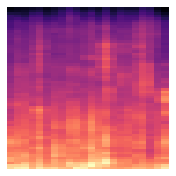

In [ ]:
filect = 0
print('Working on 1st batch 1 to 2000')
for i in dfv_1.itertuples():
  filect = filect + 1
  #print(str(filect))
  file = i[4]
  pngfile = i[5]
  #print(file, pngfile)
  print('Filecount: '+str(filect)+' Working on: '+file)
  # load wav file and determine sample rate automatically
  signal, sr = librosa.load(file, sr=None)
  # my parameters
  hop_length = 11025 # in num. of samples
  n_fft = 42336 # window in num. of samples
  hop_length_duration = float(hop_length)/sr
  n_fft_duration = float(n_fft)/sr
  # Mel filter banks
  filter_banks = librosa.filters.mel(n_fft=n_fft, sr=sr, n_mels=64)
  stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)
  # This will yield 96-length spectrograms
  spectrogram = np.abs(stft)
  # converted to 64 bin log-scaled Mel spectrogram,
  melspec = librosa.feature.melspectrogram(y=signal, sr=sr, S=spectrogram, n_fft=n_fft, hop_length=hop_length, win_length=None, window='hann', center=True, pad_mode='reflect', n_mels=64)
  log_mel_spectrogram = librosa.power_to_db(melspec, ref=np.max)
  #plt.figure(figsize=(2.24, 2.24))
  fig = librosa.display.specshow(log_mel_spectrogram, hop_length=hop_length)
  fig2 = plt.gcf()
  plt.axis('off')
  fig2.set_size_inches(2.9, 2.98)
  plt.savefig(pngfile, dpi=100, bbox_inches='tight', pad_inches=0, format='png')

print('start time: ')
print(startime)
print(time.ctime())

In [ ]:
! pwd
! mv /content/gdrive/MyDrive/validpng2/* /content/gdrive/MyDrive/dumpvalidpng/

/content/gdrive/MyDrive


In [ ]:
! ls /content/gdrive/MyDrive/dumpvalidpng | wc


   5998    5998   64458


In [ ]:
! ls /content/gdrive/MyDrive/validpng2 | wc

      0       0       0


Working on 2nd batch 2001 to 4000
Filecount: 1 Saving spectograms: /content/gdrive/MyDrive/validpng2/127120.png
Filecount: 2 Saving spectograms: /content/gdrive/MyDrive/validpng2/127121.png
Filecount: 3 Saving spectograms: /content/gdrive/MyDrive/validpng2/127126.png
Filecount: 4 Saving spectograms: /content/gdrive/MyDrive/validpng2/127127.png
Filecount: 5 Saving spectograms: /content/gdrive/MyDrive/validpng2/22682.png
Filecount: 6 Saving spectograms: /content/gdrive/MyDrive/validpng2/62628.png
Filecount: 7 Saving spectograms: /content/gdrive/MyDrive/validpng2/402614.png
Filecount: 8 Saving spectograms: /content/gdrive/MyDrive/validpng2/17081.png
Filecount: 9 Saving spectograms: /content/gdrive/MyDrive/validpng2/396984.png
Filecount: 10 Saving spectograms: /content/gdrive/MyDrive/validpng2/386751.png
Filecount: 11 Saving spectograms: /content/gdrive/MyDrive/validpng2/22719.png
Filecount: 12 Saving spectograms: /content/gdrive/MyDrive/validpng2/396995.png
Filecount: 13 Saving spectogram

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24345
  n_fft, y.shape[-1]


Filecount: 97 Saving spectograms: /content/gdrive/MyDrive/validpng2/434049.png
Filecount: 98 Saving spectograms: /content/gdrive/MyDrive/validpng2/115535.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21639
  n_fft, y.shape[-1]


Filecount: 99 Saving spectograms: /content/gdrive/MyDrive/validpng2/89213.png
Filecount: 100 Saving spectograms: /content/gdrive/MyDrive/validpng2/98843.png
Filecount: 101 Saving spectograms: /content/gdrive/MyDrive/validpng2/166489.png
Filecount: 102 Saving spectograms: /content/gdrive/MyDrive/validpng2/58382.png
Filecount: 103 Saving spectograms: /content/gdrive/MyDrive/validpng2/182501.png
Filecount: 104 Saving spectograms: /content/gdrive/MyDrive/validpng2/366219.png
Filecount: 105 Saving spectograms: /content/gdrive/MyDrive/validpng2/394223.png
Filecount: 106 Saving spectograms: /content/gdrive/MyDrive/validpng2/185951.png
Filecount: 107 Saving spectograms: /content/gdrive/MyDrive/validpng2/379170.png
Filecount: 108 Saving spectograms: /content/gdrive/MyDrive/validpng2/338322.png
Filecount: 109 Saving spectograms: /content/gdrive/MyDrive/validpng2/57596.png
Filecount: 110 Saving spectograms: /content/gdrive/MyDrive/validpng2/103076.png
Filecount: 111 Saving spectograms: /content/g

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13982
  n_fft, y.shape[-1]


Filecount: 130 Saving spectograms: /content/gdrive/MyDrive/validpng2/403207.png
Filecount: 131 Saving spectograms: /content/gdrive/MyDrive/validpng2/393694.png
Filecount: 132 Saving spectograms: /content/gdrive/MyDrive/validpng2/178497.png
Filecount: 133 Saving spectograms: /content/gdrive/MyDrive/validpng2/180257.png
Filecount: 134 Saving spectograms: /content/gdrive/MyDrive/validpng2/386766.png
Filecount: 135 Saving spectograms: /content/gdrive/MyDrive/validpng2/38272.png
Filecount: 136 Saving spectograms: /content/gdrive/MyDrive/validpng2/194252.png
Filecount: 137 Saving spectograms: /content/gdrive/MyDrive/validpng2/219532.png
Filecount: 138 Saving spectograms: /content/gdrive/MyDrive/validpng2/380440.png
Filecount: 139 Saving spectograms: /content/gdrive/MyDrive/validpng2/415023.png
Filecount: 140 Saving spectograms: /content/gdrive/MyDrive/validpng2/89210.png
Filecount: 141 Saving spectograms: /content/gdrive/MyDrive/validpng2/396307.png
Filecount: 142 Saving spectograms: /conten

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35695
  n_fft, y.shape[-1]


Filecount: 161 Saving spectograms: /content/gdrive/MyDrive/validpng2/393828.png
Filecount: 162 Saving spectograms: /content/gdrive/MyDrive/validpng2/259302.png
Filecount: 163 Saving spectograms: /content/gdrive/MyDrive/validpng2/100032.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14004
  n_fft, y.shape[-1]


Filecount: 164 Saving spectograms: /content/gdrive/MyDrive/validpng2/17414.png
Filecount: 165 Saving spectograms: /content/gdrive/MyDrive/validpng2/59513.png
Filecount: 166 Saving spectograms: /content/gdrive/MyDrive/validpng2/379181.png
Filecount: 167 Saving spectograms: /content/gdrive/MyDrive/validpng2/22973.png
Filecount: 168 Saving spectograms: /content/gdrive/MyDrive/validpng2/260773.png
Filecount: 169 Saving spectograms: /content/gdrive/MyDrive/validpng2/328055.png
Filecount: 170 Saving spectograms: /content/gdrive/MyDrive/validpng2/396220.png
Filecount: 171 Saving spectograms: /content/gdrive/MyDrive/validpng2/424958.png
Filecount: 172 Saving spectograms: /content/gdrive/MyDrive/validpng2/179386.png
Filecount: 173 Saving spectograms: /content/gdrive/MyDrive/validpng2/29596.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24404
  n_fft, y.shape[-1]


Filecount: 174 Saving spectograms: /content/gdrive/MyDrive/validpng2/189737.png
Filecount: 175 Saving spectograms: /content/gdrive/MyDrive/validpng2/54545.png
Filecount: 176 Saving spectograms: /content/gdrive/MyDrive/validpng2/57553.png
Filecount: 177 Saving spectograms: /content/gdrive/MyDrive/validpng2/118072.png
Filecount: 178 Saving spectograms: /content/gdrive/MyDrive/validpng2/326563.png
Filecount: 179 Saving spectograms: /content/gdrive/MyDrive/validpng2/253754.png
Filecount: 180 Saving spectograms: /content/gdrive/MyDrive/validpng2/17810.png
Filecount: 181 Saving spectograms: /content/gdrive/MyDrive/validpng2/94217.png
Filecount: 182 Saving spectograms: /content/gdrive/MyDrive/validpng2/26720.png
Filecount: 183 Saving spectograms: /content/gdrive/MyDrive/validpng2/207124.png
Filecount: 184 Saving spectograms: /content/gdrive/MyDrive/validpng2/412504.png
Filecount: 185 Saving spectograms: /content/gdrive/MyDrive/validpng2/408807.png
Filecount: 186 Saving spectograms: /content/g

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27657
  n_fft, y.shape[-1]


Filecount: 224 Saving spectograms: /content/gdrive/MyDrive/validpng2/330585.png
Filecount: 225 Saving spectograms: /content/gdrive/MyDrive/validpng2/65880.png
Filecount: 226 Saving spectograms: /content/gdrive/MyDrive/validpng2/426333.png
Filecount: 227 Saving spectograms: /content/gdrive/MyDrive/validpng2/188006.png
Filecount: 228 Saving spectograms: /content/gdrive/MyDrive/validpng2/182506.png
Filecount: 229 Saving spectograms: /content/gdrive/MyDrive/validpng2/153196.png
Filecount: 230 Saving spectograms: /content/gdrive/MyDrive/validpng2/391277.png
Filecount: 231 Saving spectograms: /content/gdrive/MyDrive/validpng2/244976.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32289
  n_fft, y.shape[-1]


Filecount: 232 Saving spectograms: /content/gdrive/MyDrive/validpng2/244977.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30254
  n_fft, y.shape[-1]


Filecount: 233 Saving spectograms: /content/gdrive/MyDrive/validpng2/154866.png
Filecount: 234 Saving spectograms: /content/gdrive/MyDrive/validpng2/244979.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24132
  n_fft, y.shape[-1]


Filecount: 235 Saving spectograms: /content/gdrive/MyDrive/validpng2/125940.png
Filecount: 236 Saving spectograms: /content/gdrive/MyDrive/validpng2/244978.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19294
  n_fft, y.shape[-1]


Filecount: 237 Saving spectograms: /content/gdrive/MyDrive/validpng2/148854.png
Filecount: 238 Saving spectograms: /content/gdrive/MyDrive/validpng2/329974.png
Filecount: 239 Saving spectograms: /content/gdrive/MyDrive/validpng2/365560.png
Filecount: 240 Saving spectograms: /content/gdrive/MyDrive/validpng2/191737.png
Filecount: 241 Saving spectograms: /content/gdrive/MyDrive/validpng2/104954.png
Filecount: 242 Saving spectograms: /content/gdrive/MyDrive/validpng2/127989.png
Filecount: 243 Saving spectograms: /content/gdrive/MyDrive/validpng2/240253.png
Filecount: 244 Saving spectograms: /content/gdrive/MyDrive/validpng2/114399.png
Filecount: 245 Saving spectograms: /content/gdrive/MyDrive/validpng2/182272.png
Filecount: 246 Saving spectograms: /content/gdrive/MyDrive/validpng2/232961.png
Filecount: 247 Saving spectograms: /content/gdrive/MyDrive/validpng2/182274.png
Filecount: 248 Saving spectograms: /content/gdrive/MyDrive/validpng2/182273.png
Filecount: 249 Saving spectograms: /cont

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=41069
  n_fft, y.shape[-1]


Filecount: 262 Saving spectograms: /content/gdrive/MyDrive/validpng2/325157.png
Filecount: 263 Saving spectograms: /content/gdrive/MyDrive/validpng2/55851.png
Filecount: 264 Saving spectograms: /content/gdrive/MyDrive/validpng2/370220.png
Filecount: 265 Saving spectograms: /content/gdrive/MyDrive/validpng2/370219.png
Filecount: 266 Saving spectograms: /content/gdrive/MyDrive/validpng2/46654.png
Filecount: 267 Saving spectograms: /content/gdrive/MyDrive/validpng2/46655.png
Filecount: 268 Saving spectograms: /content/gdrive/MyDrive/validpng2/105025.png
Filecount: 269 Saving spectograms: /content/gdrive/MyDrive/validpng2/151620.png
Filecount: 270 Saving spectograms: /content/gdrive/MyDrive/validpng2/344142.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=25088
  n_fft, y.shape[-1]


Filecount: 271 Saving spectograms: /content/gdrive/MyDrive/validpng2/233044.png
Filecount: 272 Saving spectograms: /content/gdrive/MyDrive/validpng2/107619.png
Filecount: 273 Saving spectograms: /content/gdrive/MyDrive/validpng2/107620.png
Filecount: 274 Saving spectograms: /content/gdrive/MyDrive/validpng2/107621.png
Filecount: 275 Saving spectograms: /content/gdrive/MyDrive/validpng2/192104.png
Filecount: 276 Saving spectograms: /content/gdrive/MyDrive/validpng2/347647.png
Filecount: 277 Saving spectograms: /content/gdrive/MyDrive/validpng2/233068.png
Filecount: 278 Saving spectograms: /content/gdrive/MyDrive/validpng2/338046.png
Filecount: 279 Saving spectograms: /content/gdrive/MyDrive/validpng2/274559.png
Filecount: 280 Saving spectograms: /content/gdrive/MyDrive/validpng2/343680.png
Filecount: 281 Saving spectograms: /content/gdrive/MyDrive/validpng2/52357.png
Filecount: 282 Saving spectograms: /content/gdrive/MyDrive/validpng2/368269.png
Filecount: 283 Saving spectograms: /conte

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40709
  n_fft, y.shape[-1]


Filecount: 290 Saving spectograms: /content/gdrive/MyDrive/validpng2/242846.png
Filecount: 291 Saving spectograms: /content/gdrive/MyDrive/validpng2/133797.png
Filecount: 292 Saving spectograms: /content/gdrive/MyDrive/validpng2/342184.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38869
  n_fft, y.shape[-1]


Filecount: 293 Saving spectograms: /content/gdrive/MyDrive/validpng2/259758.png
Filecount: 294 Saving spectograms: /content/gdrive/MyDrive/validpng2/361136.png
Filecount: 295 Saving spectograms: /content/gdrive/MyDrive/validpng2/170167.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19983
  n_fft, y.shape[-1]


Filecount: 296 Saving spectograms: /content/gdrive/MyDrive/validpng2/125630.png
Filecount: 297 Saving spectograms: /content/gdrive/MyDrive/validpng2/423108.png
Filecount: 298 Saving spectograms: /content/gdrive/MyDrive/validpng2/423109.png
Filecount: 299 Saving spectograms: /content/gdrive/MyDrive/validpng2/386758.png
Filecount: 300 Saving spectograms: /content/gdrive/MyDrive/validpng2/169673.png
Filecount: 301 Saving spectograms: /content/gdrive/MyDrive/validpng2/423114.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35832
  n_fft, y.shape[-1]


Filecount: 302 Saving spectograms: /content/gdrive/MyDrive/validpng2/174283.png
Filecount: 303 Saving spectograms: /content/gdrive/MyDrive/validpng2/185034.png
Filecount: 304 Saving spectograms: /content/gdrive/MyDrive/validpng2/423115.png
Filecount: 305 Saving spectograms: /content/gdrive/MyDrive/validpng2/275151.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16870
  n_fft, y.shape[-1]


Filecount: 306 Saving spectograms: /content/gdrive/MyDrive/validpng2/174290.png
Filecount: 307 Saving spectograms: /content/gdrive/MyDrive/validpng2/399065.png
Filecount: 308 Saving spectograms: /content/gdrive/MyDrive/validpng2/386780.png
Filecount: 309 Saving spectograms: /content/gdrive/MyDrive/validpng2/255716.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18522
  n_fft, y.shape[-1]


Filecount: 310 Saving spectograms: /content/gdrive/MyDrive/validpng2/171237.png
Filecount: 311 Saving spectograms: /content/gdrive/MyDrive/validpng2/171236.png
Filecount: 312 Saving spectograms: /content/gdrive/MyDrive/validpng2/320742.png
Filecount: 313 Saving spectograms: /content/gdrive/MyDrive/validpng2/127721.png
Filecount: 314 Saving spectograms: /content/gdrive/MyDrive/validpng2/127724.png
Filecount: 315 Saving spectograms: /content/gdrive/MyDrive/validpng2/127729.png
Filecount: 316 Saving spectograms: /content/gdrive/MyDrive/validpng2/240377.png
Filecount: 317 Saving spectograms: /content/gdrive/MyDrive/validpng2/127737.png
Filecount: 318 Saving spectograms: /content/gdrive/MyDrive/validpng2/120059.png
Filecount: 319 Saving spectograms: /content/gdrive/MyDrive/validpng2/398597.png
Filecount: 320 Saving spectograms: /content/gdrive/MyDrive/validpng2/200460.png
Filecount: 321 Saving spectograms: /content/gdrive/MyDrive/validpng2/382735.png
Filecount: 322 Saving spectograms: /cont

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22129
  n_fft, y.shape[-1]


Filecount: 329 Saving spectograms: /content/gdrive/MyDrive/validpng2/76089.png
Filecount: 330 Saving spectograms: /content/gdrive/MyDrive/validpng2/76090.png
Filecount: 331 Saving spectograms: /content/gdrive/MyDrive/validpng2/371001.png
Filecount: 332 Saving spectograms: /content/gdrive/MyDrive/validpng2/249146.png
Filecount: 333 Saving spectograms: /content/gdrive/MyDrive/validpng2/76093.png
Filecount: 334 Saving spectograms: /content/gdrive/MyDrive/validpng2/371004.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35280
  n_fft, y.shape[-1]


Filecount: 335 Saving spectograms: /content/gdrive/MyDrive/validpng2/371002.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26460
  n_fft, y.shape[-1]


Filecount: 336 Saving spectograms: /content/gdrive/MyDrive/validpng2/191289.png
Filecount: 337 Saving spectograms: /content/gdrive/MyDrive/validpng2/234305.png
Filecount: 338 Saving spectograms: /content/gdrive/MyDrive/validpng2/414023.png
Filecount: 339 Saving spectograms: /content/gdrive/MyDrive/validpng2/86346.png
Filecount: 340 Saving spectograms: /content/gdrive/MyDrive/validpng2/119633.png
Filecount: 341 Saving spectograms: /content/gdrive/MyDrive/validpng2/378204.png
Filecount: 342 Saving spectograms: /content/gdrive/MyDrive/validpng2/404334.png
Filecount: 343 Saving spectograms: /content/gdrive/MyDrive/validpng2/218480.png
Filecount: 344 Saving spectograms: /content/gdrive/MyDrive/validpng2/218484.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26496
  n_fft, y.shape[-1]


Filecount: 345 Saving spectograms: /content/gdrive/MyDrive/validpng2/37237.png
Filecount: 346 Saving spectograms: /content/gdrive/MyDrive/validpng2/218487.png
Filecount: 347 Saving spectograms: /content/gdrive/MyDrive/validpng2/20352.png
Filecount: 348 Saving spectograms: /content/gdrive/MyDrive/validpng2/338321.png
Filecount: 349 Saving spectograms: /content/gdrive/MyDrive/validpng2/88467.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26562
  n_fft, y.shape[-1]


Filecount: 350 Saving spectograms: /content/gdrive/MyDrive/validpng2/338324.png
Filecount: 351 Saving spectograms: /content/gdrive/MyDrive/validpng2/153492.png
Filecount: 352 Saving spectograms: /content/gdrive/MyDrive/validpng2/377245.png
Filecount: 353 Saving spectograms: /content/gdrive/MyDrive/validpng2/232868.png
Filecount: 354 Saving spectograms: /content/gdrive/MyDrive/validpng2/319399.png
Filecount: 355 Saving spectograms: /content/gdrive/MyDrive/validpng2/319400.png
Filecount: 356 Saving spectograms: /content/gdrive/MyDrive/validpng2/319401.png
Filecount: 357 Saving spectograms: /content/gdrive/MyDrive/validpng2/342952.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31744
  n_fft, y.shape[-1]


Filecount: 358 Saving spectograms: /content/gdrive/MyDrive/validpng2/388528.png
Filecount: 359 Saving spectograms: /content/gdrive/MyDrive/validpng2/393651.png
Filecount: 360 Saving spectograms: /content/gdrive/MyDrive/validpng2/78776.png
Filecount: 361 Saving spectograms: /content/gdrive/MyDrive/validpng2/380349.png
Filecount: 362 Saving spectograms: /content/gdrive/MyDrive/validpng2/68036.png
Filecount: 363 Saving spectograms: /content/gdrive/MyDrive/validpng2/393671.png
Filecount: 364 Saving spectograms: /content/gdrive/MyDrive/validpng2/67020.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26380
  n_fft, y.shape[-1]


Filecount: 365 Saving spectograms: /content/gdrive/MyDrive/validpng2/249298.png
Filecount: 366 Saving spectograms: /content/gdrive/MyDrive/validpng2/210901.png
Filecount: 367 Saving spectograms: /content/gdrive/MyDrive/validpng2/182236.png
Filecount: 368 Saving spectograms: /content/gdrive/MyDrive/validpng2/239596.png
Filecount: 369 Saving spectograms: /content/gdrive/MyDrive/validpng2/131571.png
Filecount: 370 Saving spectograms: /content/gdrive/MyDrive/validpng2/318973.png
Filecount: 371 Saving spectograms: /content/gdrive/MyDrive/validpng2/182271.png
Filecount: 372 Saving spectograms: /content/gdrive/MyDrive/validpng2/366066.png
Filecount: 373 Saving spectograms: /content/gdrive/MyDrive/validpng2/391544.png
Filecount: 374 Saving spectograms: /content/gdrive/MyDrive/validpng2/328905.png
Filecount: 375 Saving spectograms: /content/gdrive/MyDrive/validpng2/112354.png
Filecount: 376 Saving spectograms: /content/gdrive/MyDrive/validpng2/345134.png
Filecount: 377 Saving spectograms: /cont

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38037
  n_fft, y.shape[-1]


Filecount: 382 Saving spectograms: /content/gdrive/MyDrive/validpng2/345138.png
Filecount: 383 Saving spectograms: /content/gdrive/MyDrive/validpng2/426783.png
Filecount: 384 Saving spectograms: /content/gdrive/MyDrive/validpng2/340879.png
Filecount: 385 Saving spectograms: /content/gdrive/MyDrive/validpng2/420004.png
Filecount: 386 Saving spectograms: /content/gdrive/MyDrive/validpng2/366336.png
Filecount: 387 Saving spectograms: /content/gdrive/MyDrive/validpng2/181919.png
Filecount: 388 Saving spectograms: /content/gdrive/MyDrive/validpng2/330021.png
Filecount: 389 Saving spectograms: /content/gdrive/MyDrive/validpng2/163419.png
Filecount: 390 Saving spectograms: /content/gdrive/MyDrive/validpng2/235550.png
Filecount: 391 Saving spectograms: /content/gdrive/MyDrive/validpng2/411467.png
Filecount: 392 Saving spectograms: /content/gdrive/MyDrive/validpng2/258261.png
Filecount: 393 Saving spectograms: /content/gdrive/MyDrive/validpng2/1011.png
Filecount: 394 Saving spectograms: /conten

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28845
  n_fft, y.shape[-1]


Filecount: 438 Saving spectograms: /content/gdrive/MyDrive/validpng2/326383.png
Filecount: 439 Saving spectograms: /content/gdrive/MyDrive/validpng2/153166.png
Filecount: 440 Saving spectograms: /content/gdrive/MyDrive/validpng2/257005.png
Filecount: 441 Saving spectograms: /content/gdrive/MyDrive/validpng2/105387.png
Filecount: 442 Saving spectograms: /content/gdrive/MyDrive/validpng2/364707.png
Filecount: 443 Saving spectograms: /content/gdrive/MyDrive/validpng2/274910.png
Filecount: 444 Saving spectograms: /content/gdrive/MyDrive/validpng2/325526.png
Filecount: 445 Saving spectograms: /content/gdrive/MyDrive/validpng2/235561.png
Filecount: 446 Saving spectograms: /content/gdrive/MyDrive/validpng2/326922.png
Filecount: 447 Saving spectograms: /content/gdrive/MyDrive/validpng2/349691.png
Filecount: 448 Saving spectograms: /content/gdrive/MyDrive/validpng2/365050.png
Filecount: 449 Saving spectograms: /content/gdrive/MyDrive/validpng2/407567.png
Filecount: 450 Saving spectograms: /cont

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22634
  n_fft, y.shape[-1]


Filecount: 466 Saving spectograms: /content/gdrive/MyDrive/validpng2/325655.png
Filecount: 467 Saving spectograms: /content/gdrive/MyDrive/validpng2/366034.png
Filecount: 468 Saving spectograms: /content/gdrive/MyDrive/validpng2/257009.png
Filecount: 469 Saving spectograms: /content/gdrive/MyDrive/validpng2/23533.png
Filecount: 470 Saving spectograms: /content/gdrive/MyDrive/validpng2/52231.png
Filecount: 471 Saving spectograms: /content/gdrive/MyDrive/validpng2/166934.png
Filecount: 472 Saving spectograms: /content/gdrive/MyDrive/validpng2/416906.png
Filecount: 473 Saving spectograms: /content/gdrive/MyDrive/validpng2/368607.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15177
  n_fft, y.shape[-1]


Filecount: 474 Saving spectograms: /content/gdrive/MyDrive/validpng2/211078.png
Filecount: 475 Saving spectograms: /content/gdrive/MyDrive/validpng2/425992.png
Filecount: 476 Saving spectograms: /content/gdrive/MyDrive/validpng2/16397.png
Filecount: 477 Saving spectograms: /content/gdrive/MyDrive/validpng2/337934.png
Filecount: 478 Saving spectograms: /content/gdrive/MyDrive/validpng2/337941.png
Filecount: 479 Saving spectograms: /content/gdrive/MyDrive/validpng2/38939.png
Filecount: 480 Saving spectograms: /content/gdrive/MyDrive/validpng2/53277.png
Filecount: 481 Saving spectograms: /content/gdrive/MyDrive/validpng2/219168.png
Filecount: 482 Saving spectograms: /content/gdrive/MyDrive/validpng2/383021.png
Filecount: 483 Saving spectograms: /content/gdrive/MyDrive/validpng2/258115.png
Filecount: 484 Saving spectograms: /content/gdrive/MyDrive/validpng2/426051.png
Filecount: 485 Saving spectograms: /content/gdrive/MyDrive/validpng2/182352.png
Filecount: 486 Saving spectograms: /content

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20197
  n_fft, y.shape[-1]


Filecount: 487 Saving spectograms: /content/gdrive/MyDrive/validpng2/319612.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18900
  n_fft, y.shape[-1]


Filecount: 488 Saving spectograms: /content/gdrive/MyDrive/validpng2/233603.png
Filecount: 489 Saving spectograms: /content/gdrive/MyDrive/validpng2/233604.png
Filecount: 490 Saving spectograms: /content/gdrive/MyDrive/validpng2/342185.png
Filecount: 491 Saving spectograms: /content/gdrive/MyDrive/validpng2/121005.png
Filecount: 492 Saving spectograms: /content/gdrive/MyDrive/validpng2/178377.png
Filecount: 493 Saving spectograms: /content/gdrive/MyDrive/validpng2/121037.png
Filecount: 494 Saving spectograms: /content/gdrive/MyDrive/validpng2/24790.png
Filecount: 495 Saving spectograms: /content/gdrive/MyDrive/validpng2/112860.png
Filecount: 496 Saving spectograms: /content/gdrive/MyDrive/validpng2/223457.png
Filecount: 497 Saving spectograms: /content/gdrive/MyDrive/validpng2/334070.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14848
  n_fft, y.shape[-1]


Filecount: 498 Saving spectograms: /content/gdrive/MyDrive/validpng2/332024.png
Filecount: 499 Saving spectograms: /content/gdrive/MyDrive/validpng2/418041.png
Filecount: 500 Saving spectograms: /content/gdrive/MyDrive/validpng2/121080.png
Filecount: 501 Saving spectograms: /content/gdrive/MyDrive/validpng2/334084.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40072
  n_fft, y.shape[-1]


Filecount: 502 Saving spectograms: /content/gdrive/MyDrive/validpng2/121093.png
Filecount: 503 Saving spectograms: /content/gdrive/MyDrive/validpng2/131333.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18218
  n_fft, y.shape[-1]


Filecount: 504 Saving spectograms: /content/gdrive/MyDrive/validpng2/151817.png
Filecount: 505 Saving spectograms: /content/gdrive/MyDrive/validpng2/170255.png
Filecount: 506 Saving spectograms: /content/gdrive/MyDrive/validpng2/131350.png
Filecount: 507 Saving spectograms: /content/gdrive/MyDrive/validpng2/330035.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24064
  n_fft, y.shape[-1]


Filecount: 508 Saving spectograms: /content/gdrive/MyDrive/validpng2/401721.png
Filecount: 509 Saving spectograms: /content/gdrive/MyDrive/validpng2/401722.png
Filecount: 510 Saving spectograms: /content/gdrive/MyDrive/validpng2/145724.png
Filecount: 511 Saving spectograms: /content/gdrive/MyDrive/validpng2/330044.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37504
  n_fft, y.shape[-1]


Filecount: 512 Saving spectograms: /content/gdrive/MyDrive/validpng2/270655.png
Filecount: 513 Saving spectograms: /content/gdrive/MyDrive/validpng2/381279.png
Filecount: 514 Saving spectograms: /content/gdrive/MyDrive/validpng2/57695.png
Filecount: 515 Saving spectograms: /content/gdrive/MyDrive/validpng2/350577.png
Filecount: 516 Saving spectograms: /content/gdrive/MyDrive/validpng2/41339.png
Filecount: 517 Saving spectograms: /content/gdrive/MyDrive/validpng2/117130.png
Filecount: 518 Saving spectograms: /content/gdrive/MyDrive/validpng2/342422.png
Filecount: 519 Saving spectograms: /content/gdrive/MyDrive/validpng2/201161.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18091
  n_fft, y.shape[-1]


Filecount: 520 Saving spectograms: /content/gdrive/MyDrive/validpng2/238027.png
Filecount: 521 Saving spectograms: /content/gdrive/MyDrive/validpng2/170449.png
Filecount: 522 Saving spectograms: /content/gdrive/MyDrive/validpng2/387540.png
Filecount: 523 Saving spectograms: /content/gdrive/MyDrive/validpng2/68060.png
Filecount: 524 Saving spectograms: /content/gdrive/MyDrive/validpng2/219613.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21612
  n_fft, y.shape[-1]


Filecount: 525 Saving spectograms: /content/gdrive/MyDrive/validpng2/131557.png
Filecount: 526 Saving spectograms: /content/gdrive/MyDrive/validpng2/246253.png
Filecount: 527 Saving spectograms: /content/gdrive/MyDrive/validpng2/268784.png
Filecount: 528 Saving spectograms: /content/gdrive/MyDrive/validpng2/221683.png
Filecount: 529 Saving spectograms: /content/gdrive/MyDrive/validpng2/401940.png
Filecount: 530 Saving spectograms: /content/gdrive/MyDrive/validpng2/379416.png
Filecount: 531 Saving spectograms: /content/gdrive/MyDrive/validpng2/147999.png
Filecount: 532 Saving spectograms: /content/gdrive/MyDrive/validpng2/109102.png
Filecount: 533 Saving spectograms: /content/gdrive/MyDrive/validpng2/107055.png
Filecount: 534 Saving spectograms: /content/gdrive/MyDrive/validpng2/148016.png
Filecount: 535 Saving spectograms: /content/gdrive/MyDrive/validpng2/107054.png
Filecount: 536 Saving spectograms: /content/gdrive/MyDrive/validpng2/361045.png
Filecount: 537 Saving spectograms: /cont

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33723
  n_fft, y.shape[-1]


Filecount: 540 Saving spectograms: /content/gdrive/MyDrive/validpng2/197222.png
Filecount: 541 Saving spectograms: /content/gdrive/MyDrive/validpng2/197223.png
Filecount: 542 Saving spectograms: /content/gdrive/MyDrive/validpng2/211565.png
Filecount: 543 Saving spectograms: /content/gdrive/MyDrive/validpng2/103029.png
Filecount: 544 Saving spectograms: /content/gdrive/MyDrive/validpng2/103031.png
Filecount: 545 Saving spectograms: /content/gdrive/MyDrive/validpng2/176769.png
Filecount: 546 Saving spectograms: /content/gdrive/MyDrive/validpng2/115331.png
Filecount: 547 Saving spectograms: /content/gdrive/MyDrive/validpng2/98948.png
Filecount: 548 Saving spectograms: /content/gdrive/MyDrive/validpng2/21130.png
Filecount: 549 Saving spectograms: /content/gdrive/MyDrive/validpng2/131771.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=41344
  n_fft, y.shape[-1]


Filecount: 550 Saving spectograms: /content/gdrive/MyDrive/validpng2/185022.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14315
  n_fft, y.shape[-1]


Filecount: 551 Saving spectograms: /content/gdrive/MyDrive/validpng2/35521.png
Filecount: 552 Saving spectograms: /content/gdrive/MyDrive/validpng2/352969.png
Filecount: 553 Saving spectograms: /content/gdrive/MyDrive/validpng2/352970.png
Filecount: 554 Saving spectograms: /content/gdrive/MyDrive/validpng2/322275.png
Filecount: 555 Saving spectograms: /content/gdrive/MyDrive/validpng2/25324.png
Filecount: 556 Saving spectograms: /content/gdrive/MyDrive/validpng2/277229.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38032
  n_fft, y.shape[-1]


Filecount: 557 Saving spectograms: /content/gdrive/MyDrive/validpng2/223984.png
Filecount: 558 Saving spectograms: /content/gdrive/MyDrive/validpng2/74501.png
Filecount: 559 Saving spectograms: /content/gdrive/MyDrive/validpng2/236309.png
Filecount: 560 Saving spectograms: /content/gdrive/MyDrive/validpng2/105245.png
Filecount: 561 Saving spectograms: /content/gdrive/MyDrive/validpng2/353064.png
Filecount: 562 Saving spectograms: /content/gdrive/MyDrive/validpng2/361269.png
Filecount: 563 Saving spectograms: /content/gdrive/MyDrive/validpng2/420661.png
Filecount: 564 Saving spectograms: /content/gdrive/MyDrive/validpng2/183093.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21985
  n_fft, y.shape[-1]


Filecount: 565 Saving spectograms: /content/gdrive/MyDrive/validpng2/2872.png
Filecount: 566 Saving spectograms: /content/gdrive/MyDrive/validpng2/49990.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=34800
  n_fft, y.shape[-1]


Filecount: 567 Saving spectograms: /content/gdrive/MyDrive/validpng2/324423.png
Filecount: 568 Saving spectograms: /content/gdrive/MyDrive/validpng2/90964.png
Filecount: 569 Saving spectograms: /content/gdrive/MyDrive/validpng2/351062.png
Filecount: 570 Saving spectograms: /content/gdrive/MyDrive/validpng2/254819.png
Filecount: 571 Saving spectograms: /content/gdrive/MyDrive/validpng2/254822.png
Filecount: 572 Saving spectograms: /content/gdrive/MyDrive/validpng2/203624.png
Filecount: 573 Saving spectograms: /content/gdrive/MyDrive/validpng2/185196.png
Filecount: 574 Saving spectograms: /content/gdrive/MyDrive/validpng2/185197.png
Filecount: 575 Saving spectograms: /content/gdrive/MyDrive/validpng2/265076.png
Filecount: 576 Saving spectograms: /content/gdrive/MyDrive/validpng2/170876.png
Filecount: 577 Saving spectograms: /content/gdrive/MyDrive/validpng2/170877.png
Filecount: 578 Saving spectograms: /content/gdrive/MyDrive/validpng2/170880.png
Filecount: 579 Saving spectograms: /conte

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=25511
  n_fft, y.shape[-1]


Filecount: 587 Saving spectograms: /content/gdrive/MyDrive/validpng2/328720.png
Filecount: 588 Saving spectograms: /content/gdrive/MyDrive/validpng2/19479.png
Filecount: 589 Saving spectograms: /content/gdrive/MyDrive/validpng2/162845.png
Filecount: 590 Saving spectograms: /content/gdrive/MyDrive/validpng2/9248.png
Filecount: 591 Saving spectograms: /content/gdrive/MyDrive/validpng2/25648.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16454
  n_fft, y.shape[-1]


Filecount: 592 Saving spectograms: /content/gdrive/MyDrive/validpng2/351284.png
Filecount: 593 Saving spectograms: /content/gdrive/MyDrive/validpng2/351285.png
Filecount: 594 Saving spectograms: /content/gdrive/MyDrive/validpng2/60490.png
Filecount: 595 Saving spectograms: /content/gdrive/MyDrive/validpng2/70733.png
Filecount: 596 Saving spectograms: /content/gdrive/MyDrive/validpng2/173137.png
Filecount: 597 Saving spectograms: /content/gdrive/MyDrive/validpng2/347221.png
Filecount: 598 Saving spectograms: /content/gdrive/MyDrive/validpng2/58460.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14400
  n_fft, y.shape[-1]


Filecount: 599 Saving spectograms: /content/gdrive/MyDrive/validpng2/11361.png
Filecount: 600 Saving spectograms: /content/gdrive/MyDrive/validpng2/353380.png
Filecount: 601 Saving spectograms: /content/gdrive/MyDrive/validpng2/27785.png
Filecount: 602 Saving spectograms: /content/gdrive/MyDrive/validpng2/152714.png
Filecount: 603 Saving spectograms: /content/gdrive/MyDrive/validpng2/27787.png
Filecount: 604 Saving spectograms: /content/gdrive/MyDrive/validpng2/152716.png
Filecount: 605 Saving spectograms: /content/gdrive/MyDrive/validpng2/152717.png
Filecount: 606 Saving spectograms: /content/gdrive/MyDrive/validpng2/152718.png
Filecount: 607 Saving spectograms: /content/gdrive/MyDrive/validpng2/152715.png
Filecount: 608 Saving spectograms: /content/gdrive/MyDrive/validpng2/152720.png
Filecount: 609 Saving spectograms: /content/gdrive/MyDrive/validpng2/189595.png
Filecount: 610 Saving spectograms: /content/gdrive/MyDrive/validpng2/19615.png
Filecount: 611 Saving spectograms: /content/

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27326
  n_fft, y.shape[-1]


Filecount: 627 Saving spectograms: /content/gdrive/MyDrive/validpng2/138491.png
Filecount: 628 Saving spectograms: /content/gdrive/MyDrive/validpng2/46375.png
Filecount: 629 Saving spectograms: /content/gdrive/MyDrive/validpng2/275763.png
Filecount: 630 Saving spectograms: /content/gdrive/MyDrive/validpng2/171324.png
Filecount: 631 Saving spectograms: /content/gdrive/MyDrive/validpng2/89404.png
Filecount: 632 Saving spectograms: /content/gdrive/MyDrive/validpng2/44349.png
Filecount: 633 Saving spectograms: /content/gdrive/MyDrive/validpng2/25936.png
Filecount: 634 Saving spectograms: /content/gdrive/MyDrive/validpng2/173393.png
Filecount: 635 Saving spectograms: /content/gdrive/MyDrive/validpng2/167253.png
Filecount: 636 Saving spectograms: /content/gdrive/MyDrive/validpng2/425317.png
Filecount: 637 Saving spectograms: /content/gdrive/MyDrive/validpng2/351597.png
Filecount: 638 Saving spectograms: /content/gdrive/MyDrive/validpng2/124275.png
Filecount: 639 Saving spectograms: /content/

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28632
  n_fft, y.shape[-1]


Filecount: 650 Saving spectograms: /content/gdrive/MyDrive/validpng2/259524.png
Filecount: 651 Saving spectograms: /content/gdrive/MyDrive/validpng2/99784.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27105
  n_fft, y.shape[-1]


Filecount: 652 Saving spectograms: /content/gdrive/MyDrive/validpng2/165326.png
Filecount: 653 Saving spectograms: /content/gdrive/MyDrive/validpng2/165330.png
Filecount: 654 Saving spectograms: /content/gdrive/MyDrive/validpng2/165331.png
Filecount: 655 Saving spectograms: /content/gdrive/MyDrive/validpng2/400859.png
Filecount: 656 Saving spectograms: /content/gdrive/MyDrive/validpng2/124395.png
Filecount: 657 Saving spectograms: /content/gdrive/MyDrive/validpng2/339437.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14579
  n_fft, y.shape[-1]


Filecount: 658 Saving spectograms: /content/gdrive/MyDrive/validpng2/331253.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33324
  n_fft, y.shape[-1]


Filecount: 659 Saving spectograms: /content/gdrive/MyDrive/validpng2/331262.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35545
  n_fft, y.shape[-1]


Filecount: 660 Saving spectograms: /content/gdrive/MyDrive/validpng2/237063.png
Filecount: 661 Saving spectograms: /content/gdrive/MyDrive/validpng2/237066.png
Filecount: 662 Saving spectograms: /content/gdrive/MyDrive/validpng2/382474.png
Filecount: 663 Saving spectograms: /content/gdrive/MyDrive/validpng2/368148.png
Filecount: 664 Saving spectograms: /content/gdrive/MyDrive/validpng2/368149.png
Filecount: 665 Saving spectograms: /content/gdrive/MyDrive/validpng2/122392.png
Filecount: 666 Saving spectograms: /content/gdrive/MyDrive/validpng2/108056.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18660
  n_fft, y.shape[-1]


Filecount: 667 Saving spectograms: /content/gdrive/MyDrive/validpng2/114225.png
Filecount: 668 Saving spectograms: /content/gdrive/MyDrive/validpng2/417331.png
Filecount: 669 Saving spectograms: /content/gdrive/MyDrive/validpng2/122420.png
Filecount: 670 Saving spectograms: /content/gdrive/MyDrive/validpng2/122423.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32722
  n_fft, y.shape[-1]


Filecount: 671 Saving spectograms: /content/gdrive/MyDrive/validpng2/249404.png
Filecount: 672 Saving spectograms: /content/gdrive/MyDrive/validpng2/122429.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33832
  n_fft, y.shape[-1]


Filecount: 673 Saving spectograms: /content/gdrive/MyDrive/validpng2/122437.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36761
  n_fft, y.shape[-1]


Filecount: 674 Saving spectograms: /content/gdrive/MyDrive/validpng2/126543.png
Filecount: 675 Saving spectograms: /content/gdrive/MyDrive/validpng2/34395.png
Filecount: 676 Saving spectograms: /content/gdrive/MyDrive/validpng2/364124.png
Filecount: 677 Saving spectograms: /content/gdrive/MyDrive/validpng2/319087.png
Filecount: 678 Saving spectograms: /content/gdrive/MyDrive/validpng2/122485.png
Filecount: 679 Saving spectograms: /content/gdrive/MyDrive/validpng2/122490.png
Filecount: 680 Saving spectograms: /content/gdrive/MyDrive/validpng2/122491.png
Filecount: 681 Saving spectograms: /content/gdrive/MyDrive/validpng2/122492.png
Filecount: 682 Saving spectograms: /content/gdrive/MyDrive/validpng2/194172.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23637
  n_fft, y.shape[-1]


Filecount: 683 Saving spectograms: /content/gdrive/MyDrive/validpng2/122498.png
Filecount: 684 Saving spectograms: /content/gdrive/MyDrive/validpng2/122504.png
Filecount: 685 Saving spectograms: /content/gdrive/MyDrive/validpng2/337544.png
Filecount: 686 Saving spectograms: /content/gdrive/MyDrive/validpng2/122509.png
Filecount: 687 Saving spectograms: /content/gdrive/MyDrive/validpng2/341652.png
Filecount: 688 Saving spectograms: /content/gdrive/MyDrive/validpng2/335520.png
Filecount: 689 Saving spectograms: /content/gdrive/MyDrive/validpng2/40612.png
Filecount: 690 Saving spectograms: /content/gdrive/MyDrive/validpng2/22181.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13870
  n_fft, y.shape[-1]


Filecount: 691 Saving spectograms: /content/gdrive/MyDrive/validpng2/181937.png
Filecount: 692 Saving spectograms: /content/gdrive/MyDrive/validpng2/337613.png
Filecount: 693 Saving spectograms: /content/gdrive/MyDrive/validpng2/22226.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21452
  n_fft, y.shape[-1]


Filecount: 694 Saving spectograms: /content/gdrive/MyDrive/validpng2/134904.png
Filecount: 695 Saving spectograms: /content/gdrive/MyDrive/validpng2/388879.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17640
  n_fft, y.shape[-1]


Filecount: 696 Saving spectograms: /content/gdrive/MyDrive/validpng2/16144.png
Filecount: 697 Saving spectograms: /content/gdrive/MyDrive/validpng2/16152.png
Filecount: 698 Saving spectograms: /content/gdrive/MyDrive/validpng2/96028.png
Filecount: 699 Saving spectograms: /content/gdrive/MyDrive/validpng2/362281.png
Filecount: 700 Saving spectograms: /content/gdrive/MyDrive/validpng2/259886.png
Filecount: 701 Saving spectograms: /content/gdrive/MyDrive/validpng2/413491.png
Filecount: 702 Saving spectograms: /content/gdrive/MyDrive/validpng2/38709.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22288
  n_fft, y.shape[-1]


Filecount: 703 Saving spectograms: /content/gdrive/MyDrive/validpng2/173879.png
Filecount: 704 Saving spectograms: /content/gdrive/MyDrive/validpng2/173880.png
Filecount: 705 Saving spectograms: /content/gdrive/MyDrive/validpng2/173881.png
Filecount: 706 Saving spectograms: /content/gdrive/MyDrive/validpng2/155463.png
Filecount: 707 Saving spectograms: /content/gdrive/MyDrive/validpng2/96071.png
Filecount: 708 Saving spectograms: /content/gdrive/MyDrive/validpng2/96073.png
Filecount: 709 Saving spectograms: /content/gdrive/MyDrive/validpng2/376650.png
Filecount: 710 Saving spectograms: /content/gdrive/MyDrive/validpng2/413519.png
Filecount: 711 Saving spectograms: /content/gdrive/MyDrive/validpng2/399197.png
Filecount: 712 Saving spectograms: /content/gdrive/MyDrive/validpng2/399198.png
Filecount: 713 Saving spectograms: /content/gdrive/MyDrive/validpng2/59231.png
Filecount: 714 Saving spectograms: /content/gdrive/MyDrive/validpng2/49031.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17112
  n_fft, y.shape[-1]


Filecount: 715 Saving spectograms: /content/gdrive/MyDrive/validpng2/49042.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16125
  n_fft, y.shape[-1]


Filecount: 716 Saving spectograms: /content/gdrive/MyDrive/validpng2/36761.png
Filecount: 717 Saving spectograms: /content/gdrive/MyDrive/validpng2/36770.png
Filecount: 718 Saving spectograms: /content/gdrive/MyDrive/validpng2/235430.png
Filecount: 719 Saving spectograms: /content/gdrive/MyDrive/validpng2/118698.png
Filecount: 720 Saving spectograms: /content/gdrive/MyDrive/validpng2/319407.png
Filecount: 721 Saving spectograms: /content/gdrive/MyDrive/validpng2/204744.png
Filecount: 722 Saving spectograms: /content/gdrive/MyDrive/validpng2/38866.png
Filecount: 723 Saving spectograms: /content/gdrive/MyDrive/validpng2/198618.png
Filecount: 724 Saving spectograms: /content/gdrive/MyDrive/validpng2/368610.png
Filecount: 725 Saving spectograms: /content/gdrive/MyDrive/validpng2/425971.png
Filecount: 726 Saving spectograms: /content/gdrive/MyDrive/validpng2/337908.png
Filecount: 727 Saving spectograms: /content/gdrive/MyDrive/validpng2/141306.png
Filecount: 728 Saving spectograms: /content

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14269
  n_fft, y.shape[-1]


Filecount: 730 Saving spectograms: /content/gdrive/MyDrive/validpng2/123307.png
Filecount: 731 Saving spectograms: /content/gdrive/MyDrive/validpng2/16774.png
Filecount: 732 Saving spectograms: /content/gdrive/MyDrive/validpng2/29621.png
Filecount: 733 Saving spectograms: /content/gdrive/MyDrive/validpng2/123306.png
Filecount: 734 Saving spectograms: /content/gdrive/MyDrive/validpng2/345807.png
Filecount: 735 Saving spectograms: /content/gdrive/MyDrive/validpng2/123305.png
Filecount: 736 Saving spectograms: /content/gdrive/MyDrive/validpng2/185631.png
Filecount: 737 Saving spectograms: /content/gdrive/MyDrive/validpng2/59738.png
Filecount: 738 Saving spectograms: /content/gdrive/MyDrive/validpng2/349187.png
Filecount: 739 Saving spectograms: /content/gdrive/MyDrive/validpng2/399190.png
Filecount: 740 Saving spectograms: /content/gdrive/MyDrive/validpng2/14575.png
Filecount: 741 Saving spectograms: /content/gdrive/MyDrive/validpng2/98023.png
Filecount: 742 Saving spectograms: /content/g

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36629
  n_fft, y.shape[-1]


Filecount: 752 Saving spectograms: /content/gdrive/MyDrive/validpng2/366102.png
Filecount: 753 Saving spectograms: /content/gdrive/MyDrive/validpng2/345738.png
Filecount: 754 Saving spectograms: /content/gdrive/MyDrive/validpng2/399193.png
Filecount: 755 Saving spectograms: /content/gdrive/MyDrive/validpng2/344606.png
Filecount: 756 Saving spectograms: /content/gdrive/MyDrive/validpng2/42206.png
Filecount: 757 Saving spectograms: /content/gdrive/MyDrive/validpng2/132742.png
Filecount: 758 Saving spectograms: /content/gdrive/MyDrive/validpng2/399315.png
Filecount: 759 Saving spectograms: /content/gdrive/MyDrive/validpng2/345803.png
Filecount: 760 Saving spectograms: /content/gdrive/MyDrive/validpng2/342166.png
Filecount: 761 Saving spectograms: /content/gdrive/MyDrive/validpng2/415763.png
Filecount: 762 Saving spectograms: /content/gdrive/MyDrive/validpng2/123308.png
Filecount: 763 Saving spectograms: /content/gdrive/MyDrive/validpng2/23441.png
Filecount: 764 Saving spectograms: /conten

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17453
  n_fft, y.shape[-1]


Filecount: 790 Saving spectograms: /content/gdrive/MyDrive/validpng2/411883.png
Filecount: 791 Saving spectograms: /content/gdrive/MyDrive/validpng2/403570.png
Filecount: 792 Saving spectograms: /content/gdrive/MyDrive/validpng2/22268.png
Filecount: 793 Saving spectograms: /content/gdrive/MyDrive/validpng2/233473.png
Filecount: 794 Saving spectograms: /content/gdrive/MyDrive/validpng2/347139.png
Filecount: 795 Saving spectograms: /content/gdrive/MyDrive/validpng2/36365.png
Filecount: 796 Saving spectograms: /content/gdrive/MyDrive/validpng2/130585.png
Filecount: 797 Saving spectograms: /content/gdrive/MyDrive/validpng2/175142.png
Filecount: 798 Saving spectograms: /content/gdrive/MyDrive/validpng2/116779.png
Filecount: 799 Saving spectograms: /content/gdrive/MyDrive/validpng2/28716.png
Filecount: 800 Saving spectograms: /content/gdrive/MyDrive/validpng2/237105.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15308
  n_fft, y.shape[-1]


Filecount: 801 Saving spectograms: /content/gdrive/MyDrive/validpng2/170547.png
Filecount: 802 Saving spectograms: /content/gdrive/MyDrive/validpng2/114228.png
Filecount: 803 Saving spectograms: /content/gdrive/MyDrive/validpng2/170548.png
Filecount: 804 Saving spectograms: /content/gdrive/MyDrive/validpng2/241209.png
Filecount: 805 Saving spectograms: /content/gdrive/MyDrive/validpng2/241210.png
Filecount: 806 Saving spectograms: /content/gdrive/MyDrive/validpng2/186427.png
Filecount: 807 Saving spectograms: /content/gdrive/MyDrive/validpng2/171067.png
Filecount: 808 Saving spectograms: /content/gdrive/MyDrive/validpng2/404028.png
Filecount: 809 Saving spectograms: /content/gdrive/MyDrive/validpng2/320571.png
Filecount: 810 Saving spectograms: /content/gdrive/MyDrive/validpng2/171072.png
Filecount: 811 Saving spectograms: /content/gdrive/MyDrive/validpng2/341569.png
Filecount: 812 Saving spectograms: /content/gdrive/MyDrive/validpng2/28742.png
Filecount: 813 Saving spectograms: /conte

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24576
  n_fft, y.shape[-1]


Filecount: 823 Saving spectograms: /content/gdrive/MyDrive/validpng2/26271.png
Filecount: 824 Saving spectograms: /content/gdrive/MyDrive/validpng2/78506.png
Filecount: 825 Saving spectograms: /content/gdrive/MyDrive/validpng2/127149.png
Filecount: 826 Saving spectograms: /content/gdrive/MyDrive/validpng2/345275.png
Filecount: 827 Saving spectograms: /content/gdrive/MyDrive/validpng2/127167.png
Filecount: 828 Saving spectograms: /content/gdrive/MyDrive/validpng2/135873.png
Filecount: 829 Saving spectograms: /content/gdrive/MyDrive/validpng2/266947.png
Filecount: 830 Saving spectograms: /content/gdrive/MyDrive/validpng2/240839.png
Filecount: 831 Saving spectograms: /content/gdrive/MyDrive/validpng2/51405.png
Filecount: 832 Saving spectograms: /content/gdrive/MyDrive/validpng2/185048.png
Filecount: 833 Saving spectograms: /content/gdrive/MyDrive/validpng2/120028.png
Filecount: 834 Saving spectograms: /content/gdrive/MyDrive/validpng2/318687.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39232
  n_fft, y.shape[-1]


Filecount: 835 Saving spectograms: /content/gdrive/MyDrive/validpng2/17122.png
Filecount: 836 Saving spectograms: /content/gdrive/MyDrive/validpng2/406243.png
Filecount: 837 Saving spectograms: /content/gdrive/MyDrive/validpng2/110315.png
Filecount: 838 Saving spectograms: /content/gdrive/MyDrive/validpng2/34540.png
Filecount: 839 Saving spectograms: /content/gdrive/MyDrive/validpng2/265458.png
Filecount: 840 Saving spectograms: /content/gdrive/MyDrive/validpng2/123654.png
Filecount: 841 Saving spectograms: /content/gdrive/MyDrive/validpng2/422154.png
Filecount: 842 Saving spectograms: /content/gdrive/MyDrive/validpng2/123659.png
Filecount: 843 Saving spectograms: /content/gdrive/MyDrive/validpng2/131348.png
Filecount: 844 Saving spectograms: /content/gdrive/MyDrive/validpng2/377112.png
Filecount: 845 Saving spectograms: /content/gdrive/MyDrive/validpng2/185629.png
Filecount: 846 Saving spectograms: /content/gdrive/MyDrive/validpng2/426784.png
Filecount: 847 Saving spectograms: /conten

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35298
  n_fft, y.shape[-1]


Filecount: 852 Saving spectograms: /content/gdrive/MyDrive/validpng2/18768.png
Filecount: 853 Saving spectograms: /content/gdrive/MyDrive/validpng2/242007.png
Filecount: 854 Saving spectograms: /content/gdrive/MyDrive/validpng2/75105.png
Filecount: 855 Saving spectograms: /content/gdrive/MyDrive/validpng2/345955.png
Filecount: 856 Saving spectograms: /content/gdrive/MyDrive/validpng2/321387.png
Filecount: 857 Saving spectograms: /content/gdrive/MyDrive/validpng2/99694.png
Filecount: 858 Saving spectograms: /content/gdrive/MyDrive/validpng2/99695.png
Filecount: 859 Saving spectograms: /content/gdrive/MyDrive/validpng2/232816.png
Filecount: 860 Saving spectograms: /content/gdrive/MyDrive/validpng2/72571.png
Filecount: 861 Saving spectograms: /content/gdrive/MyDrive/validpng2/328066.png
Filecount: 862 Saving spectograms: /content/gdrive/MyDrive/validpng2/210308.png
Filecount: 863 Saving spectograms: /content/gdrive/MyDrive/validpng2/339861.png
Filecount: 864 Saving spectograms: /content/g

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=41004
  n_fft, y.shape[-1]


Filecount: 1155 Saving spectograms: /content/gdrive/MyDrive/validpng2/413742.png
Filecount: 1156 Saving spectograms: /content/gdrive/MyDrive/validpng2/329785.png
Filecount: 1157 Saving spectograms: /content/gdrive/MyDrive/validpng2/328763.png
Filecount: 1158 Saving spectograms: /content/gdrive/MyDrive/validpng2/66113.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36603
  n_fft, y.shape[-1]


Filecount: 1159 Saving spectograms: /content/gdrive/MyDrive/validpng2/406595.png
Filecount: 1160 Saving spectograms: /content/gdrive/MyDrive/validpng2/96838.png
Filecount: 1161 Saving spectograms: /content/gdrive/MyDrive/validpng2/108617.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14178
  n_fft, y.shape[-1]


Filecount: 1162 Saving spectograms: /content/gdrive/MyDrive/validpng2/243786.png
Filecount: 1163 Saving spectograms: /content/gdrive/MyDrive/validpng2/406093.png
Filecount: 1164 Saving spectograms: /content/gdrive/MyDrive/validpng2/325716.png
Filecount: 1165 Saving spectograms: /content/gdrive/MyDrive/validpng2/235605.png
Filecount: 1166 Saving spectograms: /content/gdrive/MyDrive/validpng2/403543.png
Filecount: 1167 Saving spectograms: /content/gdrive/MyDrive/validpng2/257650.png
Filecount: 1168 Saving spectograms: /content/gdrive/MyDrive/validpng2/39539.png
Filecount: 1169 Saving spectograms: /content/gdrive/MyDrive/validpng2/257652.png
Filecount: 1170 Saving spectograms: /content/gdrive/MyDrive/validpng2/352382.png
Filecount: 1171 Saving spectograms: /content/gdrive/MyDrive/validpng2/408703.png
Filecount: 1172 Saving spectograms: /content/gdrive/MyDrive/validpng2/260224.png
Filecount: 1173 Saving spectograms: /content/gdrive/MyDrive/validpng2/431745.png
Filecount: 1174 Saving specto

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29998
  n_fft, y.shape[-1]


Filecount: 1182 Saving spectograms: /content/gdrive/MyDrive/validpng2/403645.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22750
  n_fft, y.shape[-1]


Filecount: 1183 Saving spectograms: /content/gdrive/MyDrive/validpng2/78526.png
Filecount: 1184 Saving spectograms: /content/gdrive/MyDrive/validpng2/403646.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36160
  n_fft, y.shape[-1]


Filecount: 1185 Saving spectograms: /content/gdrive/MyDrive/validpng2/403644.png
Filecount: 1186 Saving spectograms: /content/gdrive/MyDrive/validpng2/260808.png
Filecount: 1187 Saving spectograms: /content/gdrive/MyDrive/validpng2/268500.png
Filecount: 1188 Saving spectograms: /content/gdrive/MyDrive/validpng2/320733.png
Filecount: 1189 Saving spectograms: /content/gdrive/MyDrive/validpng2/320734.png
Filecount: 1190 Saving spectograms: /content/gdrive/MyDrive/validpng2/422623.png
Filecount: 1191 Saving spectograms: /content/gdrive/MyDrive/validpng2/380642.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13690
  n_fft, y.shape[-1]


Filecount: 1192 Saving spectograms: /content/gdrive/MyDrive/validpng2/380643.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13860
  n_fft, y.shape[-1]


Filecount: 1193 Saving spectograms: /content/gdrive/MyDrive/validpng2/165110.png
Filecount: 1194 Saving spectograms: /content/gdrive/MyDrive/validpng2/167167.png
Filecount: 1195 Saving spectograms: /content/gdrive/MyDrive/validpng2/167168.png
Filecount: 1196 Saving spectograms: /content/gdrive/MyDrive/validpng2/327432.png
Filecount: 1197 Saving spectograms: /content/gdrive/MyDrive/validpng2/167184.png
Filecount: 1198 Saving spectograms: /content/gdrive/MyDrive/validpng2/167185.png
Filecount: 1199 Saving spectograms: /content/gdrive/MyDrive/validpng2/419089.png
Filecount: 1200 Saving spectograms: /content/gdrive/MyDrive/validpng2/34585.png
Filecount: 1201 Saving spectograms: /content/gdrive/MyDrive/validpng2/330523.png
Filecount: 1202 Saving spectograms: /content/gdrive/MyDrive/validpng2/35617.png
Filecount: 1203 Saving spectograms: /content/gdrive/MyDrive/validpng2/347944.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36255
  n_fft, y.shape[-1]


Filecount: 1204 Saving spectograms: /content/gdrive/MyDrive/validpng2/385834.png
Filecount: 1205 Saving spectograms: /content/gdrive/MyDrive/validpng2/378689.png
Filecount: 1206 Saving spectograms: /content/gdrive/MyDrive/validpng2/407363.png
Filecount: 1207 Saving spectograms: /content/gdrive/MyDrive/validpng2/172361.png
Filecount: 1208 Saving spectograms: /content/gdrive/MyDrive/validpng2/214359.png
Filecount: 1209 Saving spectograms: /content/gdrive/MyDrive/validpng2/197979.png
Filecount: 1210 Saving spectograms: /content/gdrive/MyDrive/validpng2/372573.png
Filecount: 1211 Saving spectograms: /content/gdrive/MyDrive/validpng2/66397.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31232
  n_fft, y.shape[-1]


Filecount: 1212 Saving spectograms: /content/gdrive/MyDrive/validpng2/234857.png
Filecount: 1213 Saving spectograms: /content/gdrive/MyDrive/validpng2/416117.png
Filecount: 1214 Saving spectograms: /content/gdrive/MyDrive/validpng2/338299.png
Filecount: 1215 Saving spectograms: /content/gdrive/MyDrive/validpng2/420735.png
Filecount: 1216 Saving spectograms: /content/gdrive/MyDrive/validpng2/177045.png
Filecount: 1217 Saving spectograms: /content/gdrive/MyDrive/validpng2/325532.png
Filecount: 1218 Saving spectograms: /content/gdrive/MyDrive/validpng2/400804.png
Filecount: 1219 Saving spectograms: /content/gdrive/MyDrive/validpng2/400805.png
Filecount: 1220 Saving spectograms: /content/gdrive/MyDrive/validpng2/351144.png
Filecount: 1221 Saving spectograms: /content/gdrive/MyDrive/validpng2/31166.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=34560
  n_fft, y.shape[-1]


Filecount: 1222 Saving spectograms: /content/gdrive/MyDrive/validpng2/31167.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=25344
  n_fft, y.shape[-1]


Filecount: 1223 Saving spectograms: /content/gdrive/MyDrive/validpng2/31168.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31104
  n_fft, y.shape[-1]


Filecount: 1224 Saving spectograms: /content/gdrive/MyDrive/validpng2/328130.png
Filecount: 1225 Saving spectograms: /content/gdrive/MyDrive/validpng2/366032.png
Filecount: 1226 Saving spectograms: /content/gdrive/MyDrive/validpng2/196563.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31281
  n_fft, y.shape[-1]


Filecount: 1227 Saving spectograms: /content/gdrive/MyDrive/validpng2/383444.png
Filecount: 1228 Saving spectograms: /content/gdrive/MyDrive/validpng2/34261.png
Filecount: 1229 Saving spectograms: /content/gdrive/MyDrive/validpng2/34260.png
Filecount: 1230 Saving spectograms: /content/gdrive/MyDrive/validpng2/408033.png
Filecount: 1231 Saving spectograms: /content/gdrive/MyDrive/validpng2/168423.png
Filecount: 1232 Saving spectograms: /content/gdrive/MyDrive/validpng2/368621.png
Filecount: 1233 Saving spectograms: /content/gdrive/MyDrive/validpng2/1008.png
Filecount: 1234 Saving spectograms: /content/gdrive/MyDrive/validpng2/1009.png
Filecount: 1235 Saving spectograms: /content/gdrive/MyDrive/validpng2/366576.png
Filecount: 1236 Saving spectograms: /content/gdrive/MyDrive/validpng2/202231.png
Filecount: 1237 Saving spectograms: /content/gdrive/MyDrive/validpng2/429066.png
Filecount: 1238 Saving spectograms: /content/gdrive/MyDrive/validpng2/348174.png
Filecount: 1239 Saving spectograms

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20504
  n_fft, y.shape[-1]


Filecount: 1247 Saving spectograms: /content/gdrive/MyDrive/validpng2/384068.png
Filecount: 1248 Saving spectograms: /content/gdrive/MyDrive/validpng2/384069.png
Filecount: 1249 Saving spectograms: /content/gdrive/MyDrive/validpng2/53829.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33123
  n_fft, y.shape[-1]


Filecount: 1250 Saving spectograms: /content/gdrive/MyDrive/validpng2/329803.png
Filecount: 1251 Saving spectograms: /content/gdrive/MyDrive/validpng2/172115.png
Filecount: 1252 Saving spectograms: /content/gdrive/MyDrive/validpng2/177244.png
Filecount: 1253 Saving spectograms: /content/gdrive/MyDrive/validpng2/257629.png
Filecount: 1254 Saving spectograms: /content/gdrive/MyDrive/validpng2/213096.png
Filecount: 1255 Saving spectograms: /content/gdrive/MyDrive/validpng2/59504.png
Filecount: 1256 Saving spectograms: /content/gdrive/MyDrive/validpng2/81543.png
Filecount: 1257 Saving spectograms: /content/gdrive/MyDrive/validpng2/69769.png
Filecount: 1258 Saving spectograms: /content/gdrive/MyDrive/validpng2/328856.png
Filecount: 1259 Saving spectograms: /content/gdrive/MyDrive/validpng2/328857.png
Filecount: 1260 Saving spectograms: /content/gdrive/MyDrive/validpng2/328858.png
Filecount: 1261 Saving spectograms: /content/gdrive/MyDrive/validpng2/60065.png
Filecount: 1262 Saving spectogra

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38808
  n_fft, y.shape[-1]


Filecount: 1332 Saving spectograms: /content/gdrive/MyDrive/validpng2/85435.png
Filecount: 1333 Saving spectograms: /content/gdrive/MyDrive/validpng2/346022.png
Filecount: 1334 Saving spectograms: /content/gdrive/MyDrive/validpng2/328123.png
Filecount: 1335 Saving spectograms: /content/gdrive/MyDrive/validpng2/187333.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36089
  n_fft, y.shape[-1]


Filecount: 1336 Saving spectograms: /content/gdrive/MyDrive/validpng2/250087.png
Filecount: 1337 Saving spectograms: /content/gdrive/MyDrive/validpng2/85727.png
Filecount: 1338 Saving spectograms: /content/gdrive/MyDrive/validpng2/158443.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33905
  n_fft, y.shape[-1]


Filecount: 1339 Saving spectograms: /content/gdrive/MyDrive/validpng2/81124.png
Filecount: 1340 Saving spectograms: /content/gdrive/MyDrive/validpng2/340901.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32768
  n_fft, y.shape[-1]


Filecount: 1341 Saving spectograms: /content/gdrive/MyDrive/validpng2/321048.png
Filecount: 1342 Saving spectograms: /content/gdrive/MyDrive/validpng2/426897.png
Filecount: 1343 Saving spectograms: /content/gdrive/MyDrive/validpng2/222022.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=34985
  n_fft, y.shape[-1]


Filecount: 1344 Saving spectograms: /content/gdrive/MyDrive/validpng2/332913.png
Filecount: 1345 Saving spectograms: /content/gdrive/MyDrive/validpng2/331630.png
Filecount: 1346 Saving spectograms: /content/gdrive/MyDrive/validpng2/215572.png
Filecount: 1347 Saving spectograms: /content/gdrive/MyDrive/validpng2/176725.png
Filecount: 1348 Saving spectograms: /content/gdrive/MyDrive/validpng2/362354.png
Filecount: 1349 Saving spectograms: /content/gdrive/MyDrive/validpng2/399800.png
Filecount: 1350 Saving spectograms: /content/gdrive/MyDrive/validpng2/408080.png
Filecount: 1351 Saving spectograms: /content/gdrive/MyDrive/validpng2/344335.png
Filecount: 1352 Saving spectograms: /content/gdrive/MyDrive/validpng2/391627.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14336
  n_fft, y.shape[-1]


Filecount: 1353 Saving spectograms: /content/gdrive/MyDrive/validpng2/426898.png
Filecount: 1354 Saving spectograms: /content/gdrive/MyDrive/validpng2/425208.png
Filecount: 1355 Saving spectograms: /content/gdrive/MyDrive/validpng2/348968.png
Filecount: 1356 Saving spectograms: /content/gdrive/MyDrive/validpng2/401763.png
Filecount: 1357 Saving spectograms: /content/gdrive/MyDrive/validpng2/187334.png
Filecount: 1358 Saving spectograms: /content/gdrive/MyDrive/validpng2/340868.png
Filecount: 1359 Saving spectograms: /content/gdrive/MyDrive/validpng2/178850.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20344
  n_fft, y.shape[-1]


Filecount: 1360 Saving spectograms: /content/gdrive/MyDrive/validpng2/180012.png
Filecount: 1361 Saving spectograms: /content/gdrive/MyDrive/validpng2/391296.png
Filecount: 1362 Saving spectograms: /content/gdrive/MyDrive/validpng2/16753.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30888
  n_fft, y.shape[-1]


Filecount: 1363 Saving spectograms: /content/gdrive/MyDrive/validpng2/186770.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37180
  n_fft, y.shape[-1]


Filecount: 1364 Saving spectograms: /content/gdrive/MyDrive/validpng2/264461.png
Filecount: 1365 Saving spectograms: /content/gdrive/MyDrive/validpng2/180377.png
Filecount: 1366 Saving spectograms: /content/gdrive/MyDrive/validpng2/400890.png
Filecount: 1367 Saving spectograms: /content/gdrive/MyDrive/validpng2/167139.png
Filecount: 1368 Saving spectograms: /content/gdrive/MyDrive/validpng2/61577.png
Filecount: 1369 Saving spectograms: /content/gdrive/MyDrive/validpng2/341391.png
Filecount: 1370 Saving spectograms: /content/gdrive/MyDrive/validpng2/90219.png
Filecount: 1371 Saving spectograms: /content/gdrive/MyDrive/validpng2/416969.png
Filecount: 1372 Saving spectograms: /content/gdrive/MyDrive/validpng2/326377.png
Filecount: 1373 Saving spectograms: /content/gdrive/MyDrive/validpng2/323167.png
Filecount: 1374 Saving spectograms: /content/gdrive/MyDrive/validpng2/26763.png
Filecount: 1375 Saving spectograms: /content/gdrive/MyDrive/validpng2/346147.png
Filecount: 1376 Saving spectogr

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37056
  n_fft, y.shape[-1]


Filecount: 1378 Saving spectograms: /content/gdrive/MyDrive/validpng2/426899.png
Filecount: 1379 Saving spectograms: /content/gdrive/MyDrive/validpng2/360371.png
Filecount: 1380 Saving spectograms: /content/gdrive/MyDrive/validpng2/383784.png
Filecount: 1381 Saving spectograms: /content/gdrive/MyDrive/validpng2/366311.png
Filecount: 1382 Saving spectograms: /content/gdrive/MyDrive/validpng2/66320.png
Filecount: 1383 Saving spectograms: /content/gdrive/MyDrive/validpng2/426954.png
Filecount: 1384 Saving spectograms: /content/gdrive/MyDrive/validpng2/345746.png
Filecount: 1385 Saving spectograms: /content/gdrive/MyDrive/validpng2/334136.png
Filecount: 1386 Saving spectograms: /content/gdrive/MyDrive/validpng2/26762.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32634
  n_fft, y.shape[-1]


Filecount: 1387 Saving spectograms: /content/gdrive/MyDrive/validpng2/201722.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32256
  n_fft, y.shape[-1]


Filecount: 1388 Saving spectograms: /content/gdrive/MyDrive/validpng2/214451.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39333
  n_fft, y.shape[-1]


Filecount: 1389 Saving spectograms: /content/gdrive/MyDrive/validpng2/415070.png
Filecount: 1390 Saving spectograms: /content/gdrive/MyDrive/validpng2/110658.png
Filecount: 1391 Saving spectograms: /content/gdrive/MyDrive/validpng2/402631.png
Filecount: 1392 Saving spectograms: /content/gdrive/MyDrive/validpng2/178612.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37949
  n_fft, y.shape[-1]


Filecount: 1393 Saving spectograms: /content/gdrive/MyDrive/validpng2/110431.png
Filecount: 1394 Saving spectograms: /content/gdrive/MyDrive/validpng2/388834.png
Filecount: 1395 Saving spectograms: /content/gdrive/MyDrive/validpng2/235178.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38565
  n_fft, y.shape[-1]


Filecount: 1396 Saving spectograms: /content/gdrive/MyDrive/validpng2/171254.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39154
  n_fft, y.shape[-1]


Filecount: 1397 Saving spectograms: /content/gdrive/MyDrive/validpng2/43884.png
Filecount: 1398 Saving spectograms: /content/gdrive/MyDrive/validpng2/66638.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26577
  n_fft, y.shape[-1]


Filecount: 1399 Saving spectograms: /content/gdrive/MyDrive/validpng2/365697.png
Filecount: 1400 Saving spectograms: /content/gdrive/MyDrive/validpng2/221851.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30603
  n_fft, y.shape[-1]


Filecount: 1401 Saving spectograms: /content/gdrive/MyDrive/validpng2/317014.png
Filecount: 1402 Saving spectograms: /content/gdrive/MyDrive/validpng2/170487.png
Filecount: 1403 Saving spectograms: /content/gdrive/MyDrive/validpng2/132717.png
Filecount: 1404 Saving spectograms: /content/gdrive/MyDrive/validpng2/277044.png
Filecount: 1405 Saving spectograms: /content/gdrive/MyDrive/validpng2/403230.png
Filecount: 1406 Saving spectograms: /content/gdrive/MyDrive/validpng2/114585.png
Filecount: 1407 Saving spectograms: /content/gdrive/MyDrive/validpng2/412507.png
Filecount: 1408 Saving spectograms: /content/gdrive/MyDrive/validpng2/323650.png
Filecount: 1409 Saving spectograms: /content/gdrive/MyDrive/validpng2/348290.png
Filecount: 1410 Saving spectograms: /content/gdrive/MyDrive/validpng2/151205.png
Filecount: 1411 Saving spectograms: /content/gdrive/MyDrive/validpng2/340869.png
Filecount: 1412 Saving spectograms: /content/gdrive/MyDrive/validpng2/264523.png
Filecount: 1413 Saving spect

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29267
  n_fft, y.shape[-1]


Filecount: 1425 Saving spectograms: /content/gdrive/MyDrive/validpng2/36131.png
Filecount: 1426 Saving spectograms: /content/gdrive/MyDrive/validpng2/318759.png
Filecount: 1427 Saving spectograms: /content/gdrive/MyDrive/validpng2/321578.png
Filecount: 1428 Saving spectograms: /content/gdrive/MyDrive/validpng2/145451.png
Filecount: 1429 Saving spectograms: /content/gdrive/MyDrive/validpng2/34091.png
Filecount: 1430 Saving spectograms: /content/gdrive/MyDrive/validpng2/259887.png
Filecount: 1431 Saving spectograms: /content/gdrive/MyDrive/validpng2/193328.png
Filecount: 1432 Saving spectograms: /content/gdrive/MyDrive/validpng2/208565.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32773
  n_fft, y.shape[-1]


Filecount: 1433 Saving spectograms: /content/gdrive/MyDrive/validpng2/404025.png
Filecount: 1434 Saving spectograms: /content/gdrive/MyDrive/validpng2/323005.png
Filecount: 1435 Saving spectograms: /content/gdrive/MyDrive/validpng2/186941.png
Filecount: 1436 Saving spectograms: /content/gdrive/MyDrive/validpng2/153405.png
Filecount: 1437 Saving spectograms: /content/gdrive/MyDrive/validpng2/99907.png
Filecount: 1438 Saving spectograms: /content/gdrive/MyDrive/validpng2/181827.png
Filecount: 1439 Saving spectograms: /content/gdrive/MyDrive/validpng2/34117.png
Filecount: 1440 Saving spectograms: /content/gdrive/MyDrive/validpng2/34118.png
Filecount: 1441 Saving spectograms: /content/gdrive/MyDrive/validpng2/217543.png
Filecount: 1442 Saving spectograms: /content/gdrive/MyDrive/validpng2/348234.png
Filecount: 1443 Saving spectograms: /content/gdrive/MyDrive/validpng2/365132.png
Filecount: 1444 Saving spectograms: /content/gdrive/MyDrive/validpng2/119497.png
Filecount: 1445 Saving spectogr

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37800
  n_fft, y.shape[-1]


Filecount: 1461 Saving spectograms: /content/gdrive/MyDrive/validpng2/412135.png
Filecount: 1462 Saving spectograms: /content/gdrive/MyDrive/validpng2/105091.png
Filecount: 1463 Saving spectograms: /content/gdrive/MyDrive/validpng2/328878.png
Filecount: 1464 Saving spectograms: /content/gdrive/MyDrive/validpng2/69735.png
Filecount: 1465 Saving spectograms: /content/gdrive/MyDrive/validpng2/337759.png
Filecount: 1466 Saving spectograms: /content/gdrive/MyDrive/validpng2/37247.png
Filecount: 1467 Saving spectograms: /content/gdrive/MyDrive/validpng2/337964.png
Filecount: 1468 Saving spectograms: /content/gdrive/MyDrive/validpng2/412130.png
Filecount: 1469 Saving spectograms: /content/gdrive/MyDrive/validpng2/43942.png
Filecount: 1470 Saving spectograms: /content/gdrive/MyDrive/validpng2/59974.png
Filecount: 1471 Saving spectograms: /content/gdrive/MyDrive/validpng2/45588.png
Filecount: 1472 Saving spectograms: /content/gdrive/MyDrive/validpng2/69736.png
Filecount: 1473 Saving spectograms

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18251
  n_fft, y.shape[-1]


Filecount: 1488 Saving spectograms: /content/gdrive/MyDrive/validpng2/89261.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28800
  n_fft, y.shape[-1]


Filecount: 1489 Saving spectograms: /content/gdrive/MyDrive/validpng2/51198.png
Filecount: 1490 Saving spectograms: /content/gdrive/MyDrive/validpng2/160542.png
Filecount: 1491 Saving spectograms: /content/gdrive/MyDrive/validpng2/169042.png
Filecount: 1492 Saving spectograms: /content/gdrive/MyDrive/validpng2/35843.png
Filecount: 1493 Saving spectograms: /content/gdrive/MyDrive/validpng2/35257.png
Filecount: 1494 Saving spectograms: /content/gdrive/MyDrive/validpng2/395314.png
Filecount: 1495 Saving spectograms: /content/gdrive/MyDrive/validpng2/69739.png
Filecount: 1496 Saving spectograms: /content/gdrive/MyDrive/validpng2/412132.png
Filecount: 1497 Saving spectograms: /content/gdrive/MyDrive/validpng2/59972.png
Filecount: 1498 Saving spectograms: /content/gdrive/MyDrive/validpng2/35256.png
Filecount: 1499 Saving spectograms: /content/gdrive/MyDrive/validpng2/30866.png
Filecount: 1500 Saving spectograms: /content/gdrive/MyDrive/validpng2/337767.png
Filecount: 1501 Saving spectograms:

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29696
  n_fft, y.shape[-1]


Filecount: 1757 Saving spectograms: /content/gdrive/MyDrive/validpng2/42143.png
Filecount: 1758 Saving spectograms: /content/gdrive/MyDrive/validpng2/366760.png
Filecount: 1759 Saving spectograms: /content/gdrive/MyDrive/validpng2/365764.png
Filecount: 1760 Saving spectograms: /content/gdrive/MyDrive/validpng2/235731.png
Filecount: 1761 Saving spectograms: /content/gdrive/MyDrive/validpng2/218840.png
Filecount: 1762 Saving spectograms: /content/gdrive/MyDrive/validpng2/45809.png
Filecount: 1763 Saving spectograms: /content/gdrive/MyDrive/validpng2/236285.png
Filecount: 1764 Saving spectograms: /content/gdrive/MyDrive/validpng2/338686.png
Filecount: 1765 Saving spectograms: /content/gdrive/MyDrive/validpng2/338687.png
Filecount: 1766 Saving spectograms: /content/gdrive/MyDrive/validpng2/401676.png
Filecount: 1767 Saving spectograms: /content/gdrive/MyDrive/validpng2/426780.png
Filecount: 1768 Saving spectograms: /content/gdrive/MyDrive/validpng2/365853.png
Filecount: 1769 Saving spectog

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36738
  n_fft, y.shape[-1]


Filecount: 1781 Saving spectograms: /content/gdrive/MyDrive/validpng2/77691.png
Filecount: 1782 Saving spectograms: /content/gdrive/MyDrive/validpng2/327550.png
Filecount: 1783 Saving spectograms: /content/gdrive/MyDrive/validpng2/429967.png
Filecount: 1784 Saving spectograms: /content/gdrive/MyDrive/validpng2/317335.png
Filecount: 1785 Saving spectograms: /content/gdrive/MyDrive/validpng2/336791.png
Filecount: 1786 Saving spectograms: /content/gdrive/MyDrive/validpng2/88474.png
Filecount: 1787 Saving spectograms: /content/gdrive/MyDrive/validpng2/381855.png
Filecount: 1788 Saving spectograms: /content/gdrive/MyDrive/validpng2/381856.png
Filecount: 1789 Saving spectograms: /content/gdrive/MyDrive/validpng2/381862.png
Filecount: 1790 Saving spectograms: /content/gdrive/MyDrive/validpng2/122803.png
Filecount: 1791 Saving spectograms: /content/gdrive/MyDrive/validpng2/415155.png
Filecount: 1792 Saving spectograms: /content/gdrive/MyDrive/validpng2/315837.png
Filecount: 1793 Saving spectog

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31620
  n_fft, y.shape[-1]


Filecount: 1796 Saving spectograms: /content/gdrive/MyDrive/validpng2/362652.png
Filecount: 1797 Saving spectograms: /content/gdrive/MyDrive/validpng2/412057.png
Filecount: 1798 Saving spectograms: /content/gdrive/MyDrive/validpng2/412016.png
Filecount: 1799 Saving spectograms: /content/gdrive/MyDrive/validpng2/62033.png
Filecount: 1800 Saving spectograms: /content/gdrive/MyDrive/validpng2/18272.png
Filecount: 1801 Saving spectograms: /content/gdrive/MyDrive/validpng2/238198.png
Filecount: 1802 Saving spectograms: /content/gdrive/MyDrive/validpng2/56380.png
Filecount: 1803 Saving spectograms: /content/gdrive/MyDrive/validpng2/196251.png
Filecount: 1804 Saving spectograms: /content/gdrive/MyDrive/validpng2/260179.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24076
  n_fft, y.shape[-1]


Filecount: 1805 Saving spectograms: /content/gdrive/MyDrive/validpng2/368006.png
Filecount: 1806 Saving spectograms: /content/gdrive/MyDrive/validpng2/414042.png
Filecount: 1807 Saving spectograms: /content/gdrive/MyDrive/validpng2/368013.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=41556
  n_fft, y.shape[-1]


Filecount: 1808 Saving spectograms: /content/gdrive/MyDrive/validpng2/172639.png
Filecount: 1809 Saving spectograms: /content/gdrive/MyDrive/validpng2/368007.png
Filecount: 1810 Saving spectograms: /content/gdrive/MyDrive/validpng2/412017.png
Filecount: 1811 Saving spectograms: /content/gdrive/MyDrive/validpng2/110388.png
Filecount: 1812 Saving spectograms: /content/gdrive/MyDrive/validpng2/94813.png
Filecount: 1813 Saving spectograms: /content/gdrive/MyDrive/validpng2/16940.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26083
  n_fft, y.shape[-1]


Filecount: 1814 Saving spectograms: /content/gdrive/MyDrive/validpng2/424596.png
Filecount: 1815 Saving spectograms: /content/gdrive/MyDrive/validpng2/333779.png
Filecount: 1816 Saving spectograms: /content/gdrive/MyDrive/validpng2/133869.png
Filecount: 1817 Saving spectograms: /content/gdrive/MyDrive/validpng2/88475.png
Filecount: 1818 Saving spectograms: /content/gdrive/MyDrive/validpng2/100030.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38313
  n_fft, y.shape[-1]


Filecount: 1819 Saving spectograms: /content/gdrive/MyDrive/validpng2/385892.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27519
  n_fft, y.shape[-1]


Filecount: 1820 Saving spectograms: /content/gdrive/MyDrive/validpng2/232343.png
Filecount: 1821 Saving spectograms: /content/gdrive/MyDrive/validpng2/92912.png
Filecount: 1822 Saving spectograms: /content/gdrive/MyDrive/validpng2/366855.png
Filecount: 1823 Saving spectograms: /content/gdrive/MyDrive/validpng2/362953.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32380
  n_fft, y.shape[-1]


Filecount: 1824 Saving spectograms: /content/gdrive/MyDrive/validpng2/425182.png
Filecount: 1825 Saving spectograms: /content/gdrive/MyDrive/validpng2/218834.png
Filecount: 1826 Saving spectograms: /content/gdrive/MyDrive/validpng2/256452.png
Filecount: 1827 Saving spectograms: /content/gdrive/MyDrive/validpng2/170298.png
Filecount: 1828 Saving spectograms: /content/gdrive/MyDrive/validpng2/173117.png
Filecount: 1829 Saving spectograms: /content/gdrive/MyDrive/validpng2/182307.png
Filecount: 1830 Saving spectograms: /content/gdrive/MyDrive/validpng2/331626.png
Filecount: 1831 Saving spectograms: /content/gdrive/MyDrive/validpng2/120017.png
Filecount: 1832 Saving spectograms: /content/gdrive/MyDrive/validpng2/43588.png
Filecount: 1833 Saving spectograms: /content/gdrive/MyDrive/validpng2/368009.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31379
  n_fft, y.shape[-1]


Filecount: 1834 Saving spectograms: /content/gdrive/MyDrive/validpng2/185439.png
Filecount: 1835 Saving spectograms: /content/gdrive/MyDrive/validpng2/246037.png
Filecount: 1836 Saving spectograms: /content/gdrive/MyDrive/validpng2/383777.png
Filecount: 1837 Saving spectograms: /content/gdrive/MyDrive/validpng2/58384.png
Filecount: 1838 Saving spectograms: /content/gdrive/MyDrive/validpng2/333916.png
Filecount: 1839 Saving spectograms: /content/gdrive/MyDrive/validpng2/85238.png
Filecount: 1840 Saving spectograms: /content/gdrive/MyDrive/validpng2/76589.png
Filecount: 1841 Saving spectograms: /content/gdrive/MyDrive/validpng2/407671.png
Filecount: 1842 Saving spectograms: /content/gdrive/MyDrive/validpng2/274151.png
Filecount: 1843 Saving spectograms: /content/gdrive/MyDrive/validpng2/18271.png
Filecount: 1844 Saving spectograms: /content/gdrive/MyDrive/validpng2/181169.png
Filecount: 1845 Saving spectograms: /content/gdrive/MyDrive/validpng2/174472.png
Filecount: 1846 Saving spectogra

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19036
  n_fft, y.shape[-1]


Filecount: 1901 Saving spectograms: /content/gdrive/MyDrive/validpng2/153111.png
Filecount: 1902 Saving spectograms: /content/gdrive/MyDrive/validpng2/85010.png
Filecount: 1903 Saving spectograms: /content/gdrive/MyDrive/validpng2/413824.png
Filecount: 1904 Saving spectograms: /content/gdrive/MyDrive/validpng2/54269.png
Filecount: 1905 Saving spectograms: /content/gdrive/MyDrive/validpng2/237281.png
Filecount: 1906 Saving spectograms: /content/gdrive/MyDrive/validpng2/278138.png
Filecount: 1907 Saving spectograms: /content/gdrive/MyDrive/validpng2/131568.png
Filecount: 1908 Saving spectograms: /content/gdrive/MyDrive/validpng2/327683.png
Filecount: 1909 Saving spectograms: /content/gdrive/MyDrive/validpng2/272242.png
Filecount: 1910 Saving spectograms: /content/gdrive/MyDrive/validpng2/351366.png
Filecount: 1911 Saving spectograms: /content/gdrive/MyDrive/validpng2/382973.png
Filecount: 1912 Saving spectograms: /content/gdrive/MyDrive/validpng2/82048.png
Filecount: 1913 Saving spectogr

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30304
  n_fft, y.shape[-1]


Filecount: 1915 Saving spectograms: /content/gdrive/MyDrive/validpng2/330300.png
Filecount: 1916 Saving spectograms: /content/gdrive/MyDrive/validpng2/364835.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37140
  n_fft, y.shape[-1]


Filecount: 1917 Saving spectograms: /content/gdrive/MyDrive/validpng2/23299.png
Filecount: 1918 Saving spectograms: /content/gdrive/MyDrive/validpng2/131202.png
Filecount: 1919 Saving spectograms: /content/gdrive/MyDrive/validpng2/275582.png
Filecount: 1920 Saving spectograms: /content/gdrive/MyDrive/validpng2/267547.png
Filecount: 1921 Saving spectograms: /content/gdrive/MyDrive/validpng2/144191.png
Filecount: 1922 Saving spectograms: /content/gdrive/MyDrive/validpng2/320344.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28206
  n_fft, y.shape[-1]


Filecount: 1923 Saving spectograms: /content/gdrive/MyDrive/validpng2/394338.png
Filecount: 1924 Saving spectograms: /content/gdrive/MyDrive/validpng2/245204.png
Filecount: 1925 Saving spectograms: /content/gdrive/MyDrive/validpng2/275580.png
Filecount: 1926 Saving spectograms: /content/gdrive/MyDrive/validpng2/180694.png
Filecount: 1927 Saving spectograms: /content/gdrive/MyDrive/validpng2/324410.png
Filecount: 1928 Saving spectograms: /content/gdrive/MyDrive/validpng2/377956.png
Filecount: 1929 Saving spectograms: /content/gdrive/MyDrive/validpng2/394057.png
Filecount: 1930 Saving spectograms: /content/gdrive/MyDrive/validpng2/154470.png
Filecount: 1931 Saving spectograms: /content/gdrive/MyDrive/validpng2/429494.png
Filecount: 1932 Saving spectograms: /content/gdrive/MyDrive/validpng2/417223.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13610
  n_fft, y.shape[-1]


Filecount: 1933 Saving spectograms: /content/gdrive/MyDrive/validpng2/366620.png
Filecount: 1934 Saving spectograms: /content/gdrive/MyDrive/validpng2/181679.png
Filecount: 1935 Saving spectograms: /content/gdrive/MyDrive/validpng2/35213.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21684
  n_fft, y.shape[-1]


Filecount: 1936 Saving spectograms: /content/gdrive/MyDrive/validpng2/360649.png
Filecount: 1937 Saving spectograms: /content/gdrive/MyDrive/validpng2/199893.png
Filecount: 1938 Saving spectograms: /content/gdrive/MyDrive/validpng2/187609.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32340
  n_fft, y.shape[-1]


Filecount: 1939 Saving spectograms: /content/gdrive/MyDrive/validpng2/35214.png
Filecount: 1940 Saving spectograms: /content/gdrive/MyDrive/validpng2/323006.png
Filecount: 1941 Saving spectograms: /content/gdrive/MyDrive/validpng2/198396.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17881
  n_fft, y.shape[-1]


Filecount: 1942 Saving spectograms: /content/gdrive/MyDrive/validpng2/288930.png
Filecount: 1943 Saving spectograms: /content/gdrive/MyDrive/validpng2/175520.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36515
  n_fft, y.shape[-1]


Filecount: 1944 Saving spectograms: /content/gdrive/MyDrive/validpng2/67273.png
Filecount: 1945 Saving spectograms: /content/gdrive/MyDrive/validpng2/142594.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29400
  n_fft, y.shape[-1]


Filecount: 1946 Saving spectograms: /content/gdrive/MyDrive/validpng2/88458.png
Filecount: 1947 Saving spectograms: /content/gdrive/MyDrive/validpng2/344131.png
Filecount: 1948 Saving spectograms: /content/gdrive/MyDrive/validpng2/134848.png
Filecount: 1949 Saving spectograms: /content/gdrive/MyDrive/validpng2/198397.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16569
  n_fft, y.shape[-1]


Filecount: 1950 Saving spectograms: /content/gdrive/MyDrive/validpng2/345181.png
Filecount: 1951 Saving spectograms: /content/gdrive/MyDrive/validpng2/127200.png
Filecount: 1952 Saving spectograms: /content/gdrive/MyDrive/validpng2/235180.png
Filecount: 1953 Saving spectograms: /content/gdrive/MyDrive/validpng2/393140.png
Filecount: 1954 Saving spectograms: /content/gdrive/MyDrive/validpng2/256287.png
Filecount: 1955 Saving spectograms: /content/gdrive/MyDrive/validpng2/193060.png
Filecount: 1956 Saving spectograms: /content/gdrive/MyDrive/validpng2/278226.png
Filecount: 1957 Saving spectograms: /content/gdrive/MyDrive/validpng2/85706.png
Filecount: 1958 Saving spectograms: /content/gdrive/MyDrive/validpng2/275581.png
Filecount: 1959 Saving spectograms: /content/gdrive/MyDrive/validpng2/106240.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30430
  n_fft, y.shape[-1]


Filecount: 1960 Saving spectograms: /content/gdrive/MyDrive/validpng2/250583.png
Filecount: 1961 Saving spectograms: /content/gdrive/MyDrive/validpng2/182812.png
Filecount: 1962 Saving spectograms: /content/gdrive/MyDrive/validpng2/118799.png
Filecount: 1963 Saving spectograms: /content/gdrive/MyDrive/validpng2/431533.png
Filecount: 1964 Saving spectograms: /content/gdrive/MyDrive/validpng2/239006.png
Filecount: 1965 Saving spectograms: /content/gdrive/MyDrive/validpng2/370298.png
Filecount: 1966 Saving spectograms: /content/gdrive/MyDrive/validpng2/48235.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22976
  n_fft, y.shape[-1]


Filecount: 1967 Saving spectograms: /content/gdrive/MyDrive/validpng2/82443.png
Filecount: 1968 Saving spectograms: /content/gdrive/MyDrive/validpng2/331965.png
Filecount: 1969 Saving spectograms: /content/gdrive/MyDrive/validpng2/321811.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40960
  n_fft, y.shape[-1]


Filecount: 1970 Saving spectograms: /content/gdrive/MyDrive/validpng2/149984.png
Filecount: 1971 Saving spectograms: /content/gdrive/MyDrive/validpng2/200341.png
Filecount: 1972 Saving spectograms: /content/gdrive/MyDrive/validpng2/96029.png
Filecount: 1973 Saving spectograms: /content/gdrive/MyDrive/validpng2/255565.png
Filecount: 1974 Saving spectograms: /content/gdrive/MyDrive/validpng2/400337.png
Filecount: 1975 Saving spectograms: /content/gdrive/MyDrive/validpng2/96030.png
Filecount: 1976 Saving spectograms: /content/gdrive/MyDrive/validpng2/140321.png
Filecount: 1977 Saving spectograms: /content/gdrive/MyDrive/validpng2/85705.png
Filecount: 1978 Saving spectograms: /content/gdrive/MyDrive/validpng2/369910.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15281
  n_fft, y.shape[-1]


Filecount: 1979 Saving spectograms: /content/gdrive/MyDrive/validpng2/198056.png
Filecount: 1980 Saving spectograms: /content/gdrive/MyDrive/validpng2/204147.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33516
  n_fft, y.shape[-1]


Filecount: 1981 Saving spectograms: /content/gdrive/MyDrive/validpng2/65292.png
Filecount: 1982 Saving spectograms: /content/gdrive/MyDrive/validpng2/237230.png
Filecount: 1983 Saving spectograms: /content/gdrive/MyDrive/validpng2/272223.png
Filecount: 1984 Saving spectograms: /content/gdrive/MyDrive/validpng2/26478.png
Filecount: 1985 Saving spectograms: /content/gdrive/MyDrive/validpng2/260721.png
Filecount: 1986 Saving spectograms: /content/gdrive/MyDrive/validpng2/387209.png
Filecount: 1987 Saving spectograms: /content/gdrive/MyDrive/validpng2/118796.png
Filecount: 1988 Saving spectograms: /content/gdrive/MyDrive/validpng2/214357.png
Filecount: 1989 Saving spectograms: /content/gdrive/MyDrive/validpng2/426317.png
Filecount: 1990 Saving spectograms: /content/gdrive/MyDrive/validpng2/119088.png
Filecount: 1991 Saving spectograms: /content/gdrive/MyDrive/validpng2/429697.png
Filecount: 1992 Saving spectograms: /content/gdrive/MyDrive/validpng2/417221.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21769
  n_fft, y.shape[-1]


Filecount: 1993 Saving spectograms: /content/gdrive/MyDrive/validpng2/207488.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26734
  n_fft, y.shape[-1]


Filecount: 1994 Saving spectograms: /content/gdrive/MyDrive/validpng2/433539.png
Filecount: 1995 Saving spectograms: /content/gdrive/MyDrive/validpng2/275585.png
Filecount: 1996 Saving spectograms: /content/gdrive/MyDrive/validpng2/118568.png
Filecount: 1997 Saving spectograms: /content/gdrive/MyDrive/validpng2/206144.png
Filecount: 1998 Saving spectograms: /content/gdrive/MyDrive/validpng2/38957.png
Filecount: 1999 Saving spectograms: /content/gdrive/MyDrive/validpng2/351367.png
start time: 
Mon Apr 25 21:49:25 2022
Tue Apr 26 03:01:48 2022


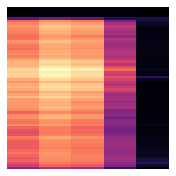

In [ ]:
filect = 0
print('Working on 2nd batch 2001 to 4000')
for i in dfv_2.itertuples():
  filect = filect + 1
  #print(str(filect))
  file = i[4]
  pngfile = i[5]
  #print(file, pngfile)
  #print('Filecount: '+str(filect)+' Working on: '+file)
  print('Filecount: '+str(filect)+' Saving spectograms: '+pngfile)
  # load wav file and determine sample rate automatically
  signal, sr = librosa.load(file, sr=None)
  # my parameters
  hop_length = 11025 # in num. of samples
  n_fft = 42336 # window in num. of samples
  hop_length_duration = float(hop_length)/sr
  n_fft_duration = float(n_fft)/sr
  # Mel filter banks
  filter_banks = librosa.filters.mel(n_fft=n_fft, sr=sr, n_mels=64)
  stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)
  # This will yield 96-length spectrograms
  spectrogram = np.abs(stft)
  # converted to 64 bin log-scaled Mel spectrogram,
  melspec = librosa.feature.melspectrogram(y=signal, sr=sr, S=spectrogram, n_fft=n_fft, hop_length=hop_length, win_length=None, window='hann', center=True, pad_mode='reflect', n_mels=64)
  log_mel_spectrogram = librosa.power_to_db(melspec, ref=np.max)
  #plt.figure(figsize=(2.24, 2.24))
  fig = librosa.display.specshow(log_mel_spectrogram, hop_length=hop_length)
  fig2 = plt.gcf()
  plt.axis('off')
  fig2.set_size_inches(2.9, 2.98)
  plt.savefig(pngfile, dpi=100, bbox_inches='tight', pad_inches=0, format='png')

print('start time: ')
print(startime)
print(time.ctime())

In [ ]:
! pwd
! ls /content/gdrive/MyDrive/dumpvalidpng | wc
! ls /content/gdrive/MyDrive/validpng2 | wc

/content/gdrive/MyDrive
   5998    5998   64458
   4229    4229   45599


In [ ]:
! mv /content/gdrive/MyDrive/validpng2/* /content/gdrive/MyDrive/dumpvalidpng/

In [ ]:
! ls /content/gdrive/MyDrive/dumpvalidpng | wc
! ls /content/gdrive/MyDrive/validpng2 | wc

  10227   10227  110057
      0       0       0


Working on 3rd batch 4001 to 6000
Filecount: 1 Saving spectograms: /content/gdrive/MyDrive/validpng2/427113.png
Filecount: 2 Saving spectograms: /content/gdrive/MyDrive/validpng2/211190.png
Filecount: 3 Saving spectograms: /content/gdrive/MyDrive/validpng2/408310.png
Filecount: 4 Saving spectograms: /content/gdrive/MyDrive/validpng2/325936.png
Filecount: 5 Saving spectograms: /content/gdrive/MyDrive/validpng2/194123.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17870
  n_fft, y.shape[-1]


Filecount: 6 Saving spectograms: /content/gdrive/MyDrive/validpng2/378688.png
Filecount: 7 Saving spectograms: /content/gdrive/MyDrive/validpng2/252858.png
Filecount: 8 Saving spectograms: /content/gdrive/MyDrive/validpng2/186347.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22060
  n_fft, y.shape[-1]


Filecount: 9 Saving spectograms: /content/gdrive/MyDrive/validpng2/272237.png
Filecount: 10 Saving spectograms: /content/gdrive/MyDrive/validpng2/94761.png
Filecount: 11 Saving spectograms: /content/gdrive/MyDrive/validpng2/187614.png
Filecount: 12 Saving spectograms: /content/gdrive/MyDrive/validpng2/85704.png
Filecount: 13 Saving spectograms: /content/gdrive/MyDrive/validpng2/411743.png
Filecount: 14 Saving spectograms: /content/gdrive/MyDrive/validpng2/48241.png
Filecount: 15 Saving spectograms: /content/gdrive/MyDrive/validpng2/190696.png
Filecount: 16 Saving spectograms: /content/gdrive/MyDrive/validpng2/167508.png
Filecount: 17 Saving spectograms: /content/gdrive/MyDrive/validpng2/198394.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26968
  n_fft, y.shape[-1]


Filecount: 18 Saving spectograms: /content/gdrive/MyDrive/validpng2/427683.png
Filecount: 19 Saving spectograms: /content/gdrive/MyDrive/validpng2/194978.png
Filecount: 20 Saving spectograms: /content/gdrive/MyDrive/validpng2/78369.png
Filecount: 21 Saving spectograms: /content/gdrive/MyDrive/validpng2/186473.png
Filecount: 22 Saving spectograms: /content/gdrive/MyDrive/validpng2/48212.png
Filecount: 23 Saving spectograms: /content/gdrive/MyDrive/validpng2/234855.png
Filecount: 24 Saving spectograms: /content/gdrive/MyDrive/validpng2/199878.png
Filecount: 25 Saving spectograms: /content/gdrive/MyDrive/validpng2/204920.png
Filecount: 26 Saving spectograms: /content/gdrive/MyDrive/validpng2/407655.png
Filecount: 27 Saving spectograms: /content/gdrive/MyDrive/validpng2/172357.png
Filecount: 28 Saving spectograms: /content/gdrive/MyDrive/validpng2/90787.png
Filecount: 29 Saving spectograms: /content/gdrive/MyDrive/validpng2/218999.png
Filecount: 30 Saving spectograms: /content/gdrive/MyDri

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18750
  n_fft, y.shape[-1]


Filecount: 118 Saving spectograms: /content/gdrive/MyDrive/validpng2/76732.png
Filecount: 119 Saving spectograms: /content/gdrive/MyDrive/validpng2/179714.png
Filecount: 120 Saving spectograms: /content/gdrive/MyDrive/validpng2/153104.png
Filecount: 121 Saving spectograms: /content/gdrive/MyDrive/validpng2/422158.png
Filecount: 122 Saving spectograms: /content/gdrive/MyDrive/validpng2/427684.png
Filecount: 123 Saving spectograms: /content/gdrive/MyDrive/validpng2/267499.png
Filecount: 124 Saving spectograms: /content/gdrive/MyDrive/validpng2/191851.png
Filecount: 125 Saving spectograms: /content/gdrive/MyDrive/validpng2/234860.png
Filecount: 126 Saving spectograms: /content/gdrive/MyDrive/validpng2/235942.png
Filecount: 127 Saving spectograms: /content/gdrive/MyDrive/validpng2/380812.png
Filecount: 128 Saving spectograms: /content/gdrive/MyDrive/validpng2/429248.png
Filecount: 129 Saving spectograms: /content/gdrive/MyDrive/validpng2/149256.png
Filecount: 130 Saving spectograms: /conte

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=34013
  n_fft, y.shape[-1]


Filecount: 143 Saving spectograms: /content/gdrive/MyDrive/validpng2/418335.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38016
  n_fft, y.shape[-1]


Filecount: 144 Saving spectograms: /content/gdrive/MyDrive/validpng2/383786.png
Filecount: 145 Saving spectograms: /content/gdrive/MyDrive/validpng2/82538.png
Filecount: 146 Saving spectograms: /content/gdrive/MyDrive/validpng2/412535.png
Filecount: 147 Saving spectograms: /content/gdrive/MyDrive/validpng2/93030.png
Filecount: 148 Saving spectograms: /content/gdrive/MyDrive/validpng2/221518.png
Filecount: 149 Saving spectograms: /content/gdrive/MyDrive/validpng2/57773.png
Filecount: 150 Saving spectograms: /content/gdrive/MyDrive/validpng2/408096.png
Filecount: 151 Saving spectograms: /content/gdrive/MyDrive/validpng2/119102.png
Filecount: 152 Saving spectograms: /content/gdrive/MyDrive/validpng2/407702.png
Filecount: 153 Saving spectograms: /content/gdrive/MyDrive/validpng2/180924.png
Filecount: 154 Saving spectograms: /content/gdrive/MyDrive/validpng2/128893.png
Filecount: 155 Saving spectograms: /content/gdrive/MyDrive/validpng2/369297.png
Filecount: 156 Saving spectograms: /content

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=41984
  n_fft, y.shape[-1]


Filecount: 164 Saving spectograms: /content/gdrive/MyDrive/validpng2/361135.png
Filecount: 165 Saving spectograms: /content/gdrive/MyDrive/validpng2/408748.png
Filecount: 166 Saving spectograms: /content/gdrive/MyDrive/validpng2/383785.png
Filecount: 167 Saving spectograms: /content/gdrive/MyDrive/validpng2/370761.png
Filecount: 168 Saving spectograms: /content/gdrive/MyDrive/validpng2/391301.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38573
  n_fft, y.shape[-1]


Filecount: 169 Saving spectograms: /content/gdrive/MyDrive/validpng2/238432.png
Filecount: 170 Saving spectograms: /content/gdrive/MyDrive/validpng2/57774.png
Filecount: 171 Saving spectograms: /content/gdrive/MyDrive/validpng2/156558.png
Filecount: 172 Saving spectograms: /content/gdrive/MyDrive/validpng2/110586.png
Filecount: 173 Saving spectograms: /content/gdrive/MyDrive/validpng2/408882.png
Filecount: 174 Saving spectograms: /content/gdrive/MyDrive/validpng2/399287.png
Filecount: 175 Saving spectograms: /content/gdrive/MyDrive/validpng2/171519.png
Filecount: 176 Saving spectograms: /content/gdrive/MyDrive/validpng2/59324.png
Filecount: 177 Saving spectograms: /content/gdrive/MyDrive/validpng2/344692.png
Filecount: 178 Saving spectograms: /content/gdrive/MyDrive/validpng2/411548.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35200
  n_fft, y.shape[-1]


Filecount: 179 Saving spectograms: /content/gdrive/MyDrive/validpng2/150231.png
Filecount: 180 Saving spectograms: /content/gdrive/MyDrive/validpng2/365710.png
Filecount: 181 Saving spectograms: /content/gdrive/MyDrive/validpng2/237468.png
Filecount: 182 Saving spectograms: /content/gdrive/MyDrive/validpng2/81883.png
Filecount: 183 Saving spectograms: /content/gdrive/MyDrive/validpng2/380121.png
Filecount: 184 Saving spectograms: /content/gdrive/MyDrive/validpng2/144692.png
Filecount: 185 Saving spectograms: /content/gdrive/MyDrive/validpng2/169224.png
Filecount: 186 Saving spectograms: /content/gdrive/MyDrive/validpng2/109505.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23040
  n_fft, y.shape[-1]


Filecount: 187 Saving spectograms: /content/gdrive/MyDrive/validpng2/143119.png
Filecount: 188 Saving spectograms: /content/gdrive/MyDrive/validpng2/170902.png
Filecount: 189 Saving spectograms: /content/gdrive/MyDrive/validpng2/372230.png
Filecount: 190 Saving spectograms: /content/gdrive/MyDrive/validpng2/410294.png
Filecount: 191 Saving spectograms: /content/gdrive/MyDrive/validpng2/238287.png
Filecount: 192 Saving spectograms: /content/gdrive/MyDrive/validpng2/232848.png
Filecount: 193 Saving spectograms: /content/gdrive/MyDrive/validpng2/394162.png
Filecount: 194 Saving spectograms: /content/gdrive/MyDrive/validpng2/328126.png
Filecount: 195 Saving spectograms: /content/gdrive/MyDrive/validpng2/254981.png
Filecount: 196 Saving spectograms: /content/gdrive/MyDrive/validpng2/67304.png
Filecount: 197 Saving spectograms: /content/gdrive/MyDrive/validpng2/41862.png
Filecount: 198 Saving spectograms: /content/gdrive/MyDrive/validpng2/154378.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39690
  n_fft, y.shape[-1]


Filecount: 199 Saving spectograms: /content/gdrive/MyDrive/validpng2/407191.png
Filecount: 200 Saving spectograms: /content/gdrive/MyDrive/validpng2/329924.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38220
  n_fft, y.shape[-1]


Filecount: 201 Saving spectograms: /content/gdrive/MyDrive/validpng2/347585.png
Filecount: 202 Saving spectograms: /content/gdrive/MyDrive/validpng2/383761.png
Filecount: 203 Saving spectograms: /content/gdrive/MyDrive/validpng2/174640.png
Filecount: 204 Saving spectograms: /content/gdrive/MyDrive/validpng2/65925.png
Filecount: 205 Saving spectograms: /content/gdrive/MyDrive/validpng2/347401.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=41344
  n_fft, y.shape[-1]


Filecount: 206 Saving spectograms: /content/gdrive/MyDrive/validpng2/94773.png
Filecount: 207 Saving spectograms: /content/gdrive/MyDrive/validpng2/372231.png
Filecount: 208 Saving spectograms: /content/gdrive/MyDrive/validpng2/152614.png
Filecount: 209 Saving spectograms: /content/gdrive/MyDrive/validpng2/199882.png
Filecount: 210 Saving spectograms: /content/gdrive/MyDrive/validpng2/82421.png
Filecount: 211 Saving spectograms: /content/gdrive/MyDrive/validpng2/83136.png
Filecount: 212 Saving spectograms: /content/gdrive/MyDrive/validpng2/152594.png
Filecount: 213 Saving spectograms: /content/gdrive/MyDrive/validpng2/23710.png
Filecount: 214 Saving spectograms: /content/gdrive/MyDrive/validpng2/346715.png
Filecount: 215 Saving spectograms: /content/gdrive/MyDrive/validpng2/430844.png
Filecount: 216 Saving spectograms: /content/gdrive/MyDrive/validpng2/265044.png
Filecount: 217 Saving spectograms: /content/gdrive/MyDrive/validpng2/194365.png
Filecount: 218 Saving spectograms: /content/

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31482
  n_fft, y.shape[-1]


Filecount: 240 Saving spectograms: /content/gdrive/MyDrive/validpng2/399825.png
Filecount: 241 Saving spectograms: /content/gdrive/MyDrive/validpng2/210535.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39807
  n_fft, y.shape[-1]


Filecount: 242 Saving spectograms: /content/gdrive/MyDrive/validpng2/395095.png
Filecount: 243 Saving spectograms: /content/gdrive/MyDrive/validpng2/353036.png
Filecount: 244 Saving spectograms: /content/gdrive/MyDrive/validpng2/347609.png
Filecount: 245 Saving spectograms: /content/gdrive/MyDrive/validpng2/83910.png
Filecount: 246 Saving spectograms: /content/gdrive/MyDrive/validpng2/60748.png
Filecount: 247 Saving spectograms: /content/gdrive/MyDrive/validpng2/366236.png
Filecount: 248 Saving spectograms: /content/gdrive/MyDrive/validpng2/388270.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35328
  n_fft, y.shape[-1]


Filecount: 249 Saving spectograms: /content/gdrive/MyDrive/validpng2/114254.png
Filecount: 250 Saving spectograms: /content/gdrive/MyDrive/validpng2/187284.png
Filecount: 251 Saving spectograms: /content/gdrive/MyDrive/validpng2/352673.png
Filecount: 252 Saving spectograms: /content/gdrive/MyDrive/validpng2/335393.png
Filecount: 253 Saving spectograms: /content/gdrive/MyDrive/validpng2/408590.png
Filecount: 254 Saving spectograms: /content/gdrive/MyDrive/validpng2/399826.png
Filecount: 255 Saving spectograms: /content/gdrive/MyDrive/validpng2/217609.png
Filecount: 256 Saving spectograms: /content/gdrive/MyDrive/validpng2/50454.png
Filecount: 257 Saving spectograms: /content/gdrive/MyDrive/validpng2/50455.png
Filecount: 258 Saving spectograms: /content/gdrive/MyDrive/validpng2/174618.png
Filecount: 259 Saving spectograms: /content/gdrive/MyDrive/validpng2/59677.png
Filecount: 260 Saving spectograms: /content/gdrive/MyDrive/validpng2/21187.png
Filecount: 261 Saving spectograms: /content/

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18514
  n_fft, y.shape[-1]


Filecount: 271 Saving spectograms: /content/gdrive/MyDrive/validpng2/260710.png
Filecount: 272 Saving spectograms: /content/gdrive/MyDrive/validpng2/404408.png
Filecount: 273 Saving spectograms: /content/gdrive/MyDrive/validpng2/325453.png
Filecount: 274 Saving spectograms: /content/gdrive/MyDrive/validpng2/125385.png
Filecount: 275 Saving spectograms: /content/gdrive/MyDrive/validpng2/201278.png
Filecount: 276 Saving spectograms: /content/gdrive/MyDrive/validpng2/119848.png
Filecount: 277 Saving spectograms: /content/gdrive/MyDrive/validpng2/326921.png
Filecount: 278 Saving spectograms: /content/gdrive/MyDrive/validpng2/206153.png
Filecount: 279 Saving spectograms: /content/gdrive/MyDrive/validpng2/387219.png
Filecount: 280 Saving spectograms: /content/gdrive/MyDrive/validpng2/142326.png
Filecount: 281 Saving spectograms: /content/gdrive/MyDrive/validpng2/125166.png
Filecount: 282 Saving spectograms: /content/gdrive/MyDrive/validpng2/98850.png
Filecount: 283 Saving spectograms: /conte

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20284
  n_fft, y.shape[-1]


Filecount: 324 Saving spectograms: /content/gdrive/MyDrive/validpng2/83537.png
Filecount: 325 Saving spectograms: /content/gdrive/MyDrive/validpng2/325947.png
Filecount: 326 Saving spectograms: /content/gdrive/MyDrive/validpng2/120027.png
Filecount: 327 Saving spectograms: /content/gdrive/MyDrive/validpng2/205104.png
Filecount: 328 Saving spectograms: /content/gdrive/MyDrive/validpng2/117812.png
Filecount: 329 Saving spectograms: /content/gdrive/MyDrive/validpng2/248046.png
Filecount: 330 Saving spectograms: /content/gdrive/MyDrive/validpng2/393900.png
Filecount: 331 Saving spectograms: /content/gdrive/MyDrive/validpng2/44775.png
Filecount: 332 Saving spectograms: /content/gdrive/MyDrive/validpng2/387216.png
Filecount: 333 Saving spectograms: /content/gdrive/MyDrive/validpng2/42966.png
Filecount: 334 Saving spectograms: /content/gdrive/MyDrive/validpng2/340026.png
Filecount: 335 Saving spectograms: /content/gdrive/MyDrive/validpng2/339464.png
Filecount: 336 Saving spectograms: /content

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36467
  n_fft, y.shape[-1]


Filecount: 363 Saving spectograms: /content/gdrive/MyDrive/validpng2/135903.png
Filecount: 364 Saving spectograms: /content/gdrive/MyDrive/validpng2/407348.png
Filecount: 365 Saving spectograms: /content/gdrive/MyDrive/validpng2/31505.png
Filecount: 366 Saving spectograms: /content/gdrive/MyDrive/validpng2/106245.png
Filecount: 367 Saving spectograms: /content/gdrive/MyDrive/validpng2/137894.png
Filecount: 368 Saving spectograms: /content/gdrive/MyDrive/validpng2/42959.png
Filecount: 369 Saving spectograms: /content/gdrive/MyDrive/validpng2/420887.png
Filecount: 370 Saving spectograms: /content/gdrive/MyDrive/validpng2/407745.png
Filecount: 371 Saving spectograms: /content/gdrive/MyDrive/validpng2/407555.png
Filecount: 372 Saving spectograms: /content/gdrive/MyDrive/validpng2/70907.png
Filecount: 373 Saving spectograms: /content/gdrive/MyDrive/validpng2/167201.png
Filecount: 374 Saving spectograms: /content/gdrive/MyDrive/validpng2/408832.png
Filecount: 375 Saving spectograms: /content

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23552
  n_fft, y.shape[-1]


Filecount: 405 Saving spectograms: /content/gdrive/MyDrive/validpng2/403518.png
Filecount: 406 Saving spectograms: /content/gdrive/MyDrive/validpng2/206007.png
Filecount: 407 Saving spectograms: /content/gdrive/MyDrive/validpng2/366897.png
Filecount: 408 Saving spectograms: /content/gdrive/MyDrive/validpng2/131579.png
Filecount: 409 Saving spectograms: /content/gdrive/MyDrive/validpng2/70090.png
Filecount: 410 Saving spectograms: /content/gdrive/MyDrive/validpng2/180520.png
Filecount: 411 Saving spectograms: /content/gdrive/MyDrive/validpng2/61053.png
Filecount: 412 Saving spectograms: /content/gdrive/MyDrive/validpng2/404000.png
Filecount: 413 Saving spectograms: /content/gdrive/MyDrive/validpng2/16794.png
Filecount: 414 Saving spectograms: /content/gdrive/MyDrive/validpng2/328069.png
Filecount: 415 Saving spectograms: /content/gdrive/MyDrive/validpng2/180538.png
Filecount: 416 Saving spectograms: /content/gdrive/MyDrive/validpng2/94122.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13312
  n_fft, y.shape[-1]


Filecount: 417 Saving spectograms: /content/gdrive/MyDrive/validpng2/163418.png
Filecount: 418 Saving spectograms: /content/gdrive/MyDrive/validpng2/409033.png
Filecount: 419 Saving spectograms: /content/gdrive/MyDrive/validpng2/328067.png
Filecount: 420 Saving spectograms: /content/gdrive/MyDrive/validpng2/191904.png
Filecount: 421 Saving spectograms: /content/gdrive/MyDrive/validpng2/408043.png
Filecount: 422 Saving spectograms: /content/gdrive/MyDrive/validpng2/142593.png
Filecount: 423 Saving spectograms: /content/gdrive/MyDrive/validpng2/326123.png
Filecount: 424 Saving spectograms: /content/gdrive/MyDrive/validpng2/406836.png
Filecount: 425 Saving spectograms: /content/gdrive/MyDrive/validpng2/206171.png
Filecount: 426 Saving spectograms: /content/gdrive/MyDrive/validpng2/38542.png
Filecount: 427 Saving spectograms: /content/gdrive/MyDrive/validpng2/157156.png
Filecount: 428 Saving spectograms: /content/gdrive/MyDrive/validpng2/157153.png
Filecount: 429 Saving spectograms: /conte

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40982
  n_fft, y.shape[-1]


Filecount: 432 Saving spectograms: /content/gdrive/MyDrive/validpng2/96027.png
Filecount: 433 Saving spectograms: /content/gdrive/MyDrive/validpng2/221788.png
Filecount: 434 Saving spectograms: /content/gdrive/MyDrive/validpng2/13511.png
Filecount: 435 Saving spectograms: /content/gdrive/MyDrive/validpng2/172758.png
Filecount: 436 Saving spectograms: /content/gdrive/MyDrive/validpng2/221785.png
Filecount: 437 Saving spectograms: /content/gdrive/MyDrive/validpng2/82262.png
Filecount: 438 Saving spectograms: /content/gdrive/MyDrive/validpng2/169928.png
Filecount: 439 Saving spectograms: /content/gdrive/MyDrive/validpng2/205016.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20759
  n_fft, y.shape[-1]


Filecount: 440 Saving spectograms: /content/gdrive/MyDrive/validpng2/391496.png
Filecount: 441 Saving spectograms: /content/gdrive/MyDrive/validpng2/427008.png
Filecount: 442 Saving spectograms: /content/gdrive/MyDrive/validpng2/402166.png
Filecount: 443 Saving spectograms: /content/gdrive/MyDrive/validpng2/321203.png
Filecount: 444 Saving spectograms: /content/gdrive/MyDrive/validpng2/161657.png
Filecount: 445 Saving spectograms: /content/gdrive/MyDrive/validpng2/33853.png
Filecount: 446 Saving spectograms: /content/gdrive/MyDrive/validpng2/404410.png
Filecount: 447 Saving spectograms: /content/gdrive/MyDrive/validpng2/331646.png
Filecount: 448 Saving spectograms: /content/gdrive/MyDrive/validpng2/266950.png
Filecount: 449 Saving spectograms: /content/gdrive/MyDrive/validpng2/186419.png
Filecount: 450 Saving spectograms: /content/gdrive/MyDrive/validpng2/33854.png
Filecount: 451 Saving spectograms: /content/gdrive/MyDrive/validpng2/181261.png
Filecount: 452 Saving spectograms: /conten

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16283
  n_fft, y.shape[-1]


Filecount: 457 Saving spectograms: /content/gdrive/MyDrive/validpng2/221786.png
Filecount: 458 Saving spectograms: /content/gdrive/MyDrive/validpng2/105385.png
Filecount: 459 Saving spectograms: /content/gdrive/MyDrive/validpng2/353793.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19684
  n_fft, y.shape[-1]


Filecount: 460 Saving spectograms: /content/gdrive/MyDrive/validpng2/157157.png
Filecount: 461 Saving spectograms: /content/gdrive/MyDrive/validpng2/90656.png
Filecount: 462 Saving spectograms: /content/gdrive/MyDrive/validpng2/379506.png
Filecount: 463 Saving spectograms: /content/gdrive/MyDrive/validpng2/390340.png
Filecount: 464 Saving spectograms: /content/gdrive/MyDrive/validpng2/370876.png
Filecount: 465 Saving spectograms: /content/gdrive/MyDrive/validpng2/157152.png
Filecount: 466 Saving spectograms: /content/gdrive/MyDrive/validpng2/256579.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32266
  n_fft, y.shape[-1]


Filecount: 467 Saving spectograms: /content/gdrive/MyDrive/validpng2/386748.png
Filecount: 468 Saving spectograms: /content/gdrive/MyDrive/validpng2/347537.png
Filecount: 469 Saving spectograms: /content/gdrive/MyDrive/validpng2/338392.png
Filecount: 470 Saving spectograms: /content/gdrive/MyDrive/validpng2/157150.png
Filecount: 471 Saving spectograms: /content/gdrive/MyDrive/validpng2/221787.png
Filecount: 472 Saving spectograms: /content/gdrive/MyDrive/validpng2/267486.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20534
  n_fft, y.shape[-1]


Filecount: 473 Saving spectograms: /content/gdrive/MyDrive/validpng2/96025.png
Filecount: 474 Saving spectograms: /content/gdrive/MyDrive/validpng2/90381.png
Filecount: 475 Saving spectograms: /content/gdrive/MyDrive/validpng2/144187.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14368
  n_fft, y.shape[-1]


Filecount: 476 Saving spectograms: /content/gdrive/MyDrive/validpng2/413202.png
Filecount: 477 Saving spectograms: /content/gdrive/MyDrive/validpng2/105380.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20479
  n_fft, y.shape[-1]


Filecount: 478 Saving spectograms: /content/gdrive/MyDrive/validpng2/41308.png
Filecount: 479 Saving spectograms: /content/gdrive/MyDrive/validpng2/266949.png
Filecount: 480 Saving spectograms: /content/gdrive/MyDrive/validpng2/33852.png
Filecount: 481 Saving spectograms: /content/gdrive/MyDrive/validpng2/39319.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21616
  n_fft, y.shape[-1]


Filecount: 482 Saving spectograms: /content/gdrive/MyDrive/validpng2/82043.png
Filecount: 483 Saving spectograms: /content/gdrive/MyDrive/validpng2/205040.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14771
  n_fft, y.shape[-1]


Filecount: 484 Saving spectograms: /content/gdrive/MyDrive/validpng2/388272.png
Filecount: 485 Saving spectograms: /content/gdrive/MyDrive/validpng2/326978.png
Filecount: 486 Saving spectograms: /content/gdrive/MyDrive/validpng2/365569.png
Filecount: 487 Saving spectograms: /content/gdrive/MyDrive/validpng2/321198.png
Filecount: 488 Saving spectograms: /content/gdrive/MyDrive/validpng2/35835.png
Filecount: 489 Saving spectograms: /content/gdrive/MyDrive/validpng2/105381.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32210
  n_fft, y.shape[-1]


Filecount: 490 Saving spectograms: /content/gdrive/MyDrive/validpng2/268128.png
Filecount: 491 Saving spectograms: /content/gdrive/MyDrive/validpng2/144184.png
Filecount: 492 Saving spectograms: /content/gdrive/MyDrive/validpng2/207485.png
Filecount: 493 Saving spectograms: /content/gdrive/MyDrive/validpng2/321200.png
Filecount: 494 Saving spectograms: /content/gdrive/MyDrive/validpng2/427140.png
Filecount: 495 Saving spectograms: /content/gdrive/MyDrive/validpng2/35836.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17385
  n_fft, y.shape[-1]


Filecount: 496 Saving spectograms: /content/gdrive/MyDrive/validpng2/431980.png
Filecount: 497 Saving spectograms: /content/gdrive/MyDrive/validpng2/93052.png
Filecount: 498 Saving spectograms: /content/gdrive/MyDrive/validpng2/19704.png
Filecount: 499 Saving spectograms: /content/gdrive/MyDrive/validpng2/193747.png
Filecount: 500 Saving spectograms: /content/gdrive/MyDrive/validpng2/420718.png
Filecount: 501 Saving spectograms: /content/gdrive/MyDrive/validpng2/157770.png
Filecount: 502 Saving spectograms: /content/gdrive/MyDrive/validpng2/118564.png
Filecount: 503 Saving spectograms: /content/gdrive/MyDrive/validpng2/420715.png
Filecount: 504 Saving spectograms: /content/gdrive/MyDrive/validpng2/203991.png
Filecount: 505 Saving spectograms: /content/gdrive/MyDrive/validpng2/234044.png
Filecount: 506 Saving spectograms: /content/gdrive/MyDrive/validpng2/140351.png
Filecount: 507 Saving spectograms: /content/gdrive/MyDrive/validpng2/167218.png
Filecount: 508 Saving spectograms: /conten

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35257
  n_fft, y.shape[-1]


Filecount: 528 Saving spectograms: /content/gdrive/MyDrive/validpng2/78524.png
Filecount: 529 Saving spectograms: /content/gdrive/MyDrive/validpng2/163411.png
Filecount: 530 Saving spectograms: /content/gdrive/MyDrive/validpng2/323678.png
Filecount: 531 Saving spectograms: /content/gdrive/MyDrive/validpng2/333613.png
Filecount: 532 Saving spectograms: /content/gdrive/MyDrive/validpng2/163413.png
Filecount: 533 Saving spectograms: /content/gdrive/MyDrive/validpng2/151248.png
Filecount: 534 Saving spectograms: /content/gdrive/MyDrive/validpng2/181634.png
Filecount: 535 Saving spectograms: /content/gdrive/MyDrive/validpng2/131200.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33075
  n_fft, y.shape[-1]


Filecount: 536 Saving spectograms: /content/gdrive/MyDrive/validpng2/383887.png
Filecount: 537 Saving spectograms: /content/gdrive/MyDrive/validpng2/135850.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=25346
  n_fft, y.shape[-1]


Filecount: 538 Saving spectograms: /content/gdrive/MyDrive/validpng2/156996.png
Filecount: 539 Saving spectograms: /content/gdrive/MyDrive/validpng2/163414.png
Filecount: 540 Saving spectograms: /content/gdrive/MyDrive/validpng2/163421.png
Filecount: 541 Saving spectograms: /content/gdrive/MyDrive/validpng2/327906.png
Filecount: 542 Saving spectograms: /content/gdrive/MyDrive/validpng2/85722.png
Filecount: 543 Saving spectograms: /content/gdrive/MyDrive/validpng2/135851.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23298
  n_fft, y.shape[-1]


Filecount: 544 Saving spectograms: /content/gdrive/MyDrive/validpng2/73265.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15168
  n_fft, y.shape[-1]


Filecount: 545 Saving spectograms: /content/gdrive/MyDrive/validpng2/326114.png
Filecount: 546 Saving spectograms: /content/gdrive/MyDrive/validpng2/126043.png
Filecount: 547 Saving spectograms: /content/gdrive/MyDrive/validpng2/106110.png
Filecount: 548 Saving spectograms: /content/gdrive/MyDrive/validpng2/333611.png
Filecount: 549 Saving spectograms: /content/gdrive/MyDrive/validpng2/63125.png
Filecount: 550 Saving spectograms: /content/gdrive/MyDrive/validpng2/353108.png
Filecount: 551 Saving spectograms: /content/gdrive/MyDrive/validpng2/117574.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13513
  n_fft, y.shape[-1]


Filecount: 552 Saving spectograms: /content/gdrive/MyDrive/validpng2/347359.png
Filecount: 553 Saving spectograms: /content/gdrive/MyDrive/validpng2/193058.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27648
  n_fft, y.shape[-1]


Filecount: 554 Saving spectograms: /content/gdrive/MyDrive/validpng2/162807.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18582
  n_fft, y.shape[-1]


Filecount: 555 Saving spectograms: /content/gdrive/MyDrive/validpng2/96148.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40960
  n_fft, y.shape[-1]


Filecount: 556 Saving spectograms: /content/gdrive/MyDrive/validpng2/85720.png
Filecount: 557 Saving spectograms: /content/gdrive/MyDrive/validpng2/408482.png
Filecount: 558 Saving spectograms: /content/gdrive/MyDrive/validpng2/366052.png
Filecount: 559 Saving spectograms: /content/gdrive/MyDrive/validpng2/106109.png
Filecount: 560 Saving spectograms: /content/gdrive/MyDrive/validpng2/135846.png
Filecount: 561 Saving spectograms: /content/gdrive/MyDrive/validpng2/85721.png
Filecount: 562 Saving spectograms: /content/gdrive/MyDrive/validpng2/94133.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17920
  n_fft, y.shape[-1]


Filecount: 563 Saving spectograms: /content/gdrive/MyDrive/validpng2/120042.png
Filecount: 564 Saving spectograms: /content/gdrive/MyDrive/validpng2/78525.png
Filecount: 565 Saving spectograms: /content/gdrive/MyDrive/validpng2/94131.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=34304
  n_fft, y.shape[-1]


Filecount: 566 Saving spectograms: /content/gdrive/MyDrive/validpng2/212978.png
Filecount: 567 Saving spectograms: /content/gdrive/MyDrive/validpng2/139001.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39168
  n_fft, y.shape[-1]


Filecount: 568 Saving spectograms: /content/gdrive/MyDrive/validpng2/333609.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16032
  n_fft, y.shape[-1]


Filecount: 569 Saving spectograms: /content/gdrive/MyDrive/validpng2/136521.png
Filecount: 570 Saving spectograms: /content/gdrive/MyDrive/validpng2/78823.png
Filecount: 571 Saving spectograms: /content/gdrive/MyDrive/validpng2/26197.png
Filecount: 572 Saving spectograms: /content/gdrive/MyDrive/validpng2/212985.png
Filecount: 573 Saving spectograms: /content/gdrive/MyDrive/validpng2/198874.png
Filecount: 574 Saving spectograms: /content/gdrive/MyDrive/validpng2/413209.png
Filecount: 575 Saving spectograms: /content/gdrive/MyDrive/validpng2/413204.png
Filecount: 576 Saving spectograms: /content/gdrive/MyDrive/validpng2/110317.png
Filecount: 577 Saving spectograms: /content/gdrive/MyDrive/validpng2/212988.png
Filecount: 578 Saving spectograms: /content/gdrive/MyDrive/validpng2/413207.png
Filecount: 579 Saving spectograms: /content/gdrive/MyDrive/validpng2/212981.png
Filecount: 580 Saving spectograms: /content/gdrive/MyDrive/validpng2/152575.png
Filecount: 581 Saving spectograms: /conten

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38912
  n_fft, y.shape[-1]


Filecount: 603 Saving spectograms: /content/gdrive/MyDrive/validpng2/26198.png
Filecount: 604 Saving spectograms: /content/gdrive/MyDrive/validpng2/48226.png
Filecount: 605 Saving spectograms: /content/gdrive/MyDrive/validpng2/91353.png
Filecount: 606 Saving spectograms: /content/gdrive/MyDrive/validpng2/2323.png
Filecount: 607 Saving spectograms: /content/gdrive/MyDrive/validpng2/269272.png
Filecount: 608 Saving spectograms: /content/gdrive/MyDrive/validpng2/242208.png
Filecount: 609 Saving spectograms: /content/gdrive/MyDrive/validpng2/48223.png
Filecount: 610 Saving spectograms: /content/gdrive/MyDrive/validpng2/53937.png
Filecount: 611 Saving spectograms: /content/gdrive/MyDrive/validpng2/53933.png
Filecount: 612 Saving spectograms: /content/gdrive/MyDrive/validpng2/369912.png
Filecount: 613 Saving spectograms: /content/gdrive/MyDrive/validpng2/266310.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20825
  n_fft, y.shape[-1]


Filecount: 614 Saving spectograms: /content/gdrive/MyDrive/validpng2/212987.png
Filecount: 615 Saving spectograms: /content/gdrive/MyDrive/validpng2/53931.png
Filecount: 616 Saving spectograms: /content/gdrive/MyDrive/validpng2/383154.png
Filecount: 617 Saving spectograms: /content/gdrive/MyDrive/validpng2/413211.png
Filecount: 618 Saving spectograms: /content/gdrive/MyDrive/validpng2/192410.png
Filecount: 619 Saving spectograms: /content/gdrive/MyDrive/validpng2/91356.png
Filecount: 620 Saving spectograms: /content/gdrive/MyDrive/validpng2/91345.png
Filecount: 621 Saving spectograms: /content/gdrive/MyDrive/validpng2/91343.png
Filecount: 622 Saving spectograms: /content/gdrive/MyDrive/validpng2/128906.png
Filecount: 623 Saving spectograms: /content/gdrive/MyDrive/validpng2/73750.png
Filecount: 624 Saving spectograms: /content/gdrive/MyDrive/validpng2/130083.png
Filecount: 625 Saving spectograms: /content/gdrive/MyDrive/validpng2/130084.png
Filecount: 626 Saving spectograms: /content/g

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33408
  n_fft, y.shape[-1]


Filecount: 694 Saving spectograms: /content/gdrive/MyDrive/validpng2/400076.png
Filecount: 695 Saving spectograms: /content/gdrive/MyDrive/validpng2/96078.png
Filecount: 696 Saving spectograms: /content/gdrive/MyDrive/validpng2/328394.png
Filecount: 697 Saving spectograms: /content/gdrive/MyDrive/validpng2/427752.png
Filecount: 698 Saving spectograms: /content/gdrive/MyDrive/validpng2/243971.png
Filecount: 699 Saving spectograms: /content/gdrive/MyDrive/validpng2/424770.png
Filecount: 700 Saving spectograms: /content/gdrive/MyDrive/validpng2/387904.png
Filecount: 701 Saving spectograms: /content/gdrive/MyDrive/validpng2/343741.png
Filecount: 702 Saving spectograms: /content/gdrive/MyDrive/validpng2/240229.png
Filecount: 703 Saving spectograms: /content/gdrive/MyDrive/validpng2/396996.png
Filecount: 704 Saving spectograms: /content/gdrive/MyDrive/validpng2/117302.png
Filecount: 705 Saving spectograms: /content/gdrive/MyDrive/validpng2/110610.png
Filecount: 706 Saving spectograms: /conte

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24068
  n_fft, y.shape[-1]


Filecount: 712 Saving spectograms: /content/gdrive/MyDrive/validpng2/135462.png
Filecount: 713 Saving spectograms: /content/gdrive/MyDrive/validpng2/214360.png
Filecount: 714 Saving spectograms: /content/gdrive/MyDrive/validpng2/145363.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29491
  n_fft, y.shape[-1]


Filecount: 715 Saving spectograms: /content/gdrive/MyDrive/validpng2/123913.png
Filecount: 716 Saving spectograms: /content/gdrive/MyDrive/validpng2/325710.png
Filecount: 717 Saving spectograms: /content/gdrive/MyDrive/validpng2/409876.png
Filecount: 718 Saving spectograms: /content/gdrive/MyDrive/validpng2/334393.png
Filecount: 719 Saving spectograms: /content/gdrive/MyDrive/validpng2/366213.png
Filecount: 720 Saving spectograms: /content/gdrive/MyDrive/validpng2/73146.png
Filecount: 721 Saving spectograms: /content/gdrive/MyDrive/validpng2/382258.png
Filecount: 722 Saving spectograms: /content/gdrive/MyDrive/validpng2/371544.png
Filecount: 723 Saving spectograms: /content/gdrive/MyDrive/validpng2/180484.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27563
  n_fft, y.shape[-1]


Filecount: 724 Saving spectograms: /content/gdrive/MyDrive/validpng2/379193.png
Filecount: 725 Saving spectograms: /content/gdrive/MyDrive/validpng2/121193.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37828
  n_fft, y.shape[-1]


Filecount: 726 Saving spectograms: /content/gdrive/MyDrive/validpng2/413035.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40689
  n_fft, y.shape[-1]


Filecount: 727 Saving spectograms: /content/gdrive/MyDrive/validpng2/325515.png
Filecount: 728 Saving spectograms: /content/gdrive/MyDrive/validpng2/429498.png
Filecount: 729 Saving spectograms: /content/gdrive/MyDrive/validpng2/365987.png
Filecount: 730 Saving spectograms: /content/gdrive/MyDrive/validpng2/338932.png
Filecount: 731 Saving spectograms: /content/gdrive/MyDrive/validpng2/366218.png
Filecount: 732 Saving spectograms: /content/gdrive/MyDrive/validpng2/408081.png
Filecount: 733 Saving spectograms: /content/gdrive/MyDrive/validpng2/264480.png
Filecount: 734 Saving spectograms: /content/gdrive/MyDrive/validpng2/342546.png
Filecount: 735 Saving spectograms: /content/gdrive/MyDrive/validpng2/365045.png
Filecount: 736 Saving spectograms: /content/gdrive/MyDrive/validpng2/144159.png
Filecount: 737 Saving spectograms: /content/gdrive/MyDrive/validpng2/173329.png
Filecount: 738 Saving spectograms: /content/gdrive/MyDrive/validpng2/174941.png
Filecount: 739 Saving spectograms: /cont

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27985
  n_fft, y.shape[-1]


Filecount: 741 Saving spectograms: /content/gdrive/MyDrive/validpng2/119452.png
Filecount: 742 Saving spectograms: /content/gdrive/MyDrive/validpng2/136460.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22920
  n_fft, y.shape[-1]


Filecount: 743 Saving spectograms: /content/gdrive/MyDrive/validpng2/367025.png
Filecount: 744 Saving spectograms: /content/gdrive/MyDrive/validpng2/326956.png
Filecount: 745 Saving spectograms: /content/gdrive/MyDrive/validpng2/349662.png
Filecount: 746 Saving spectograms: /content/gdrive/MyDrive/validpng2/85433.png
Filecount: 747 Saving spectograms: /content/gdrive/MyDrive/validpng2/145361.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=25804
  n_fft, y.shape[-1]


Filecount: 748 Saving spectograms: /content/gdrive/MyDrive/validpng2/234235.png
Filecount: 749 Saving spectograms: /content/gdrive/MyDrive/validpng2/249489.png
Filecount: 750 Saving spectograms: /content/gdrive/MyDrive/validpng2/155147.png
Filecount: 751 Saving spectograms: /content/gdrive/MyDrive/validpng2/320014.png
Filecount: 752 Saving spectograms: /content/gdrive/MyDrive/validpng2/159761.png
Filecount: 753 Saving spectograms: /content/gdrive/MyDrive/validpng2/110611.png
Filecount: 754 Saving spectograms: /content/gdrive/MyDrive/validpng2/431639.png
Filecount: 755 Saving spectograms: /content/gdrive/MyDrive/validpng2/54810.png
Filecount: 756 Saving spectograms: /content/gdrive/MyDrive/validpng2/159777.png
Filecount: 757 Saving spectograms: /content/gdrive/MyDrive/validpng2/35366.png
Filecount: 758 Saving spectograms: /content/gdrive/MyDrive/validpng2/35367.png
Filecount: 759 Saving spectograms: /content/gdrive/MyDrive/validpng2/35368.png
Filecount: 760 Saving spectograms: /content/

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31143
  n_fft, y.shape[-1]


Filecount: 915 Saving spectograms: /content/gdrive/MyDrive/validpng2/78513.png
Filecount: 916 Saving spectograms: /content/gdrive/MyDrive/validpng2/28717.png
Filecount: 917 Saving spectograms: /content/gdrive/MyDrive/validpng2/104212.png
Filecount: 918 Saving spectograms: /content/gdrive/MyDrive/validpng2/145338.png
Filecount: 919 Saving spectograms: /content/gdrive/MyDrive/validpng2/213943.png
Filecount: 920 Saving spectograms: /content/gdrive/MyDrive/validpng2/414027.png
Filecount: 921 Saving spectograms: /content/gdrive/MyDrive/validpng2/162315.png
Filecount: 922 Saving spectograms: /content/gdrive/MyDrive/validpng2/397025.png
Filecount: 923 Saving spectograms: /content/gdrive/MyDrive/validpng2/104251.png
Filecount: 924 Saving spectograms: /content/gdrive/MyDrive/validpng2/173551.png
Filecount: 925 Saving spectograms: /content/gdrive/MyDrive/validpng2/15588.png
Filecount: 926 Saving spectograms: /content/gdrive/MyDrive/validpng2/81235.png
Filecount: 927 Saving spectograms: /content/

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39424
  n_fft, y.shape[-1]


Filecount: 956 Saving spectograms: /content/gdrive/MyDrive/validpng2/39532.png
Filecount: 957 Saving spectograms: /content/gdrive/MyDrive/validpng2/39533.png
Filecount: 958 Saving spectograms: /content/gdrive/MyDrive/validpng2/57584.png
Filecount: 959 Saving spectograms: /content/gdrive/MyDrive/validpng2/345073.png
Filecount: 960 Saving spectograms: /content/gdrive/MyDrive/validpng2/345075.png
Filecount: 961 Saving spectograms: /content/gdrive/MyDrive/validpng2/318197.png
Filecount: 962 Saving spectograms: /content/gdrive/MyDrive/validpng2/262265.png
Filecount: 963 Saving spectograms: /content/gdrive/MyDrive/validpng2/318203.png
Filecount: 964 Saving spectograms: /content/gdrive/MyDrive/validpng2/361344.png
Filecount: 965 Saving spectograms: /content/gdrive/MyDrive/validpng2/315652.png
Filecount: 966 Saving spectograms: /content/gdrive/MyDrive/validpng2/105228.png
Filecount: 967 Saving spectograms: /content/gdrive/MyDrive/validpng2/105229.png
Filecount: 968 Saving spectograms: /content

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=25578
  n_fft, y.shape[-1]


Filecount: 1014 Saving spectograms: /content/gdrive/MyDrive/validpng2/5647.png
Filecount: 1015 Saving spectograms: /content/gdrive/MyDrive/validpng2/323609.png
Filecount: 1016 Saving spectograms: /content/gdrive/MyDrive/validpng2/323621.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28097
  n_fft, y.shape[-1]


Filecount: 1017 Saving spectograms: /content/gdrive/MyDrive/validpng2/264744.png
Filecount: 1018 Saving spectograms: /content/gdrive/MyDrive/validpng2/353853.png
Filecount: 1019 Saving spectograms: /content/gdrive/MyDrive/validpng2/244291.png
Filecount: 1020 Saving spectograms: /content/gdrive/MyDrive/validpng2/56393.png
Filecount: 1021 Saving spectograms: /content/gdrive/MyDrive/validpng2/28748.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29673
  n_fft, y.shape[-1]


Filecount: 1022 Saving spectograms: /content/gdrive/MyDrive/validpng2/3149.png
Filecount: 1023 Saving spectograms: /content/gdrive/MyDrive/validpng2/3150.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=25520
  n_fft, y.shape[-1]


Filecount: 1024 Saving spectograms: /content/gdrive/MyDrive/validpng2/3151.png
Filecount: 1025 Saving spectograms: /content/gdrive/MyDrive/validpng2/28751.png
Filecount: 1026 Saving spectograms: /content/gdrive/MyDrive/validpng2/48722.png
Filecount: 1027 Saving spectograms: /content/gdrive/MyDrive/validpng2/28755.png
Filecount: 1028 Saving spectograms: /content/gdrive/MyDrive/validpng2/28758.png
Filecount: 1029 Saving spectograms: /content/gdrive/MyDrive/validpng2/215133.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29021
  n_fft, y.shape[-1]


Filecount: 1030 Saving spectograms: /content/gdrive/MyDrive/validpng2/125021.png
Filecount: 1031 Saving spectograms: /content/gdrive/MyDrive/validpng2/11386.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24519
  n_fft, y.shape[-1]


Filecount: 1032 Saving spectograms: /content/gdrive/MyDrive/validpng2/138377.png
Filecount: 1033 Saving spectograms: /content/gdrive/MyDrive/validpng2/78989.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31302
  n_fft, y.shape[-1]


Filecount: 1034 Saving spectograms: /content/gdrive/MyDrive/validpng2/138381.png
Filecount: 1035 Saving spectograms: /content/gdrive/MyDrive/validpng2/166029.png
Filecount: 1036 Saving spectograms: /content/gdrive/MyDrive/validpng2/60557.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32675
  n_fft, y.shape[-1]


Filecount: 1037 Saving spectograms: /content/gdrive/MyDrive/validpng2/136360.png
Filecount: 1038 Saving spectograms: /content/gdrive/MyDrive/validpng2/38070.png
Filecount: 1039 Saving spectograms: /content/gdrive/MyDrive/validpng2/38072.png
Filecount: 1040 Saving spectograms: /content/gdrive/MyDrive/validpng2/38073.png
Filecount: 1041 Saving spectograms: /content/gdrive/MyDrive/validpng2/149181.png
Filecount: 1042 Saving spectograms: /content/gdrive/MyDrive/validpng2/431813.png
Filecount: 1043 Saving spectograms: /content/gdrive/MyDrive/validpng2/121046.png
Filecount: 1044 Saving spectograms: /content/gdrive/MyDrive/validpng2/397016.png
Filecount: 1045 Saving spectograms: /content/gdrive/MyDrive/validpng2/58604.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23109
  n_fft, y.shape[-1]


Filecount: 1046 Saving spectograms: /content/gdrive/MyDrive/validpng2/117998.png
Filecount: 1047 Saving spectograms: /content/gdrive/MyDrive/validpng2/58606.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14010
  n_fft, y.shape[-1]


Filecount: 1048 Saving spectograms: /content/gdrive/MyDrive/validpng2/118000.png
Filecount: 1049 Saving spectograms: /content/gdrive/MyDrive/validpng2/203522.png
Filecount: 1050 Saving spectograms: /content/gdrive/MyDrive/validpng2/36111.png
Filecount: 1051 Saving spectograms: /content/gdrive/MyDrive/validpng2/60184.png
Filecount: 1052 Saving spectograms: /content/gdrive/MyDrive/validpng2/380203.png
Filecount: 1053 Saving spectograms: /content/gdrive/MyDrive/validpng2/167728.png
Filecount: 1054 Saving spectograms: /content/gdrive/MyDrive/validpng2/252210.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39793
  n_fft, y.shape[-1]


Filecount: 1055 Saving spectograms: /content/gdrive/MyDrive/validpng2/104243.png
Filecount: 1056 Saving spectograms: /content/gdrive/MyDrive/validpng2/104244.png
Filecount: 1057 Saving spectograms: /content/gdrive/MyDrive/validpng2/104248.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37546
  n_fft, y.shape[-1]


Filecount: 1058 Saving spectograms: /content/gdrive/MyDrive/validpng2/132418.png
Filecount: 1059 Saving spectograms: /content/gdrive/MyDrive/validpng2/183112.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39208
  n_fft, y.shape[-1]


Filecount: 1060 Saving spectograms: /content/gdrive/MyDrive/validpng2/20296.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32026
  n_fft, y.shape[-1]


Filecount: 1061 Saving spectograms: /content/gdrive/MyDrive/validpng2/20299.png
Filecount: 1062 Saving spectograms: /content/gdrive/MyDrive/validpng2/222061.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27325
  n_fft, y.shape[-1]


Filecount: 1063 Saving spectograms: /content/gdrive/MyDrive/validpng2/265078.png
Filecount: 1064 Saving spectograms: /content/gdrive/MyDrive/validpng2/429956.png
Filecount: 1065 Saving spectograms: /content/gdrive/MyDrive/validpng2/277387.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19664
  n_fft, y.shape[-1]


Filecount: 1066 Saving spectograms: /content/gdrive/MyDrive/validpng2/169869.png
Filecount: 1067 Saving spectograms: /content/gdrive/MyDrive/validpng2/131987.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22589
  n_fft, y.shape[-1]


Filecount: 1068 Saving spectograms: /content/gdrive/MyDrive/validpng2/242590.png
Filecount: 1069 Saving spectograms: /content/gdrive/MyDrive/validpng2/337824.png
Filecount: 1070 Saving spectograms: /content/gdrive/MyDrive/validpng2/9637.png
Filecount: 1071 Saving spectograms: /content/gdrive/MyDrive/validpng2/36774.png
Filecount: 1072 Saving spectograms: /content/gdrive/MyDrive/validpng2/9640.png
Filecount: 1073 Saving spectograms: /content/gdrive/MyDrive/validpng2/9644.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38331
  n_fft, y.shape[-1]


Filecount: 1074 Saving spectograms: /content/gdrive/MyDrive/validpng2/65461.png
Filecount: 1075 Saving spectograms: /content/gdrive/MyDrive/validpng2/165315.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38256
  n_fft, y.shape[-1]


Filecount: 1076 Saving spectograms: /content/gdrive/MyDrive/validpng2/13252.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37500
  n_fft, y.shape[-1]


Filecount: 1077 Saving spectograms: /content/gdrive/MyDrive/validpng2/83907.png
Filecount: 1078 Saving spectograms: /content/gdrive/MyDrive/validpng2/416203.png
Filecount: 1079 Saving spectograms: /content/gdrive/MyDrive/validpng2/170447.png
Filecount: 1080 Saving spectograms: /content/gdrive/MyDrive/validpng2/198098.png
Filecount: 1081 Saving spectograms: /content/gdrive/MyDrive/validpng2/219611.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20974
  n_fft, y.shape[-1]


Filecount: 1082 Saving spectograms: /content/gdrive/MyDrive/validpng2/245213.png
Filecount: 1083 Saving spectograms: /content/gdrive/MyDrive/validpng2/162269.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22080
  n_fft, y.shape[-1]


Filecount: 1084 Saving spectograms: /content/gdrive/MyDrive/validpng2/171491.png
Filecount: 1085 Saving spectograms: /content/gdrive/MyDrive/validpng2/212963.png
Filecount: 1086 Saving spectograms: /content/gdrive/MyDrive/validpng2/19433.png
Filecount: 1087 Saving spectograms: /content/gdrive/MyDrive/validpng2/124396.png
Filecount: 1088 Saving spectograms: /content/gdrive/MyDrive/validpng2/248299.png
Filecount: 1089 Saving spectograms: /content/gdrive/MyDrive/validpng2/19437.png
Filecount: 1090 Saving spectograms: /content/gdrive/MyDrive/validpng2/22511.png
Filecount: 1091 Saving spectograms: /content/gdrive/MyDrive/validpng2/253941.png
Filecount: 1092 Saving spectograms: /content/gdrive/MyDrive/validpng2/193023.png
Filecount: 1093 Saving spectograms: /content/gdrive/MyDrive/validpng2/404368.png
Filecount: 1094 Saving spectograms: /content/gdrive/MyDrive/validpng2/196141.png
Filecount: 1095 Saving spectograms: /content/gdrive/MyDrive/validpng2/33868.png
Filecount: 1096 Saving spectogra

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32137
  n_fft, y.shape[-1]


Filecount: 1158 Saving spectograms: /content/gdrive/MyDrive/validpng2/218844.png
Filecount: 1159 Saving spectograms: /content/gdrive/MyDrive/validpng2/326380.png
Filecount: 1160 Saving spectograms: /content/gdrive/MyDrive/validpng2/412528.png
Filecount: 1161 Saving spectograms: /content/gdrive/MyDrive/validpng2/151287.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29561
  n_fft, y.shape[-1]


Filecount: 1162 Saving spectograms: /content/gdrive/MyDrive/validpng2/316931.png
Filecount: 1163 Saving spectograms: /content/gdrive/MyDrive/validpng2/378899.png
Filecount: 1164 Saving spectograms: /content/gdrive/MyDrive/validpng2/378903.png
Filecount: 1165 Saving spectograms: /content/gdrive/MyDrive/validpng2/378904.png
Filecount: 1166 Saving spectograms: /content/gdrive/MyDrive/validpng2/378905.png
Filecount: 1167 Saving spectograms: /content/gdrive/MyDrive/validpng2/378907.png
Filecount: 1168 Saving spectograms: /content/gdrive/MyDrive/validpng2/159772.png
Filecount: 1169 Saving spectograms: /content/gdrive/MyDrive/validpng2/378906.png
Filecount: 1170 Saving spectograms: /content/gdrive/MyDrive/validpng2/180252.png
Filecount: 1171 Saving spectograms: /content/gdrive/MyDrive/validpng2/232986.png
Filecount: 1172 Saving spectograms: /content/gdrive/MyDrive/validpng2/352806.png
Filecount: 1173 Saving spectograms: /content/gdrive/MyDrive/validpng2/352807.png
Filecount: 1174 Saving spect

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24806
  n_fft, y.shape[-1]


Filecount: 1226 Saving spectograms: /content/gdrive/MyDrive/validpng2/235509.png
Filecount: 1227 Saving spectograms: /content/gdrive/MyDrive/validpng2/327672.png
Filecount: 1228 Saving spectograms: /content/gdrive/MyDrive/validpng2/378366.png
Filecount: 1229 Saving spectograms: /content/gdrive/MyDrive/validpng2/378367.png
Filecount: 1230 Saving spectograms: /content/gdrive/MyDrive/validpng2/57619.png
Filecount: 1231 Saving spectograms: /content/gdrive/MyDrive/validpng2/347855.png
Filecount: 1232 Saving spectograms: /content/gdrive/MyDrive/validpng2/121946.png
Filecount: 1233 Saving spectograms: /content/gdrive/MyDrive/validpng2/204083.png
Filecount: 1234 Saving spectograms: /content/gdrive/MyDrive/validpng2/234737.png
Filecount: 1235 Saving spectograms: /content/gdrive/MyDrive/validpng2/188767.png
Filecount: 1236 Saving spectograms: /content/gdrive/MyDrive/validpng2/397952.png
Filecount: 1237 Saving spectograms: /content/gdrive/MyDrive/validpng2/96077.png
Filecount: 1238 Saving spectog

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32768
  n_fft, y.shape[-1]


Filecount: 1313 Saving spectograms: /content/gdrive/MyDrive/validpng2/19345.png
Filecount: 1314 Saving spectograms: /content/gdrive/MyDrive/validpng2/220045.png
Filecount: 1315 Saving spectograms: /content/gdrive/MyDrive/validpng2/82418.png
Filecount: 1316 Saving spectograms: /content/gdrive/MyDrive/validpng2/235595.png
Filecount: 1317 Saving spectograms: /content/gdrive/MyDrive/validpng2/219856.png
Filecount: 1318 Saving spectograms: /content/gdrive/MyDrive/validpng2/398007.png
Filecount: 1319 Saving spectograms: /content/gdrive/MyDrive/validpng2/220049.png
Filecount: 1320 Saving spectograms: /content/gdrive/MyDrive/validpng2/77148.png
Filecount: 1321 Saving spectograms: /content/gdrive/MyDrive/validpng2/400183.png
Filecount: 1322 Saving spectograms: /content/gdrive/MyDrive/validpng2/202037.png
Filecount: 1323 Saving spectograms: /content/gdrive/MyDrive/validpng2/367307.png
Filecount: 1324 Saving spectograms: /content/gdrive/MyDrive/validpng2/321230.png
Filecount: 1325 Saving spectogr

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=41396
  n_fft, y.shape[-1]


Filecount: 1356 Saving spectograms: /content/gdrive/MyDrive/validpng2/426195.png
Filecount: 1357 Saving spectograms: /content/gdrive/MyDrive/validpng2/235591.png
Filecount: 1358 Saving spectograms: /content/gdrive/MyDrive/validpng2/32984.png
Filecount: 1359 Saving spectograms: /content/gdrive/MyDrive/validpng2/219693.png
Filecount: 1360 Saving spectograms: /content/gdrive/MyDrive/validpng2/355741.png
Filecount: 1361 Saving spectograms: /content/gdrive/MyDrive/validpng2/382989.png
Filecount: 1362 Saving spectograms: /content/gdrive/MyDrive/validpng2/210995.png
Filecount: 1363 Saving spectograms: /content/gdrive/MyDrive/validpng2/386055.png
Filecount: 1364 Saving spectograms: /content/gdrive/MyDrive/validpng2/321783.png
Filecount: 1365 Saving spectograms: /content/gdrive/MyDrive/validpng2/156901.png
Filecount: 1366 Saving spectograms: /content/gdrive/MyDrive/validpng2/220694.png
Filecount: 1367 Saving spectograms: /content/gdrive/MyDrive/validpng2/415353.png
Filecount: 1368 Saving specto

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17641
  n_fft, y.shape[-1]


Filecount: 1464 Saving spectograms: /content/gdrive/MyDrive/validpng2/51668.png
Filecount: 1465 Saving spectograms: /content/gdrive/MyDrive/validpng2/28735.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22634
  n_fft, y.shape[-1]


Filecount: 1466 Saving spectograms: /content/gdrive/MyDrive/validpng2/172176.png
Filecount: 1467 Saving spectograms: /content/gdrive/MyDrive/validpng2/317084.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22051
  n_fft, y.shape[-1]


Filecount: 1468 Saving spectograms: /content/gdrive/MyDrive/validpng2/104222.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21455
  n_fft, y.shape[-1]


Filecount: 1469 Saving spectograms: /content/gdrive/MyDrive/validpng2/138572.png
Filecount: 1470 Saving spectograms: /content/gdrive/MyDrive/validpng2/133456.png
Filecount: 1471 Saving spectograms: /content/gdrive/MyDrive/validpng2/354139.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39360
  n_fft, y.shape[-1]


Filecount: 1472 Saving spectograms: /content/gdrive/MyDrive/validpng2/102789.png
Filecount: 1473 Saving spectograms: /content/gdrive/MyDrive/validpng2/165321.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38367
  n_fft, y.shape[-1]


Filecount: 1474 Saving spectograms: /content/gdrive/MyDrive/validpng2/425436.png
Filecount: 1475 Saving spectograms: /content/gdrive/MyDrive/validpng2/162306.png
Filecount: 1476 Saving spectograms: /content/gdrive/MyDrive/validpng2/173538.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18910
  n_fft, y.shape[-1]


Filecount: 1477 Saving spectograms: /content/gdrive/MyDrive/validpng2/28733.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28300
  n_fft, y.shape[-1]


Filecount: 1478 Saving spectograms: /content/gdrive/MyDrive/validpng2/416300.png
Filecount: 1479 Saving spectograms: /content/gdrive/MyDrive/validpng2/49057.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=34618
  n_fft, y.shape[-1]


Filecount: 1480 Saving spectograms: /content/gdrive/MyDrive/validpng2/183119.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19027
  n_fft, y.shape[-1]


Filecount: 1481 Saving spectograms: /content/gdrive/MyDrive/validpng2/245211.png
Filecount: 1482 Saving spectograms: /content/gdrive/MyDrive/validpng2/81245.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31787
  n_fft, y.shape[-1]


Filecount: 1483 Saving spectograms: /content/gdrive/MyDrive/validpng2/425444.png
Filecount: 1484 Saving spectograms: /content/gdrive/MyDrive/validpng2/277392.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33415
  n_fft, y.shape[-1]


Filecount: 1485 Saving spectograms: /content/gdrive/MyDrive/validpng2/317093.png
Filecount: 1486 Saving spectograms: /content/gdrive/MyDrive/validpng2/425441.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29905
  n_fft, y.shape[-1]


Filecount: 1487 Saving spectograms: /content/gdrive/MyDrive/validpng2/425439.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37485
  n_fft, y.shape[-1]


Filecount: 1488 Saving spectograms: /content/gdrive/MyDrive/validpng2/125018.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35567
  n_fft, y.shape[-1]


Filecount: 1489 Saving spectograms: /content/gdrive/MyDrive/validpng2/102780.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40324
  n_fft, y.shape[-1]


Filecount: 1490 Saving spectograms: /content/gdrive/MyDrive/validpng2/223648.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16549
  n_fft, y.shape[-1]


Filecount: 1491 Saving spectograms: /content/gdrive/MyDrive/validpng2/132415.png
Filecount: 1492 Saving spectograms: /content/gdrive/MyDrive/validpng2/125044.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24534
  n_fft, y.shape[-1]


Filecount: 1493 Saving spectograms: /content/gdrive/MyDrive/validpng2/28737.png
Filecount: 1494 Saving spectograms: /content/gdrive/MyDrive/validpng2/425437.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32754
  n_fft, y.shape[-1]


Filecount: 1495 Saving spectograms: /content/gdrive/MyDrive/validpng2/425442.png
Filecount: 1496 Saving spectograms: /content/gdrive/MyDrive/validpng2/84231.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15867
  n_fft, y.shape[-1]


Filecount: 1497 Saving spectograms: /content/gdrive/MyDrive/validpng2/58589.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32260
  n_fft, y.shape[-1]


Filecount: 1498 Saving spectograms: /content/gdrive/MyDrive/validpng2/81246.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40758
  n_fft, y.shape[-1]


Filecount: 1499 Saving spectograms: /content/gdrive/MyDrive/validpng2/125017.png
Filecount: 1500 Saving spectograms: /content/gdrive/MyDrive/validpng2/317086.png
Filecount: 1501 Saving spectograms: /content/gdrive/MyDrive/validpng2/104229.png
Filecount: 1502 Saving spectograms: /content/gdrive/MyDrive/validpng2/78216.png
Filecount: 1503 Saving spectograms: /content/gdrive/MyDrive/validpng2/28738.png
Filecount: 1504 Saving spectograms: /content/gdrive/MyDrive/validpng2/15583.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14592
  n_fft, y.shape[-1]


Filecount: 1505 Saving spectograms: /content/gdrive/MyDrive/validpng2/67210.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16108
  n_fft, y.shape[-1]


Filecount: 1506 Saving spectograms: /content/gdrive/MyDrive/validpng2/13248.png
Filecount: 1507 Saving spectograms: /content/gdrive/MyDrive/validpng2/274511.png
Filecount: 1508 Saving spectograms: /content/gdrive/MyDrive/validpng2/317094.png
Filecount: 1509 Saving spectograms: /content/gdrive/MyDrive/validpng2/132416.png
Filecount: 1510 Saving spectograms: /content/gdrive/MyDrive/validpng2/425443.png
Filecount: 1511 Saving spectograms: /content/gdrive/MyDrive/validpng2/317097.png
Filecount: 1512 Saving spectograms: /content/gdrive/MyDrive/validpng2/104225.png
Filecount: 1513 Saving spectograms: /content/gdrive/MyDrive/validpng2/139059.png
Filecount: 1514 Saving spectograms: /content/gdrive/MyDrive/validpng2/425440.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14540
  n_fft, y.shape[-1]


Filecount: 1515 Saving spectograms: /content/gdrive/MyDrive/validpng2/162307.png
Filecount: 1516 Saving spectograms: /content/gdrive/MyDrive/validpng2/78215.png
Filecount: 1517 Saving spectograms: /content/gdrive/MyDrive/validpng2/104224.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27957
  n_fft, y.shape[-1]


Filecount: 1518 Saving spectograms: /content/gdrive/MyDrive/validpng2/317085.png
Filecount: 1519 Saving spectograms: /content/gdrive/MyDrive/validpng2/183099.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22096
  n_fft, y.shape[-1]


Filecount: 1520 Saving spectograms: /content/gdrive/MyDrive/validpng2/425438.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30319
  n_fft, y.shape[-1]


Filecount: 1521 Saving spectograms: /content/gdrive/MyDrive/validpng2/203201.png
Filecount: 1522 Saving spectograms: /content/gdrive/MyDrive/validpng2/317091.png
Filecount: 1523 Saving spectograms: /content/gdrive/MyDrive/validpng2/104228.png
Filecount: 1524 Saving spectograms: /content/gdrive/MyDrive/validpng2/104231.png
Filecount: 1525 Saving spectograms: /content/gdrive/MyDrive/validpng2/81247.png
Filecount: 1526 Saving spectograms: /content/gdrive/MyDrive/validpng2/317090.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13231
  n_fft, y.shape[-1]


Filecount: 1527 Saving spectograms: /content/gdrive/MyDrive/validpng2/183118.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21453
  n_fft, y.shape[-1]


Filecount: 1528 Saving spectograms: /content/gdrive/MyDrive/validpng2/78223.png
Filecount: 1529 Saving spectograms: /content/gdrive/MyDrive/validpng2/173537.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16030
  n_fft, y.shape[-1]


Filecount: 1530 Saving spectograms: /content/gdrive/MyDrive/validpng2/317092.png
Filecount: 1531 Saving spectograms: /content/gdrive/MyDrive/validpng2/11393.png
Filecount: 1532 Saving spectograms: /content/gdrive/MyDrive/validpng2/49027.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21338
  n_fft, y.shape[-1]


Filecount: 1533 Saving spectograms: /content/gdrive/MyDrive/validpng2/235410.png
Filecount: 1534 Saving spectograms: /content/gdrive/MyDrive/validpng2/81244.png
Filecount: 1535 Saving spectograms: /content/gdrive/MyDrive/validpng2/365374.png
Filecount: 1536 Saving spectograms: /content/gdrive/MyDrive/validpng2/376367.png
Filecount: 1537 Saving spectograms: /content/gdrive/MyDrive/validpng2/260640.png
Filecount: 1538 Saving spectograms: /content/gdrive/MyDrive/validpng2/231800.png
Filecount: 1539 Saving spectograms: /content/gdrive/MyDrive/validpng2/275157.png
Filecount: 1540 Saving spectograms: /content/gdrive/MyDrive/validpng2/378354.png
Filecount: 1541 Saving spectograms: /content/gdrive/MyDrive/validpng2/56578.png
Filecount: 1542 Saving spectograms: /content/gdrive/MyDrive/validpng2/191114.png
Filecount: 1543 Saving spectograms: /content/gdrive/MyDrive/validpng2/109074.png
Filecount: 1544 Saving spectograms: /content/gdrive/MyDrive/validpng2/156640.png
Filecount: 1545 Saving spectog

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=41153
  n_fft, y.shape[-1]


Filecount: 1627 Saving spectograms: /content/gdrive/MyDrive/validpng2/73225.png
Filecount: 1628 Saving spectograms: /content/gdrive/MyDrive/validpng2/173334.png
Filecount: 1629 Saving spectograms: /content/gdrive/MyDrive/validpng2/147844.png
Filecount: 1630 Saving spectograms: /content/gdrive/MyDrive/validpng2/347219.png
Filecount: 1631 Saving spectograms: /content/gdrive/MyDrive/validpng2/250853.png
Filecount: 1632 Saving spectograms: /content/gdrive/MyDrive/validpng2/266191.png
Filecount: 1633 Saving spectograms: /content/gdrive/MyDrive/validpng2/377890.png
Filecount: 1634 Saving spectograms: /content/gdrive/MyDrive/validpng2/191740.png
Filecount: 1635 Saving spectograms: /content/gdrive/MyDrive/validpng2/381732.png
Filecount: 1636 Saving spectograms: /content/gdrive/MyDrive/validpng2/144904.png
Filecount: 1637 Saving spectograms: /content/gdrive/MyDrive/validpng2/101793.png
Filecount: 1638 Saving spectograms: /content/gdrive/MyDrive/validpng2/101733.png
Filecount: 1639 Saving specto

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35720
  n_fft, y.shape[-1]


Filecount: 1644 Saving spectograms: /content/gdrive/MyDrive/validpng2/410990.png
Filecount: 1645 Saving spectograms: /content/gdrive/MyDrive/validpng2/320059.png
Filecount: 1646 Saving spectograms: /content/gdrive/MyDrive/validpng2/327391.png
Filecount: 1647 Saving spectograms: /content/gdrive/MyDrive/validpng2/328895.png
Filecount: 1648 Saving spectograms: /content/gdrive/MyDrive/validpng2/132900.png
Filecount: 1649 Saving spectograms: /content/gdrive/MyDrive/validpng2/89286.png
Filecount: 1650 Saving spectograms: /content/gdrive/MyDrive/validpng2/25308.png
Filecount: 1651 Saving spectograms: /content/gdrive/MyDrive/validpng2/76135.png
Filecount: 1652 Saving spectograms: /content/gdrive/MyDrive/validpng2/130584.png
Filecount: 1653 Saving spectograms: /content/gdrive/MyDrive/validpng2/344438.png
Filecount: 1654 Saving spectograms: /content/gdrive/MyDrive/validpng2/69313.png
Filecount: 1655 Saving spectograms: /content/gdrive/MyDrive/validpng2/390250.png
Filecount: 1656 Saving spectogra

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=34811
  n_fft, y.shape[-1]


Filecount: 1668 Saving spectograms: /content/gdrive/MyDrive/validpng2/77617.png
Filecount: 1669 Saving spectograms: /content/gdrive/MyDrive/validpng2/124722.png
Filecount: 1670 Saving spectograms: /content/gdrive/MyDrive/validpng2/209988.png
Filecount: 1671 Saving spectograms: /content/gdrive/MyDrive/validpng2/231671.png
Filecount: 1672 Saving spectograms: /content/gdrive/MyDrive/validpng2/103033.png
Filecount: 1673 Saving spectograms: /content/gdrive/MyDrive/validpng2/341564.png
Filecount: 1674 Saving spectograms: /content/gdrive/MyDrive/validpng2/56717.png
Filecount: 1675 Saving spectograms: /content/gdrive/MyDrive/validpng2/154854.png
Filecount: 1676 Saving spectograms: /content/gdrive/MyDrive/validpng2/85760.png
Filecount: 1677 Saving spectograms: /content/gdrive/MyDrive/validpng2/378357.png
Filecount: 1678 Saving spectograms: /content/gdrive/MyDrive/validpng2/378352.png
Filecount: 1679 Saving spectograms: /content/gdrive/MyDrive/validpng2/85759.png
Filecount: 1680 Saving spectogra

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35315
  n_fft, y.shape[-1]


Filecount: 1692 Saving spectograms: /content/gdrive/MyDrive/validpng2/243765.png
Filecount: 1693 Saving spectograms: /content/gdrive/MyDrive/validpng2/123917.png
Filecount: 1694 Saving spectograms: /content/gdrive/MyDrive/validpng2/85757.png
Filecount: 1695 Saving spectograms: /content/gdrive/MyDrive/validpng2/378356.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35280
  n_fft, y.shape[-1]


Filecount: 1696 Saving spectograms: /content/gdrive/MyDrive/validpng2/141462.png
Filecount: 1697 Saving spectograms: /content/gdrive/MyDrive/validpng2/243767.png
Filecount: 1698 Saving spectograms: /content/gdrive/MyDrive/validpng2/168731.png
Filecount: 1699 Saving spectograms: /content/gdrive/MyDrive/validpng2/189760.png
Filecount: 1700 Saving spectograms: /content/gdrive/MyDrive/validpng2/376517.png
Filecount: 1701 Saving spectograms: /content/gdrive/MyDrive/validpng2/56714.png
Filecount: 1702 Saving spectograms: /content/gdrive/MyDrive/validpng2/398883.png
Filecount: 1703 Saving spectograms: /content/gdrive/MyDrive/validpng2/326572.png
Filecount: 1704 Saving spectograms: /content/gdrive/MyDrive/validpng2/56723.png
Filecount: 1705 Saving spectograms: /content/gdrive/MyDrive/validpng2/56715.png
Filecount: 1706 Saving spectograms: /content/gdrive/MyDrive/validpng2/333635.png
Filecount: 1707 Saving spectograms: /content/gdrive/MyDrive/validpng2/189758.png
Filecount: 1708 Saving spectogr

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28205
  n_fft, y.shape[-1]


Filecount: 1827 Saving spectograms: /content/gdrive/MyDrive/validpng2/50307.png
Filecount: 1828 Saving spectograms: /content/gdrive/MyDrive/validpng2/379115.png
Filecount: 1829 Saving spectograms: /content/gdrive/MyDrive/validpng2/25274.png
Filecount: 1830 Saving spectograms: /content/gdrive/MyDrive/validpng2/155469.png
Filecount: 1831 Saving spectograms: /content/gdrive/MyDrive/validpng2/101734.png
Filecount: 1832 Saving spectograms: /content/gdrive/MyDrive/validpng2/257206.png
Filecount: 1833 Saving spectograms: /content/gdrive/MyDrive/validpng2/161996.png
Filecount: 1834 Saving spectograms: /content/gdrive/MyDrive/validpng2/80846.png
Filecount: 1835 Saving spectograms: /content/gdrive/MyDrive/validpng2/25301.png
Filecount: 1836 Saving spectograms: /content/gdrive/MyDrive/validpng2/197219.png
Filecount: 1837 Saving spectograms: /content/gdrive/MyDrive/validpng2/153149.png
Filecount: 1838 Saving spectograms: /content/gdrive/MyDrive/validpng2/390175.png
Filecount: 1839 Saving spectogra

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40218
  n_fft, y.shape[-1]


Filecount: 1958 Saving spectograms: /content/gdrive/MyDrive/validpng2/176929.png
Filecount: 1959 Saving spectograms: /content/gdrive/MyDrive/validpng2/148768.png
Filecount: 1960 Saving spectograms: /content/gdrive/MyDrive/validpng2/148769.png
Filecount: 1961 Saving spectograms: /content/gdrive/MyDrive/validpng2/177828.png
Filecount: 1962 Saving spectograms: /content/gdrive/MyDrive/validpng2/147998.png
Filecount: 1963 Saving spectograms: /content/gdrive/MyDrive/validpng2/245546.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=34637
  n_fft, y.shape[-1]


Filecount: 1964 Saving spectograms: /content/gdrive/MyDrive/validpng2/196652.png
Filecount: 1965 Saving spectograms: /content/gdrive/MyDrive/validpng2/245550.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=34568
  n_fft, y.shape[-1]


Filecount: 1966 Saving spectograms: /content/gdrive/MyDrive/validpng2/245552.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37278
  n_fft, y.shape[-1]


Filecount: 1967 Saving spectograms: /content/gdrive/MyDrive/validpng2/245551.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33902
  n_fft, y.shape[-1]


Filecount: 1968 Saving spectograms: /content/gdrive/MyDrive/validpng2/401328.png
Filecount: 1969 Saving spectograms: /content/gdrive/MyDrive/validpng2/245555.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36635
  n_fft, y.shape[-1]


Filecount: 1970 Saving spectograms: /content/gdrive/MyDrive/validpng2/112563.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28813
  n_fft, y.shape[-1]


Filecount: 1971 Saving spectograms: /content/gdrive/MyDrive/validpng2/112565.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19304
  n_fft, y.shape[-1]


Filecount: 1972 Saving spectograms: /content/gdrive/MyDrive/validpng2/112567.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30000
  n_fft, y.shape[-1]


Filecount: 1973 Saving spectograms: /content/gdrive/MyDrive/validpng2/112564.png
Filecount: 1974 Saving spectograms: /content/gdrive/MyDrive/validpng2/127162.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30870
  n_fft, y.shape[-1]


Filecount: 1975 Saving spectograms: /content/gdrive/MyDrive/validpng2/127163.png
Filecount: 1976 Saving spectograms: /content/gdrive/MyDrive/validpng2/127164.png
Filecount: 1977 Saving spectograms: /content/gdrive/MyDrive/validpng2/115130.png
Filecount: 1978 Saving spectograms: /content/gdrive/MyDrive/validpng2/385855.png
Filecount: 1979 Saving spectograms: /content/gdrive/MyDrive/validpng2/19648.png
Filecount: 1980 Saving spectograms: /content/gdrive/MyDrive/validpng2/138570.png
Filecount: 1981 Saving spectograms: /content/gdrive/MyDrive/validpng2/182732.png
Filecount: 1982 Saving spectograms: /content/gdrive/MyDrive/validpng2/168657.png
Filecount: 1983 Saving spectograms: /content/gdrive/MyDrive/validpng2/419667.png
Filecount: 1984 Saving spectograms: /content/gdrive/MyDrive/validpng2/56921.png
Filecount: 1985 Saving spectograms: /content/gdrive/MyDrive/validpng2/146271.png
Filecount: 1986 Saving spectograms: /content/gdrive/MyDrive/validpng2/43744.png
Filecount: 1987 Saving spectogr

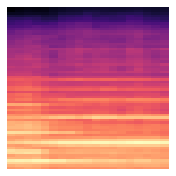

In [ ]:
filect = 0
print('Working on 3rd batch 4001 to 6000')
for i in dfv_3.itertuples():
  filect = filect + 1
  #print(str(filect))
  file = i[4]
  pngfile = i[5]
  #print(file, pngfile)
  #print('Filecount: '+str(filect)+' Working on: '+file)
  print('Filecount: '+str(filect)+' Saving spectograms: '+pngfile)
  # load wav file and determine sample rate automatically
  signal, sr = librosa.load(file, sr=None)
  # my parameters
  hop_length = 11025 # in num. of samples
  n_fft = 42336 # window in num. of samples
  hop_length_duration = float(hop_length)/sr
  n_fft_duration = float(n_fft)/sr
  # Mel filter banks
  filter_banks = librosa.filters.mel(n_fft=n_fft, sr=sr, n_mels=64)
  stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)
  # This will yield 96-length spectrograms
  spectrogram = np.abs(stft)
  # converted to 64 bin log-scaled Mel spectrogram,
  melspec = librosa.feature.melspectrogram(y=signal, sr=sr, S=spectrogram, n_fft=n_fft, hop_length=hop_length, win_length=None, window='hann', center=True, pad_mode='reflect', n_mels=64)
  log_mel_spectrogram = librosa.power_to_db(melspec, ref=np.max)
  #plt.figure(figsize=(2.24, 2.24))
  fig = librosa.display.specshow(log_mel_spectrogram, hop_length=hop_length)
  fig2 = plt.gcf()
  plt.axis('off')
  fig2.set_size_inches(2.9, 2.98)
  plt.savefig(pngfile, dpi=100, bbox_inches='tight', pad_inches=0, format='png')

print('start time: ')
print(startime)
print(time.ctime())

Working on 4th batch 6001 to 8000
Filecount: 1 Saving spectograms: /content/gdrive/MyDrive/validpng2/1911.png
Filecount: 2 Saving spectograms: /content/gdrive/MyDrive/validpng2/1908.png
Filecount: 3 Saving spectograms: /content/gdrive/MyDrive/validpng2/121078.png
Filecount: 4 Saving spectograms: /content/gdrive/MyDrive/validpng2/235708.png
Filecount: 5 Saving spectograms: /content/gdrive/MyDrive/validpng2/114454.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35712
  n_fft, y.shape[-1]


Filecount: 6 Saving spectograms: /content/gdrive/MyDrive/validpng2/423775.png
Filecount: 7 Saving spectograms: /content/gdrive/MyDrive/validpng2/366621.png
Filecount: 8 Saving spectograms: /content/gdrive/MyDrive/validpng2/409232.png
Filecount: 9 Saving spectograms: /content/gdrive/MyDrive/validpng2/71586.png
Filecount: 10 Saving spectograms: /content/gdrive/MyDrive/validpng2/325723.png
Filecount: 11 Saving spectograms: /content/gdrive/MyDrive/validpng2/404002.png
Filecount: 12 Saving spectograms: /content/gdrive/MyDrive/validpng2/17422.png
Filecount: 13 Saving spectograms: /content/gdrive/MyDrive/validpng2/332225.png
Filecount: 14 Saving spectograms: /content/gdrive/MyDrive/validpng2/383869.png
Filecount: 15 Saving spectograms: /content/gdrive/MyDrive/validpng2/178495.png
Filecount: 16 Saving spectograms: /content/gdrive/MyDrive/validpng2/326694.png
Filecount: 17 Saving spectograms: /content/gdrive/MyDrive/validpng2/119094.png
Filecount: 18 Saving spectograms: /content/gdrive/MyDrive/

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20286
  n_fft, y.shape[-1]


Filecount: 24 Saving spectograms: /content/gdrive/MyDrive/validpng2/75368.png
Filecount: 25 Saving spectograms: /content/gdrive/MyDrive/validpng2/408850.png
Filecount: 26 Saving spectograms: /content/gdrive/MyDrive/validpng2/403878.png
Filecount: 27 Saving spectograms: /content/gdrive/MyDrive/validpng2/60754.png
Filecount: 28 Saving spectograms: /content/gdrive/MyDrive/validpng2/326651.png
Filecount: 29 Saving spectograms: /content/gdrive/MyDrive/validpng2/403192.png
Filecount: 30 Saving spectograms: /content/gdrive/MyDrive/validpng2/408270.png
Filecount: 31 Saving spectograms: /content/gdrive/MyDrive/validpng2/275522.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14465
  n_fft, y.shape[-1]


Filecount: 32 Saving spectograms: /content/gdrive/MyDrive/validpng2/409150.png
Filecount: 33 Saving spectograms: /content/gdrive/MyDrive/validpng2/25909.png
Filecount: 34 Saving spectograms: /content/gdrive/MyDrive/validpng2/276328.png
Filecount: 35 Saving spectograms: /content/gdrive/MyDrive/validpng2/390322.png
Filecount: 36 Saving spectograms: /content/gdrive/MyDrive/validpng2/409235.png
Filecount: 37 Saving spectograms: /content/gdrive/MyDrive/validpng2/409236.png
Filecount: 38 Saving spectograms: /content/gdrive/MyDrive/validpng2/327835.png
Filecount: 39 Saving spectograms: /content/gdrive/MyDrive/validpng2/409233.png
Filecount: 40 Saving spectograms: /content/gdrive/MyDrive/validpng2/409821.png
Filecount: 41 Saving spectograms: /content/gdrive/MyDrive/validpng2/369968.png
Filecount: 42 Saving spectograms: /content/gdrive/MyDrive/validpng2/118612.png
Filecount: 43 Saving spectograms: /content/gdrive/MyDrive/validpng2/118113.png
Filecount: 44 Saving spectograms: /content/gdrive/MyD

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14372
  n_fft, y.shape[-1]


Filecount: 52 Saving spectograms: /content/gdrive/MyDrive/validpng2/405586.png
Filecount: 53 Saving spectograms: /content/gdrive/MyDrive/validpng2/395596.png
Filecount: 54 Saving spectograms: /content/gdrive/MyDrive/validpng2/114610.png
Filecount: 55 Saving spectograms: /content/gdrive/MyDrive/validpng2/119080.png
Filecount: 56 Saving spectograms: /content/gdrive/MyDrive/validpng2/203107.png
Filecount: 57 Saving spectograms: /content/gdrive/MyDrive/validpng2/60753.png
Filecount: 58 Saving spectograms: /content/gdrive/MyDrive/validpng2/366558.png
Filecount: 59 Saving spectograms: /content/gdrive/MyDrive/validpng2/114251.png
Filecount: 60 Saving spectograms: /content/gdrive/MyDrive/validpng2/409234.png
Filecount: 61 Saving spectograms: /content/gdrive/MyDrive/validpng2/409142.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28609
  n_fft, y.shape[-1]


Filecount: 62 Saving spectograms: /content/gdrive/MyDrive/validpng2/120968.png
Filecount: 63 Saving spectograms: /content/gdrive/MyDrive/validpng2/351153.png
Filecount: 64 Saving spectograms: /content/gdrive/MyDrive/validpng2/394477.png
Filecount: 65 Saving spectograms: /content/gdrive/MyDrive/validpng2/123885.png
Filecount: 66 Saving spectograms: /content/gdrive/MyDrive/validpng2/76426.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27792
  n_fft, y.shape[-1]


Filecount: 67 Saving spectograms: /content/gdrive/MyDrive/validpng2/255814.png
Filecount: 68 Saving spectograms: /content/gdrive/MyDrive/validpng2/121094.png
Filecount: 69 Saving spectograms: /content/gdrive/MyDrive/validpng2/74882.png
Filecount: 70 Saving spectograms: /content/gdrive/MyDrive/validpng2/189586.png
Filecount: 71 Saving spectograms: /content/gdrive/MyDrive/validpng2/176137.png
Filecount: 72 Saving spectograms: /content/gdrive/MyDrive/validpng2/242708.png
Filecount: 73 Saving spectograms: /content/gdrive/MyDrive/validpng2/174619.png
Filecount: 74 Saving spectograms: /content/gdrive/MyDrive/validpng2/348190.png
Filecount: 75 Saving spectograms: /content/gdrive/MyDrive/validpng2/16938.png
Filecount: 76 Saving spectograms: /content/gdrive/MyDrive/validpng2/57906.png
Filecount: 77 Saving spectograms: /content/gdrive/MyDrive/validpng2/57907.png
Filecount: 78 Saving spectograms: /content/gdrive/MyDrive/validpng2/393782.png
Filecount: 79 Saving spectograms: /content/gdrive/MyDriv

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26897
  n_fft, y.shape[-1]


Filecount: 125 Saving spectograms: /content/gdrive/MyDrive/validpng2/415201.png
Filecount: 126 Saving spectograms: /content/gdrive/MyDrive/validpng2/153580.png
Filecount: 127 Saving spectograms: /content/gdrive/MyDrive/validpng2/117241.png
Filecount: 128 Saving spectograms: /content/gdrive/MyDrive/validpng2/361470.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19072
  n_fft, y.shape[-1]


Filecount: 129 Saving spectograms: /content/gdrive/MyDrive/validpng2/365055.png
Filecount: 130 Saving spectograms: /content/gdrive/MyDrive/validpng2/413212.png
Filecount: 131 Saving spectograms: /content/gdrive/MyDrive/validpng2/161677.png
Filecount: 132 Saving spectograms: /content/gdrive/MyDrive/validpng2/161678.png
Filecount: 133 Saving spectograms: /content/gdrive/MyDrive/validpng2/161679.png
Filecount: 134 Saving spectograms: /content/gdrive/MyDrive/validpng2/161680.png
Filecount: 135 Saving spectograms: /content/gdrive/MyDrive/validpng2/161681.png
Filecount: 136 Saving spectograms: /content/gdrive/MyDrive/validpng2/161682.png
Filecount: 137 Saving spectograms: /content/gdrive/MyDrive/validpng2/192659.png
Filecount: 138 Saving spectograms: /content/gdrive/MyDrive/validpng2/161683.png
Filecount: 139 Saving spectograms: /content/gdrive/MyDrive/validpng2/161685.png
Filecount: 140 Saving spectograms: /content/gdrive/MyDrive/validpng2/114582.png
Filecount: 141 Saving spectograms: /cont

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39690
  n_fft, y.shape[-1]


Filecount: 158 Saving spectograms: /content/gdrive/MyDrive/validpng2/167242.png
Filecount: 159 Saving spectograms: /content/gdrive/MyDrive/validpng2/60877.png
Filecount: 160 Saving spectograms: /content/gdrive/MyDrive/validpng2/88532.png
Filecount: 161 Saving spectograms: /content/gdrive/MyDrive/validpng2/121557.png
Filecount: 162 Saving spectograms: /content/gdrive/MyDrive/validpng2/121558.png
Filecount: 163 Saving spectograms: /content/gdrive/MyDrive/validpng2/140244.png
Filecount: 164 Saving spectograms: /content/gdrive/MyDrive/validpng2/210787.png
Filecount: 165 Saving spectograms: /content/gdrive/MyDrive/validpng2/126565.png
Filecount: 166 Saving spectograms: /content/gdrive/MyDrive/validpng2/60902.png
Filecount: 167 Saving spectograms: /content/gdrive/MyDrive/validpng2/60903.png
Filecount: 168 Saving spectograms: /content/gdrive/MyDrive/validpng2/60904.png
Filecount: 169 Saving spectograms: /content/gdrive/MyDrive/validpng2/126566.png
Filecount: 170 Saving spectograms: /content/g

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40448
  n_fft, y.shape[-1]


Filecount: 182 Saving spectograms: /content/gdrive/MyDrive/validpng2/408117.png
Filecount: 183 Saving spectograms: /content/gdrive/MyDrive/validpng2/408642.png
Filecount: 184 Saving spectograms: /content/gdrive/MyDrive/validpng2/59459.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39224
  n_fft, y.shape[-1]


Filecount: 185 Saving spectograms: /content/gdrive/MyDrive/validpng2/59460.png
Filecount: 186 Saving spectograms: /content/gdrive/MyDrive/validpng2/110162.png
Filecount: 187 Saving spectograms: /content/gdrive/MyDrive/validpng2/215134.png
Filecount: 188 Saving spectograms: /content/gdrive/MyDrive/validpng2/408162.png
Filecount: 189 Saving spectograms: /content/gdrive/MyDrive/validpng2/26729.png
Filecount: 190 Saving spectograms: /content/gdrive/MyDrive/validpng2/38514.png
Filecount: 191 Saving spectograms: /content/gdrive/MyDrive/validpng2/35956.png
Filecount: 192 Saving spectograms: /content/gdrive/MyDrive/validpng2/103028.png
Filecount: 193 Saving spectograms: /content/gdrive/MyDrive/validpng2/162425.png
Filecount: 194 Saving spectograms: /content/gdrive/MyDrive/validpng2/35963.png
Filecount: 195 Saving spectograms: /content/gdrive/MyDrive/validpng2/99977.png
Filecount: 196 Saving spectograms: /content/gdrive/MyDrive/validpng2/85135.png
Filecount: 197 Saving spectograms: /content/gdr

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31670
  n_fft, y.shape[-1]


Filecount: 222 Saving spectograms: /content/gdrive/MyDrive/validpng2/337716.png
Filecount: 223 Saving spectograms: /content/gdrive/MyDrive/validpng2/342838.png
Filecount: 224 Saving spectograms: /content/gdrive/MyDrive/validpng2/388407.png
Filecount: 225 Saving spectograms: /content/gdrive/MyDrive/validpng2/110392.png
Filecount: 226 Saving spectograms: /content/gdrive/MyDrive/validpng2/406848.png
Filecount: 227 Saving spectograms: /content/gdrive/MyDrive/validpng2/325461.png
Filecount: 228 Saving spectograms: /content/gdrive/MyDrive/validpng2/362330.png
Filecount: 229 Saving spectograms: /content/gdrive/MyDrive/validpng2/381275.png
Filecount: 230 Saving spectograms: /content/gdrive/MyDrive/validpng2/408421.png
Filecount: 231 Saving spectograms: /content/gdrive/MyDrive/validpng2/41325.png
Filecount: 232 Saving spectograms: /content/gdrive/MyDrive/validpng2/173933.png
Filecount: 233 Saving spectograms: /content/gdrive/MyDrive/validpng2/428400.png
Filecount: 234 Saving spectograms: /conte

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23518
  n_fft, y.shape[-1]


Filecount: 246 Saving spectograms: /content/gdrive/MyDrive/validpng2/326662.png
Filecount: 247 Saving spectograms: /content/gdrive/MyDrive/validpng2/17417.png
Filecount: 248 Saving spectograms: /content/gdrive/MyDrive/validpng2/27148.png
Filecount: 249 Saving spectograms: /content/gdrive/MyDrive/validpng2/100884.png
Filecount: 250 Saving spectograms: /content/gdrive/MyDrive/validpng2/417817.png
Filecount: 251 Saving spectograms: /content/gdrive/MyDrive/validpng2/408091.png
Filecount: 252 Saving spectograms: /content/gdrive/MyDrive/validpng2/15902.png
Filecount: 253 Saving spectograms: /content/gdrive/MyDrive/validpng2/417823.png
Filecount: 254 Saving spectograms: /content/gdrive/MyDrive/validpng2/100895.png
Filecount: 255 Saving spectograms: /content/gdrive/MyDrive/validpng2/410145.png
Filecount: 256 Saving spectograms: /content/gdrive/MyDrive/validpng2/196128.png
Filecount: 257 Saving spectograms: /content/gdrive/MyDrive/validpng2/408100.png
Filecount: 258 Saving spectograms: /content

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26248
  n_fft, y.shape[-1]


Filecount: 272 Saving spectograms: /content/gdrive/MyDrive/validpng2/35964.png
Filecount: 273 Saving spectograms: /content/gdrive/MyDrive/validpng2/319104.png
Filecount: 274 Saving spectograms: /content/gdrive/MyDrive/validpng2/395396.png
Filecount: 275 Saving spectograms: /content/gdrive/MyDrive/validpng2/87688.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30230
  n_fft, y.shape[-1]


Filecount: 276 Saving spectograms: /content/gdrive/MyDrive/validpng2/240271.png
Filecount: 277 Saving spectograms: /content/gdrive/MyDrive/validpng2/369298.png
Filecount: 278 Saving spectograms: /content/gdrive/MyDrive/validpng2/364695.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38078
  n_fft, y.shape[-1]


Filecount: 279 Saving spectograms: /content/gdrive/MyDrive/validpng2/87712.png
Filecount: 280 Saving spectograms: /content/gdrive/MyDrive/validpng2/87713.png
Filecount: 281 Saving spectograms: /content/gdrive/MyDrive/validpng2/87717.png
Filecount: 282 Saving spectograms: /content/gdrive/MyDrive/validpng2/409254.png
Filecount: 283 Saving spectograms: /content/gdrive/MyDrive/validpng2/256679.png
Filecount: 284 Saving spectograms: /content/gdrive/MyDrive/validpng2/388774.png
Filecount: 285 Saving spectograms: /content/gdrive/MyDrive/validpng2/59560.png
Filecount: 286 Saving spectograms: /content/gdrive/MyDrive/validpng2/232107.png
Filecount: 287 Saving spectograms: /content/gdrive/MyDrive/validpng2/336059.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33291
  n_fft, y.shape[-1]


Filecount: 288 Saving spectograms: /content/gdrive/MyDrive/validpng2/425663.png
Filecount: 289 Saving spectograms: /content/gdrive/MyDrive/validpng2/172743.png
Filecount: 290 Saving spectograms: /content/gdrive/MyDrive/validpng2/38615.png
Filecount: 291 Saving spectograms: /content/gdrive/MyDrive/validpng2/154851.png
Filecount: 292 Saving spectograms: /content/gdrive/MyDrive/validpng2/44261.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=41152
  n_fft, y.shape[-1]


Filecount: 293 Saving spectograms: /content/gdrive/MyDrive/validpng2/355062.png
Filecount: 294 Saving spectograms: /content/gdrive/MyDrive/validpng2/271617.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20334
  n_fft, y.shape[-1]


Filecount: 295 Saving spectograms: /content/gdrive/MyDrive/validpng2/347402.png
Filecount: 296 Saving spectograms: /content/gdrive/MyDrive/validpng2/30994.png
Filecount: 297 Saving spectograms: /content/gdrive/MyDrive/validpng2/416545.png
Filecount: 298 Saving spectograms: /content/gdrive/MyDrive/validpng2/326438.png
Filecount: 299 Saving spectograms: /content/gdrive/MyDrive/validpng2/263992.png
Filecount: 300 Saving spectograms: /content/gdrive/MyDrive/validpng2/425783.png
Filecount: 301 Saving spectograms: /content/gdrive/MyDrive/validpng2/261431.png
Filecount: 302 Saving spectograms: /content/gdrive/MyDrive/validpng2/407356.png
Filecount: 303 Saving spectograms: /content/gdrive/MyDrive/validpng2/347967.png
Filecount: 304 Saving spectograms: /content/gdrive/MyDrive/validpng2/221519.png
Filecount: 305 Saving spectograms: /content/gdrive/MyDrive/validpng2/245596.png
Filecount: 306 Saving spectograms: /content/gdrive/MyDrive/validpng2/173406.png
Filecount: 307 Saving spectograms: /conte

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28096
  n_fft, y.shape[-1]


Filecount: 308 Saving spectograms: /content/gdrive/MyDrive/validpng2/221543.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=41754
  n_fft, y.shape[-1]


Filecount: 309 Saving spectograms: /content/gdrive/MyDrive/validpng2/37233.png
Filecount: 310 Saving spectograms: /content/gdrive/MyDrive/validpng2/37235.png
Filecount: 311 Saving spectograms: /content/gdrive/MyDrive/validpng2/336768.png
Filecount: 312 Saving spectograms: /content/gdrive/MyDrive/validpng2/275337.png
Filecount: 313 Saving spectograms: /content/gdrive/MyDrive/validpng2/377737.png
Filecount: 314 Saving spectograms: /content/gdrive/MyDrive/validpng2/115602.png
Filecount: 315 Saving spectograms: /content/gdrive/MyDrive/validpng2/107934.png
Filecount: 316 Saving spectograms: /content/gdrive/MyDrive/validpng2/404383.png
Filecount: 317 Saving spectograms: /content/gdrive/MyDrive/validpng2/404384.png
Filecount: 318 Saving spectograms: /content/gdrive/MyDrive/validpng2/404393.png
Filecount: 319 Saving spectograms: /content/gdrive/MyDrive/validpng2/340916.png
Filecount: 320 Saving spectograms: /content/gdrive/MyDrive/validpng2/401333.png
Filecount: 321 Saving spectograms: /conten

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29196
  n_fft, y.shape[-1]


Filecount: 352 Saving spectograms: /content/gdrive/MyDrive/validpng2/30172.png
Filecount: 353 Saving spectograms: /content/gdrive/MyDrive/validpng2/234739.png
Filecount: 354 Saving spectograms: /content/gdrive/MyDrive/validpng2/371130.png
Filecount: 355 Saving spectograms: /content/gdrive/MyDrive/validpng2/913.png
Filecount: 356 Saving spectograms: /content/gdrive/MyDrive/validpng2/253188.png
Filecount: 357 Saving spectograms: /content/gdrive/MyDrive/validpng2/257579.png
Filecount: 358 Saving spectograms: /content/gdrive/MyDrive/validpng2/30170.png
Filecount: 359 Saving spectograms: /content/gdrive/MyDrive/validpng2/58973.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38048
  n_fft, y.shape[-1]


Filecount: 360 Saving spectograms: /content/gdrive/MyDrive/validpng2/369681.png
Filecount: 361 Saving spectograms: /content/gdrive/MyDrive/validpng2/234738.png
Filecount: 362 Saving spectograms: /content/gdrive/MyDrive/validpng2/79404.png
Filecount: 363 Saving spectograms: /content/gdrive/MyDrive/validpng2/337128.png
Filecount: 364 Saving spectograms: /content/gdrive/MyDrive/validpng2/44731.png
Filecount: 365 Saving spectograms: /content/gdrive/MyDrive/validpng2/253187.png
Filecount: 366 Saving spectograms: /content/gdrive/MyDrive/validpng2/48080.png
Filecount: 367 Saving spectograms: /content/gdrive/MyDrive/validpng2/116388.png
Filecount: 368 Saving spectograms: /content/gdrive/MyDrive/validpng2/256423.png
Filecount: 369 Saving spectograms: /content/gdrive/MyDrive/validpng2/90053.png
Filecount: 370 Saving spectograms: /content/gdrive/MyDrive/validpng2/908.png
Filecount: 371 Saving spectograms: /content/gdrive/MyDrive/validpng2/1377.png
Filecount: 372 Saving spectograms: /content/gdriv

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23726
  n_fft, y.shape[-1]


Filecount: 377 Saving spectograms: /content/gdrive/MyDrive/validpng2/115671.png
Filecount: 378 Saving spectograms: /content/gdrive/MyDrive/validpng2/21712.png
Filecount: 379 Saving spectograms: /content/gdrive/MyDrive/validpng2/164351.png
Filecount: 380 Saving spectograms: /content/gdrive/MyDrive/validpng2/127336.png
Filecount: 381 Saving spectograms: /content/gdrive/MyDrive/validpng2/44728.png
Filecount: 382 Saving spectograms: /content/gdrive/MyDrive/validpng2/369676.png
Filecount: 383 Saving spectograms: /content/gdrive/MyDrive/validpng2/270274.png
Filecount: 384 Saving spectograms: /content/gdrive/MyDrive/validpng2/328822.png
Filecount: 385 Saving spectograms: /content/gdrive/MyDrive/validpng2/41515.png
Filecount: 386 Saving spectograms: /content/gdrive/MyDrive/validpng2/58970.png
Filecount: 387 Saving spectograms: /content/gdrive/MyDrive/validpng2/68133.png
Filecount: 388 Saving spectograms: /content/gdrive/MyDrive/validpng2/328105.png
Filecount: 389 Saving spectograms: /content/g

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22050
  n_fft, y.shape[-1]


Filecount: 430 Saving spectograms: /content/gdrive/MyDrive/validpng2/351418.png
Filecount: 431 Saving spectograms: /content/gdrive/MyDrive/validpng2/274451.png
Filecount: 432 Saving spectograms: /content/gdrive/MyDrive/validpng2/188037.png
Filecount: 433 Saving spectograms: /content/gdrive/MyDrive/validpng2/260204.png
Filecount: 434 Saving spectograms: /content/gdrive/MyDrive/validpng2/371138.png
Filecount: 435 Saving spectograms: /content/gdrive/MyDrive/validpng2/221904.png
Filecount: 436 Saving spectograms: /content/gdrive/MyDrive/validpng2/370989.png
Filecount: 437 Saving spectograms: /content/gdrive/MyDrive/validpng2/44366.png
Filecount: 438 Saving spectograms: /content/gdrive/MyDrive/validpng2/54694.png
Filecount: 439 Saving spectograms: /content/gdrive/MyDrive/validpng2/331035.png
Filecount: 440 Saving spectograms: /content/gdrive/MyDrive/validpng2/79405.png
Filecount: 441 Saving spectograms: /content/gdrive/MyDrive/validpng2/44729.png
Filecount: 442 Saving spectograms: /content/

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24102
  n_fft, y.shape[-1]


Filecount: 455 Saving spectograms: /content/gdrive/MyDrive/validpng2/911.png
Filecount: 456 Saving spectograms: /content/gdrive/MyDrive/validpng2/75242.png
Filecount: 457 Saving spectograms: /content/gdrive/MyDrive/validpng2/44364.png
Filecount: 458 Saving spectograms: /content/gdrive/MyDrive/validpng2/170309.png
Filecount: 459 Saving spectograms: /content/gdrive/MyDrive/validpng2/121007.png
Filecount: 460 Saving spectograms: /content/gdrive/MyDrive/validpng2/202402.png
Filecount: 461 Saving spectograms: /content/gdrive/MyDrive/validpng2/74198.png
Filecount: 462 Saving spectograms: /content/gdrive/MyDrive/validpng2/365568.png
Filecount: 463 Saving spectograms: /content/gdrive/MyDrive/validpng2/323329.png
Filecount: 464 Saving spectograms: /content/gdrive/MyDrive/validpng2/407686.png
Filecount: 465 Saving spectograms: /content/gdrive/MyDrive/validpng2/102548.png
Filecount: 466 Saving spectograms: /content/gdrive/MyDrive/validpng2/165913.png
Filecount: 467 Saving spectograms: /content/gd

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15366
  n_fft, y.shape[-1]


Filecount: 562 Saving spectograms: /content/gdrive/MyDrive/validpng2/397612.png
Filecount: 563 Saving spectograms: /content/gdrive/MyDrive/validpng2/397614.png
Filecount: 564 Saving spectograms: /content/gdrive/MyDrive/validpng2/383023.png
Filecount: 565 Saving spectograms: /content/gdrive/MyDrive/validpng2/165830.png
Filecount: 566 Saving spectograms: /content/gdrive/MyDrive/validpng2/65866.png
Filecount: 567 Saving spectograms: /content/gdrive/MyDrive/validpng2/65867.png
Filecount: 568 Saving spectograms: /content/gdrive/MyDrive/validpng2/65868.png
Filecount: 569 Saving spectograms: /content/gdrive/MyDrive/validpng2/65869.png
Filecount: 570 Saving spectograms: /content/gdrive/MyDrive/validpng2/65870.png
Filecount: 571 Saving spectograms: /content/gdrive/MyDrive/validpng2/65871.png
Filecount: 572 Saving spectograms: /content/gdrive/MyDrive/validpng2/65872.png
Filecount: 573 Saving spectograms: /content/gdrive/MyDrive/validpng2/65873.png
Filecount: 574 Saving spectograms: /content/gdri

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40468
  n_fft, y.shape[-1]


Filecount: 577 Saving spectograms: /content/gdrive/MyDrive/validpng2/66583.png
Filecount: 578 Saving spectograms: /content/gdrive/MyDrive/validpng2/35364.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17805
  n_fft, y.shape[-1]


Filecount: 579 Saving spectograms: /content/gdrive/MyDrive/validpng2/102964.png
Filecount: 580 Saving spectograms: /content/gdrive/MyDrive/validpng2/327756.png
Filecount: 581 Saving spectograms: /content/gdrive/MyDrive/validpng2/257615.png
Filecount: 582 Saving spectograms: /content/gdrive/MyDrive/validpng2/432210.png
Filecount: 583 Saving spectograms: /content/gdrive/MyDrive/validpng2/432211.png
Filecount: 584 Saving spectograms: /content/gdrive/MyDrive/validpng2/257620.png
Filecount: 585 Saving spectograms: /content/gdrive/MyDrive/validpng2/432209.png
Filecount: 586 Saving spectograms: /content/gdrive/MyDrive/validpng2/64602.png
Filecount: 587 Saving spectograms: /content/gdrive/MyDrive/validpng2/64603.png
Filecount: 588 Saving spectograms: /content/gdrive/MyDrive/validpng2/26722.png
Filecount: 589 Saving spectograms: /content/gdrive/MyDrive/validpng2/177252.png
Filecount: 590 Saving spectograms: /content/gdrive/MyDrive/validpng2/64617.png
Filecount: 591 Saving spectograms: /content/

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31013
  n_fft, y.shape[-1]


Filecount: 637 Saving spectograms: /content/gdrive/MyDrive/validpng2/259514.png
Filecount: 638 Saving spectograms: /content/gdrive/MyDrive/validpng2/231495.png
Filecount: 639 Saving spectograms: /content/gdrive/MyDrive/validpng2/377137.png
Filecount: 640 Saving spectograms: /content/gdrive/MyDrive/validpng2/204496.png
Filecount: 641 Saving spectograms: /content/gdrive/MyDrive/validpng2/278107.png
Filecount: 642 Saving spectograms: /content/gdrive/MyDrive/validpng2/345023.png
Filecount: 643 Saving spectograms: /content/gdrive/MyDrive/validpng2/380101.png
Filecount: 644 Saving spectograms: /content/gdrive/MyDrive/validpng2/377582.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40512
  n_fft, y.shape[-1]


Filecount: 645 Saving spectograms: /content/gdrive/MyDrive/validpng2/377742.png
Filecount: 646 Saving spectograms: /content/gdrive/MyDrive/validpng2/365780.png
Filecount: 647 Saving spectograms: /content/gdrive/MyDrive/validpng2/408083.png
Filecount: 648 Saving spectograms: /content/gdrive/MyDrive/validpng2/402395.png
Filecount: 649 Saving spectograms: /content/gdrive/MyDrive/validpng2/377589.png
Filecount: 650 Saving spectograms: /content/gdrive/MyDrive/validpng2/393237.png
Filecount: 651 Saving spectograms: /content/gdrive/MyDrive/validpng2/382998.png
Filecount: 652 Saving spectograms: /content/gdrive/MyDrive/validpng2/434790.png
Filecount: 653 Saving spectograms: /content/gdrive/MyDrive/validpng2/327914.png
Filecount: 654 Saving spectograms: /content/gdrive/MyDrive/validpng2/353123.png
Filecount: 655 Saving spectograms: /content/gdrive/MyDrive/validpng2/352558.png
Filecount: 656 Saving spectograms: /content/gdrive/MyDrive/validpng2/213290.png
Filecount: 657 Saving spectograms: /cont

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30784
  n_fft, y.shape[-1]


Filecount: 662 Saving spectograms: /content/gdrive/MyDrive/validpng2/96825.png
Filecount: 663 Saving spectograms: /content/gdrive/MyDrive/validpng2/88447.png
Filecount: 664 Saving spectograms: /content/gdrive/MyDrive/validpng2/123747.png
Filecount: 665 Saving spectograms: /content/gdrive/MyDrive/validpng2/123748.png
Filecount: 666 Saving spectograms: /content/gdrive/MyDrive/validpng2/351598.png
Filecount: 667 Saving spectograms: /content/gdrive/MyDrive/validpng2/416538.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32004
  n_fft, y.shape[-1]


Filecount: 668 Saving spectograms: /content/gdrive/MyDrive/validpng2/353138.png
Filecount: 669 Saving spectograms: /content/gdrive/MyDrive/validpng2/187762.png
Filecount: 670 Saving spectograms: /content/gdrive/MyDrive/validpng2/353139.png
Filecount: 671 Saving spectograms: /content/gdrive/MyDrive/validpng2/353135.png
Filecount: 672 Saving spectograms: /content/gdrive/MyDrive/validpng2/45604.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21494
  n_fft, y.shape[-1]


Filecount: 673 Saving spectograms: /content/gdrive/MyDrive/validpng2/416537.png
Filecount: 674 Saving spectograms: /content/gdrive/MyDrive/validpng2/156510.png
Filecount: 675 Saving spectograms: /content/gdrive/MyDrive/validpng2/197417.png
Filecount: 676 Saving spectograms: /content/gdrive/MyDrive/validpng2/45605.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19213
  n_fft, y.shape[-1]


Filecount: 677 Saving spectograms: /content/gdrive/MyDrive/validpng2/210734.png
Filecount: 678 Saving spectograms: /content/gdrive/MyDrive/validpng2/222672.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36713
  n_fft, y.shape[-1]


Filecount: 679 Saving spectograms: /content/gdrive/MyDrive/validpng2/333360.png
Filecount: 680 Saving spectograms: /content/gdrive/MyDrive/validpng2/395828.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38558
  n_fft, y.shape[-1]


Filecount: 681 Saving spectograms: /content/gdrive/MyDrive/validpng2/72950.png
Filecount: 682 Saving spectograms: /content/gdrive/MyDrive/validpng2/221670.png
Filecount: 683 Saving spectograms: /content/gdrive/MyDrive/validpng2/337102.png
Filecount: 684 Saving spectograms: /content/gdrive/MyDrive/validpng2/272410.png
Filecount: 685 Saving spectograms: /content/gdrive/MyDrive/validpng2/205740.png
Filecount: 686 Saving spectograms: /content/gdrive/MyDrive/validpng2/45603.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22551
  n_fft, y.shape[-1]


Filecount: 687 Saving spectograms: /content/gdrive/MyDrive/validpng2/195178.png
Filecount: 688 Saving spectograms: /content/gdrive/MyDrive/validpng2/428668.png
Filecount: 689 Saving spectograms: /content/gdrive/MyDrive/validpng2/49020.png
Filecount: 690 Saving spectograms: /content/gdrive/MyDrive/validpng2/343169.png
Filecount: 691 Saving spectograms: /content/gdrive/MyDrive/validpng2/391293.png
Filecount: 692 Saving spectograms: /content/gdrive/MyDrive/validpng2/353104.png
Filecount: 693 Saving spectograms: /content/gdrive/MyDrive/validpng2/418786.png
Filecount: 694 Saving spectograms: /content/gdrive/MyDrive/validpng2/340363.png
Filecount: 695 Saving spectograms: /content/gdrive/MyDrive/validpng2/50178.png
Filecount: 696 Saving spectograms: /content/gdrive/MyDrive/validpng2/50179.png
Filecount: 697 Saving spectograms: /content/gdrive/MyDrive/validpng2/50180.png
Filecount: 698 Saving spectograms: /content/gdrive/MyDrive/validpng2/50181.png
Filecount: 699 Saving spectograms: /content/g

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=34816
  n_fft, y.shape[-1]


Filecount: 716 Saving spectograms: /content/gdrive/MyDrive/validpng2/199336.png
Filecount: 717 Saving spectograms: /content/gdrive/MyDrive/validpng2/59184.png
Filecount: 718 Saving spectograms: /content/gdrive/MyDrive/validpng2/321590.png
Filecount: 719 Saving spectograms: /content/gdrive/MyDrive/validpng2/321591.png
Filecount: 720 Saving spectograms: /content/gdrive/MyDrive/validpng2/235958.png
Filecount: 721 Saving spectograms: /content/gdrive/MyDrive/validpng2/58573.png
Filecount: 722 Saving spectograms: /content/gdrive/MyDrive/validpng2/44369.png
Filecount: 723 Saving spectograms: /content/gdrive/MyDrive/validpng2/320723.png
Filecount: 724 Saving spectograms: /content/gdrive/MyDrive/validpng2/400096.png
Filecount: 725 Saving spectograms: /content/gdrive/MyDrive/validpng2/391908.png
Filecount: 726 Saving spectograms: /content/gdrive/MyDrive/validpng2/182500.png
Filecount: 727 Saving spectograms: /content/gdrive/MyDrive/validpng2/397679.png
Filecount: 728 Saving spectograms: /content

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38010
  n_fft, y.shape[-1]


Filecount: 738 Saving spectograms: /content/gdrive/MyDrive/validpng2/424591.png
Filecount: 739 Saving spectograms: /content/gdrive/MyDrive/validpng2/380662.png
Filecount: 740 Saving spectograms: /content/gdrive/MyDrive/validpng2/19859.png
Filecount: 741 Saving spectograms: /content/gdrive/MyDrive/validpng2/34219.png
Filecount: 742 Saving spectograms: /content/gdrive/MyDrive/validpng2/38732.png
Filecount: 743 Saving spectograms: /content/gdrive/MyDrive/validpng2/380663.png
Filecount: 744 Saving spectograms: /content/gdrive/MyDrive/validpng2/21913.png
Filecount: 745 Saving spectograms: /content/gdrive/MyDrive/validpng2/19858.png
Filecount: 746 Saving spectograms: /content/gdrive/MyDrive/validpng2/333283.png
Filecount: 747 Saving spectograms: /content/gdrive/MyDrive/validpng2/424598.png
Filecount: 748 Saving spectograms: /content/gdrive/MyDrive/validpng2/1931.png
Filecount: 749 Saving spectograms: /content/gdrive/MyDrive/validpng2/1933.png
Filecount: 750 Saving spectograms: /content/gdriv

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21161
  n_fft, y.shape[-1]


Filecount: 823 Saving spectograms: /content/gdrive/MyDrive/validpng2/361789.png
Filecount: 824 Saving spectograms: /content/gdrive/MyDrive/validpng2/407360.png
Filecount: 825 Saving spectograms: /content/gdrive/MyDrive/validpng2/407359.png
Filecount: 826 Saving spectograms: /content/gdrive/MyDrive/validpng2/146769.png
Filecount: 827 Saving spectograms: /content/gdrive/MyDrive/validpng2/410969.png
Filecount: 828 Saving spectograms: /content/gdrive/MyDrive/validpng2/154458.png
Filecount: 829 Saving spectograms: /content/gdrive/MyDrive/validpng2/366427.png
Filecount: 830 Saving spectograms: /content/gdrive/MyDrive/validpng2/197980.png
Filecount: 831 Saving spectograms: /content/gdrive/MyDrive/validpng2/427365.png
Filecount: 832 Saving spectograms: /content/gdrive/MyDrive/validpng2/234858.png
Filecount: 833 Saving spectograms: /content/gdrive/MyDrive/validpng2/424817.png
Filecount: 834 Saving spectograms: /content/gdrive/MyDrive/validpng2/171378.png
Filecount: 835 Saving spectograms: /cont

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15726
  n_fft, y.shape[-1]


Filecount: 843 Saving spectograms: /content/gdrive/MyDrive/validpng2/207778.png
Filecount: 844 Saving spectograms: /content/gdrive/MyDrive/validpng2/429995.png
Filecount: 845 Saving spectograms: /content/gdrive/MyDrive/validpng2/404398.png
Filecount: 846 Saving spectograms: /content/gdrive/MyDrive/validpng2/429999.png
Filecount: 847 Saving spectograms: /content/gdrive/MyDrive/validpng2/259512.png
Filecount: 848 Saving spectograms: /content/gdrive/MyDrive/validpng2/259513.png
Filecount: 849 Saving spectograms: /content/gdrive/MyDrive/validpng2/399291.png
Filecount: 850 Saving spectograms: /content/gdrive/MyDrive/validpng2/367036.png
Filecount: 851 Saving spectograms: /content/gdrive/MyDrive/validpng2/381410.png
Filecount: 852 Saving spectograms: /content/gdrive/MyDrive/validpng2/360424.png
Filecount: 853 Saving spectograms: /content/gdrive/MyDrive/validpng2/62952.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16931
  n_fft, y.shape[-1]


Filecount: 854 Saving spectograms: /content/gdrive/MyDrive/validpng2/420855.png
Filecount: 855 Saving spectograms: /content/gdrive/MyDrive/validpng2/139768.png
Filecount: 856 Saving spectograms: /content/gdrive/MyDrive/validpng2/333320.png
Filecount: 857 Saving spectograms: /content/gdrive/MyDrive/validpng2/432654.png
Filecount: 858 Saving spectograms: /content/gdrive/MyDrive/validpng2/324138.png
Filecount: 859 Saving spectograms: /content/gdrive/MyDrive/validpng2/106553.png
Filecount: 860 Saving spectograms: /content/gdrive/MyDrive/validpng2/82490.png
Filecount: 861 Saving spectograms: /content/gdrive/MyDrive/validpng2/87612.png
Filecount: 862 Saving spectograms: /content/gdrive/MyDrive/validpng2/106555.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=41772
  n_fft, y.shape[-1]


Filecount: 863 Saving spectograms: /content/gdrive/MyDrive/validpng2/106556.png
Filecount: 864 Saving spectograms: /content/gdrive/MyDrive/validpng2/415296.png
Filecount: 865 Saving spectograms: /content/gdrive/MyDrive/validpng2/26184.png
Filecount: 866 Saving spectograms: /content/gdrive/MyDrive/validpng2/52302.png
Filecount: 867 Saving spectograms: /content/gdrive/MyDrive/validpng2/126036.png
Filecount: 868 Saving spectograms: /content/gdrive/MyDrive/validpng2/169047.png
Filecount: 869 Saving spectograms: /content/gdrive/MyDrive/validpng2/169048.png
Filecount: 870 Saving spectograms: /content/gdrive/MyDrive/validpng2/424031.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13850
  n_fft, y.shape[-1]


Filecount: 871 Saving spectograms: /content/gdrive/MyDrive/validpng2/320096.png
Filecount: 872 Saving spectograms: /content/gdrive/MyDrive/validpng2/366701.png
Filecount: 873 Saving spectograms: /content/gdrive/MyDrive/validpng2/207483.png
Filecount: 874 Saving spectograms: /content/gdrive/MyDrive/validpng2/154753.png
Filecount: 875 Saving spectograms: /content/gdrive/MyDrive/validpng2/196751.png
Filecount: 876 Saving spectograms: /content/gdrive/MyDrive/validpng2/349846.png
Filecount: 877 Saving spectograms: /content/gdrive/MyDrive/validpng2/119449.png
Filecount: 878 Saving spectograms: /content/gdrive/MyDrive/validpng2/348318.png
Filecount: 879 Saving spectograms: /content/gdrive/MyDrive/validpng2/326821.png
Filecount: 880 Saving spectograms: /content/gdrive/MyDrive/validpng2/62630.png
Filecount: 881 Saving spectograms: /content/gdrive/MyDrive/validpng2/278186.png
Filecount: 882 Saving spectograms: /content/gdrive/MyDrive/validpng2/278188.png
Filecount: 883 Saving spectograms: /conte

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17302
  n_fft, y.shape[-1]


Filecount: 907 Saving spectograms: /content/gdrive/MyDrive/validpng2/326919.png
Filecount: 908 Saving spectograms: /content/gdrive/MyDrive/validpng2/326925.png
Filecount: 909 Saving spectograms: /content/gdrive/MyDrive/validpng2/38682.png
Filecount: 910 Saving spectograms: /content/gdrive/MyDrive/validpng2/38683.png
Filecount: 911 Saving spectograms: /content/gdrive/MyDrive/validpng2/424738.png
Filecount: 912 Saving spectograms: /content/gdrive/MyDrive/validpng2/123684.png
Filecount: 913 Saving spectograms: /content/gdrive/MyDrive/validpng2/31015.png
Filecount: 914 Saving spectograms: /content/gdrive/MyDrive/validpng2/161578.png
Filecount: 915 Saving spectograms: /content/gdrive/MyDrive/validpng2/35115.png
Filecount: 916 Saving spectograms: /content/gdrive/MyDrive/validpng2/117040.png
Filecount: 917 Saving spectograms: /content/gdrive/MyDrive/validpng2/208695.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=25168
  n_fft, y.shape[-1]


Filecount: 918 Saving spectograms: /content/gdrive/MyDrive/validpng2/118077.png
Filecount: 919 Saving spectograms: /content/gdrive/MyDrive/validpng2/54085.png
Filecount: 920 Saving spectograms: /content/gdrive/MyDrive/validpng2/97605.png
Filecount: 921 Saving spectograms: /content/gdrive/MyDrive/validpng2/367434.png
Filecount: 922 Saving spectograms: /content/gdrive/MyDrive/validpng2/367439.png
Filecount: 923 Saving spectograms: /content/gdrive/MyDrive/validpng2/259925.png
Filecount: 924 Saving spectograms: /content/gdrive/MyDrive/validpng2/89944.png
Filecount: 925 Saving spectograms: /content/gdrive/MyDrive/validpng2/383835.png
Filecount: 926 Saving spectograms: /content/gdrive/MyDrive/validpng2/259934.png
Filecount: 927 Saving spectograms: /content/gdrive/MyDrive/validpng2/117089.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26794
  n_fft, y.shape[-1]


Filecount: 928 Saving spectograms: /content/gdrive/MyDrive/validpng2/51054.png
Filecount: 929 Saving spectograms: /content/gdrive/MyDrive/validpng2/164221.png
Filecount: 930 Saving spectograms: /content/gdrive/MyDrive/validpng2/155526.png
Filecount: 931 Saving spectograms: /content/gdrive/MyDrive/validpng2/327049.png
Filecount: 932 Saving spectograms: /content/gdrive/MyDrive/validpng2/327056.png
Filecount: 933 Saving spectograms: /content/gdrive/MyDrive/validpng2/403375.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31858
  n_fft, y.shape[-1]


Filecount: 934 Saving spectograms: /content/gdrive/MyDrive/validpng2/433584.png
Filecount: 935 Saving spectograms: /content/gdrive/MyDrive/validpng2/433585.png
Filecount: 936 Saving spectograms: /content/gdrive/MyDrive/validpng2/433591.png
Filecount: 937 Saving spectograms: /content/gdrive/MyDrive/validpng2/171448.png
Filecount: 938 Saving spectograms: /content/gdrive/MyDrive/validpng2/73144.png
Filecount: 939 Saving spectograms: /content/gdrive/MyDrive/validpng2/328122.png
Filecount: 940 Saving spectograms: /content/gdrive/MyDrive/validpng2/209864.png
Filecount: 941 Saving spectograms: /content/gdrive/MyDrive/validpng2/103373.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36864
  n_fft, y.shape[-1]


Filecount: 942 Saving spectograms: /content/gdrive/MyDrive/validpng2/216531.png
Filecount: 943 Saving spectograms: /content/gdrive/MyDrive/validpng2/141268.png
Filecount: 944 Saving spectograms: /content/gdrive/MyDrive/validpng2/344567.png
Filecount: 945 Saving spectograms: /content/gdrive/MyDrive/validpng2/345066.png
Filecount: 946 Saving spectograms: /content/gdrive/MyDrive/validpng2/235507.png
Filecount: 947 Saving spectograms: /content/gdrive/MyDrive/validpng2/344574.png
Filecount: 948 Saving spectograms: /content/gdrive/MyDrive/validpng2/156907.png
Filecount: 949 Saving spectograms: /content/gdrive/MyDrive/validpng2/214344.png
Filecount: 950 Saving spectograms: /content/gdrive/MyDrive/validpng2/26921.png
Filecount: 951 Saving spectograms: /content/gdrive/MyDrive/validpng2/317333.png
Filecount: 952 Saving spectograms: /content/gdrive/MyDrive/validpng2/271667.png
Filecount: 953 Saving spectograms: /content/gdrive/MyDrive/validpng2/90701.png
Filecount: 954 Saving spectograms: /conten

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=42173
  n_fft, y.shape[-1]


Filecount: 958 Saving spectograms: /content/gdrive/MyDrive/validpng2/34268.png
Filecount: 959 Saving spectograms: /content/gdrive/MyDrive/validpng2/19094.png
Filecount: 960 Saving spectograms: /content/gdrive/MyDrive/validpng2/382902.png
Filecount: 961 Saving spectograms: /content/gdrive/MyDrive/validpng2/90797.png
Filecount: 962 Saving spectograms: /content/gdrive/MyDrive/validpng2/395077.png
Filecount: 963 Saving spectograms: /content/gdrive/MyDrive/validpng2/347038.png
Filecount: 964 Saving spectograms: /content/gdrive/MyDrive/validpng2/121546.png
Filecount: 965 Saving spectograms: /content/gdrive/MyDrive/validpng2/170287.png
Filecount: 966 Saving spectograms: /content/gdrive/MyDrive/validpng2/376377.png
Filecount: 967 Saving spectograms: /content/gdrive/MyDrive/validpng2/147321.png
Filecount: 968 Saving spectograms: /content/gdrive/MyDrive/validpng2/27151.png
Filecount: 969 Saving spectograms: /content/gdrive/MyDrive/validpng2/338695.png
Filecount: 970 Saving spectograms: /content/

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23290
  n_fft, y.shape[-1]


Filecount: 985 Saving spectograms: /content/gdrive/MyDrive/validpng2/419550.png
Filecount: 986 Saving spectograms: /content/gdrive/MyDrive/validpng2/280244.png
Filecount: 987 Saving spectograms: /content/gdrive/MyDrive/validpng2/395080.png
Filecount: 988 Saving spectograms: /content/gdrive/MyDrive/validpng2/119109.png
Filecount: 989 Saving spectograms: /content/gdrive/MyDrive/validpng2/96351.png
Filecount: 990 Saving spectograms: /content/gdrive/MyDrive/validpng2/174637.png
Filecount: 991 Saving spectograms: /content/gdrive/MyDrive/validpng2/425140.png
Filecount: 992 Saving spectograms: /content/gdrive/MyDrive/validpng2/317664.png
Filecount: 993 Saving spectograms: /content/gdrive/MyDrive/validpng2/1013.png
Filecount: 994 Saving spectograms: /content/gdrive/MyDrive/validpng2/147322.png
Filecount: 995 Saving spectograms: /content/gdrive/MyDrive/validpng2/235554.png
Filecount: 996 Saving spectograms: /content/gdrive/MyDrive/validpng2/178417.png
Filecount: 997 Saving spectograms: /content

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14064
  n_fft, y.shape[-1]


Filecount: 1020 Saving spectograms: /content/gdrive/MyDrive/validpng2/223807.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18064
  n_fft, y.shape[-1]


Filecount: 1021 Saving spectograms: /content/gdrive/MyDrive/validpng2/406087.png
Filecount: 1022 Saving spectograms: /content/gdrive/MyDrive/validpng2/364112.png
Filecount: 1023 Saving spectograms: /content/gdrive/MyDrive/validpng2/218195.png
Filecount: 1024 Saving spectograms: /content/gdrive/MyDrive/validpng2/235625.png
Filecount: 1025 Saving spectograms: /content/gdrive/MyDrive/validpng2/391283.png
Filecount: 1026 Saving spectograms: /content/gdrive/MyDrive/validpng2/179337.png
Filecount: 1027 Saving spectograms: /content/gdrive/MyDrive/validpng2/157835.png
Filecount: 1028 Saving spectograms: /content/gdrive/MyDrive/validpng2/390287.png
Filecount: 1029 Saving spectograms: /content/gdrive/MyDrive/validpng2/364700.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36871
  n_fft, y.shape[-1]


Filecount: 1030 Saving spectograms: /content/gdrive/MyDrive/validpng2/364701.png
Filecount: 1031 Saving spectograms: /content/gdrive/MyDrive/validpng2/44236.png
Filecount: 1032 Saving spectograms: /content/gdrive/MyDrive/validpng2/409825.png
Filecount: 1033 Saving spectograms: /content/gdrive/MyDrive/validpng2/151280.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29033
  n_fft, y.shape[-1]


Filecount: 1034 Saving spectograms: /content/gdrive/MyDrive/validpng2/151281.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36933
  n_fft, y.shape[-1]


Filecount: 1035 Saving spectograms: /content/gdrive/MyDrive/validpng2/151282.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30158
  n_fft, y.shape[-1]


Filecount: 1036 Saving spectograms: /content/gdrive/MyDrive/validpng2/151283.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26644
  n_fft, y.shape[-1]


Filecount: 1037 Saving spectograms: /content/gdrive/MyDrive/validpng2/151284.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33029
  n_fft, y.shape[-1]


Filecount: 1038 Saving spectograms: /content/gdrive/MyDrive/validpng2/151285.png
Filecount: 1039 Saving spectograms: /content/gdrive/MyDrive/validpng2/151286.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33075
  n_fft, y.shape[-1]


Filecount: 1040 Saving spectograms: /content/gdrive/MyDrive/validpng2/151289.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33856
  n_fft, y.shape[-1]


Filecount: 1041 Saving spectograms: /content/gdrive/MyDrive/validpng2/154881.png
Filecount: 1042 Saving spectograms: /content/gdrive/MyDrive/validpng2/320263.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19456
  n_fft, y.shape[-1]


Filecount: 1043 Saving spectograms: /content/gdrive/MyDrive/validpng2/320266.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20480
  n_fft, y.shape[-1]


Filecount: 1044 Saving spectograms: /content/gdrive/MyDrive/validpng2/320269.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30720
  n_fft, y.shape[-1]


Filecount: 1045 Saving spectograms: /content/gdrive/MyDrive/validpng2/320267.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15360
  n_fft, y.shape[-1]


Filecount: 1046 Saving spectograms: /content/gdrive/MyDrive/validpng2/175935.png
Filecount: 1047 Saving spectograms: /content/gdrive/MyDrive/validpng2/391489.png
Filecount: 1048 Saving spectograms: /content/gdrive/MyDrive/validpng2/395084.png
Filecount: 1049 Saving spectograms: /content/gdrive/MyDrive/validpng2/272216.png
Filecount: 1050 Saving spectograms: /content/gdrive/MyDrive/validpng2/389987.png
Filecount: 1051 Saving spectograms: /content/gdrive/MyDrive/validpng2/383334.png
Filecount: 1052 Saving spectograms: /content/gdrive/MyDrive/validpng2/195952.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18445
  n_fft, y.shape[-1]


Filecount: 1053 Saving spectograms: /content/gdrive/MyDrive/validpng2/104305.png
Filecount: 1054 Saving spectograms: /content/gdrive/MyDrive/validpng2/195955.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28603
  n_fft, y.shape[-1]


Filecount: 1055 Saving spectograms: /content/gdrive/MyDrive/validpng2/390005.png
Filecount: 1056 Saving spectograms: /content/gdrive/MyDrive/validpng2/186757.png
Filecount: 1057 Saving spectograms: /content/gdrive/MyDrive/validpng2/186764.png
Filecount: 1058 Saving spectograms: /content/gdrive/MyDrive/validpng2/186766.png
Filecount: 1059 Saving spectograms: /content/gdrive/MyDrive/validpng2/210866.png
Filecount: 1060 Saving spectograms: /content/gdrive/MyDrive/validpng2/52159.png
Filecount: 1061 Saving spectograms: /content/gdrive/MyDrive/validpng2/269251.png
Filecount: 1062 Saving spectograms: /content/gdrive/MyDrive/validpng2/269271.png
Filecount: 1063 Saving spectograms: /content/gdrive/MyDrive/validpng2/430040.png
Filecount: 1064 Saving spectograms: /content/gdrive/MyDrive/validpng2/82403.png
Filecount: 1065 Saving spectograms: /content/gdrive/MyDrive/validpng2/52220.png
Filecount: 1066 Saving spectograms: /content/gdrive/MyDrive/validpng2/16786.png
Filecount: 1067 Saving spectogra

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=42076
  n_fft, y.shape[-1]


Filecount: 1068 Saving spectograms: /content/gdrive/MyDrive/validpng2/117987.png
Filecount: 1069 Saving spectograms: /content/gdrive/MyDrive/validpng2/3166.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26212
  n_fft, y.shape[-1]


Filecount: 1070 Saving spectograms: /content/gdrive/MyDrive/validpng2/85660.png
Filecount: 1071 Saving spectograms: /content/gdrive/MyDrive/validpng2/117986.png
Filecount: 1072 Saving spectograms: /content/gdrive/MyDrive/validpng2/81233.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22049
  n_fft, y.shape[-1]


Filecount: 1073 Saving spectograms: /content/gdrive/MyDrive/validpng2/162286.png
Filecount: 1074 Saving spectograms: /content/gdrive/MyDrive/validpng2/81231.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22038
  n_fft, y.shape[-1]


Filecount: 1075 Saving spectograms: /content/gdrive/MyDrive/validpng2/124999.png
Filecount: 1076 Saving spectograms: /content/gdrive/MyDrive/validpng2/117985.png
Filecount: 1077 Saving spectograms: /content/gdrive/MyDrive/validpng2/82309.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=25449
  n_fft, y.shape[-1]


Filecount: 1078 Saving spectograms: /content/gdrive/MyDrive/validpng2/151812.png
Filecount: 1079 Saving spectograms: /content/gdrive/MyDrive/validpng2/203604.png
Filecount: 1080 Saving spectograms: /content/gdrive/MyDrive/validpng2/11385.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28592
  n_fft, y.shape[-1]


Filecount: 1081 Saving spectograms: /content/gdrive/MyDrive/validpng2/431634.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38518
  n_fft, y.shape[-1]


Filecount: 1082 Saving spectograms: /content/gdrive/MyDrive/validpng2/191612.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21513
  n_fft, y.shape[-1]


Filecount: 1083 Saving spectograms: /content/gdrive/MyDrive/validpng2/403243.png
Filecount: 1084 Saving spectograms: /content/gdrive/MyDrive/validpng2/162285.png
Filecount: 1085 Saving spectograms: /content/gdrive/MyDrive/validpng2/219610.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23009
  n_fft, y.shape[-1]


Filecount: 1086 Saving spectograms: /content/gdrive/MyDrive/validpng2/3167.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31562
  n_fft, y.shape[-1]


Filecount: 1087 Saving spectograms: /content/gdrive/MyDrive/validpng2/320274.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29696
  n_fft, y.shape[-1]


Filecount: 1088 Saving spectograms: /content/gdrive/MyDrive/validpng2/349695.png
Filecount: 1089 Saving spectograms: /content/gdrive/MyDrive/validpng2/195476.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16866
  n_fft, y.shape[-1]


Filecount: 1090 Saving spectograms: /content/gdrive/MyDrive/validpng2/235759.png
Filecount: 1091 Saving spectograms: /content/gdrive/MyDrive/validpng2/366773.png
Filecount: 1092 Saving spectograms: /content/gdrive/MyDrive/validpng2/408601.png
Filecount: 1093 Saving spectograms: /content/gdrive/MyDrive/validpng2/348308.png
Filecount: 1094 Saving spectograms: /content/gdrive/MyDrive/validpng2/195477.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16967
  n_fft, y.shape[-1]


Filecount: 1095 Saving spectograms: /content/gdrive/MyDrive/validpng2/216659.png
Filecount: 1096 Saving spectograms: /content/gdrive/MyDrive/validpng2/196559.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14000
  n_fft, y.shape[-1]


Filecount: 1097 Saving spectograms: /content/gdrive/MyDrive/validpng2/320278.png
Filecount: 1098 Saving spectograms: /content/gdrive/MyDrive/validpng2/389990.png
Filecount: 1099 Saving spectograms: /content/gdrive/MyDrive/validpng2/348257.png
Filecount: 1100 Saving spectograms: /content/gdrive/MyDrive/validpng2/349893.png
Filecount: 1101 Saving spectograms: /content/gdrive/MyDrive/validpng2/191628.png
Filecount: 1102 Saving spectograms: /content/gdrive/MyDrive/validpng2/407691.png
Filecount: 1103 Saving spectograms: /content/gdrive/MyDrive/validpng2/320273.png
Filecount: 1104 Saving spectograms: /content/gdrive/MyDrive/validpng2/320277.png
Filecount: 1105 Saving spectograms: /content/gdrive/MyDrive/validpng2/345258.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15160
  n_fft, y.shape[-1]


Filecount: 1106 Saving spectograms: /content/gdrive/MyDrive/validpng2/98936.png
Filecount: 1107 Saving spectograms: /content/gdrive/MyDrive/validpng2/219605.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24255
  n_fft, y.shape[-1]


Filecount: 1108 Saving spectograms: /content/gdrive/MyDrive/validpng2/339864.png
Filecount: 1109 Saving spectograms: /content/gdrive/MyDrive/validpng2/342658.png
Filecount: 1110 Saving spectograms: /content/gdrive/MyDrive/validpng2/83509.png
Filecount: 1111 Saving spectograms: /content/gdrive/MyDrive/validpng2/388274.png
Filecount: 1112 Saving spectograms: /content/gdrive/MyDrive/validpng2/425909.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18795
  n_fft, y.shape[-1]


Filecount: 1113 Saving spectograms: /content/gdrive/MyDrive/validpng2/195346.png
Filecount: 1114 Saving spectograms: /content/gdrive/MyDrive/validpng2/349896.png
Filecount: 1115 Saving spectograms: /content/gdrive/MyDrive/validpng2/130794.png
Filecount: 1116 Saving spectograms: /content/gdrive/MyDrive/validpng2/52321.png
Filecount: 1117 Saving spectograms: /content/gdrive/MyDrive/validpng2/120569.png
Filecount: 1118 Saving spectograms: /content/gdrive/MyDrive/validpng2/388042.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15456
  n_fft, y.shape[-1]


Filecount: 1119 Saving spectograms: /content/gdrive/MyDrive/validpng2/256582.png
Filecount: 1120 Saving spectograms: /content/gdrive/MyDrive/validpng2/345042.png
Filecount: 1121 Saving spectograms: /content/gdrive/MyDrive/validpng2/251931.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14790
  n_fft, y.shape[-1]


Filecount: 1122 Saving spectograms: /content/gdrive/MyDrive/validpng2/430816.png
Filecount: 1123 Saving spectograms: /content/gdrive/MyDrive/validpng2/203776.png
Filecount: 1124 Saving spectograms: /content/gdrive/MyDrive/validpng2/189955.png
Filecount: 1125 Saving spectograms: /content/gdrive/MyDrive/validpng2/203780.png
Filecount: 1126 Saving spectograms: /content/gdrive/MyDrive/validpng2/203781.png
Filecount: 1127 Saving spectograms: /content/gdrive/MyDrive/validpng2/203779.png
Filecount: 1128 Saving spectograms: /content/gdrive/MyDrive/validpng2/203784.png
Filecount: 1129 Saving spectograms: /content/gdrive/MyDrive/validpng2/203785.png
Filecount: 1130 Saving spectograms: /content/gdrive/MyDrive/validpng2/203782.png
Filecount: 1131 Saving spectograms: /content/gdrive/MyDrive/validpng2/203788.png
Filecount: 1132 Saving spectograms: /content/gdrive/MyDrive/validpng2/203789.png
Filecount: 1133 Saving spectograms: /content/gdrive/MyDrive/validpng2/203790.png
Filecount: 1134 Saving spect

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18080
  n_fft, y.shape[-1]


Filecount: 1177 Saving spectograms: /content/gdrive/MyDrive/validpng2/119505.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38194
  n_fft, y.shape[-1]


Filecount: 1178 Saving spectograms: /content/gdrive/MyDrive/validpng2/119506.png
Filecount: 1179 Saving spectograms: /content/gdrive/MyDrive/validpng2/119507.png
Filecount: 1180 Saving spectograms: /content/gdrive/MyDrive/validpng2/121040.png
Filecount: 1181 Saving spectograms: /content/gdrive/MyDrive/validpng2/257749.png
Filecount: 1182 Saving spectograms: /content/gdrive/MyDrive/validpng2/119510.png
Filecount: 1183 Saving spectograms: /content/gdrive/MyDrive/validpng2/121091.png
Filecount: 1184 Saving spectograms: /content/gdrive/MyDrive/validpng2/350996.png
Filecount: 1185 Saving spectograms: /content/gdrive/MyDrive/validpng2/60181.png
Filecount: 1186 Saving spectograms: /content/gdrive/MyDrive/validpng2/120106.png
Filecount: 1187 Saving spectograms: /content/gdrive/MyDrive/validpng2/34090.png
Filecount: 1188 Saving spectograms: /content/gdrive/MyDrive/validpng2/351566.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33058
  n_fft, y.shape[-1]


Filecount: 1189 Saving spectograms: /content/gdrive/MyDrive/validpng2/325987.png
Filecount: 1190 Saving spectograms: /content/gdrive/MyDrive/validpng2/341869.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=41926
  n_fft, y.shape[-1]


Filecount: 1191 Saving spectograms: /content/gdrive/MyDrive/validpng2/251821.png
Filecount: 1192 Saving spectograms: /content/gdrive/MyDrive/validpng2/251823.png
Filecount: 1193 Saving spectograms: /content/gdrive/MyDrive/validpng2/251824.png
Filecount: 1194 Saving spectograms: /content/gdrive/MyDrive/validpng2/251825.png
Filecount: 1195 Saving spectograms: /content/gdrive/MyDrive/validpng2/251828.png
Filecount: 1196 Saving spectograms: /content/gdrive/MyDrive/validpng2/190903.png
Filecount: 1197 Saving spectograms: /content/gdrive/MyDrive/validpng2/77759.png
Filecount: 1198 Saving spectograms: /content/gdrive/MyDrive/validpng2/77760.png
Filecount: 1199 Saving spectograms: /content/gdrive/MyDrive/validpng2/77762.png
Filecount: 1200 Saving spectograms: /content/gdrive/MyDrive/validpng2/77763.png
Filecount: 1201 Saving spectograms: /content/gdrive/MyDrive/validpng2/257996.png
Filecount: 1202 Saving spectograms: /content/gdrive/MyDrive/validpng2/115675.png
Filecount: 1203 Saving spectogra

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21341
  n_fft, y.shape[-1]


Filecount: 1249 Saving spectograms: /content/gdrive/MyDrive/validpng2/48189.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23271
  n_fft, y.shape[-1]


Filecount: 1250 Saving spectograms: /content/gdrive/MyDrive/validpng2/383765.png
Filecount: 1251 Saving spectograms: /content/gdrive/MyDrive/validpng2/235594.png
Filecount: 1252 Saving spectograms: /content/gdrive/MyDrive/validpng2/327421.png
Filecount: 1253 Saving spectograms: /content/gdrive/MyDrive/validpng2/386773.png
Filecount: 1254 Saving spectograms: /content/gdrive/MyDrive/validpng2/241812.png
Filecount: 1255 Saving spectograms: /content/gdrive/MyDrive/validpng2/85455.png
Filecount: 1256 Saving spectograms: /content/gdrive/MyDrive/validpng2/84966.png
Filecount: 1257 Saving spectograms: /content/gdrive/MyDrive/validpng2/323168.png
Filecount: 1258 Saving spectograms: /content/gdrive/MyDrive/validpng2/423092.png
Filecount: 1259 Saving spectograms: /content/gdrive/MyDrive/validpng2/369321.png
Filecount: 1260 Saving spectograms: /content/gdrive/MyDrive/validpng2/30545.png
Filecount: 1261 Saving spectograms: /content/gdrive/MyDrive/validpng2/119858.png
Filecount: 1262 Saving spectogr

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29952
  n_fft, y.shape[-1]


Filecount: 1322 Saving spectograms: /content/gdrive/MyDrive/validpng2/337813.png
Filecount: 1323 Saving spectograms: /content/gdrive/MyDrive/validpng2/96138.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18432
  n_fft, y.shape[-1]


Filecount: 1324 Saving spectograms: /content/gdrive/MyDrive/validpng2/410243.png
Filecount: 1325 Saving spectograms: /content/gdrive/MyDrive/validpng2/394891.png
Filecount: 1326 Saving spectograms: /content/gdrive/MyDrive/validpng2/376500.png
Filecount: 1327 Saving spectograms: /content/gdrive/MyDrive/validpng2/127993.png
Filecount: 1328 Saving spectograms: /content/gdrive/MyDrive/validpng2/363169.png
Filecount: 1329 Saving spectograms: /content/gdrive/MyDrive/validpng2/408483.png
Filecount: 1330 Saving spectograms: /content/gdrive/MyDrive/validpng2/337814.png
Filecount: 1331 Saving spectograms: /content/gdrive/MyDrive/validpng2/407618.png
Filecount: 1332 Saving spectograms: /content/gdrive/MyDrive/validpng2/351312.png
Filecount: 1333 Saving spectograms: /content/gdrive/MyDrive/validpng2/127992.png
Filecount: 1334 Saving spectograms: /content/gdrive/MyDrive/validpng2/347841.png
Filecount: 1335 Saving spectograms: /content/gdrive/MyDrive/validpng2/70885.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33818
  n_fft, y.shape[-1]


Filecount: 1336 Saving spectograms: /content/gdrive/MyDrive/validpng2/127994.png
Filecount: 1337 Saving spectograms: /content/gdrive/MyDrive/validpng2/96936.png
Filecount: 1338 Saving spectograms: /content/gdrive/MyDrive/validpng2/244985.png
Filecount: 1339 Saving spectograms: /content/gdrive/MyDrive/validpng2/33847.png
Filecount: 1340 Saving spectograms: /content/gdrive/MyDrive/validpng2/219627.png
Filecount: 1341 Saving spectograms: /content/gdrive/MyDrive/validpng2/70878.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=25386
  n_fft, y.shape[-1]


Filecount: 1342 Saving spectograms: /content/gdrive/MyDrive/validpng2/258265.png
Filecount: 1343 Saving spectograms: /content/gdrive/MyDrive/validpng2/326122.png
Filecount: 1344 Saving spectograms: /content/gdrive/MyDrive/validpng2/209800.png
Filecount: 1345 Saving spectograms: /content/gdrive/MyDrive/validpng2/337815.png
Filecount: 1346 Saving spectograms: /content/gdrive/MyDrive/validpng2/330796.png
Filecount: 1347 Saving spectograms: /content/gdrive/MyDrive/validpng2/98859.png
Filecount: 1348 Saving spectograms: /content/gdrive/MyDrive/validpng2/367039.png
Filecount: 1349 Saving spectograms: /content/gdrive/MyDrive/validpng2/193353.png
Filecount: 1350 Saving spectograms: /content/gdrive/MyDrive/validpng2/173941.png
Filecount: 1351 Saving spectograms: /content/gdrive/MyDrive/validpng2/338398.png
Filecount: 1352 Saving spectograms: /content/gdrive/MyDrive/validpng2/180243.png
Filecount: 1353 Saving spectograms: /content/gdrive/MyDrive/validpng2/207782.png
Filecount: 1354 Saving specto

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19104
  n_fft, y.shape[-1]


Filecount: 1368 Saving spectograms: /content/gdrive/MyDrive/validpng2/164247.png
Filecount: 1369 Saving spectograms: /content/gdrive/MyDrive/validpng2/127991.png
Filecount: 1370 Saving spectograms: /content/gdrive/MyDrive/validpng2/391914.png
Filecount: 1371 Saving spectograms: /content/gdrive/MyDrive/validpng2/363833.png
Filecount: 1372 Saving spectograms: /content/gdrive/MyDrive/validpng2/154465.png
Filecount: 1373 Saving spectograms: /content/gdrive/MyDrive/validpng2/324348.png
Filecount: 1374 Saving spectograms: /content/gdrive/MyDrive/validpng2/324345.png
Filecount: 1375 Saving spectograms: /content/gdrive/MyDrive/validpng2/416907.png
Filecount: 1376 Saving spectograms: /content/gdrive/MyDrive/validpng2/416908.png
Filecount: 1377 Saving spectograms: /content/gdrive/MyDrive/validpng2/416911.png
Filecount: 1378 Saving spectograms: /content/gdrive/MyDrive/validpng2/173202.png
Filecount: 1379 Saving spectograms: /content/gdrive/MyDrive/validpng2/277267.png
Filecount: 1380 Saving spect

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21337
  n_fft, y.shape[-1]


Filecount: 1400 Saving spectograms: /content/gdrive/MyDrive/validpng2/331993.png
Filecount: 1401 Saving spectograms: /content/gdrive/MyDrive/validpng2/276574.png
Filecount: 1402 Saving spectograms: /content/gdrive/MyDrive/validpng2/195295.png
Filecount: 1403 Saving spectograms: /content/gdrive/MyDrive/validpng2/195296.png
Filecount: 1404 Saving spectograms: /content/gdrive/MyDrive/validpng2/195297.png
Filecount: 1405 Saving spectograms: /content/gdrive/MyDrive/validpng2/195298.png
Filecount: 1406 Saving spectograms: /content/gdrive/MyDrive/validpng2/195299.png
Filecount: 1407 Saving spectograms: /content/gdrive/MyDrive/validpng2/195300.png
Filecount: 1408 Saving spectograms: /content/gdrive/MyDrive/validpng2/71140.png
Filecount: 1409 Saving spectograms: /content/gdrive/MyDrive/validpng2/195302.png
Filecount: 1410 Saving spectograms: /content/gdrive/MyDrive/validpng2/195301.png
Filecount: 1411 Saving spectograms: /content/gdrive/MyDrive/validpng2/75241.png
Filecount: 1412 Saving spectog

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39218
  n_fft, y.shape[-1]


Filecount: 1413 Saving spectograms: /content/gdrive/MyDrive/validpng2/324337.png
Filecount: 1414 Saving spectograms: /content/gdrive/MyDrive/validpng2/324338.png
Filecount: 1415 Saving spectograms: /content/gdrive/MyDrive/validpng2/324339.png
Filecount: 1416 Saving spectograms: /content/gdrive/MyDrive/validpng2/324340.png
Filecount: 1417 Saving spectograms: /content/gdrive/MyDrive/validpng2/219637.png
Filecount: 1418 Saving spectograms: /content/gdrive/MyDrive/validpng2/324341.png
Filecount: 1419 Saving spectograms: /content/gdrive/MyDrive/validpng2/324343.png
Filecount: 1420 Saving spectograms: /content/gdrive/MyDrive/validpng2/324342.png
Filecount: 1421 Saving spectograms: /content/gdrive/MyDrive/validpng2/324346.png
Filecount: 1422 Saving spectograms: /content/gdrive/MyDrive/validpng2/324347.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40359
  n_fft, y.shape[-1]


Filecount: 1423 Saving spectograms: /content/gdrive/MyDrive/validpng2/324349.png
Filecount: 1424 Saving spectograms: /content/gdrive/MyDrive/validpng2/324350.png
Filecount: 1425 Saving spectograms: /content/gdrive/MyDrive/validpng2/324351.png
Filecount: 1426 Saving spectograms: /content/gdrive/MyDrive/validpng2/1983.png
Filecount: 1427 Saving spectograms: /content/gdrive/MyDrive/validpng2/74706.png
Filecount: 1428 Saving spectograms: /content/gdrive/MyDrive/validpng2/345573.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22099
  n_fft, y.shape[-1]


Filecount: 1429 Saving spectograms: /content/gdrive/MyDrive/validpng2/1977.png
Filecount: 1430 Saving spectograms: /content/gdrive/MyDrive/validpng2/429539.png
Filecount: 1431 Saving spectograms: /content/gdrive/MyDrive/validpng2/1987.png
Filecount: 1432 Saving spectograms: /content/gdrive/MyDrive/validpng2/1981.png
Filecount: 1433 Saving spectograms: /content/gdrive/MyDrive/validpng2/1978.png
Filecount: 1434 Saving spectograms: /content/gdrive/MyDrive/validpng2/345577.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22105
  n_fft, y.shape[-1]


Filecount: 1435 Saving spectograms: /content/gdrive/MyDrive/validpng2/151176.png
Filecount: 1436 Saving spectograms: /content/gdrive/MyDrive/validpng2/345575.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22098
  n_fft, y.shape[-1]


Filecount: 1437 Saving spectograms: /content/gdrive/MyDrive/validpng2/418377.png
Filecount: 1438 Saving spectograms: /content/gdrive/MyDrive/validpng2/178176.png
Filecount: 1439 Saving spectograms: /content/gdrive/MyDrive/validpng2/56145.png
Filecount: 1440 Saving spectograms: /content/gdrive/MyDrive/validpng2/345582.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22089
  n_fft, y.shape[-1]


Filecount: 1441 Saving spectograms: /content/gdrive/MyDrive/validpng2/56153.png
Filecount: 1442 Saving spectograms: /content/gdrive/MyDrive/validpng2/56152.png
Filecount: 1443 Saving spectograms: /content/gdrive/MyDrive/validpng2/1986.png
Filecount: 1444 Saving spectograms: /content/gdrive/MyDrive/validpng2/345581.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22104
  n_fft, y.shape[-1]


Filecount: 1445 Saving spectograms: /content/gdrive/MyDrive/validpng2/242591.png
Filecount: 1446 Saving spectograms: /content/gdrive/MyDrive/validpng2/1982.png
Filecount: 1447 Saving spectograms: /content/gdrive/MyDrive/validpng2/114227.png
Filecount: 1448 Saving spectograms: /content/gdrive/MyDrive/validpng2/165869.png
Filecount: 1449 Saving spectograms: /content/gdrive/MyDrive/validpng2/1984.png
Filecount: 1450 Saving spectograms: /content/gdrive/MyDrive/validpng2/56150.png
Filecount: 1451 Saving spectograms: /content/gdrive/MyDrive/validpng2/56148.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39866
  n_fft, y.shape[-1]


Filecount: 1452 Saving spectograms: /content/gdrive/MyDrive/validpng2/1985.png
Filecount: 1453 Saving spectograms: /content/gdrive/MyDrive/validpng2/345579.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22187
  n_fft, y.shape[-1]


Filecount: 1454 Saving spectograms: /content/gdrive/MyDrive/validpng2/1979.png
Filecount: 1455 Saving spectograms: /content/gdrive/MyDrive/validpng2/69342.png
Filecount: 1456 Saving spectograms: /content/gdrive/MyDrive/validpng2/345574.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22068
  n_fft, y.shape[-1]


Filecount: 1457 Saving spectograms: /content/gdrive/MyDrive/validpng2/345580.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22207
  n_fft, y.shape[-1]


Filecount: 1458 Saving spectograms: /content/gdrive/MyDrive/validpng2/56146.png
Filecount: 1459 Saving spectograms: /content/gdrive/MyDrive/validpng2/345578.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22083
  n_fft, y.shape[-1]


Filecount: 1460 Saving spectograms: /content/gdrive/MyDrive/validpng2/56144.png
Filecount: 1461 Saving spectograms: /content/gdrive/MyDrive/validpng2/1980.png
Filecount: 1462 Saving spectograms: /content/gdrive/MyDrive/validpng2/85684.png
Filecount: 1463 Saving spectograms: /content/gdrive/MyDrive/validpng2/35624.png
Filecount: 1464 Saving spectograms: /content/gdrive/MyDrive/validpng2/167736.png
Filecount: 1465 Saving spectograms: /content/gdrive/MyDrive/validpng2/171456.png
Filecount: 1466 Saving spectograms: /content/gdrive/MyDrive/validpng2/205087.png
Filecount: 1467 Saving spectograms: /content/gdrive/MyDrive/validpng2/35622.png
Filecount: 1468 Saving spectograms: /content/gdrive/MyDrive/validpng2/386746.png
Filecount: 1469 Saving spectograms: /content/gdrive/MyDrive/validpng2/71731.png
Filecount: 1470 Saving spectograms: /content/gdrive/MyDrive/validpng2/317338.png
Filecount: 1471 Saving spectograms: /content/gdrive/MyDrive/validpng2/99181.png
Filecount: 1472 Saving spectograms: 

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18652
  n_fft, y.shape[-1]


Filecount: 1626 Saving spectograms: /content/gdrive/MyDrive/validpng2/85681.png
Filecount: 1627 Saving spectograms: /content/gdrive/MyDrive/validpng2/345572.png
Filecount: 1628 Saving spectograms: /content/gdrive/MyDrive/validpng2/85711.png
Filecount: 1629 Saving spectograms: /content/gdrive/MyDrive/validpng2/326462.png
Filecount: 1630 Saving spectograms: /content/gdrive/MyDrive/validpng2/412500.png
Filecount: 1631 Saving spectograms: /content/gdrive/MyDrive/validpng2/326663.png
Filecount: 1632 Saving spectograms: /content/gdrive/MyDrive/validpng2/138971.png
Filecount: 1633 Saving spectograms: /content/gdrive/MyDrive/validpng2/322863.png
Filecount: 1634 Saving spectograms: /content/gdrive/MyDrive/validpng2/340865.png
Filecount: 1635 Saving spectograms: /content/gdrive/MyDrive/validpng2/389762.png
Filecount: 1636 Saving spectograms: /content/gdrive/MyDrive/validpng2/352849.png
Filecount: 1637 Saving spectograms: /content/gdrive/MyDrive/validpng2/327922.png
Filecount: 1638 Saving spectog

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26240
  n_fft, y.shape[-1]


Filecount: 1651 Saving spectograms: /content/gdrive/MyDrive/validpng2/325698.png
Filecount: 1652 Saving spectograms: /content/gdrive/MyDrive/validpng2/275134.png
Filecount: 1653 Saving spectograms: /content/gdrive/MyDrive/validpng2/325943.png
Filecount: 1654 Saving spectograms: /content/gdrive/MyDrive/validpng2/85712.png
Filecount: 1655 Saving spectograms: /content/gdrive/MyDrive/validpng2/334984.png
Filecount: 1656 Saving spectograms: /content/gdrive/MyDrive/validpng2/85680.png
Filecount: 1657 Saving spectograms: /content/gdrive/MyDrive/validpng2/417228.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35072
  n_fft, y.shape[-1]


Filecount: 1658 Saving spectograms: /content/gdrive/MyDrive/validpng2/177155.png
Filecount: 1659 Saving spectograms: /content/gdrive/MyDrive/validpng2/388826.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23904
  n_fft, y.shape[-1]


Filecount: 1660 Saving spectograms: /content/gdrive/MyDrive/validpng2/164803.png
Filecount: 1661 Saving spectograms: /content/gdrive/MyDrive/validpng2/315840.png
Filecount: 1662 Saving spectograms: /content/gdrive/MyDrive/validpng2/159730.png
Filecount: 1663 Saving spectograms: /content/gdrive/MyDrive/validpng2/51207.png
Filecount: 1664 Saving spectograms: /content/gdrive/MyDrive/validpng2/327018.png
Filecount: 1665 Saving spectograms: /content/gdrive/MyDrive/validpng2/188044.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36225
  n_fft, y.shape[-1]


Filecount: 1666 Saving spectograms: /content/gdrive/MyDrive/validpng2/69132.png
Filecount: 1667 Saving spectograms: /content/gdrive/MyDrive/validpng2/377595.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31040
  n_fft, y.shape[-1]


Filecount: 1668 Saving spectograms: /content/gdrive/MyDrive/validpng2/325946.png
Filecount: 1669 Saving spectograms: /content/gdrive/MyDrive/validpng2/39843.png
Filecount: 1670 Saving spectograms: /content/gdrive/MyDrive/validpng2/328132.png
Filecount: 1671 Saving spectograms: /content/gdrive/MyDrive/validpng2/408562.png
Filecount: 1672 Saving spectograms: /content/gdrive/MyDrive/validpng2/235763.png
Filecount: 1673 Saving spectograms: /content/gdrive/MyDrive/validpng2/328131.png
Filecount: 1674 Saving spectograms: /content/gdrive/MyDrive/validpng2/234862.png
Filecount: 1675 Saving spectograms: /content/gdrive/MyDrive/validpng2/167689.png
Filecount: 1676 Saving spectograms: /content/gdrive/MyDrive/validpng2/85679.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38808
  n_fft, y.shape[-1]


Filecount: 1677 Saving spectograms: /content/gdrive/MyDrive/validpng2/159731.png
Filecount: 1678 Saving spectograms: /content/gdrive/MyDrive/validpng2/325942.png
Filecount: 1679 Saving spectograms: /content/gdrive/MyDrive/validpng2/256681.png
Filecount: 1680 Saving spectograms: /content/gdrive/MyDrive/validpng2/328053.png
Filecount: 1681 Saving spectograms: /content/gdrive/MyDrive/validpng2/85751.png
Filecount: 1682 Saving spectograms: /content/gdrive/MyDrive/validpng2/52239.png
Filecount: 1683 Saving spectograms: /content/gdrive/MyDrive/validpng2/233462.png
Filecount: 1684 Saving spectograms: /content/gdrive/MyDrive/validpng2/390168.png
Filecount: 1685 Saving spectograms: /content/gdrive/MyDrive/validpng2/335022.png
Filecount: 1686 Saving spectograms: /content/gdrive/MyDrive/validpng2/408737.png
Filecount: 1687 Saving spectograms: /content/gdrive/MyDrive/validpng2/324659.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26912
  n_fft, y.shape[-1]


Filecount: 1688 Saving spectograms: /content/gdrive/MyDrive/validpng2/408461.png
Filecount: 1689 Saving spectograms: /content/gdrive/MyDrive/validpng2/62661.png
Filecount: 1690 Saving spectograms: /content/gdrive/MyDrive/validpng2/405212.png
Filecount: 1691 Saving spectograms: /content/gdrive/MyDrive/validpng2/383113.png
Filecount: 1692 Saving spectograms: /content/gdrive/MyDrive/validpng2/347152.png
Filecount: 1693 Saving spectograms: /content/gdrive/MyDrive/validpng2/327401.png
Filecount: 1694 Saving spectograms: /content/gdrive/MyDrive/validpng2/327688.png
Filecount: 1695 Saving spectograms: /content/gdrive/MyDrive/validpng2/340860.png
Filecount: 1696 Saving spectograms: /content/gdrive/MyDrive/validpng2/108458.png
Filecount: 1697 Saving spectograms: /content/gdrive/MyDrive/validpng2/255574.png
Filecount: 1698 Saving spectograms: /content/gdrive/MyDrive/validpng2/429401.png
Filecount: 1699 Saving spectograms: /content/gdrive/MyDrive/validpng2/154777.png
Filecount: 1700 Saving specto

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40702
  n_fft, y.shape[-1]


Filecount: 1706 Saving spectograms: /content/gdrive/MyDrive/validpng2/119450.png
Filecount: 1707 Saving spectograms: /content/gdrive/MyDrive/validpng2/377602.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27456
  n_fft, y.shape[-1]


Filecount: 1708 Saving spectograms: /content/gdrive/MyDrive/validpng2/325462.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32192
  n_fft, y.shape[-1]


Filecount: 1709 Saving spectograms: /content/gdrive/MyDrive/validpng2/345022.png
Filecount: 1710 Saving spectograms: /content/gdrive/MyDrive/validpng2/365632.png
Filecount: 1711 Saving spectograms: /content/gdrive/MyDrive/validpng2/397673.png
Filecount: 1712 Saving spectograms: /content/gdrive/MyDrive/validpng2/249717.png
Filecount: 1713 Saving spectograms: /content/gdrive/MyDrive/validpng2/181599.png
Filecount: 1714 Saving spectograms: /content/gdrive/MyDrive/validpng2/275340.png
Filecount: 1715 Saving spectograms: /content/gdrive/MyDrive/validpng2/243022.png
Filecount: 1716 Saving spectograms: /content/gdrive/MyDrive/validpng2/155942.png
Filecount: 1717 Saving spectograms: /content/gdrive/MyDrive/validpng2/434034.png
Filecount: 1718 Saving spectograms: /content/gdrive/MyDrive/validpng2/37239.png
Filecount: 1719 Saving spectograms: /content/gdrive/MyDrive/validpng2/28209.png
Filecount: 1720 Saving spectograms: /content/gdrive/MyDrive/validpng2/249718.png
Filecount: 1721 Saving spectog

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27648
  n_fft, y.shape[-1]


Filecount: 1740 Saving spectograms: /content/gdrive/MyDrive/validpng2/1792.png
Filecount: 1741 Saving spectograms: /content/gdrive/MyDrive/validpng2/37240.png
Filecount: 1742 Saving spectograms: /content/gdrive/MyDrive/validpng2/421025.png
Filecount: 1743 Saving spectograms: /content/gdrive/MyDrive/validpng2/347912.png
Filecount: 1744 Saving spectograms: /content/gdrive/MyDrive/validpng2/410572.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33280
  n_fft, y.shape[-1]


Filecount: 1745 Saving spectograms: /content/gdrive/MyDrive/validpng2/325460.png
Filecount: 1746 Saving spectograms: /content/gdrive/MyDrive/validpng2/58663.png
Filecount: 1747 Saving spectograms: /content/gdrive/MyDrive/validpng2/152595.png
Filecount: 1748 Saving spectograms: /content/gdrive/MyDrive/validpng2/89946.png
Filecount: 1749 Saving spectograms: /content/gdrive/MyDrive/validpng2/405627.png
Filecount: 1750 Saving spectograms: /content/gdrive/MyDrive/validpng2/378911.png
Filecount: 1751 Saving spectograms: /content/gdrive/MyDrive/validpng2/138037.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26074
  n_fft, y.shape[-1]


Filecount: 1752 Saving spectograms: /content/gdrive/MyDrive/validpng2/88528.png
Filecount: 1753 Saving spectograms: /content/gdrive/MyDrive/validpng2/378912.png
Filecount: 1754 Saving spectograms: /content/gdrive/MyDrive/validpng2/423626.png
Filecount: 1755 Saving spectograms: /content/gdrive/MyDrive/validpng2/210270.png
Filecount: 1756 Saving spectograms: /content/gdrive/MyDrive/validpng2/124501.png
Filecount: 1757 Saving spectograms: /content/gdrive/MyDrive/validpng2/131989.png
Filecount: 1758 Saving spectograms: /content/gdrive/MyDrive/validpng2/120010.png
Filecount: 1759 Saving spectograms: /content/gdrive/MyDrive/validpng2/32320.png
Filecount: 1760 Saving spectograms: /content/gdrive/MyDrive/validpng2/417076.png
Filecount: 1761 Saving spectograms: /content/gdrive/MyDrive/validpng2/81875.png
Filecount: 1762 Saving spectograms: /content/gdrive/MyDrive/validpng2/378908.png
Filecount: 1763 Saving spectograms: /content/gdrive/MyDrive/validpng2/431320.png
Filecount: 1764 Saving spectogr

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32667
  n_fft, y.shape[-1]


Filecount: 1766 Saving spectograms: /content/gdrive/MyDrive/validpng2/188032.png
Filecount: 1767 Saving spectograms: /content/gdrive/MyDrive/validpng2/185056.png
Filecount: 1768 Saving spectograms: /content/gdrive/MyDrive/validpng2/191901.png
Filecount: 1769 Saving spectograms: /content/gdrive/MyDrive/validpng2/405572.png
Filecount: 1770 Saving spectograms: /content/gdrive/MyDrive/validpng2/415298.png
Filecount: 1771 Saving spectograms: /content/gdrive/MyDrive/validpng2/156064.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24355
  n_fft, y.shape[-1]


Filecount: 1772 Saving spectograms: /content/gdrive/MyDrive/validpng2/120493.png
Filecount: 1773 Saving spectograms: /content/gdrive/MyDrive/validpng2/153054.png
Filecount: 1774 Saving spectograms: /content/gdrive/MyDrive/validpng2/206082.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=34449
  n_fft, y.shape[-1]


Filecount: 1775 Saving spectograms: /content/gdrive/MyDrive/validpng2/186096.png
Filecount: 1776 Saving spectograms: /content/gdrive/MyDrive/validpng2/78957.png
Filecount: 1777 Saving spectograms: /content/gdrive/MyDrive/validpng2/372893.png
Filecount: 1778 Saving spectograms: /content/gdrive/MyDrive/validpng2/134688.png
Filecount: 1779 Saving spectograms: /content/gdrive/MyDrive/validpng2/400695.png
Filecount: 1780 Saving spectograms: /content/gdrive/MyDrive/validpng2/210269.png
Filecount: 1781 Saving spectograms: /content/gdrive/MyDrive/validpng2/29623.png
Filecount: 1782 Saving spectograms: /content/gdrive/MyDrive/validpng2/32321.png
Filecount: 1783 Saving spectograms: /content/gdrive/MyDrive/validpng2/124502.png
Filecount: 1784 Saving spectograms: /content/gdrive/MyDrive/validpng2/120501.png
Filecount: 1785 Saving spectograms: /content/gdrive/MyDrive/validpng2/233062.png
Filecount: 1786 Saving spectograms: /content/gdrive/MyDrive/validpng2/90649.png
Filecount: 1787 Saving spectogra

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13638
  n_fft, y.shape[-1]


Filecount: 1859 Saving spectograms: /content/gdrive/MyDrive/validpng2/207120.png
Filecount: 1860 Saving spectograms: /content/gdrive/MyDrive/validpng2/182502.png
Filecount: 1861 Saving spectograms: /content/gdrive/MyDrive/validpng2/262214.png
Filecount: 1862 Saving spectograms: /content/gdrive/MyDrive/validpng2/231963.png
Filecount: 1863 Saving spectograms: /content/gdrive/MyDrive/validpng2/338677.png
Filecount: 1864 Saving spectograms: /content/gdrive/MyDrive/validpng2/418181.png
Filecount: 1865 Saving spectograms: /content/gdrive/MyDrive/validpng2/268729.png
Filecount: 1866 Saving spectograms: /content/gdrive/MyDrive/validpng2/254081.png
Filecount: 1867 Saving spectograms: /content/gdrive/MyDrive/validpng2/345853.png
Filecount: 1868 Saving spectograms: /content/gdrive/MyDrive/validpng2/31839.png
Filecount: 1869 Saving spectograms: /content/gdrive/MyDrive/validpng2/194982.png
Filecount: 1870 Saving spectograms: /content/gdrive/MyDrive/validpng2/187443.png
Filecount: 1871 Saving specto

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32768
  n_fft, y.shape[-1]


Filecount: 1947 Saving spectograms: /content/gdrive/MyDrive/validpng2/393508.png
Filecount: 1948 Saving spectograms: /content/gdrive/MyDrive/validpng2/338404.png
Filecount: 1949 Saving spectograms: /content/gdrive/MyDrive/validpng2/159500.png
Filecount: 1950 Saving spectograms: /content/gdrive/MyDrive/validpng2/136259.png
Filecount: 1951 Saving spectograms: /content/gdrive/MyDrive/validpng2/152806.png
Filecount: 1952 Saving spectograms: /content/gdrive/MyDrive/validpng2/166257.png
Filecount: 1953 Saving spectograms: /content/gdrive/MyDrive/validpng2/34207.png
Filecount: 1954 Saving spectograms: /content/gdrive/MyDrive/validpng2/389485.png
Filecount: 1955 Saving spectograms: /content/gdrive/MyDrive/validpng2/31906.png
Filecount: 1956 Saving spectograms: /content/gdrive/MyDrive/validpng2/154402.png
Filecount: 1957 Saving spectograms: /content/gdrive/MyDrive/validpng2/154824.png
Filecount: 1958 Saving spectograms: /content/gdrive/MyDrive/validpng2/424616.png
Filecount: 1959 Saving spectog

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23931
  n_fft, y.shape[-1]


Filecount: 1977 Saving spectograms: /content/gdrive/MyDrive/validpng2/397982.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16329
  n_fft, y.shape[-1]


Filecount: 1978 Saving spectograms: /content/gdrive/MyDrive/validpng2/341908.png
Filecount: 1979 Saving spectograms: /content/gdrive/MyDrive/validpng2/213292.png
Filecount: 1980 Saving spectograms: /content/gdrive/MyDrive/validpng2/405203.png
Filecount: 1981 Saving spectograms: /content/gdrive/MyDrive/validpng2/112557.png
Filecount: 1982 Saving spectograms: /content/gdrive/MyDrive/validpng2/409101.png
Filecount: 1983 Saving spectograms: /content/gdrive/MyDrive/validpng2/232263.png
Filecount: 1984 Saving spectograms: /content/gdrive/MyDrive/validpng2/218410.png
Filecount: 1985 Saving spectograms: /content/gdrive/MyDrive/validpng2/349692.png
Filecount: 1986 Saving spectograms: /content/gdrive/MyDrive/validpng2/327399.png
Filecount: 1987 Saving spectograms: /content/gdrive/MyDrive/validpng2/399799.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29467
  n_fft, y.shape[-1]


Filecount: 1988 Saving spectograms: /content/gdrive/MyDrive/validpng2/408214.png
Filecount: 1989 Saving spectograms: /content/gdrive/MyDrive/validpng2/271245.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=25465
  n_fft, y.shape[-1]


Filecount: 1990 Saving spectograms: /content/gdrive/MyDrive/validpng2/169931.png
Filecount: 1991 Saving spectograms: /content/gdrive/MyDrive/validpng2/408756.png
Filecount: 1992 Saving spectograms: /content/gdrive/MyDrive/validpng2/83738.png
Filecount: 1993 Saving spectograms: /content/gdrive/MyDrive/validpng2/269423.png
Filecount: 1994 Saving spectograms: /content/gdrive/MyDrive/validpng2/37242.png
Filecount: 1995 Saving spectograms: /content/gdrive/MyDrive/validpng2/189690.png
Filecount: 1996 Saving spectograms: /content/gdrive/MyDrive/validpng2/338197.png
Filecount: 1997 Saving spectograms: /content/gdrive/MyDrive/validpng2/389996.png
Filecount: 1998 Saving spectograms: /content/gdrive/MyDrive/validpng2/19742.png
Filecount: 1999 Saving spectograms: /content/gdrive/MyDrive/validpng2/233064.png
start time: 
Tue Apr 26 11:51:08 2022
Tue Apr 26 14:02:05 2022


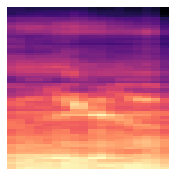

In [ ]:
filect = 0
print('Working on 4th batch 6001 to 8000')
for i in dfv_4.itertuples():
  filect = filect + 1
  #print(str(filect))
  file = i[4]
  pngfile = i[5]
  #print(file, pngfile)
  #print('Filecount: '+str(filect)+' Working on: '+file)
  print('Filecount: '+str(filect)+' Saving spectograms: '+pngfile)
  # load wav file and determine sample rate automatically
  signal, sr = librosa.load(file, sr=None)
  # my parameters
  hop_length = 11025 # in num. of samples
  n_fft = 42336 # window in num. of samples
  hop_length_duration = float(hop_length)/sr
  n_fft_duration = float(n_fft)/sr
  # Mel filter banks
  filter_banks = librosa.filters.mel(n_fft=n_fft, sr=sr, n_mels=64)
  stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)
  # This will yield 96-length spectrograms
  spectrogram = np.abs(stft)
  # converted to 64 bin log-scaled Mel spectrogram,
  melspec = librosa.feature.melspectrogram(y=signal, sr=sr, S=spectrogram, n_fft=n_fft, hop_length=hop_length, win_length=None, window='hann', center=True, pad_mode='reflect', n_mels=64)
  log_mel_spectrogram = librosa.power_to_db(melspec, ref=np.max)
  #plt.figure(figsize=(2.24, 2.24))
  fig = librosa.display.specshow(log_mel_spectrogram, hop_length=hop_length)
  fig2 = plt.gcf()
  plt.axis('off')
  fig2.set_size_inches(2.9, 2.98)
  plt.savefig(pngfile, dpi=100, bbox_inches='tight', pad_inches=0, format='png')

print('start time: ')
print(startime)
print(time.ctime())

Working on 5th batch 8001 to end
Filecount: 1 Saving spectograms: /content/gdrive/MyDrive/validpng2/62453.png
Filecount: 2 Saving spectograms: /content/gdrive/MyDrive/validpng2/346884.png
Filecount: 3 Saving spectograms: /content/gdrive/MyDrive/validpng2/208718.png
Filecount: 4 Saving spectograms: /content/gdrive/MyDrive/validpng2/394893.png
Filecount: 5 Saving spectograms: /content/gdrive/MyDrive/validpng2/340034.png
Filecount: 6 Saving spectograms: /content/gdrive/MyDrive/validpng2/326955.png
Filecount: 7 Saving spectograms: /content/gdrive/MyDrive/validpng2/346882.png
Filecount: 8 Saving spectograms: /content/gdrive/MyDrive/validpng2/403546.png
Filecount: 9 Saving spectograms: /content/gdrive/MyDrive/validpng2/325952.png
Filecount: 10 Saving spectograms: /content/gdrive/MyDrive/validpng2/344218.png
Filecount: 11 Saving spectograms: /content/gdrive/MyDrive/validpng2/399092.png
Filecount: 12 Saving spectograms: /content/gdrive/MyDrive/validpng2/151179.png
Filecount: 13 Saving spectogr

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18375
  n_fft, y.shape[-1]


Filecount: 40 Saving spectograms: /content/gdrive/MyDrive/validpng2/68970.png
Filecount: 41 Saving spectograms: /content/gdrive/MyDrive/validpng2/35240.png
Filecount: 42 Saving spectograms: /content/gdrive/MyDrive/validpng2/244294.png
Filecount: 43 Saving spectograms: /content/gdrive/MyDrive/validpng2/350710.png
Filecount: 44 Saving spectograms: /content/gdrive/MyDrive/validpng2/75338.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15430
  n_fft, y.shape[-1]


Filecount: 45 Saving spectograms: /content/gdrive/MyDrive/validpng2/350711.png
Filecount: 46 Saving spectograms: /content/gdrive/MyDrive/validpng2/350707.png
Filecount: 47 Saving spectograms: /content/gdrive/MyDrive/validpng2/35286.png
Filecount: 48 Saving spectograms: /content/gdrive/MyDrive/validpng2/432202.png
Filecount: 49 Saving spectograms: /content/gdrive/MyDrive/validpng2/415926.png
Filecount: 50 Saving spectograms: /content/gdrive/MyDrive/validpng2/15584.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15296
  n_fft, y.shape[-1]


Filecount: 51 Saving spectograms: /content/gdrive/MyDrive/validpng2/35242.png
Filecount: 52 Saving spectograms: /content/gdrive/MyDrive/validpng2/159759.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15826
  n_fft, y.shape[-1]


Filecount: 53 Saving spectograms: /content/gdrive/MyDrive/validpng2/159768.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17434
  n_fft, y.shape[-1]


Filecount: 54 Saving spectograms: /content/gdrive/MyDrive/validpng2/75339.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15492
  n_fft, y.shape[-1]


Filecount: 55 Saving spectograms: /content/gdrive/MyDrive/validpng2/81237.png
Filecount: 56 Saving spectograms: /content/gdrive/MyDrive/validpng2/34272.png
Filecount: 57 Saving spectograms: /content/gdrive/MyDrive/validpng2/159766.png
Filecount: 58 Saving spectograms: /content/gdrive/MyDrive/validpng2/148931.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16300
  n_fft, y.shape[-1]


Filecount: 59 Saving spectograms: /content/gdrive/MyDrive/validpng2/181605.png
Filecount: 60 Saving spectograms: /content/gdrive/MyDrive/validpng2/159764.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31628
  n_fft, y.shape[-1]


Filecount: 61 Saving spectograms: /content/gdrive/MyDrive/validpng2/348608.png
Filecount: 62 Saving spectograms: /content/gdrive/MyDrive/validpng2/9853.png
Filecount: 63 Saving spectograms: /content/gdrive/MyDrive/validpng2/46754.png
Filecount: 64 Saving spectograms: /content/gdrive/MyDrive/validpng2/35287.png
Filecount: 65 Saving spectograms: /content/gdrive/MyDrive/validpng2/348609.png
Filecount: 66 Saving spectograms: /content/gdrive/MyDrive/validpng2/159765.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13667
  n_fft, y.shape[-1]


Filecount: 67 Saving spectograms: /content/gdrive/MyDrive/validpng2/35241.png
Filecount: 68 Saving spectograms: /content/gdrive/MyDrive/validpng2/81236.png
Filecount: 69 Saving spectograms: /content/gdrive/MyDrive/validpng2/350704.png
Filecount: 70 Saving spectograms: /content/gdrive/MyDrive/validpng2/68972.png
Filecount: 71 Saving spectograms: /content/gdrive/MyDrive/validpng2/350709.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20233
  n_fft, y.shape[-1]


Filecount: 72 Saving spectograms: /content/gdrive/MyDrive/validpng2/219628.png
Filecount: 73 Saving spectograms: /content/gdrive/MyDrive/validpng2/319149.png
Filecount: 74 Saving spectograms: /content/gdrive/MyDrive/validpng2/53401.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13920
  n_fft, y.shape[-1]


Filecount: 75 Saving spectograms: /content/gdrive/MyDrive/validpng2/364919.png
Filecount: 76 Saving spectograms: /content/gdrive/MyDrive/validpng2/32324.png
Filecount: 77 Saving spectograms: /content/gdrive/MyDrive/validpng2/68974.png
Filecount: 78 Saving spectograms: /content/gdrive/MyDrive/validpng2/159763.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36521
  n_fft, y.shape[-1]


Filecount: 79 Saving spectograms: /content/gdrive/MyDrive/validpng2/159758.png
Filecount: 80 Saving spectograms: /content/gdrive/MyDrive/validpng2/337915.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37506
  n_fft, y.shape[-1]


Filecount: 81 Saving spectograms: /content/gdrive/MyDrive/validpng2/350708.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36787
  n_fft, y.shape[-1]


Filecount: 82 Saving spectograms: /content/gdrive/MyDrive/validpng2/350713.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22073
  n_fft, y.shape[-1]


Filecount: 83 Saving spectograms: /content/gdrive/MyDrive/validpng2/350712.png
Filecount: 84 Saving spectograms: /content/gdrive/MyDrive/validpng2/149396.png
Filecount: 85 Saving spectograms: /content/gdrive/MyDrive/validpng2/68971.png
Filecount: 86 Saving spectograms: /content/gdrive/MyDrive/validpng2/345092.png
Filecount: 87 Saving spectograms: /content/gdrive/MyDrive/validpng2/363022.png
Filecount: 88 Saving spectograms: /content/gdrive/MyDrive/validpng2/72208.png
Filecount: 89 Saving spectograms: /content/gdrive/MyDrive/validpng2/77340.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15299
  n_fft, y.shape[-1]


Filecount: 90 Saving spectograms: /content/gdrive/MyDrive/validpng2/262684.png
Filecount: 91 Saving spectograms: /content/gdrive/MyDrive/validpng2/412191.png
Filecount: 92 Saving spectograms: /content/gdrive/MyDrive/validpng2/243752.png
Filecount: 93 Saving spectograms: /content/gdrive/MyDrive/validpng2/94760.png
Filecount: 94 Saving spectograms: /content/gdrive/MyDrive/validpng2/256575.png
Filecount: 95 Saving spectograms: /content/gdrive/MyDrive/validpng2/328768.png
Filecount: 96 Saving spectograms: /content/gdrive/MyDrive/validpng2/325711.png
Filecount: 97 Saving spectograms: /content/gdrive/MyDrive/validpng2/344149.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33024
  n_fft, y.shape[-1]


Filecount: 98 Saving spectograms: /content/gdrive/MyDrive/validpng2/344150.png
Filecount: 99 Saving spectograms: /content/gdrive/MyDrive/validpng2/344151.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26624
  n_fft, y.shape[-1]


Filecount: 100 Saving spectograms: /content/gdrive/MyDrive/validpng2/344152.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30208
  n_fft, y.shape[-1]


Filecount: 101 Saving spectograms: /content/gdrive/MyDrive/validpng2/64089.png
Filecount: 102 Saving spectograms: /content/gdrive/MyDrive/validpng2/344153.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30336
  n_fft, y.shape[-1]


Filecount: 103 Saving spectograms: /content/gdrive/MyDrive/validpng2/321129.png
Filecount: 104 Saving spectograms: /content/gdrive/MyDrive/validpng2/215160.png
Filecount: 105 Saving spectograms: /content/gdrive/MyDrive/validpng2/31354.png
Filecount: 106 Saving spectograms: /content/gdrive/MyDrive/validpng2/181895.png
Filecount: 107 Saving spectograms: /content/gdrive/MyDrive/validpng2/39560.png
Filecount: 108 Saving spectograms: /content/gdrive/MyDrive/validpng2/405132.png
Filecount: 109 Saving spectograms: /content/gdrive/MyDrive/validpng2/155793.png
Filecount: 110 Saving spectograms: /content/gdrive/MyDrive/validpng2/219303.png
Filecount: 111 Saving spectograms: /content/gdrive/MyDrive/validpng2/235689.png
Filecount: 112 Saving spectograms: /content/gdrive/MyDrive/validpng2/264879.png
Filecount: 113 Saving spectograms: /content/gdrive/MyDrive/validpng2/423106.png
Filecount: 114 Saving spectograms: /content/gdrive/MyDrive/validpng2/249538.png
Filecount: 115 Saving spectograms: /conten

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33066
  n_fft, y.shape[-1]


Filecount: 116 Saving spectograms: /content/gdrive/MyDrive/validpng2/406233.png
Filecount: 117 Saving spectograms: /content/gdrive/MyDrive/validpng2/406240.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18534
  n_fft, y.shape[-1]


Filecount: 118 Saving spectograms: /content/gdrive/MyDrive/validpng2/391911.png
Filecount: 119 Saving spectograms: /content/gdrive/MyDrive/validpng2/383748.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24372
  n_fft, y.shape[-1]


Filecount: 120 Saving spectograms: /content/gdrive/MyDrive/validpng2/321802.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=34852
  n_fft, y.shape[-1]


Filecount: 121 Saving spectograms: /content/gdrive/MyDrive/validpng2/321805.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=34907
  n_fft, y.shape[-1]


Filecount: 122 Saving spectograms: /content/gdrive/MyDrive/validpng2/321808.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38988
  n_fft, y.shape[-1]


Filecount: 123 Saving spectograms: /content/gdrive/MyDrive/validpng2/321810.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18998
  n_fft, y.shape[-1]


Filecount: 124 Saving spectograms: /content/gdrive/MyDrive/validpng2/321809.png
Filecount: 125 Saving spectograms: /content/gdrive/MyDrive/validpng2/134934.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21168
  n_fft, y.shape[-1]


Filecount: 126 Saving spectograms: /content/gdrive/MyDrive/validpng2/383778.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21021
  n_fft, y.shape[-1]


Filecount: 127 Saving spectograms: /content/gdrive/MyDrive/validpng2/117042.png
Filecount: 128 Saving spectograms: /content/gdrive/MyDrive/validpng2/117043.png
Filecount: 129 Saving spectograms: /content/gdrive/MyDrive/validpng2/369981.png
Filecount: 130 Saving spectograms: /content/gdrive/MyDrive/validpng2/407357.png
Filecount: 131 Saving spectograms: /content/gdrive/MyDrive/validpng2/369988.png
Filecount: 132 Saving spectograms: /content/gdrive/MyDrive/validpng2/197957.png
Filecount: 133 Saving spectograms: /content/gdrive/MyDrive/validpng2/203086.png
Filecount: 134 Saving spectograms: /content/gdrive/MyDrive/validpng2/238929.png
Filecount: 135 Saving spectograms: /content/gdrive/MyDrive/validpng2/174940.png
Filecount: 136 Saving spectograms: /content/gdrive/MyDrive/validpng2/218462.png
Filecount: 137 Saving spectograms: /content/gdrive/MyDrive/validpng2/218463.png
Filecount: 138 Saving spectograms: /content/gdrive/MyDrive/validpng2/218464.png
Filecount: 139 Saving spectograms: /cont

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13824
  n_fft, y.shape[-1]


Filecount: 144 Saving spectograms: /content/gdrive/MyDrive/validpng2/96137.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=25600
  n_fft, y.shape[-1]


Filecount: 145 Saving spectograms: /content/gdrive/MyDrive/validpng2/98191.png
Filecount: 146 Saving spectograms: /content/gdrive/MyDrive/validpng2/334228.png
Filecount: 147 Saving spectograms: /content/gdrive/MyDrive/validpng2/399272.png
Filecount: 148 Saving spectograms: /content/gdrive/MyDrive/validpng2/399273.png
Filecount: 149 Saving spectograms: /content/gdrive/MyDrive/validpng2/404394.png
Filecount: 150 Saving spectograms: /content/gdrive/MyDrive/validpng2/57785.png
Filecount: 151 Saving spectograms: /content/gdrive/MyDrive/validpng2/394178.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23285
  n_fft, y.shape[-1]


Filecount: 152 Saving spectograms: /content/gdrive/MyDrive/validpng2/394180.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28341
  n_fft, y.shape[-1]


Filecount: 153 Saving spectograms: /content/gdrive/MyDrive/validpng2/394181.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19287
  n_fft, y.shape[-1]


Filecount: 154 Saving spectograms: /content/gdrive/MyDrive/validpng2/192454.png
Filecount: 155 Saving spectograms: /content/gdrive/MyDrive/validpng2/394185.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19169
  n_fft, y.shape[-1]


Filecount: 156 Saving spectograms: /content/gdrive/MyDrive/validpng2/320456.png
Filecount: 157 Saving spectograms: /content/gdrive/MyDrive/validpng2/207824.png
Filecount: 158 Saving spectograms: /content/gdrive/MyDrive/validpng2/196562.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35516
  n_fft, y.shape[-1]


Filecount: 159 Saving spectograms: /content/gdrive/MyDrive/validpng2/400867.png
Filecount: 160 Saving spectograms: /content/gdrive/MyDrive/validpng2/376817.png
Filecount: 161 Saving spectograms: /content/gdrive/MyDrive/validpng2/389630.png
Filecount: 162 Saving spectograms: /content/gdrive/MyDrive/validpng2/155650.png
Filecount: 163 Saving spectograms: /content/gdrive/MyDrive/validpng2/393733.png
Filecount: 164 Saving spectograms: /content/gdrive/MyDrive/validpng2/407561.png
Filecount: 165 Saving spectograms: /content/gdrive/MyDrive/validpng2/18448.png
Filecount: 166 Saving spectograms: /content/gdrive/MyDrive/validpng2/408087.png
Filecount: 167 Saving spectograms: /content/gdrive/MyDrive/validpng2/325656.png
Filecount: 168 Saving spectograms: /content/gdrive/MyDrive/validpng2/325669.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39543
  n_fft, y.shape[-1]


Filecount: 169 Saving spectograms: /content/gdrive/MyDrive/validpng2/201262.png
Filecount: 170 Saving spectograms: /content/gdrive/MyDrive/validpng2/256567.png
Filecount: 171 Saving spectograms: /content/gdrive/MyDrive/validpng2/407616.png
Filecount: 172 Saving spectograms: /content/gdrive/MyDrive/validpng2/251489.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33152
  n_fft, y.shape[-1]


Filecount: 173 Saving spectograms: /content/gdrive/MyDrive/validpng2/419437.png
Filecount: 174 Saving spectograms: /content/gdrive/MyDrive/validpng2/391284.png
Filecount: 175 Saving spectograms: /content/gdrive/MyDrive/validpng2/154766.png
Filecount: 176 Saving spectograms: /content/gdrive/MyDrive/validpng2/369295.png
Filecount: 177 Saving spectograms: /content/gdrive/MyDrive/validpng2/240276.png
Filecount: 178 Saving spectograms: /content/gdrive/MyDrive/validpng2/26296.png
Filecount: 179 Saving spectograms: /content/gdrive/MyDrive/validpng2/26297.png
Filecount: 180 Saving spectograms: /content/gdrive/MyDrive/validpng2/258256.png
Filecount: 181 Saving spectograms: /content/gdrive/MyDrive/validpng2/405205.png
Filecount: 182 Saving spectograms: /content/gdrive/MyDrive/validpng2/159455.png
Filecount: 183 Saving spectograms: /content/gdrive/MyDrive/validpng2/159456.png
Filecount: 184 Saving spectograms: /content/gdrive/MyDrive/validpng2/327395.png
Filecount: 185 Saving spectograms: /conten

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24448
  n_fft, y.shape[-1]


Filecount: 199 Saving spectograms: /content/gdrive/MyDrive/validpng2/93031.png
Filecount: 200 Saving spectograms: /content/gdrive/MyDrive/validpng2/420212.png
Filecount: 201 Saving spectograms: /content/gdrive/MyDrive/validpng2/403881.png
Filecount: 202 Saving spectograms: /content/gdrive/MyDrive/validpng2/181171.png
Filecount: 203 Saving spectograms: /content/gdrive/MyDrive/validpng2/401334.png
Filecount: 204 Saving spectograms: /content/gdrive/MyDrive/validpng2/146873.png
Filecount: 205 Saving spectograms: /content/gdrive/MyDrive/validpng2/170960.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33741
  n_fft, y.shape[-1]


Filecount: 206 Saving spectograms: /content/gdrive/MyDrive/validpng2/407509.png
Filecount: 207 Saving spectograms: /content/gdrive/MyDrive/validpng2/43481.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=34509
  n_fft, y.shape[-1]


Filecount: 208 Saving spectograms: /content/gdrive/MyDrive/validpng2/348134.png
Filecount: 209 Saving spectograms: /content/gdrive/MyDrive/validpng2/431599.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40377
  n_fft, y.shape[-1]


Filecount: 210 Saving spectograms: /content/gdrive/MyDrive/validpng2/108017.png
Filecount: 211 Saving spectograms: /content/gdrive/MyDrive/validpng2/164341.png
Filecount: 212 Saving spectograms: /content/gdrive/MyDrive/validpng2/110582.png
Filecount: 213 Saving spectograms: /content/gdrive/MyDrive/validpng2/166365.png
Filecount: 214 Saving spectograms: /content/gdrive/MyDrive/validpng2/146095.png
Filecount: 215 Saving spectograms: /content/gdrive/MyDrive/validpng2/109965.png
Filecount: 216 Saving spectograms: /content/gdrive/MyDrive/validpng2/232005.png
Filecount: 217 Saving spectograms: /content/gdrive/MyDrive/validpng2/188040.png
Filecount: 218 Saving spectograms: /content/gdrive/MyDrive/validpng2/188045.png
Filecount: 219 Saving spectograms: /content/gdrive/MyDrive/validpng2/384232.png
Filecount: 220 Saving spectograms: /content/gdrive/MyDrive/validpng2/121028.png
Filecount: 221 Saving spectograms: /content/gdrive/MyDrive/validpng2/325015.png
Filecount: 222 Saving spectograms: /cont

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=34233
  n_fft, y.shape[-1]


Filecount: 224 Saving spectograms: /content/gdrive/MyDrive/validpng2/325013.png
Filecount: 225 Saving spectograms: /content/gdrive/MyDrive/validpng2/401674.png
Filecount: 226 Saving spectograms: /content/gdrive/MyDrive/validpng2/166368.png
Filecount: 227 Saving spectograms: /content/gdrive/MyDrive/validpng2/325022.png
Filecount: 228 Saving spectograms: /content/gdrive/MyDrive/validpng2/325021.png
Filecount: 229 Saving spectograms: /content/gdrive/MyDrive/validpng2/124071.png
Filecount: 230 Saving spectograms: /content/gdrive/MyDrive/validpng2/429525.png
Filecount: 231 Saving spectograms: /content/gdrive/MyDrive/validpng2/384234.png
Filecount: 232 Saving spectograms: /content/gdrive/MyDrive/validpng2/325019.png
Filecount: 233 Saving spectograms: /content/gdrive/MyDrive/validpng2/325025.png
Filecount: 234 Saving spectograms: /content/gdrive/MyDrive/validpng2/325027.png
Filecount: 235 Saving spectograms: /content/gdrive/MyDrive/validpng2/109966.png
Filecount: 236 Saving spectograms: /cont

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40626
  n_fft, y.shape[-1]


Filecount: 250 Saving spectograms: /content/gdrive/MyDrive/validpng2/166367.png
Filecount: 251 Saving spectograms: /content/gdrive/MyDrive/validpng2/325028.png
Filecount: 252 Saving spectograms: /content/gdrive/MyDrive/validpng2/325018.png
Filecount: 253 Saving spectograms: /content/gdrive/MyDrive/validpng2/193174.png
Filecount: 254 Saving spectograms: /content/gdrive/MyDrive/validpng2/166359.png
Filecount: 255 Saving spectograms: /content/gdrive/MyDrive/validpng2/166366.png
Filecount: 256 Saving spectograms: /content/gdrive/MyDrive/validpng2/232006.png
Filecount: 257 Saving spectograms: /content/gdrive/MyDrive/validpng2/325032.png
Filecount: 258 Saving spectograms: /content/gdrive/MyDrive/validpng2/325023.png
Filecount: 259 Saving spectograms: /content/gdrive/MyDrive/validpng2/325016.png
Filecount: 260 Saving spectograms: /content/gdrive/MyDrive/validpng2/325014.png
Filecount: 261 Saving spectograms: /content/gdrive/MyDrive/validpng2/325035.png
Filecount: 262 Saving spectograms: /cont

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36490
  n_fft, y.shape[-1]


Filecount: 313 Saving spectograms: /content/gdrive/MyDrive/validpng2/134935.png
Filecount: 314 Saving spectograms: /content/gdrive/MyDrive/validpng2/51364.png
Filecount: 315 Saving spectograms: /content/gdrive/MyDrive/validpng2/19312.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=25323
  n_fft, y.shape[-1]


Filecount: 316 Saving spectograms: /content/gdrive/MyDrive/validpng2/249151.png
Filecount: 317 Saving spectograms: /content/gdrive/MyDrive/validpng2/389590.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13911
  n_fft, y.shape[-1]


Filecount: 318 Saving spectograms: /content/gdrive/MyDrive/validpng2/419341.png
Filecount: 319 Saving spectograms: /content/gdrive/MyDrive/validpng2/180832.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27488
  n_fft, y.shape[-1]


Filecount: 320 Saving spectograms: /content/gdrive/MyDrive/validpng2/254866.png
Filecount: 321 Saving spectograms: /content/gdrive/MyDrive/validpng2/243468.png
Filecount: 322 Saving spectograms: /content/gdrive/MyDrive/validpng2/86019.png
Filecount: 323 Saving spectograms: /content/gdrive/MyDrive/validpng2/391449.png
Filecount: 324 Saving spectograms: /content/gdrive/MyDrive/validpng2/389170.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26460
  n_fft, y.shape[-1]


Filecount: 325 Saving spectograms: /content/gdrive/MyDrive/validpng2/433611.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=41467
  n_fft, y.shape[-1]


Filecount: 326 Saving spectograms: /content/gdrive/MyDrive/validpng2/391446.png
Filecount: 327 Saving spectograms: /content/gdrive/MyDrive/validpng2/223615.png
Filecount: 328 Saving spectograms: /content/gdrive/MyDrive/validpng2/273843.png
Filecount: 329 Saving spectograms: /content/gdrive/MyDrive/validpng2/205194.png
Filecount: 330 Saving spectograms: /content/gdrive/MyDrive/validpng2/339940.png
Filecount: 331 Saving spectograms: /content/gdrive/MyDrive/validpng2/1949.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21647
  n_fft, y.shape[-1]


Filecount: 332 Saving spectograms: /content/gdrive/MyDrive/validpng2/180834.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19826
  n_fft, y.shape[-1]


Filecount: 333 Saving spectograms: /content/gdrive/MyDrive/validpng2/369008.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19456
  n_fft, y.shape[-1]


Filecount: 334 Saving spectograms: /content/gdrive/MyDrive/validpng2/142348.png
Filecount: 335 Saving spectograms: /content/gdrive/MyDrive/validpng2/398608.png
Filecount: 336 Saving spectograms: /content/gdrive/MyDrive/validpng2/257713.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20697
  n_fft, y.shape[-1]


Filecount: 337 Saving spectograms: /content/gdrive/MyDrive/validpng2/144939.png
Filecount: 338 Saving spectograms: /content/gdrive/MyDrive/validpng2/222608.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35855
  n_fft, y.shape[-1]


Filecount: 339 Saving spectograms: /content/gdrive/MyDrive/validpng2/223622.png
Filecount: 340 Saving spectograms: /content/gdrive/MyDrive/validpng2/72189.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=34453
  n_fft, y.shape[-1]


Filecount: 341 Saving spectograms: /content/gdrive/MyDrive/validpng2/367182.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30720
  n_fft, y.shape[-1]


Filecount: 342 Saving spectograms: /content/gdrive/MyDrive/validpng2/243400.png
Filecount: 343 Saving spectograms: /content/gdrive/MyDrive/validpng2/268227.png
Filecount: 344 Saving spectograms: /content/gdrive/MyDrive/validpng2/180837.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15490
  n_fft, y.shape[-1]


Filecount: 345 Saving spectograms: /content/gdrive/MyDrive/validpng2/347546.png
Filecount: 346 Saving spectograms: /content/gdrive/MyDrive/validpng2/243566.png
Filecount: 347 Saving spectograms: /content/gdrive/MyDrive/validpng2/423792.png
Filecount: 348 Saving spectograms: /content/gdrive/MyDrive/validpng2/1950.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23035
  n_fft, y.shape[-1]


Filecount: 349 Saving spectograms: /content/gdrive/MyDrive/validpng2/235553.png
Filecount: 350 Saving spectograms: /content/gdrive/MyDrive/validpng2/219004.png
Filecount: 351 Saving spectograms: /content/gdrive/MyDrive/validpng2/14609.png
Filecount: 352 Saving spectograms: /content/gdrive/MyDrive/validpng2/219005.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14976
  n_fft, y.shape[-1]


Filecount: 353 Saving spectograms: /content/gdrive/MyDrive/validpng2/1939.png
Filecount: 354 Saving spectograms: /content/gdrive/MyDrive/validpng2/414422.png
Filecount: 355 Saving spectograms: /content/gdrive/MyDrive/validpng2/127197.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22050
  n_fft, y.shape[-1]


Filecount: 356 Saving spectograms: /content/gdrive/MyDrive/validpng2/389771.png
Filecount: 357 Saving spectograms: /content/gdrive/MyDrive/validpng2/243567.png
Filecount: 358 Saving spectograms: /content/gdrive/MyDrive/validpng2/223631.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31467
  n_fft, y.shape[-1]


Filecount: 359 Saving spectograms: /content/gdrive/MyDrive/validpng2/352719.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24734
  n_fft, y.shape[-1]


Filecount: 360 Saving spectograms: /content/gdrive/MyDrive/validpng2/390775.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23814
  n_fft, y.shape[-1]


Filecount: 361 Saving spectograms: /content/gdrive/MyDrive/validpng2/65733.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36850
  n_fft, y.shape[-1]


Filecount: 362 Saving spectograms: /content/gdrive/MyDrive/validpng2/427823.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35280
  n_fft, y.shape[-1]


Filecount: 363 Saving spectograms: /content/gdrive/MyDrive/validpng2/430077.png
Filecount: 364 Saving spectograms: /content/gdrive/MyDrive/validpng2/391445.png
Filecount: 365 Saving spectograms: /content/gdrive/MyDrive/validpng2/181263.png
Filecount: 366 Saving spectograms: /content/gdrive/MyDrive/validpng2/347550.png
Filecount: 367 Saving spectograms: /content/gdrive/MyDrive/validpng2/420670.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15645
  n_fft, y.shape[-1]


Filecount: 368 Saving spectograms: /content/gdrive/MyDrive/validpng2/191766.png
Filecount: 369 Saving spectograms: /content/gdrive/MyDrive/validpng2/421094.png
Filecount: 370 Saving spectograms: /content/gdrive/MyDrive/validpng2/394004.png
Filecount: 371 Saving spectograms: /content/gdrive/MyDrive/validpng2/186374.png
Filecount: 372 Saving spectograms: /content/gdrive/MyDrive/validpng2/127196.png
Filecount: 373 Saving spectograms: /content/gdrive/MyDrive/validpng2/59301.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18260
  n_fft, y.shape[-1]


Filecount: 374 Saving spectograms: /content/gdrive/MyDrive/validpng2/254871.png
Filecount: 375 Saving spectograms: /content/gdrive/MyDrive/validpng2/430076.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20727
  n_fft, y.shape[-1]


Filecount: 376 Saving spectograms: /content/gdrive/MyDrive/validpng2/346373.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14372
  n_fft, y.shape[-1]


Filecount: 377 Saving spectograms: /content/gdrive/MyDrive/validpng2/263595.png
Filecount: 378 Saving spectograms: /content/gdrive/MyDrive/validpng2/207618.png
Filecount: 379 Saving spectograms: /content/gdrive/MyDrive/validpng2/20131.png
Filecount: 380 Saving spectograms: /content/gdrive/MyDrive/validpng2/72193.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26184
  n_fft, y.shape[-1]


Filecount: 381 Saving spectograms: /content/gdrive/MyDrive/validpng2/1940.png
Filecount: 382 Saving spectograms: /content/gdrive/MyDrive/validpng2/127955.png
Filecount: 383 Saving spectograms: /content/gdrive/MyDrive/validpng2/257700.png
Filecount: 384 Saving spectograms: /content/gdrive/MyDrive/validpng2/107625.png
Filecount: 385 Saving spectograms: /content/gdrive/MyDrive/validpng2/430007.png
Filecount: 386 Saving spectograms: /content/gdrive/MyDrive/validpng2/408390.png
Filecount: 387 Saving spectograms: /content/gdrive/MyDrive/validpng2/203081.png
Filecount: 388 Saving spectograms: /content/gdrive/MyDrive/validpng2/107618.png
Filecount: 389 Saving spectograms: /content/gdrive/MyDrive/validpng2/392086.png
Filecount: 390 Saving spectograms: /content/gdrive/MyDrive/validpng2/413041.png
Filecount: 391 Saving spectograms: /content/gdrive/MyDrive/validpng2/408166.png
Filecount: 392 Saving spectograms: /content/gdrive/MyDrive/validpng2/107623.png
Filecount: 393 Saving spectograms: /conten

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13471
  n_fft, y.shape[-1]


Filecount: 429 Saving spectograms: /content/gdrive/MyDrive/validpng2/203111.png
Filecount: 430 Saving spectograms: /content/gdrive/MyDrive/validpng2/108453.png
Filecount: 431 Saving spectograms: /content/gdrive/MyDrive/validpng2/327059.png
Filecount: 432 Saving spectograms: /content/gdrive/MyDrive/validpng2/18621.png
Filecount: 433 Saving spectograms: /content/gdrive/MyDrive/validpng2/365670.png
Filecount: 434 Saving spectograms: /content/gdrive/MyDrive/validpng2/119853.png
Filecount: 435 Saving spectograms: /content/gdrive/MyDrive/validpng2/185259.png
Filecount: 436 Saving spectograms: /content/gdrive/MyDrive/validpng2/51058.png
Filecount: 437 Saving spectograms: /content/gdrive/MyDrive/validpng2/235673.png
Filecount: 438 Saving spectograms: /content/gdrive/MyDrive/validpng2/340910.png
Filecount: 439 Saving spectograms: /content/gdrive/MyDrive/validpng2/197989.png
Filecount: 440 Saving spectograms: /content/gdrive/MyDrive/validpng2/143989.png
Filecount: 441 Saving spectograms: /conten

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32768
  n_fft, y.shape[-1]


Filecount: 444 Saving spectograms: /content/gdrive/MyDrive/validpng2/119072.png
Filecount: 445 Saving spectograms: /content/gdrive/MyDrive/validpng2/260720.png
Filecount: 446 Saving spectograms: /content/gdrive/MyDrive/validpng2/390167.png
Filecount: 447 Saving spectograms: /content/gdrive/MyDrive/validpng2/403462.png
Filecount: 448 Saving spectograms: /content/gdrive/MyDrive/validpng2/344591.png
Filecount: 449 Saving spectograms: /content/gdrive/MyDrive/validpng2/390165.png
Filecount: 450 Saving spectograms: /content/gdrive/MyDrive/validpng2/366981.png
Filecount: 451 Saving spectograms: /content/gdrive/MyDrive/validpng2/420009.png
Filecount: 452 Saving spectograms: /content/gdrive/MyDrive/validpng2/366070.png
Filecount: 453 Saving spectograms: /content/gdrive/MyDrive/validpng2/393059.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30031
  n_fft, y.shape[-1]


Filecount: 454 Saving spectograms: /content/gdrive/MyDrive/validpng2/390169.png
Filecount: 455 Saving spectograms: /content/gdrive/MyDrive/validpng2/119073.png
Filecount: 456 Saving spectograms: /content/gdrive/MyDrive/validpng2/108443.png
Filecount: 457 Saving spectograms: /content/gdrive/MyDrive/validpng2/382984.png
Filecount: 458 Saving spectograms: /content/gdrive/MyDrive/validpng2/127153.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32616
  n_fft, y.shape[-1]


Filecount: 459 Saving spectograms: /content/gdrive/MyDrive/validpng2/329784.png
Filecount: 460 Saving spectograms: /content/gdrive/MyDrive/validpng2/378896.png
Filecount: 461 Saving spectograms: /content/gdrive/MyDrive/validpng2/366751.png
Filecount: 462 Saving spectograms: /content/gdrive/MyDrive/validpng2/390325.png
Filecount: 463 Saving spectograms: /content/gdrive/MyDrive/validpng2/90458.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26260
  n_fft, y.shape[-1]


Filecount: 464 Saving spectograms: /content/gdrive/MyDrive/validpng2/348137.png
Filecount: 465 Saving spectograms: /content/gdrive/MyDrive/validpng2/81119.png
Filecount: 466 Saving spectograms: /content/gdrive/MyDrive/validpng2/19546.png
Filecount: 467 Saving spectograms: /content/gdrive/MyDrive/validpng2/392376.png
Filecount: 468 Saving spectograms: /content/gdrive/MyDrive/validpng2/194433.png
Filecount: 469 Saving spectograms: /content/gdrive/MyDrive/validpng2/71507.png
Filecount: 470 Saving spectograms: /content/gdrive/MyDrive/validpng2/152800.png
Filecount: 471 Saving spectograms: /content/gdrive/MyDrive/validpng2/56240.png
Filecount: 472 Saving spectograms: /content/gdrive/MyDrive/validpng2/64548.png
Filecount: 473 Saving spectograms: /content/gdrive/MyDrive/validpng2/112507.png
Filecount: 474 Saving spectograms: /content/gdrive/MyDrive/validpng2/63643.png
Filecount: 475 Saving spectograms: /content/gdrive/MyDrive/validpng2/55438.png
Filecount: 476 Saving spectograms: /content/gdr

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36416
  n_fft, y.shape[-1]


Filecount: 496 Saving spectograms: /content/gdrive/MyDrive/validpng2/392378.png
Filecount: 497 Saving spectograms: /content/gdrive/MyDrive/validpng2/18617.png
Filecount: 498 Saving spectograms: /content/gdrive/MyDrive/validpng2/155460.png
Filecount: 499 Saving spectograms: /content/gdrive/MyDrive/validpng2/240382.png
Filecount: 500 Saving spectograms: /content/gdrive/MyDrive/validpng2/394478.png
Filecount: 501 Saving spectograms: /content/gdrive/MyDrive/validpng2/127265.png
Filecount: 502 Saving spectograms: /content/gdrive/MyDrive/validpng2/266566.png
Filecount: 503 Saving spectograms: /content/gdrive/MyDrive/validpng2/76886.png
Filecount: 504 Saving spectograms: /content/gdrive/MyDrive/validpng2/392381.png
Filecount: 505 Saving spectograms: /content/gdrive/MyDrive/validpng2/371752.png
Filecount: 506 Saving spectograms: /content/gdrive/MyDrive/validpng2/76100.png
Filecount: 507 Saving spectograms: /content/gdrive/MyDrive/validpng2/64551.png
Filecount: 508 Saving spectograms: /content/

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=34342
  n_fft, y.shape[-1]


Filecount: 525 Saving spectograms: /content/gdrive/MyDrive/validpng2/155462.png
Filecount: 526 Saving spectograms: /content/gdrive/MyDrive/validpng2/323607.png
Filecount: 527 Saving spectograms: /content/gdrive/MyDrive/validpng2/185825.png
Filecount: 528 Saving spectograms: /content/gdrive/MyDrive/validpng2/266776.png
Filecount: 529 Saving spectograms: /content/gdrive/MyDrive/validpng2/233057.png
Filecount: 530 Saving spectograms: /content/gdrive/MyDrive/validpng2/235706.png
Filecount: 531 Saving spectograms: /content/gdrive/MyDrive/validpng2/7968.png
Filecount: 532 Saving spectograms: /content/gdrive/MyDrive/validpng2/52051.png
Filecount: 533 Saving spectograms: /content/gdrive/MyDrive/validpng2/85295.png
Filecount: 534 Saving spectograms: /content/gdrive/MyDrive/validpng2/346589.png
Filecount: 535 Saving spectograms: /content/gdrive/MyDrive/validpng2/181264.png
Filecount: 536 Saving spectograms: /content/gdrive/MyDrive/validpng2/411006.png
Filecount: 537 Saving spectograms: /content/

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36864
  n_fft, y.shape[-1]


Filecount: 653 Saving spectograms: /content/gdrive/MyDrive/validpng2/348073.png
Filecount: 654 Saving spectograms: /content/gdrive/MyDrive/validpng2/380330.png
Filecount: 655 Saving spectograms: /content/gdrive/MyDrive/validpng2/219265.png
Filecount: 656 Saving spectograms: /content/gdrive/MyDrive/validpng2/219252.png
Filecount: 657 Saving spectograms: /content/gdrive/MyDrive/validpng2/317101.png
Filecount: 658 Saving spectograms: /content/gdrive/MyDrive/validpng2/352506.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16201
  n_fft, y.shape[-1]


Filecount: 659 Saving spectograms: /content/gdrive/MyDrive/validpng2/404420.png
Filecount: 660 Saving spectograms: /content/gdrive/MyDrive/validpng2/348072.png
Filecount: 661 Saving spectograms: /content/gdrive/MyDrive/validpng2/219250.png
Filecount: 662 Saving spectograms: /content/gdrive/MyDrive/validpng2/348074.png
Filecount: 663 Saving spectograms: /content/gdrive/MyDrive/validpng2/219259.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22051
  n_fft, y.shape[-1]


Filecount: 664 Saving spectograms: /content/gdrive/MyDrive/validpng2/320265.png
Filecount: 665 Saving spectograms: /content/gdrive/MyDrive/validpng2/219266.png
Filecount: 666 Saving spectograms: /content/gdrive/MyDrive/validpng2/432204.png
Filecount: 667 Saving spectograms: /content/gdrive/MyDrive/validpng2/317100.png
Filecount: 668 Saving spectograms: /content/gdrive/MyDrive/validpng2/219254.png
Filecount: 669 Saving spectograms: /content/gdrive/MyDrive/validpng2/148933.png
Filecount: 670 Saving spectograms: /content/gdrive/MyDrive/validpng2/423631.png
Filecount: 671 Saving spectograms: /content/gdrive/MyDrive/validpng2/348577.png
Filecount: 672 Saving spectograms: /content/gdrive/MyDrive/validpng2/148934.png
Filecount: 673 Saving spectograms: /content/gdrive/MyDrive/validpng2/78988.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29527
  n_fft, y.shape[-1]


Filecount: 674 Saving spectograms: /content/gdrive/MyDrive/validpng2/219257.png
Filecount: 675 Saving spectograms: /content/gdrive/MyDrive/validpng2/219262.png
Filecount: 676 Saving spectograms: /content/gdrive/MyDrive/validpng2/219267.png
Filecount: 677 Saving spectograms: /content/gdrive/MyDrive/validpng2/352507.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15006
  n_fft, y.shape[-1]


Filecount: 678 Saving spectograms: /content/gdrive/MyDrive/validpng2/119544.png
Filecount: 679 Saving spectograms: /content/gdrive/MyDrive/validpng2/171658.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24064
  n_fft, y.shape[-1]


Filecount: 680 Saving spectograms: /content/gdrive/MyDrive/validpng2/350524.png
Filecount: 681 Saving spectograms: /content/gdrive/MyDrive/validpng2/117249.png
Filecount: 682 Saving spectograms: /content/gdrive/MyDrive/validpng2/245215.png
Filecount: 683 Saving spectograms: /content/gdrive/MyDrive/validpng2/147589.png
Filecount: 684 Saving spectograms: /content/gdrive/MyDrive/validpng2/149395.png
Filecount: 685 Saving spectograms: /content/gdrive/MyDrive/validpng2/31949.png
Filecount: 686 Saving spectograms: /content/gdrive/MyDrive/validpng2/88725.png
Filecount: 687 Saving spectograms: /content/gdrive/MyDrive/validpng2/412751.png
Filecount: 688 Saving spectograms: /content/gdrive/MyDrive/validpng2/326647.png
Filecount: 689 Saving spectograms: /content/gdrive/MyDrive/validpng2/209535.png
Filecount: 690 Saving spectograms: /content/gdrive/MyDrive/validpng2/326458.png
Filecount: 691 Saving spectograms: /content/gdrive/MyDrive/validpng2/31939.png
Filecount: 692 Saving spectograms: /content

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19815
  n_fft, y.shape[-1]


Filecount: 766 Saving spectograms: /content/gdrive/MyDrive/validpng2/330395.png
Filecount: 767 Saving spectograms: /content/gdrive/MyDrive/validpng2/256577.png
Filecount: 768 Saving spectograms: /content/gdrive/MyDrive/validpng2/53272.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31744
  n_fft, y.shape[-1]


Filecount: 769 Saving spectograms: /content/gdrive/MyDrive/validpng2/131597.png
Filecount: 770 Saving spectograms: /content/gdrive/MyDrive/validpng2/412487.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=41472
  n_fft, y.shape[-1]


Filecount: 771 Saving spectograms: /content/gdrive/MyDrive/validpng2/108671.png
Filecount: 772 Saving spectograms: /content/gdrive/MyDrive/validpng2/393183.png
Filecount: 773 Saving spectograms: /content/gdrive/MyDrive/validpng2/271660.png
Filecount: 774 Saving spectograms: /content/gdrive/MyDrive/validpng2/232988.png
Filecount: 775 Saving spectograms: /content/gdrive/MyDrive/validpng2/98946.png
Filecount: 776 Saving spectograms: /content/gdrive/MyDrive/validpng2/195580.png
Filecount: 777 Saving spectograms: /content/gdrive/MyDrive/validpng2/266526.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=41453
  n_fft, y.shape[-1]


Filecount: 778 Saving spectograms: /content/gdrive/MyDrive/validpng2/406594.png
Filecount: 779 Saving spectograms: /content/gdrive/MyDrive/validpng2/195579.png
Filecount: 780 Saving spectograms: /content/gdrive/MyDrive/validpng2/154440.png
Filecount: 781 Saving spectograms: /content/gdrive/MyDrive/validpng2/201263.png
Filecount: 782 Saving spectograms: /content/gdrive/MyDrive/validpng2/114509.png
Filecount: 783 Saving spectograms: /content/gdrive/MyDrive/validpng2/433587.png
Filecount: 784 Saving spectograms: /content/gdrive/MyDrive/validpng2/352439.png
Filecount: 785 Saving spectograms: /content/gdrive/MyDrive/validpng2/235615.png
Filecount: 786 Saving spectograms: /content/gdrive/MyDrive/validpng2/209656.png
Filecount: 787 Saving spectograms: /content/gdrive/MyDrive/validpng2/195576.png
Filecount: 788 Saving spectograms: /content/gdrive/MyDrive/validpng2/232895.png
Filecount: 789 Saving spectograms: /content/gdrive/MyDrive/validpng2/212956.png
Filecount: 790 Saving spectograms: /cont

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28672
  n_fft, y.shape[-1]


Filecount: 791 Saving spectograms: /content/gdrive/MyDrive/validpng2/432773.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22128
  n_fft, y.shape[-1]


Filecount: 792 Saving spectograms: /content/gdrive/MyDrive/validpng2/406853.png
Filecount: 793 Saving spectograms: /content/gdrive/MyDrive/validpng2/330799.png
Filecount: 794 Saving spectograms: /content/gdrive/MyDrive/validpng2/31548.png
Filecount: 795 Saving spectograms: /content/gdrive/MyDrive/validpng2/209533.png
Filecount: 796 Saving spectograms: /content/gdrive/MyDrive/validpng2/257373.png
Filecount: 797 Saving spectograms: /content/gdrive/MyDrive/validpng2/209519.png
Filecount: 798 Saving spectograms: /content/gdrive/MyDrive/validpng2/386735.png
Filecount: 799 Saving spectograms: /content/gdrive/MyDrive/validpng2/352381.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37668
  n_fft, y.shape[-1]


Filecount: 800 Saving spectograms: /content/gdrive/MyDrive/validpng2/114510.png
Filecount: 801 Saving spectograms: /content/gdrive/MyDrive/validpng2/352380.png
Filecount: 802 Saving spectograms: /content/gdrive/MyDrive/validpng2/117614.png
Filecount: 803 Saving spectograms: /content/gdrive/MyDrive/validpng2/151983.png
Filecount: 804 Saving spectograms: /content/gdrive/MyDrive/validpng2/322862.png
Filecount: 805 Saving spectograms: /content/gdrive/MyDrive/validpng2/178885.png
Filecount: 806 Saving spectograms: /content/gdrive/MyDrive/validpng2/114512.png
Filecount: 807 Saving spectograms: /content/gdrive/MyDrive/validpng2/117415.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35432
  n_fft, y.shape[-1]


Filecount: 808 Saving spectograms: /content/gdrive/MyDrive/validpng2/369619.png
Filecount: 809 Saving spectograms: /content/gdrive/MyDrive/validpng2/232896.png
Filecount: 810 Saving spectograms: /content/gdrive/MyDrive/validpng2/361823.png
Filecount: 811 Saving spectograms: /content/gdrive/MyDrive/validpng2/119074.png
Filecount: 812 Saving spectograms: /content/gdrive/MyDrive/validpng2/128996.png
Filecount: 813 Saving spectograms: /content/gdrive/MyDrive/validpng2/110104.png
Filecount: 814 Saving spectograms: /content/gdrive/MyDrive/validpng2/114516.png
Filecount: 815 Saving spectograms: /content/gdrive/MyDrive/validpng2/118231.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21849
  n_fft, y.shape[-1]


Filecount: 816 Saving spectograms: /content/gdrive/MyDrive/validpng2/53271.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32256
  n_fft, y.shape[-1]


Filecount: 817 Saving spectograms: /content/gdrive/MyDrive/validpng2/209517.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=27863
  n_fft, y.shape[-1]


Filecount: 818 Saving spectograms: /content/gdrive/MyDrive/validpng2/96840.png
Filecount: 819 Saving spectograms: /content/gdrive/MyDrive/validpng2/233223.png
Filecount: 820 Saving spectograms: /content/gdrive/MyDrive/validpng2/429994.png
Filecount: 821 Saving spectograms: /content/gdrive/MyDrive/validpng2/85297.png
Filecount: 822 Saving spectograms: /content/gdrive/MyDrive/validpng2/383836.png
Filecount: 823 Saving spectograms: /content/gdrive/MyDrive/validpng2/993.png
Filecount: 824 Saving spectograms: /content/gdrive/MyDrive/validpng2/209481.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19293
  n_fft, y.shape[-1]


Filecount: 825 Saving spectograms: /content/gdrive/MyDrive/validpng2/205095.png
Filecount: 826 Saving spectograms: /content/gdrive/MyDrive/validpng2/426765.png
Filecount: 827 Saving spectograms: /content/gdrive/MyDrive/validpng2/403539.png
Filecount: 828 Saving spectograms: /content/gdrive/MyDrive/validpng2/195582.png
Filecount: 829 Saving spectograms: /content/gdrive/MyDrive/validpng2/84920.png
Filecount: 830 Saving spectograms: /content/gdrive/MyDrive/validpng2/327671.png
Filecount: 831 Saving spectograms: /content/gdrive/MyDrive/validpng2/350317.png
Filecount: 832 Saving spectograms: /content/gdrive/MyDrive/validpng2/84921.png
Filecount: 833 Saving spectograms: /content/gdrive/MyDrive/validpng2/172746.png
Filecount: 834 Saving spectograms: /content/gdrive/MyDrive/validpng2/426766.png
Filecount: 835 Saving spectograms: /content/gdrive/MyDrive/validpng2/350318.png
Filecount: 836 Saving spectograms: /content/gdrive/MyDrive/validpng2/191110.png
Filecount: 837 Saving spectograms: /conten

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37387
  n_fft, y.shape[-1]


Filecount: 851 Saving spectograms: /content/gdrive/MyDrive/validpng2/128011.png
Filecount: 852 Saving spectograms: /content/gdrive/MyDrive/validpng2/84256.png
Filecount: 853 Saving spectograms: /content/gdrive/MyDrive/validpng2/188768.png
Filecount: 854 Saving spectograms: /content/gdrive/MyDrive/validpng2/78372.png
Filecount: 855 Saving spectograms: /content/gdrive/MyDrive/validpng2/215174.png
Filecount: 856 Saving spectograms: /content/gdrive/MyDrive/validpng2/352611.png
Filecount: 857 Saving spectograms: /content/gdrive/MyDrive/validpng2/363153.png
Filecount: 858 Saving spectograms: /content/gdrive/MyDrive/validpng2/166258.png
Filecount: 859 Saving spectograms: /content/gdrive/MyDrive/validpng2/69439.png
Filecount: 860 Saving spectograms: /content/gdrive/MyDrive/validpng2/39436.png
Filecount: 861 Saving spectograms: /content/gdrive/MyDrive/validpng2/204052.png
Filecount: 862 Saving spectograms: /content/gdrive/MyDrive/validpng2/352633.png
Filecount: 863 Saving spectograms: /content/

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33288
  n_fft, y.shape[-1]


Filecount: 881 Saving spectograms: /content/gdrive/MyDrive/validpng2/339086.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17114
  n_fft, y.shape[-1]


Filecount: 882 Saving spectograms: /content/gdrive/MyDrive/validpng2/362443.png
Filecount: 883 Saving spectograms: /content/gdrive/MyDrive/validpng2/121556.png
Filecount: 884 Saving spectograms: /content/gdrive/MyDrive/validpng2/201212.png
Filecount: 885 Saving spectograms: /content/gdrive/MyDrive/validpng2/20351.png
Filecount: 886 Saving spectograms: /content/gdrive/MyDrive/validpng2/2538.png
Filecount: 887 Saving spectograms: /content/gdrive/MyDrive/validpng2/56234.png
Filecount: 888 Saving spectograms: /content/gdrive/MyDrive/validpng2/106019.png
Filecount: 889 Saving spectograms: /content/gdrive/MyDrive/validpng2/102968.png
Filecount: 890 Saving spectograms: /content/gdrive/MyDrive/validpng2/49710.png
Filecount: 891 Saving spectograms: /content/gdrive/MyDrive/validpng2/394658.png
Filecount: 892 Saving spectograms: /content/gdrive/MyDrive/validpng2/337435.png
Filecount: 893 Saving spectograms: /content/gdrive/MyDrive/validpng2/366818.png
Filecount: 894 Saving spectograms: /content/g

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16170
  n_fft, y.shape[-1]


Filecount: 912 Saving spectograms: /content/gdrive/MyDrive/validpng2/393333.png
Filecount: 913 Saving spectograms: /content/gdrive/MyDrive/validpng2/141709.png
Filecount: 914 Saving spectograms: /content/gdrive/MyDrive/validpng2/90798.png
Filecount: 915 Saving spectograms: /content/gdrive/MyDrive/validpng2/85756.png
Filecount: 916 Saving spectograms: /content/gdrive/MyDrive/validpng2/409129.png
Filecount: 917 Saving spectograms: /content/gdrive/MyDrive/validpng2/184304.png
Filecount: 918 Saving spectograms: /content/gdrive/MyDrive/validpng2/431395.png
Filecount: 919 Saving spectograms: /content/gdrive/MyDrive/validpng2/330788.png
Filecount: 920 Saving spectograms: /content/gdrive/MyDrive/validpng2/400346.png
Filecount: 921 Saving spectograms: /content/gdrive/MyDrive/validpng2/234871.png
Filecount: 922 Saving spectograms: /content/gdrive/MyDrive/validpng2/235624.png
Filecount: 923 Saving spectograms: /content/gdrive/MyDrive/validpng2/345103.png
Filecount: 924 Saving spectograms: /conten

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=39640
  n_fft, y.shape[-1]


Filecount: 998 Saving spectograms: /content/gdrive/MyDrive/validpng2/17063.png
Filecount: 999 Saving spectograms: /content/gdrive/MyDrive/validpng2/232728.png
Filecount: 1000 Saving spectograms: /content/gdrive/MyDrive/validpng2/25421.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=34030
  n_fft, y.shape[-1]


Filecount: 1001 Saving spectograms: /content/gdrive/MyDrive/validpng2/185312.png
Filecount: 1002 Saving spectograms: /content/gdrive/MyDrive/validpng2/185258.png
Filecount: 1003 Saving spectograms: /content/gdrive/MyDrive/validpng2/382903.png
Filecount: 1004 Saving spectograms: /content/gdrive/MyDrive/validpng2/31987.png
Filecount: 1005 Saving spectograms: /content/gdrive/MyDrive/validpng2/119556.png
Filecount: 1006 Saving spectograms: /content/gdrive/MyDrive/validpng2/17894.png
Filecount: 1007 Saving spectograms: /content/gdrive/MyDrive/validpng2/330312.png
Filecount: 1008 Saving spectograms: /content/gdrive/MyDrive/validpng2/119840.png
Filecount: 1009 Saving spectograms: /content/gdrive/MyDrive/validpng2/412527.png
Filecount: 1010 Saving spectograms: /content/gdrive/MyDrive/validpng2/161214.png
Filecount: 1011 Saving spectograms: /content/gdrive/MyDrive/validpng2/377081.png
Filecount: 1012 Saving spectograms: /content/gdrive/MyDrive/validpng2/403564.png
Filecount: 1013 Saving spectog

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36357
  n_fft, y.shape[-1]


Filecount: 1043 Saving spectograms: /content/gdrive/MyDrive/validpng2/22269.png
Filecount: 1044 Saving spectograms: /content/gdrive/MyDrive/validpng2/94920.png
Filecount: 1045 Saving spectograms: /content/gdrive/MyDrive/validpng2/243490.png
Filecount: 1046 Saving spectograms: /content/gdrive/MyDrive/validpng2/395593.png
Filecount: 1047 Saving spectograms: /content/gdrive/MyDrive/validpng2/387054.png
Filecount: 1048 Saving spectograms: /content/gdrive/MyDrive/validpng2/197177.png
Filecount: 1049 Saving spectograms: /content/gdrive/MyDrive/validpng2/409003.png
Filecount: 1050 Saving spectograms: /content/gdrive/MyDrive/validpng2/348204.png
Filecount: 1051 Saving spectograms: /content/gdrive/MyDrive/validpng2/250381.png
Filecount: 1052 Saving spectograms: /content/gdrive/MyDrive/validpng2/421726.png
Filecount: 1053 Saving spectograms: /content/gdrive/MyDrive/validpng2/54277.png
Filecount: 1054 Saving spectograms: /content/gdrive/MyDrive/validpng2/1032.png
Filecount: 1055 Saving spectogram

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33957
  n_fft, y.shape[-1]


Filecount: 1074 Saving spectograms: /content/gdrive/MyDrive/validpng2/339106.png
Filecount: 1075 Saving spectograms: /content/gdrive/MyDrive/validpng2/81061.png
Filecount: 1076 Saving spectograms: /content/gdrive/MyDrive/validpng2/81062.png
Filecount: 1077 Saving spectograms: /content/gdrive/MyDrive/validpng2/81063.png
Filecount: 1078 Saving spectograms: /content/gdrive/MyDrive/validpng2/219308.png
Filecount: 1079 Saving spectograms: /content/gdrive/MyDrive/validpng2/180913.png
Filecount: 1080 Saving spectograms: /content/gdrive/MyDrive/validpng2/391870.png
Filecount: 1081 Saving spectograms: /content/gdrive/MyDrive/validpng2/164031.png
Filecount: 1082 Saving spectograms: /content/gdrive/MyDrive/validpng2/164032.png
Filecount: 1083 Saving spectograms: /content/gdrive/MyDrive/validpng2/164033.png
Filecount: 1084 Saving spectograms: /content/gdrive/MyDrive/validpng2/423103.png
Filecount: 1085 Saving spectograms: /content/gdrive/MyDrive/validpng2/164036.png
Filecount: 1086 Saving spectogr

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19052
  n_fft, y.shape[-1]


Filecount: 1098 Saving spectograms: /content/gdrive/MyDrive/validpng2/154387.png
Filecount: 1099 Saving spectograms: /content/gdrive/MyDrive/validpng2/42262.png
Filecount: 1100 Saving spectograms: /content/gdrive/MyDrive/validpng2/118040.png
Filecount: 1101 Saving spectograms: /content/gdrive/MyDrive/validpng2/189727.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=29272
  n_fft, y.shape[-1]


Filecount: 1102 Saving spectograms: /content/gdrive/MyDrive/validpng2/381728.png
Filecount: 1103 Saving spectograms: /content/gdrive/MyDrive/validpng2/383779.png
Filecount: 1104 Saving spectograms: /content/gdrive/MyDrive/validpng2/397097.png
Filecount: 1105 Saving spectograms: /content/gdrive/MyDrive/validpng2/118080.png
Filecount: 1106 Saving spectograms: /content/gdrive/MyDrive/validpng2/77133.png
Filecount: 1107 Saving spectograms: /content/gdrive/MyDrive/validpng2/60755.png
Filecount: 1108 Saving spectograms: /content/gdrive/MyDrive/validpng2/367447.png
Filecount: 1109 Saving spectograms: /content/gdrive/MyDrive/validpng2/383832.png
Filecount: 1110 Saving spectograms: /content/gdrive/MyDrive/validpng2/118107.png
Filecount: 1111 Saving spectograms: /content/gdrive/MyDrive/validpng2/75104.png
Filecount: 1112 Saving spectograms: /content/gdrive/MyDrive/validpng2/341870.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=41926
  n_fft, y.shape[-1]


Filecount: 1113 Saving spectograms: /content/gdrive/MyDrive/validpng2/391557.png
Filecount: 1114 Saving spectograms: /content/gdrive/MyDrive/validpng2/117642.png
Filecount: 1115 Saving spectograms: /content/gdrive/MyDrive/validpng2/204186.png
Filecount: 1116 Saving spectograms: /content/gdrive/MyDrive/validpng2/13727.png
Filecount: 1117 Saving spectograms: /content/gdrive/MyDrive/validpng2/85439.png
Filecount: 1118 Saving spectograms: /content/gdrive/MyDrive/validpng2/248256.png
Filecount: 1119 Saving spectograms: /content/gdrive/MyDrive/validpng2/84930.png
Filecount: 1120 Saving spectograms: /content/gdrive/MyDrive/validpng2/118229.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13586
  n_fft, y.shape[-1]


Filecount: 1121 Saving spectograms: /content/gdrive/MyDrive/validpng2/170455.png
Filecount: 1122 Saving spectograms: /content/gdrive/MyDrive/validpng2/17895.png
Filecount: 1123 Saving spectograms: /content/gdrive/MyDrive/validpng2/418534.png
Filecount: 1124 Saving spectograms: /content/gdrive/MyDrive/validpng2/188035.png
Filecount: 1125 Saving spectograms: /content/gdrive/MyDrive/validpng2/327665.png
Filecount: 1126 Saving spectograms: /content/gdrive/MyDrive/validpng2/430814.png
Filecount: 1127 Saving spectograms: /content/gdrive/MyDrive/validpng2/140055.png
Filecount: 1128 Saving spectograms: /content/gdrive/MyDrive/validpng2/392115.png
Filecount: 1129 Saving spectograms: /content/gdrive/MyDrive/validpng2/315839.png
Filecount: 1130 Saving spectograms: /content/gdrive/MyDrive/validpng2/161326.png
Filecount: 1131 Saving spectograms: /content/gdrive/MyDrive/validpng2/348509.png
Filecount: 1132 Saving spectograms: /content/gdrive/MyDrive/validpng2/387082.png
Filecount: 1133 Saving specto

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30553
  n_fft, y.shape[-1]


Filecount: 1137 Saving spectograms: /content/gdrive/MyDrive/validpng2/327917.png
Filecount: 1138 Saving spectograms: /content/gdrive/MyDrive/validpng2/390473.png
Filecount: 1139 Saving spectograms: /content/gdrive/MyDrive/validpng2/368784.png
Filecount: 1140 Saving spectograms: /content/gdrive/MyDrive/validpng2/256569.png
Filecount: 1141 Saving spectograms: /content/gdrive/MyDrive/validpng2/161268.png
Filecount: 1142 Saving spectograms: /content/gdrive/MyDrive/validpng2/219289.png
Filecount: 1143 Saving spectograms: /content/gdrive/MyDrive/validpng2/386717.png
Filecount: 1144 Saving spectograms: /content/gdrive/MyDrive/validpng2/272114.png
Filecount: 1145 Saving spectograms: /content/gdrive/MyDrive/validpng2/417515.png
Filecount: 1146 Saving spectograms: /content/gdrive/MyDrive/validpng2/117648.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20867
  n_fft, y.shape[-1]


Filecount: 1147 Saving spectograms: /content/gdrive/MyDrive/validpng2/235675.png
Filecount: 1148 Saving spectograms: /content/gdrive/MyDrive/validpng2/262605.png
Filecount: 1149 Saving spectograms: /content/gdrive/MyDrive/validpng2/387833.png
Filecount: 1150 Saving spectograms: /content/gdrive/MyDrive/validpng2/386718.png
Filecount: 1151 Saving spectograms: /content/gdrive/MyDrive/validpng2/425043.png
Filecount: 1152 Saving spectograms: /content/gdrive/MyDrive/validpng2/148092.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14493
  n_fft, y.shape[-1]


Filecount: 1153 Saving spectograms: /content/gdrive/MyDrive/validpng2/408746.png
Filecount: 1154 Saving spectograms: /content/gdrive/MyDrive/validpng2/265290.png
Filecount: 1155 Saving spectograms: /content/gdrive/MyDrive/validpng2/342409.png
Filecount: 1156 Saving spectograms: /content/gdrive/MyDrive/validpng2/414358.png
Filecount: 1157 Saving spectograms: /content/gdrive/MyDrive/validpng2/169788.png
Filecount: 1158 Saving spectograms: /content/gdrive/MyDrive/validpng2/406995.png
Filecount: 1159 Saving spectograms: /content/gdrive/MyDrive/validpng2/241879.png
Filecount: 1160 Saving spectograms: /content/gdrive/MyDrive/validpng2/366149.png
Filecount: 1161 Saving spectograms: /content/gdrive/MyDrive/validpng2/117117.png
Filecount: 1162 Saving spectograms: /content/gdrive/MyDrive/validpng2/155799.png
Filecount: 1163 Saving spectograms: /content/gdrive/MyDrive/validpng2/408838.png
Filecount: 1164 Saving spectograms: /content/gdrive/MyDrive/validpng2/332603.png
Filecount: 1165 Saving spect

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28160
  n_fft, y.shape[-1]


Filecount: 1172 Saving spectograms: /content/gdrive/MyDrive/validpng2/370814.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14194
  n_fft, y.shape[-1]


Filecount: 1173 Saving spectograms: /content/gdrive/MyDrive/validpng2/216660.png
Filecount: 1174 Saving spectograms: /content/gdrive/MyDrive/validpng2/52224.png
Filecount: 1175 Saving spectograms: /content/gdrive/MyDrive/validpng2/33835.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14708
  n_fft, y.shape[-1]


Filecount: 1176 Saving spectograms: /content/gdrive/MyDrive/validpng2/414357.png
Filecount: 1177 Saving spectograms: /content/gdrive/MyDrive/validpng2/16451.png
Filecount: 1178 Saving spectograms: /content/gdrive/MyDrive/validpng2/416960.png
Filecount: 1179 Saving spectograms: /content/gdrive/MyDrive/validpng2/404387.png
Filecount: 1180 Saving spectograms: /content/gdrive/MyDrive/validpng2/335026.png
Filecount: 1181 Saving spectograms: /content/gdrive/MyDrive/validpng2/23447.png
Filecount: 1182 Saving spectograms: /content/gdrive/MyDrive/validpng2/275103.png
Filecount: 1183 Saving spectograms: /content/gdrive/MyDrive/validpng2/264449.png
Filecount: 1184 Saving spectograms: /content/gdrive/MyDrive/validpng2/110337.png
Filecount: 1185 Saving spectograms: /content/gdrive/MyDrive/validpng2/188041.png
Filecount: 1186 Saving spectograms: /content/gdrive/MyDrive/validpng2/348192.png
Filecount: 1187 Saving spectograms: /content/gdrive/MyDrive/validpng2/253752.png
Filecount: 1188 Saving spectog

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33138
  n_fft, y.shape[-1]


Filecount: 1227 Saving spectograms: /content/gdrive/MyDrive/validpng2/154374.png
Filecount: 1228 Saving spectograms: /content/gdrive/MyDrive/validpng2/392838.png
Filecount: 1229 Saving spectograms: /content/gdrive/MyDrive/validpng2/339849.png
Filecount: 1230 Saving spectograms: /content/gdrive/MyDrive/validpng2/154379.png
Filecount: 1231 Saving spectograms: /content/gdrive/MyDrive/validpng2/339853.png
Filecount: 1232 Saving spectograms: /content/gdrive/MyDrive/validpng2/365711.png
Filecount: 1233 Saving spectograms: /content/gdrive/MyDrive/validpng2/50449.png
Filecount: 1234 Saving spectograms: /content/gdrive/MyDrive/validpng2/50450.png
Filecount: 1235 Saving spectograms: /content/gdrive/MyDrive/validpng2/50451.png
Filecount: 1236 Saving spectograms: /content/gdrive/MyDrive/validpng2/50452.png
Filecount: 1237 Saving spectograms: /content/gdrive/MyDrive/validpng2/149140.png
Filecount: 1238 Saving spectograms: /content/gdrive/MyDrive/validpng2/366496.png
Filecount: 1239 Saving spectogra

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=26935
  n_fft, y.shape[-1]


Filecount: 1246 Saving spectograms: /content/gdrive/MyDrive/validpng2/345906.png
Filecount: 1247 Saving spectograms: /content/gdrive/MyDrive/validpng2/366771.png
Filecount: 1248 Saving spectograms: /content/gdrive/MyDrive/validpng2/177844.png
Filecount: 1249 Saving spectograms: /content/gdrive/MyDrive/validpng2/131891.png
Filecount: 1250 Saving spectograms: /content/gdrive/MyDrive/validpng2/171574.png
Filecount: 1251 Saving spectograms: /content/gdrive/MyDrive/validpng2/115126.png
Filecount: 1252 Saving spectograms: /content/gdrive/MyDrive/validpng2/177845.png
Filecount: 1253 Saving spectograms: /content/gdrive/MyDrive/validpng2/396090.png
Filecount: 1254 Saving spectograms: /content/gdrive/MyDrive/validpng2/396091.png
Filecount: 1255 Saving spectograms: /content/gdrive/MyDrive/validpng2/213180.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32639
  n_fft, y.shape[-1]


Filecount: 1256 Saving spectograms: /content/gdrive/MyDrive/validpng2/85436.png
Filecount: 1257 Saving spectograms: /content/gdrive/MyDrive/validpng2/115127.png
Filecount: 1258 Saving spectograms: /content/gdrive/MyDrive/validpng2/64448.png
Filecount: 1259 Saving spectograms: /content/gdrive/MyDrive/validpng2/64449.png
Filecount: 1260 Saving spectograms: /content/gdrive/MyDrive/validpng2/364354.png
Filecount: 1261 Saving spectograms: /content/gdrive/MyDrive/validpng2/214465.png
Filecount: 1262 Saving spectograms: /content/gdrive/MyDrive/validpng2/16071.png
Filecount: 1263 Saving spectograms: /content/gdrive/MyDrive/validpng2/84936.png
Filecount: 1264 Saving spectograms: /content/gdrive/MyDrive/validpng2/84937.png
Filecount: 1265 Saving spectograms: /content/gdrive/MyDrive/validpng2/84938.png
Filecount: 1266 Saving spectograms: /content/gdrive/MyDrive/validpng2/136780.png
Filecount: 1267 Saving spectograms: /content/gdrive/MyDrive/validpng2/406614.png
Filecount: 1268 Saving spectograms:

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37044
  n_fft, y.shape[-1]


Filecount: 1273 Saving spectograms: /content/gdrive/MyDrive/validpng2/406616.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=25144
  n_fft, y.shape[-1]


Filecount: 1274 Saving spectograms: /content/gdrive/MyDrive/validpng2/85718.png
Filecount: 1275 Saving spectograms: /content/gdrive/MyDrive/validpng2/406618.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15240
  n_fft, y.shape[-1]


Filecount: 1276 Saving spectograms: /content/gdrive/MyDrive/validpng2/166747.png
Filecount: 1277 Saving spectograms: /content/gdrive/MyDrive/validpng2/13658.png
Filecount: 1278 Saving spectograms: /content/gdrive/MyDrive/validpng2/188628.png
Filecount: 1279 Saving spectograms: /content/gdrive/MyDrive/validpng2/391518.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38637
  n_fft, y.shape[-1]


Filecount: 1280 Saving spectograms: /content/gdrive/MyDrive/validpng2/13659.png
Filecount: 1281 Saving spectograms: /content/gdrive/MyDrive/validpng2/23392.png
Filecount: 1282 Saving spectograms: /content/gdrive/MyDrive/validpng2/249321.png
Filecount: 1283 Saving spectograms: /content/gdrive/MyDrive/validpng2/99690.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15618
  n_fft, y.shape[-1]


Filecount: 1284 Saving spectograms: /content/gdrive/MyDrive/validpng2/275307.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=28224
  n_fft, y.shape[-1]


Filecount: 1285 Saving spectograms: /content/gdrive/MyDrive/validpng2/232684.png
Filecount: 1286 Saving spectograms: /content/gdrive/MyDrive/validpng2/99691.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38125
  n_fft, y.shape[-1]


Filecount: 1287 Saving spectograms: /content/gdrive/MyDrive/validpng2/42862.png
Filecount: 1288 Saving spectograms: /content/gdrive/MyDrive/validpng2/99689.png
Filecount: 1289 Saving spectograms: /content/gdrive/MyDrive/validpng2/408817.png
Filecount: 1290 Saving spectograms: /content/gdrive/MyDrive/validpng2/394354.png
Filecount: 1291 Saving spectograms: /content/gdrive/MyDrive/validpng2/207865.png
Filecount: 1292 Saving spectograms: /content/gdrive/MyDrive/validpng2/366743.png
Filecount: 1293 Saving spectograms: /content/gdrive/MyDrive/validpng2/360650.png
Filecount: 1294 Saving spectograms: /content/gdrive/MyDrive/validpng2/265305.png
Filecount: 1295 Saving spectograms: /content/gdrive/MyDrive/validpng2/85685.png
Filecount: 1296 Saving spectograms: /content/gdrive/MyDrive/validpng2/85682.png
Filecount: 1297 Saving spectograms: /content/gdrive/MyDrive/validpng2/223048.png
Filecount: 1298 Saving spectograms: /content/gdrive/MyDrive/validpng2/210028.png
Filecount: 1299 Saving spectogra

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=30006
  n_fft, y.shape[-1]


Filecount: 1364 Saving spectograms: /content/gdrive/MyDrive/validpng2/402146.png
Filecount: 1365 Saving spectograms: /content/gdrive/MyDrive/validpng2/391917.png
Filecount: 1366 Saving spectograms: /content/gdrive/MyDrive/validpng2/275336.png
Filecount: 1367 Saving spectograms: /content/gdrive/MyDrive/validpng2/389651.png
Filecount: 1368 Saving spectograms: /content/gdrive/MyDrive/validpng2/389612.png
Filecount: 1369 Saving spectograms: /content/gdrive/MyDrive/validpng2/367005.png
Filecount: 1370 Saving spectograms: /content/gdrive/MyDrive/validpng2/402164.png
Filecount: 1371 Saving spectograms: /content/gdrive/MyDrive/validpng2/407634.png
Filecount: 1372 Saving spectograms: /content/gdrive/MyDrive/validpng2/19695.png
Filecount: 1373 Saving spectograms: /content/gdrive/MyDrive/validpng2/389613.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38764
  n_fft, y.shape[-1]


Filecount: 1374 Saving spectograms: /content/gdrive/MyDrive/validpng2/389652.png
Filecount: 1375 Saving spectograms: /content/gdrive/MyDrive/validpng2/427687.png
Filecount: 1376 Saving spectograms: /content/gdrive/MyDrive/validpng2/409246.png
Filecount: 1377 Saving spectograms: /content/gdrive/MyDrive/validpng2/94774.png
Filecount: 1378 Saving spectograms: /content/gdrive/MyDrive/validpng2/389998.png
Filecount: 1379 Saving spectograms: /content/gdrive/MyDrive/validpng2/425681.png
Filecount: 1380 Saving spectograms: /content/gdrive/MyDrive/validpng2/19697.png
Filecount: 1381 Saving spectograms: /content/gdrive/MyDrive/validpng2/265249.png
Filecount: 1382 Saving spectograms: /content/gdrive/MyDrive/validpng2/114725.png
Filecount: 1383 Saving spectograms: /content/gdrive/MyDrive/validpng2/9098.png
Filecount: 1384 Saving spectograms: /content/gdrive/MyDrive/validpng2/170546.png
Filecount: 1385 Saving spectograms: /content/gdrive/MyDrive/validpng2/406238.png
Filecount: 1386 Saving spectogra

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=34304
  n_fft, y.shape[-1]


Filecount: 1392 Saving spectograms: /content/gdrive/MyDrive/validpng2/266001.png
Filecount: 1393 Saving spectograms: /content/gdrive/MyDrive/validpng2/210295.png
Filecount: 1394 Saving spectograms: /content/gdrive/MyDrive/validpng2/380133.png
Filecount: 1395 Saving spectograms: /content/gdrive/MyDrive/validpng2/99693.png
Filecount: 1396 Saving spectograms: /content/gdrive/MyDrive/validpng2/47048.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23936
  n_fft, y.shape[-1]


Filecount: 1397 Saving spectograms: /content/gdrive/MyDrive/validpng2/387907.png
Filecount: 1398 Saving spectograms: /content/gdrive/MyDrive/validpng2/406241.png
Filecount: 1399 Saving spectograms: /content/gdrive/MyDrive/validpng2/433599.png
Filecount: 1400 Saving spectograms: /content/gdrive/MyDrive/validpng2/433597.png
Filecount: 1401 Saving spectograms: /content/gdrive/MyDrive/validpng2/96925.png
Filecount: 1402 Saving spectograms: /content/gdrive/MyDrive/validpng2/406242.png
Filecount: 1403 Saving spectograms: /content/gdrive/MyDrive/validpng2/407709.png
Filecount: 1404 Saving spectograms: /content/gdrive/MyDrive/validpng2/185521.png
Filecount: 1405 Saving spectograms: /content/gdrive/MyDrive/validpng2/318686.png
Filecount: 1406 Saving spectograms: /content/gdrive/MyDrive/validpng2/387906.png
Filecount: 1407 Saving spectograms: /content/gdrive/MyDrive/validpng2/138049.png
Filecount: 1408 Saving spectograms: /content/gdrive/MyDrive/validpng2/75188.png
Filecount: 1409 Saving spectog

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38016
  n_fft, y.shape[-1]


Filecount: 1412 Saving spectograms: /content/gdrive/MyDrive/validpng2/346473.png
Filecount: 1413 Saving spectograms: /content/gdrive/MyDrive/validpng2/246057.png
Filecount: 1414 Saving spectograms: /content/gdrive/MyDrive/validpng2/100897.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35840
  n_fft, y.shape[-1]


Filecount: 1415 Saving spectograms: /content/gdrive/MyDrive/validpng2/86026.png
Filecount: 1416 Saving spectograms: /content/gdrive/MyDrive/validpng2/353421.png
Filecount: 1417 Saving spectograms: /content/gdrive/MyDrive/validpng2/33677.png
Filecount: 1418 Saving spectograms: /content/gdrive/MyDrive/validpng2/55830.png
Filecount: 1419 Saving spectograms: /content/gdrive/MyDrive/validpng2/14615.png
Filecount: 1420 Saving spectograms: /content/gdrive/MyDrive/validpng2/380443.png
Filecount: 1421 Saving spectograms: /content/gdrive/MyDrive/validpng2/380444.png
Filecount: 1422 Saving spectograms: /content/gdrive/MyDrive/validpng2/220062.png
Filecount: 1423 Saving spectograms: /content/gdrive/MyDrive/validpng2/110111.png
Filecount: 1424 Saving spectograms: /content/gdrive/MyDrive/validpng2/110112.png
Filecount: 1425 Saving spectograms: /content/gdrive/MyDrive/validpng2/110113.png
Filecount: 1426 Saving spectograms: /content/gdrive/MyDrive/validpng2/393374.png
Filecount: 1427 Saving spectogra

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37133
  n_fft, y.shape[-1]


Filecount: 1462 Saving spectograms: /content/gdrive/MyDrive/validpng2/59240.png
Filecount: 1463 Saving spectograms: /content/gdrive/MyDrive/validpng2/233512.png
Filecount: 1464 Saving spectograms: /content/gdrive/MyDrive/validpng2/209538.png
Filecount: 1465 Saving spectograms: /content/gdrive/MyDrive/validpng2/218841.png
Filecount: 1466 Saving spectograms: /content/gdrive/MyDrive/validpng2/346609.png
Filecount: 1467 Saving spectograms: /content/gdrive/MyDrive/validpng2/209652.png
Filecount: 1468 Saving spectograms: /content/gdrive/MyDrive/validpng2/71216.png
Filecount: 1469 Saving spectograms: /content/gdrive/MyDrive/validpng2/122818.png
Filecount: 1470 Saving spectograms: /content/gdrive/MyDrive/validpng2/186689.png
Filecount: 1471 Saving spectograms: /content/gdrive/MyDrive/validpng2/352714.png
Filecount: 1472 Saving spectograms: /content/gdrive/MyDrive/validpng2/417219.png
Filecount: 1473 Saving spectograms: /content/gdrive/MyDrive/validpng2/40545.png
Filecount: 1474 Saving spectogr

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=41715
  n_fft, y.shape[-1]


Filecount: 1502 Saving spectograms: /content/gdrive/MyDrive/validpng2/403541.png
Filecount: 1503 Saving spectograms: /content/gdrive/MyDrive/validpng2/117645.png
Filecount: 1504 Saving spectograms: /content/gdrive/MyDrive/validpng2/383831.png
Filecount: 1505 Saving spectograms: /content/gdrive/MyDrive/validpng2/326982.png
Filecount: 1506 Saving spectograms: /content/gdrive/MyDrive/validpng2/185842.png
Filecount: 1507 Saving spectograms: /content/gdrive/MyDrive/validpng2/84389.png
Filecount: 1508 Saving spectograms: /content/gdrive/MyDrive/validpng2/205080.png
Filecount: 1509 Saving spectograms: /content/gdrive/MyDrive/validpng2/426769.png
Filecount: 1510 Saving spectograms: /content/gdrive/MyDrive/validpng2/403542.png
Filecount: 1511 Saving spectograms: /content/gdrive/MyDrive/validpng2/271659.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37222
  n_fft, y.shape[-1]


Filecount: 1512 Saving spectograms: /content/gdrive/MyDrive/validpng2/84944.png
Filecount: 1513 Saving spectograms: /content/gdrive/MyDrive/validpng2/206143.png
Filecount: 1514 Saving spectograms: /content/gdrive/MyDrive/validpng2/218847.png
Filecount: 1515 Saving spectograms: /content/gdrive/MyDrive/validpng2/366745.png
Filecount: 1516 Saving spectograms: /content/gdrive/MyDrive/validpng2/340068.png
Filecount: 1517 Saving spectograms: /content/gdrive/MyDrive/validpng2/190462.png
Filecount: 1518 Saving spectograms: /content/gdrive/MyDrive/validpng2/117411.png
Filecount: 1519 Saving spectograms: /content/gdrive/MyDrive/validpng2/186150.png
Filecount: 1520 Saving spectograms: /content/gdrive/MyDrive/validpng2/1010.png
Filecount: 1521 Saving spectograms: /content/gdrive/MyDrive/validpng2/322179.png
Filecount: 1522 Saving spectograms: /content/gdrive/MyDrive/validpng2/219539.png
Filecount: 1523 Saving spectograms: /content/gdrive/MyDrive/validpng2/161698.png
Filecount: 1524 Saving spectogr

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40000
  n_fft, y.shape[-1]


Filecount: 1537 Saving spectograms: /content/gdrive/MyDrive/validpng2/333821.png
Filecount: 1538 Saving spectograms: /content/gdrive/MyDrive/validpng2/321458.png
Filecount: 1539 Saving spectograms: /content/gdrive/MyDrive/validpng2/29545.png
Filecount: 1540 Saving spectograms: /content/gdrive/MyDrive/validpng2/235558.png
Filecount: 1541 Saving spectograms: /content/gdrive/MyDrive/validpng2/340917.png
Filecount: 1542 Saving spectograms: /content/gdrive/MyDrive/validpng2/108023.png
Filecount: 1543 Saving spectograms: /content/gdrive/MyDrive/validpng2/340920.png
Filecount: 1544 Saving spectograms: /content/gdrive/MyDrive/validpng2/83184.png
Filecount: 1545 Saving spectograms: /content/gdrive/MyDrive/validpng2/327057.png
Filecount: 1546 Saving spectograms: /content/gdrive/MyDrive/validpng2/218839.png
Filecount: 1547 Saving spectograms: /content/gdrive/MyDrive/validpng2/178413.png
Filecount: 1548 Saving spectograms: /content/gdrive/MyDrive/validpng2/84925.png
Filecount: 1549 Saving spectogr

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=25428
  n_fft, y.shape[-1]


Filecount: 1551 Saving spectograms: /content/gdrive/MyDrive/validpng2/257435.png
Filecount: 1552 Saving spectograms: /content/gdrive/MyDrive/validpng2/397920.png
Filecount: 1553 Saving spectograms: /content/gdrive/MyDrive/validpng2/324775.png
Filecount: 1554 Saving spectograms: /content/gdrive/MyDrive/validpng2/94213.png
Filecount: 1555 Saving spectograms: /content/gdrive/MyDrive/validpng2/144178.png
Filecount: 1556 Saving spectograms: /content/gdrive/MyDrive/validpng2/257436.png
Filecount: 1557 Saving spectograms: /content/gdrive/MyDrive/validpng2/197130.png
Filecount: 1558 Saving spectograms: /content/gdrive/MyDrive/validpng2/171451.png
Filecount: 1559 Saving spectograms: /content/gdrive/MyDrive/validpng2/389214.png
Filecount: 1560 Saving spectograms: /content/gdrive/MyDrive/validpng2/210296.png
Filecount: 1561 Saving spectograms: /content/gdrive/MyDrive/validpng2/108469.png
Filecount: 1562 Saving spectograms: /content/gdrive/MyDrive/validpng2/235694.png
Filecount: 1563 Saving specto

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=41350
  n_fft, y.shape[-1]


Filecount: 1570 Saving spectograms: /content/gdrive/MyDrive/validpng2/108470.png
Filecount: 1571 Saving spectograms: /content/gdrive/MyDrive/validpng2/388044.png
Filecount: 1572 Saving spectograms: /content/gdrive/MyDrive/validpng2/1028.png
Filecount: 1573 Saving spectograms: /content/gdrive/MyDrive/validpng2/378654.png
Filecount: 1574 Saving spectograms: /content/gdrive/MyDrive/validpng2/209487.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=20074
  n_fft, y.shape[-1]


Filecount: 1575 Saving spectograms: /content/gdrive/MyDrive/validpng2/144181.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=13744
  n_fft, y.shape[-1]


Filecount: 1576 Saving spectograms: /content/gdrive/MyDrive/validpng2/426785.png
Filecount: 1577 Saving spectograms: /content/gdrive/MyDrive/validpng2/81404.png
Filecount: 1578 Saving spectograms: /content/gdrive/MyDrive/validpng2/56257.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=21645
  n_fft, y.shape[-1]


Filecount: 1579 Saving spectograms: /content/gdrive/MyDrive/validpng2/84924.png
Filecount: 1580 Saving spectograms: /content/gdrive/MyDrive/validpng2/235541.png
Filecount: 1581 Saving spectograms: /content/gdrive/MyDrive/validpng2/238926.png
Filecount: 1582 Saving spectograms: /content/gdrive/MyDrive/validpng2/396488.png
Filecount: 1583 Saving spectograms: /content/gdrive/MyDrive/validpng2/340465.png
Filecount: 1584 Saving spectograms: /content/gdrive/MyDrive/validpng2/338334.png
Filecount: 1585 Saving spectograms: /content/gdrive/MyDrive/validpng2/233457.png
Filecount: 1586 Saving spectograms: /content/gdrive/MyDrive/validpng2/330852.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=38588
  n_fft, y.shape[-1]


Filecount: 1587 Saving spectograms: /content/gdrive/MyDrive/validpng2/365634.png
Filecount: 1588 Saving spectograms: /content/gdrive/MyDrive/validpng2/330845.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=41344
  n_fft, y.shape[-1]


Filecount: 1589 Saving spectograms: /content/gdrive/MyDrive/validpng2/35840.png
Filecount: 1590 Saving spectograms: /content/gdrive/MyDrive/validpng2/146291.png
Filecount: 1591 Saving spectograms: /content/gdrive/MyDrive/validpng2/257204.png
Filecount: 1592 Saving spectograms: /content/gdrive/MyDrive/validpng2/277007.png
Filecount: 1593 Saving spectograms: /content/gdrive/MyDrive/validpng2/132902.png
Filecount: 1594 Saving spectograms: /content/gdrive/MyDrive/validpng2/277006.png
Filecount: 1595 Saving spectograms: /content/gdrive/MyDrive/validpng2/277003.png
Filecount: 1596 Saving spectograms: /content/gdrive/MyDrive/validpng2/102965.png
Filecount: 1597 Saving spectograms: /content/gdrive/MyDrive/validpng2/365633.png
Filecount: 1598 Saving spectograms: /content/gdrive/MyDrive/validpng2/277009.png
Filecount: 1599 Saving spectograms: /content/gdrive/MyDrive/validpng2/277008.png
Filecount: 1600 Saving spectograms: /content/gdrive/MyDrive/validpng2/108284.png
Filecount: 1601 Saving specto

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=33075
  n_fft, y.shape[-1]


Filecount: 1605 Saving spectograms: /content/gdrive/MyDrive/validpng2/365637.png
Filecount: 1606 Saving spectograms: /content/gdrive/MyDrive/validpng2/112064.png
Filecount: 1607 Saving spectograms: /content/gdrive/MyDrive/validpng2/365636.png
Filecount: 1608 Saving spectograms: /content/gdrive/MyDrive/validpng2/64556.png
Filecount: 1609 Saving spectograms: /content/gdrive/MyDrive/validpng2/277005.png
Filecount: 1610 Saving spectograms: /content/gdrive/MyDrive/validpng2/277010.png
Filecount: 1611 Saving spectograms: /content/gdrive/MyDrive/validpng2/330850.png
Filecount: 1612 Saving spectograms: /content/gdrive/MyDrive/validpng2/330848.png
Filecount: 1613 Saving spectograms: /content/gdrive/MyDrive/validpng2/257859.png
Filecount: 1614 Saving spectograms: /content/gdrive/MyDrive/validpng2/391300.png
Filecount: 1615 Saving spectograms: /content/gdrive/MyDrive/validpng2/393497.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24480
  n_fft, y.shape[-1]


Filecount: 1616 Saving spectograms: /content/gdrive/MyDrive/validpng2/257866.png
Filecount: 1617 Saving spectograms: /content/gdrive/MyDrive/validpng2/257203.png
Filecount: 1618 Saving spectograms: /content/gdrive/MyDrive/validpng2/330853.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=34454
  n_fft, y.shape[-1]


Filecount: 1619 Saving spectograms: /content/gdrive/MyDrive/validpng2/365635.png
Filecount: 1620 Saving spectograms: /content/gdrive/MyDrive/validpng2/277004.png
Filecount: 1621 Saving spectograms: /content/gdrive/MyDrive/validpng2/115611.png
Filecount: 1622 Saving spectograms: /content/gdrive/MyDrive/validpng2/330849.png
Filecount: 1623 Saving spectograms: /content/gdrive/MyDrive/validpng2/32512.png
Filecount: 1624 Saving spectograms: /content/gdrive/MyDrive/validpng2/147330.png
Filecount: 1625 Saving spectograms: /content/gdrive/MyDrive/validpng2/170883.png
Filecount: 1626 Saving spectograms: /content/gdrive/MyDrive/validpng2/334619.png
Filecount: 1627 Saving spectograms: /content/gdrive/MyDrive/validpng2/361117.png
Filecount: 1628 Saving spectograms: /content/gdrive/MyDrive/validpng2/90785.png
Filecount: 1629 Saving spectograms: /content/gdrive/MyDrive/validpng2/393509.png
Filecount: 1630 Saving spectograms: /content/gdrive/MyDrive/validpng2/393510.png
Filecount: 1631 Saving spectog

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=24200
  n_fft, y.shape[-1]


Filecount: 1646 Saving spectograms: /content/gdrive/MyDrive/validpng2/206147.png
Filecount: 1647 Saving spectograms: /content/gdrive/MyDrive/validpng2/383742.png
Filecount: 1648 Saving spectograms: /content/gdrive/MyDrive/validpng2/139769.png
Filecount: 1649 Saving spectograms: /content/gdrive/MyDrive/validpng2/383734.png
Filecount: 1650 Saving spectograms: /content/gdrive/MyDrive/validpng2/235724.png
Filecount: 1651 Saving spectograms: /content/gdrive/MyDrive/validpng2/339471.png
Filecount: 1652 Saving spectograms: /content/gdrive/MyDrive/validpng2/269395.png
Filecount: 1653 Saving spectograms: /content/gdrive/MyDrive/validpng2/429028.png
Filecount: 1654 Saving spectograms: /content/gdrive/MyDrive/validpng2/206157.png
Filecount: 1655 Saving spectograms: /content/gdrive/MyDrive/validpng2/235602.png
Filecount: 1656 Saving spectograms: /content/gdrive/MyDrive/validpng2/376463.png
Filecount: 1657 Saving spectograms: /content/gdrive/MyDrive/validpng2/423104.png
Filecount: 1658 Saving spect

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22053
  n_fft, y.shape[-1]


Filecount: 1665 Saving spectograms: /content/gdrive/MyDrive/validpng2/96833.png
Filecount: 1666 Saving spectograms: /content/gdrive/MyDrive/validpng2/119844.png
Filecount: 1667 Saving spectograms: /content/gdrive/MyDrive/validpng2/404407.png
Filecount: 1668 Saving spectograms: /content/gdrive/MyDrive/validpng2/426596.png
Filecount: 1669 Saving spectograms: /content/gdrive/MyDrive/validpng2/136469.png
Filecount: 1670 Saving spectograms: /content/gdrive/MyDrive/validpng2/219307.png
Filecount: 1671 Saving spectograms: /content/gdrive/MyDrive/validpng2/366578.png
Filecount: 1672 Saving spectograms: /content/gdrive/MyDrive/validpng2/382982.png
Filecount: 1673 Saving spectograms: /content/gdrive/MyDrive/validpng2/64457.png
Filecount: 1674 Saving spectograms: /content/gdrive/MyDrive/validpng2/48229.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32064
  n_fft, y.shape[-1]


Filecount: 1675 Saving spectograms: /content/gdrive/MyDrive/validpng2/210083.png
Filecount: 1676 Saving spectograms: /content/gdrive/MyDrive/validpng2/119839.png
Filecount: 1677 Saving spectograms: /content/gdrive/MyDrive/validpng2/198385.png
Filecount: 1678 Saving spectograms: /content/gdrive/MyDrive/validpng2/186686.png
Filecount: 1679 Saving spectograms: /content/gdrive/MyDrive/validpng2/168822.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17210
  n_fft, y.shape[-1]


Filecount: 1680 Saving spectograms: /content/gdrive/MyDrive/validpng2/145441.png
Filecount: 1681 Saving spectograms: /content/gdrive/MyDrive/validpng2/389.png
Filecount: 1682 Saving spectograms: /content/gdrive/MyDrive/validpng2/210241.png
Filecount: 1683 Saving spectograms: /content/gdrive/MyDrive/validpng2/406091.png
Filecount: 1684 Saving spectograms: /content/gdrive/MyDrive/validpng2/340883.png
Filecount: 1685 Saving spectograms: /content/gdrive/MyDrive/validpng2/271655.png
Filecount: 1686 Saving spectograms: /content/gdrive/MyDrive/validpng2/206150.png
Filecount: 1687 Saving spectograms: /content/gdrive/MyDrive/validpng2/390330.png
Filecount: 1688 Saving spectograms: /content/gdrive/MyDrive/validpng2/245858.png
Filecount: 1689 Saving spectograms: /content/gdrive/MyDrive/validpng2/341579.png
Filecount: 1690 Saving spectograms: /content/gdrive/MyDrive/validpng2/23706.png
Filecount: 1691 Saving spectograms: /content/gdrive/MyDrive/validpng2/204947.png
Filecount: 1692 Saving spectogra

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35328
  n_fft, y.shape[-1]


Filecount: 1772 Saving spectograms: /content/gdrive/MyDrive/validpng2/209411.png
Filecount: 1773 Saving spectograms: /content/gdrive/MyDrive/validpng2/363150.png
Filecount: 1774 Saving spectograms: /content/gdrive/MyDrive/validpng2/361870.png
Filecount: 1775 Saving spectograms: /content/gdrive/MyDrive/validpng2/182811.png
Filecount: 1776 Saving spectograms: /content/gdrive/MyDrive/validpng2/366521.png
Filecount: 1777 Saving spectograms: /content/gdrive/MyDrive/validpng2/326346.png
Filecount: 1778 Saving spectograms: /content/gdrive/MyDrive/validpng2/187340.png
Filecount: 1779 Saving spectograms: /content/gdrive/MyDrive/validpng2/325721.png
Filecount: 1780 Saving spectograms: /content/gdrive/MyDrive/validpng2/328424.png
Filecount: 1781 Saving spectograms: /content/gdrive/MyDrive/validpng2/235764.png
Filecount: 1782 Saving spectograms: /content/gdrive/MyDrive/validpng2/274125.png
Filecount: 1783 Saving spectograms: /content/gdrive/MyDrive/validpng2/325179.png
Filecount: 1784 Saving spect

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14688
  n_fft, y.shape[-1]


Filecount: 1875 Saving spectograms: /content/gdrive/MyDrive/validpng2/199881.png
Filecount: 1876 Saving spectograms: /content/gdrive/MyDrive/validpng2/199880.png
Filecount: 1877 Saving spectograms: /content/gdrive/MyDrive/validpng2/414030.png
Filecount: 1878 Saving spectograms: /content/gdrive/MyDrive/validpng2/199883.png
Filecount: 1879 Saving spectograms: /content/gdrive/MyDrive/validpng2/170962.png
Filecount: 1880 Saving spectograms: /content/gdrive/MyDrive/validpng2/131918.png
Filecount: 1881 Saving spectograms: /content/gdrive/MyDrive/validpng2/233055.png
Filecount: 1882 Saving spectograms: /content/gdrive/MyDrive/validpng2/70883.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=42211
  n_fft, y.shape[-1]


Filecount: 1883 Saving spectograms: /content/gdrive/MyDrive/validpng2/70884.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15706
  n_fft, y.shape[-1]


Filecount: 1884 Saving spectograms: /content/gdrive/MyDrive/validpng2/408419.png
Filecount: 1885 Saving spectograms: /content/gdrive/MyDrive/validpng2/249576.png
Filecount: 1886 Saving spectograms: /content/gdrive/MyDrive/validpng2/39535.png
Filecount: 1887 Saving spectograms: /content/gdrive/MyDrive/validpng2/39536.png
Filecount: 1888 Saving spectograms: /content/gdrive/MyDrive/validpng2/39537.png
Filecount: 1889 Saving spectograms: /content/gdrive/MyDrive/validpng2/39538.png
Filecount: 1890 Saving spectograms: /content/gdrive/MyDrive/validpng2/105417.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37118
  n_fft, y.shape[-1]


Filecount: 1891 Saving spectograms: /content/gdrive/MyDrive/validpng2/368258.png
Filecount: 1892 Saving spectograms: /content/gdrive/MyDrive/validpng2/147341.png
Filecount: 1893 Saving spectograms: /content/gdrive/MyDrive/validpng2/340899.png
Filecount: 1894 Saving spectograms: /content/gdrive/MyDrive/validpng2/152746.png
Filecount: 1895 Saving spectograms: /content/gdrive/MyDrive/validpng2/325685.png
Filecount: 1896 Saving spectograms: /content/gdrive/MyDrive/validpng2/400889.png
Filecount: 1897 Saving spectograms: /content/gdrive/MyDrive/validpng2/41326.png
Filecount: 1898 Saving spectograms: /content/gdrive/MyDrive/validpng2/325660.png
Filecount: 1899 Saving spectograms: /content/gdrive/MyDrive/validpng2/125550.png
Filecount: 1900 Saving spectograms: /content/gdrive/MyDrive/validpng2/383450.png
Filecount: 1901 Saving spectograms: /content/gdrive/MyDrive/validpng2/136644.png
Filecount: 1902 Saving spectograms: /content/gdrive/MyDrive/validpng2/152748.png
Filecount: 1903 Saving specto

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=32069
  n_fft, y.shape[-1]


Filecount: 1917 Saving spectograms: /content/gdrive/MyDrive/validpng2/340900.png
Filecount: 1918 Saving spectograms: /content/gdrive/MyDrive/validpng2/119461.png
Filecount: 1919 Saving spectograms: /content/gdrive/MyDrive/validpng2/390171.png
Filecount: 1920 Saving spectograms: /content/gdrive/MyDrive/validpng2/119462.png
Filecount: 1921 Saving spectograms: /content/gdrive/MyDrive/validpng2/391500.png
Filecount: 1922 Saving spectograms: /content/gdrive/MyDrive/validpng2/363132.png
Filecount: 1923 Saving spectograms: /content/gdrive/MyDrive/validpng2/355052.png
Filecount: 1924 Saving spectograms: /content/gdrive/MyDrive/validpng2/382701.png
Filecount: 1925 Saving spectograms: /content/gdrive/MyDrive/validpng2/131323.png
Filecount: 1926 Saving spectograms: /content/gdrive/MyDrive/validpng2/48202.png
Filecount: 1927 Saving spectograms: /content/gdrive/MyDrive/validpng2/363002.png
Filecount: 1928 Saving spectograms: /content/gdrive/MyDrive/validpng2/350700.png
Filecount: 1929 Saving specto

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36835
  n_fft, y.shape[-1]


Filecount: 1936 Saving spectograms: /content/gdrive/MyDrive/validpng2/367079.png
Filecount: 1937 Saving spectograms: /content/gdrive/MyDrive/validpng2/154449.png
Filecount: 1938 Saving spectograms: /content/gdrive/MyDrive/validpng2/198233.png
Filecount: 1939 Saving spectograms: /content/gdrive/MyDrive/validpng2/395238.png
Filecount: 1940 Saving spectograms: /content/gdrive/MyDrive/validpng2/325533.png
Filecount: 1941 Saving spectograms: /content/gdrive/MyDrive/validpng2/365869.png
Filecount: 1942 Saving spectograms: /content/gdrive/MyDrive/validpng2/401604.png
Filecount: 1943 Saving spectograms: /content/gdrive/MyDrive/validpng2/266190.png
Filecount: 1944 Saving spectograms: /content/gdrive/MyDrive/validpng2/18340.png
Filecount: 1945 Saving spectograms: /content/gdrive/MyDrive/validpng2/141130.png
Filecount: 1946 Saving spectograms: /content/gdrive/MyDrive/validpng2/366673.png
Filecount: 1947 Saving spectograms: /content/gdrive/MyDrive/validpng2/140313.png
Filecount: 1948 Saving specto

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19648
  n_fft, y.shape[-1]


Filecount: 1962 Saving spectograms: /content/gdrive/MyDrive/validpng2/366781.png
Filecount: 1963 Saving spectograms: /content/gdrive/MyDrive/validpng2/410980.png
Filecount: 1964 Saving spectograms: /content/gdrive/MyDrive/validpng2/361438.png
Filecount: 1965 Saving spectograms: /content/gdrive/MyDrive/validpng2/114493.png
Filecount: 1966 Saving spectograms: /content/gdrive/MyDrive/validpng2/366881.png
Filecount: 1967 Saving spectograms: /content/gdrive/MyDrive/validpng2/170311.png
Filecount: 1968 Saving spectograms: /content/gdrive/MyDrive/validpng2/324599.png
Filecount: 1969 Saving spectograms: /content/gdrive/MyDrive/validpng2/261404.png
Filecount: 1970 Saving spectograms: /content/gdrive/MyDrive/validpng2/328726.png
Filecount: 1971 Saving spectograms: /content/gdrive/MyDrive/validpng2/102422.png
Filecount: 1972 Saving spectograms: /content/gdrive/MyDrive/validpng2/101489.png
Filecount: 1973 Saving spectograms: /content/gdrive/MyDrive/validpng2/235557.png
Filecount: 1974 Saving spect

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16159
  n_fft, y.shape[-1]


Filecount: 1975 Saving spectograms: /content/gdrive/MyDrive/validpng2/343098.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=35103
  n_fft, y.shape[-1]


Filecount: 1976 Saving spectograms: /content/gdrive/MyDrive/validpng2/346176.png
Filecount: 1977 Saving spectograms: /content/gdrive/MyDrive/validpng2/140304.png
Filecount: 1978 Saving spectograms: /content/gdrive/MyDrive/validpng2/140462.png
Filecount: 1979 Saving spectograms: /content/gdrive/MyDrive/validpng2/408951.png
Filecount: 1980 Saving spectograms: /content/gdrive/MyDrive/validpng2/393473.png
Filecount: 1981 Saving spectograms: /content/gdrive/MyDrive/validpng2/346037.png
Filecount: 1982 Saving spectograms: /content/gdrive/MyDrive/validpng2/119785.png
Filecount: 1983 Saving spectograms: /content/gdrive/MyDrive/validpng2/45828.png
Filecount: 1984 Saving spectograms: /content/gdrive/MyDrive/validpng2/262583.png
Filecount: 1985 Saving spectograms: /content/gdrive/MyDrive/validpng2/365610.png
Filecount: 1986 Saving spectograms: /content/gdrive/MyDrive/validpng2/366909.png
Filecount: 1987 Saving spectograms: /content/gdrive/MyDrive/validpng2/277741.png
Filecount: 1988 Saving specto

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19655
  n_fft, y.shape[-1]


Filecount: 1997 Saving spectograms: /content/gdrive/MyDrive/validpng2/325651.png
Filecount: 1998 Saving spectograms: /content/gdrive/MyDrive/validpng2/326348.png
Filecount: 1999 Saving spectograms: /content/gdrive/MyDrive/validpng2/94669.png
Filecount: 2000 Saving spectograms: /content/gdrive/MyDrive/validpng2/366799.png
Filecount: 2001 Saving spectograms: /content/gdrive/MyDrive/validpng2/366423.png
Filecount: 2002 Saving spectograms: /content/gdrive/MyDrive/validpng2/203864.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=17030
  n_fft, y.shape[-1]


Filecount: 2003 Saving spectograms: /content/gdrive/MyDrive/validpng2/410979.png
Filecount: 2004 Saving spectograms: /content/gdrive/MyDrive/validpng2/383740.png
Filecount: 2005 Saving spectograms: /content/gdrive/MyDrive/validpng2/415230.png
Filecount: 2006 Saving spectograms: /content/gdrive/MyDrive/validpng2/34150.png
Filecount: 2007 Saving spectograms: /content/gdrive/MyDrive/validpng2/164764.png
Filecount: 2008 Saving spectograms: /content/gdrive/MyDrive/validpng2/380646.png
Filecount: 2009 Saving spectograms: /content/gdrive/MyDrive/validpng2/222468.png
Filecount: 2010 Saving spectograms: /content/gdrive/MyDrive/validpng2/364694.png
Filecount: 2011 Saving spectograms: /content/gdrive/MyDrive/validpng2/205015.png
Filecount: 2012 Saving spectograms: /content/gdrive/MyDrive/validpng2/276535.png
Filecount: 2013 Saving spectograms: /content/gdrive/MyDrive/validpng2/334690.png
Filecount: 2014 Saving spectograms: /content/gdrive/MyDrive/validpng2/168944.png
Filecount: 2015 Saving specto

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=15064
  n_fft, y.shape[-1]


Filecount: 2046 Saving spectograms: /content/gdrive/MyDrive/validpng2/118771.png
Filecount: 2047 Saving spectograms: /content/gdrive/MyDrive/validpng2/248073.png
Filecount: 2048 Saving spectograms: /content/gdrive/MyDrive/validpng2/151822.png
Filecount: 2049 Saving spectograms: /content/gdrive/MyDrive/validpng2/132024.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=40882
  n_fft, y.shape[-1]


Filecount: 2050 Saving spectograms: /content/gdrive/MyDrive/validpng2/213537.png
Filecount: 2051 Saving spectograms: /content/gdrive/MyDrive/validpng2/109819.png
Filecount: 2052 Saving spectograms: /content/gdrive/MyDrive/validpng2/198777.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37025
  n_fft, y.shape[-1]


Filecount: 2053 Saving spectograms: /content/gdrive/MyDrive/validpng2/212693.png
Filecount: 2054 Saving spectograms: /content/gdrive/MyDrive/validpng2/118772.png
Filecount: 2055 Saving spectograms: /content/gdrive/MyDrive/validpng2/377777.png
Filecount: 2056 Saving spectograms: /content/gdrive/MyDrive/validpng2/43404.png
Filecount: 2057 Saving spectograms: /content/gdrive/MyDrive/validpng2/223946.png
Filecount: 2058 Saving spectograms: /content/gdrive/MyDrive/validpng2/212692.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=23159
  n_fft, y.shape[-1]


Filecount: 2059 Saving spectograms: /content/gdrive/MyDrive/validpng2/333620.png
Filecount: 2060 Saving spectograms: /content/gdrive/MyDrive/validpng2/160907.png
Filecount: 2061 Saving spectograms: /content/gdrive/MyDrive/validpng2/208759.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31108
  n_fft, y.shape[-1]


Filecount: 2062 Saving spectograms: /content/gdrive/MyDrive/validpng2/427413.png
Filecount: 2063 Saving spectograms: /content/gdrive/MyDrive/validpng2/96076.png
Filecount: 2064 Saving spectograms: /content/gdrive/MyDrive/validpng2/160909.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=16663
  n_fft, y.shape[-1]


Filecount: 2065 Saving spectograms: /content/gdrive/MyDrive/validpng2/68433.png
Filecount: 2066 Saving spectograms: /content/gdrive/MyDrive/validpng2/146372.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=14782
  n_fft, y.shape[-1]


Filecount: 2067 Saving spectograms: /content/gdrive/MyDrive/validpng2/68315.png
Filecount: 2068 Saving spectograms: /content/gdrive/MyDrive/validpng2/60558.png
Filecount: 2069 Saving spectograms: /content/gdrive/MyDrive/validpng2/182316.png
Filecount: 2070 Saving spectograms: /content/gdrive/MyDrive/validpng2/274129.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=18956
  n_fft, y.shape[-1]


Filecount: 2071 Saving spectograms: /content/gdrive/MyDrive/validpng2/246199.png
Filecount: 2072 Saving spectograms: /content/gdrive/MyDrive/validpng2/165008.png
Filecount: 2073 Saving spectograms: /content/gdrive/MyDrive/validpng2/71853.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19774
  n_fft, y.shape[-1]


Filecount: 2074 Saving spectograms: /content/gdrive/MyDrive/validpng2/128645.png
Filecount: 2075 Saving spectograms: /content/gdrive/MyDrive/validpng2/95340.png
Filecount: 2076 Saving spectograms: /content/gdrive/MyDrive/validpng2/117512.png
Filecount: 2077 Saving spectograms: /content/gdrive/MyDrive/validpng2/68436.png
Filecount: 2078 Saving spectograms: /content/gdrive/MyDrive/validpng2/345831.png
Filecount: 2079 Saving spectograms: /content/gdrive/MyDrive/validpng2/109820.png
Filecount: 2080 Saving spectograms: /content/gdrive/MyDrive/validpng2/201816.png
Filecount: 2081 Saving spectograms: /content/gdrive/MyDrive/validpng2/179308.png
Filecount: 2082 Saving spectograms: /content/gdrive/MyDrive/validpng2/246494.png
Filecount: 2083 Saving spectograms: /content/gdrive/MyDrive/validpng2/246182.png
Filecount: 2084 Saving spectograms: /content/gdrive/MyDrive/validpng2/419671.png
Filecount: 2085 Saving spectograms: /content/gdrive/MyDrive/validpng2/377774.png
Filecount: 2086 Saving spectog

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=37784
  n_fft, y.shape[-1]


Filecount: 2088 Saving spectograms: /content/gdrive/MyDrive/validpng2/44352.png
Filecount: 2089 Saving spectograms: /content/gdrive/MyDrive/validpng2/161481.png
Filecount: 2090 Saving spectograms: /content/gdrive/MyDrive/validpng2/117511.png
Filecount: 2091 Saving spectograms: /content/gdrive/MyDrive/validpng2/148859.png
Filecount: 2092 Saving spectograms: /content/gdrive/MyDrive/validpng2/212690.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=31728
  n_fft, y.shape[-1]


Filecount: 2093 Saving spectograms: /content/gdrive/MyDrive/validpng2/95339.png
Filecount: 2094 Saving spectograms: /content/gdrive/MyDrive/validpng2/171686.png
Filecount: 2095 Saving spectograms: /content/gdrive/MyDrive/validpng2/377776.png
Filecount: 2096 Saving spectograms: /content/gdrive/MyDrive/validpng2/9320.png
Filecount: 2097 Saving spectograms: /content/gdrive/MyDrive/validpng2/177426.png
Filecount: 2098 Saving spectograms: /content/gdrive/MyDrive/validpng2/317663.png
Filecount: 2099 Saving spectograms: /content/gdrive/MyDrive/validpng2/354062.png
Filecount: 2100 Saving spectograms: /content/gdrive/MyDrive/validpng2/1290.png
Filecount: 2101 Saving spectograms: /content/gdrive/MyDrive/validpng2/181010.png
Filecount: 2102 Saving spectograms: /content/gdrive/MyDrive/validpng2/369686.png
Filecount: 2103 Saving spectograms: /content/gdrive/MyDrive/validpng2/240932.png
Filecount: 2104 Saving spectograms: /content/gdrive/MyDrive/validpng2/240934.png
Filecount: 2105 Saving spectogram

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=19200
  n_fft, y.shape[-1]


Filecount: 2136 Saving spectograms: /content/gdrive/MyDrive/validpng2/154783.png
Filecount: 2137 Saving spectograms: /content/gdrive/MyDrive/validpng2/256676.png
Filecount: 2138 Saving spectograms: /content/gdrive/MyDrive/validpng2/154790.png
Filecount: 2139 Saving spectograms: /content/gdrive/MyDrive/validpng2/335021.png
Filecount: 2140 Saving spectograms: /content/gdrive/MyDrive/validpng2/34993.png
Filecount: 2141 Saving spectograms: /content/gdrive/MyDrive/validpng2/34994.png
Filecount: 2142 Saving spectograms: /content/gdrive/MyDrive/validpng2/421041.png
Filecount: 2143 Saving spectograms: /content/gdrive/MyDrive/validpng2/192184.png
Filecount: 2144 Saving spectograms: /content/gdrive/MyDrive/validpng2/352444.png
Filecount: 2145 Saving spectograms: /content/gdrive/MyDrive/validpng2/388286.png
Filecount: 2146 Saving spectograms: /content/gdrive/MyDrive/validpng2/85708.png
Filecount: 2147 Saving spectograms: /content/gdrive/MyDrive/validpng2/85709.png
Filecount: 2148 Saving spectogra

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36955
  n_fft, y.shape[-1]


Filecount: 2211 Saving spectograms: /content/gdrive/MyDrive/validpng2/14618.png
Filecount: 2212 Saving spectograms: /content/gdrive/MyDrive/validpng2/262947.png
Filecount: 2213 Saving spectograms: /content/gdrive/MyDrive/validpng2/322614.png
Filecount: 2214 Saving spectograms: /content/gdrive/MyDrive/validpng2/41528.png
Filecount: 2215 Saving spectograms: /content/gdrive/MyDrive/validpng2/352698.png
Filecount: 2216 Saving spectograms: /content/gdrive/MyDrive/validpng2/196671.png
Filecount: 2217 Saving spectograms: /content/gdrive/MyDrive/validpng2/196672.png
Filecount: 2218 Saving spectograms: /content/gdrive/MyDrive/validpng2/112068.png
Filecount: 2219 Saving spectograms: /content/gdrive/MyDrive/validpng2/70742.png
Filecount: 2220 Saving spectograms: /content/gdrive/MyDrive/validpng2/176731.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=34816
  n_fft, y.shape[-1]


Filecount: 2221 Saving spectograms: /content/gdrive/MyDrive/validpng2/176732.png
Filecount: 2222 Saving spectograms: /content/gdrive/MyDrive/validpng2/173159.png
Filecount: 2223 Saving spectograms: /content/gdrive/MyDrive/validpng2/34538.png
Filecount: 2224 Saving spectograms: /content/gdrive/MyDrive/validpng2/44270.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=22144
  n_fft, y.shape[-1]


Filecount: 2225 Saving spectograms: /content/gdrive/MyDrive/validpng2/259190.png
Filecount: 2226 Saving spectograms: /content/gdrive/MyDrive/validpng2/266616.png
Filecount: 2227 Saving spectograms: /content/gdrive/MyDrive/validpng2/137745.png
Filecount: 2228 Saving spectograms: /content/gdrive/MyDrive/validpng2/418509.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=42336 is too small for input signal of length=36023
  n_fft, y.shape[-1]


Filecount: 2229 Saving spectograms: /content/gdrive/MyDrive/validpng2/76133.png
Filecount: 2230 Saving spectograms: /content/gdrive/MyDrive/validpng2/106346.png
start time: 
Tue Apr 26 11:51:08 2022
Tue Apr 26 16:41:24 2022


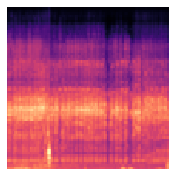

In [ ]:
filect = 0
print('Working on 5th batch 8001 to end')
for i in dfv_5.itertuples():
  filect = filect + 1
  #print(str(filect))
  file = i[4]
  pngfile = i[5]
  #print(file, pngfile)
  #print('Filecount: '+str(filect)+' Working on: '+file)
  print('Filecount: '+str(filect)+' Saving spectograms: '+pngfile)
  # load wav file and determine sample rate automatically
  signal, sr = librosa.load(file, sr=None)
  # my parameters
  hop_length = 11025 # in num. of samples
  n_fft = 42336 # window in num. of samples
  hop_length_duration = float(hop_length)/sr
  n_fft_duration = float(n_fft)/sr
  # Mel filter banks
  filter_banks = librosa.filters.mel(n_fft=n_fft, sr=sr, n_mels=64)
  stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)
  # This will yield 96-length spectrograms
  spectrogram = np.abs(stft)
  # converted to 64 bin log-scaled Mel spectrogram,
  melspec = librosa.feature.melspectrogram(y=signal, sr=sr, S=spectrogram, n_fft=n_fft, hop_length=hop_length, win_length=None, window='hann', center=True, pad_mode='reflect', n_mels=64)
  log_mel_spectrogram = librosa.power_to_db(melspec, ref=np.max)
  #plt.figure(figsize=(2.24, 2.24))
  fig = librosa.display.specshow(log_mel_spectrogram, hop_length=hop_length)
  fig2 = plt.gcf()
  plt.axis('off')
  fig2.set_size_inches(2.9, 2.98)
  plt.savefig(pngfile, dpi=100, bbox_inches='tight', pad_inches=0, format='png')

print('start time: ')
print(startime)
print(time.ctime())